In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import os
import shutil
import json
import pickle
from tqdm import tqdm
import random
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
from PIL import Image

from load_model import load_model
from load_model_barlowtwins import load_barlowtwins_model

from rn50_auxiliary_dm import rn50_auxiliary_dm

import scipy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import svm

Using cache found in /home/sl5700/.cache/torch/hub/facebookresearch_barlowtwins_main
/home/sl5700/.local/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/sl5700/.local/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
import os
import torch

# Your desired model name list




# Target directory to save the full models
save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Iterate over the model names
for model_name in model_names_list:
    # (Your current conditional logic for loading each model goes here)
    # Let's assume that after loading, you have the correct `model` object.
    
    # Save full model (not just state_dict)
    model_path = os.path.join(save_dir, f"{model_name}.pth.tar")
    model = load_model(model_name)
    torch.save(model, model_path)
    print(model_name)
    print(model_path)
    print(f"Saved model '{model_name}' to '{model_path}'")


In [ ]:
performance_values = [0.588067,0.507923,0.564587,0.536745,0.538061,0.645092,0.606417,0.603598,0.54503,0.596021,0.583445,0.55975,0.574479,0.520899,0.663502,0.616099,0.522505,0.698729,0.591259,0.52707,0.712188]  # length = 21

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


emotions = ['neutral', 'happy', 'sad', 'disgust', 'fear', 'anger', 'surprise']
n = len(emotions)
conf_mat = np.full((n, n), np.nan)

# Fill upper and lower triangle using combinations
pairs = list(itertools.combinations(range(n), 2))
for idx, (i, j) in enumerate(pairs):
    score = performance_values[idx]
    conf_mat[i, j] = score
    conf_mat[j, i] = score 

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, xticklabels=emotions, yticklabels=emotions,
            cmap='viridis', annot=True, fmt=".2f", mask=np.isnan(conf_mat))
plt.title("Emotion Pairwise Discrimination Accuracy")
plt.xlabel("Emotion j")
plt.ylabel("Emotion i")
plt.tight_layout()
plt.show()


In [ ]:
# Randomly split training and validation sets
import os
import random
import shutil

# Set paths
source_dir1 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl000_ani_anger'
source_dir2 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl000_sreyas_anger'
source_dir3 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl000_tony_anger'
source_dir4 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl000_younah_anger'
source_dir5 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl50k_ani_neutral'
source_dir6 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl50k_sreyas_neutral'
source_dir7 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl50k_tony_neutral'
source_dir8 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/vbsl50k_younah_neutral'
source_dir9 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/ani_sadness'
source_dir10 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/iness_4'
source_dir11 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/ral'
source_dir12 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/ess_4'
source_dir13 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/r_4'
source_dir14 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/iness_4'
source_dir15 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/ral'
source_dir16 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/ess_4'

train_dir1 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Dan_anger_4'
train_dir2 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Dan_happiness_4'
train_dir3 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Dan_neutral'
train_dir4 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Dan_sadness_4'
train_dir5 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Kedar_anger_4'
train_dir6 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Kedar_happiness_4'
train_dir7 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Kedar_neutral'
train_dir8 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Kedar_sadness_4'
train_dir9 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Seojin_anger_4'
train_dir10 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Seojin_happiness_4'
train_dir11 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Seojin_neutral'
train_dir12 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Seojin_sadness_4'
train_dir13 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Sophie_anger_4'
train_dir14 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Sophie_happiness_4'
train_dir15 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Sophie_neutral'
train_dir16 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/train/Sophie_sadness_4'

val_dir1 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Dan_anger_4'
val_dir2 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Dan_happiness_4'
val_dir3 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Dan_neutral'
val_dir4 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Dan_sadness_4'
val_dir5 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Kedar_anger_4'
val_dir6 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Kedar_happiness_4'
val_dir7 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Kedar_neutral'
val_dir8 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Kedar_sadness_4'
val_dir9 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Seojin_anger_4'
val_dir10 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Seojin_happiness_4'
val_dir11 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Seojin_neutral'
val_dir12 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Seojin_sadness_4'
val_dir13 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Sophie_anger_4'
val_dir14 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Sophie_happiness_4'
val_dir15 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Sophie_neutral'
val_dir16 = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_50k_texture_colorbg/8ID_4EM_IDEM_colorbg/val/Sophie_sadness_4'


# Make sure destination directories exist
os.makedirs(train_dir1, exist_ok=True)
os.makedirs(train_dir2, exist_ok=True)
os.makedirs(train_dir3, exist_ok=True)
os.makedirs(train_dir4, exist_ok=True)
os.makedirs(train_dir5, exist_ok=True)
os.makedirs(train_dir6, exist_ok=True)
os.makedirs(train_dir7, exist_ok=True)
os.makedirs(train_dir8, exist_ok=True)
os.makedirs(train_dir9, exist_ok=True)
os.makedirs(train_dir10, exist_ok=True)
os.makedirs(train_dir11, exist_ok=True)
os.makedirs(train_dir12, exist_ok=True)
os.makedirs(train_dir13, exist_ok=True)
os.makedirs(train_dir14, exist_ok=True)
os.makedirs(train_dir15, exist_ok=True)
os.makedirs(train_dir16, exist_ok=True)

os.makedirs(val_dir1, exist_ok=True)
os.makedirs(val_dir2, exist_ok=True)
os.makedirs(val_dir3, exist_ok=True)
os.makedirs(val_dir4, exist_ok=True)
os.makedirs(val_dir5, exist_ok=True)
os.makedirs(val_dir6, exist_ok=True)
os.makedirs(val_dir7, exist_ok=True)
os.makedirs(val_dir8, exist_ok=True)
os.makedirs(val_dir9, exist_ok=True)
os.makedirs(val_dir10, exist_ok=True)
os.makedirs(val_dir11, exist_ok=True)
os.makedirs(val_dir12, exist_ok=True)
os.makedirs(val_dir13, exist_ok=True)
os.makedirs(val_dir14, exist_ok=True)
os.makedirs(val_dir15, exist_ok=True)
os.makedirs(val_dir16, exist_ok=True)
# Function to split data
def split_data(source_dir, train_dir, val_dir, train_size=2500):
    # Get all files in the source directory
    all_files = os.listdir(source_dir)
    # Shuffle the files randomly
    random.shuffle(all_files)
    
    # Split files into train and validation
    train_files = all_files[:train_size]
    val_files = all_files[train_size:train_size + 625]  # Remaining 10,000

    # Move files to train directory
    for file_name in train_files:
        src_file = os.path.join(source_dir, file_name)
        dest_file = os.path.join(train_dir, file_name)
        shutil.copy(src_file, dest_file)

    # Move files to validation directory
    for file_name in val_files:
        src_file = os.path.join(source_dir, file_name)
        dest_file = os.path.join(val_dir, file_name)
        shutil.copy(src_file, dest_file)

# # Split Elias data
split_data(source_dir1, train_dir1, val_dir1)
split_data(source_dir2, train_dir2, val_dir2)
split_data(source_dir3, train_dir3, val_dir3)
split_data(source_dir4, train_dir4, val_dir4)
split_data(source_dir5, train_dir5, val_dir5)
split_data(source_dir6, train_dir6, val_dir6)
split_data(source_dir7, train_dir7, val_dir7)
split_data(source_dir8, train_dir8, val_dir8)
split_data(source_dir9, train_dir9, val_dir9)
split_data(source_dir10, train_dir10, val_dir10)
split_data(source_dir11, train_dir11, val_dir11)
split_data(source_dir12, train_dir12, val_dir12)
split_data(source_dir13, train_dir13, val_dir13)
split_data(source_dir14, train_dir14, val_dir14)
split_data(source_dir15, train_dir15, val_dir15)
split_data(source_dir16, train_dir16, val_dir16)





In [ ]:
colors = [
    'blue', 'blue',
    '#d0d0d0',  # light grey
    '#b0b0b0',  # medium-light grey
    '#909090',  # medium grey
    '#707070',  # slightly dark grey
    '#505050',  # dark grey
    '#303030'   # very dark grey (but not black)
]

# Results 1

In [ ]:
# Comparison bar plot -- standard DNNs on GFR Elias-Neptune

model_names = ['ResNet-\n50', 'AlexNet', 'VGG16', 'VGG-\nFace', 'FaceNet\n(128D)', 'FaceNet\n(512D)']
means = [91.0/100, 77.25/100, 58.0742/100,0.573348,0.575091,0.520593,0.521726,0.548567]  # example values
means = [58.0742/100,0.573348,0.575091,0.520593,0.521726,0.548567]  # example values
stds = [4.743416490252569/100, 4.205650960315181/100, 2.9093/100,0.026410, 0.025000, 0.028141, 0.028632, 0.029322]
stds = [2.9093/100,0.026410, 0.025000, 0.028141, 0.028632, 0.029322]

# means = [x * 100 for x in means]
# stds = [x * 100 for x in stds]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model_names, means, yerr=stds, capsize=0, color=colors, width=0.75)

# Dashed line at chance level
# Add shaded human range
ymin = 85/100
ymax = 97/100
ax.fill_between(
    x=[-0.5, len(model_names) - 0.5],
    y1=ymin,
    y2=ymax,
    color='tab:red',
    alpha=0.5,
    label='Human range (n=4)'
)

# Dashed lines for top and bottom of shaded band
# ax.axhline(y=ymin, color='tab:red', linestyle='--', linewidth=3)
# ax.axhline(y=ymax, color='tab:red', linestyle='--', linewidth=3)

# ax.axhline(y=77.25, color='tab:orange', linestyle='--', linewidth=3, label='Marmoset')
# Example: add labels next to the line

# Add value labels above bars
for bar, value, err in zip(bars, means, stds):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + err + 0.005, f'{value:.2f}', 
            ha='center', va='bottom', fontsize=14)
# ax.set_xlabel('Model Type', fontsize=15)
ax.set_xticks(np.arange(len(model_names)))
ax.set_xticklabels(model_names, fontsize=13)
ax.set_ylabel('GFR Single Task Accuracy (%)', fontsize=18)
ax.set_ylim(0.455, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.tick_params(axis='y', labelsize=18)
ax.axhline(50/100, color='black', linestyle='--', linewidth=3)

# ax.set_title('Human and Marmoset Outperform Standard DNNs on GFR Task', fontsize=17)
ax.legend(
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.01, 1),  # Push legend outside the right edge
    frameon=False              # Remove the legend box
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)


plt.tight_layout()

plt.savefig("fig1D.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
0.577609+-0.028341	0.637964+-0.027343	0.597411+-0.029896	0.577662+-0.025353	0.565628+-0.026551	0.696193+-0.024397	0.702614+-0.027574	0.649951+-0.027009	0.643769+-0.028171	0.628466+-0.024578	0.746828+-0.020407	0.612089+-0.028371	0.648475+-0.025334	0.624466+-0.027769	0.580367+-0.028743	0.683347+-0.023870	0.591485+-0.022142	0.635181+-0.025121	0.530737+-0.028458	0.679646+-0.024403	0.675806+-0.024044	0.584275+-0.028237	0.521536+-0.027966	0.629582+-0.026854	0.577573+-0.026688	0.590570+-0.025989	0.649395+-0.025147	0.635978+-0.028015	0.702661+-0.026855	0.644889+-0.022658	0.662745+-0.026259	0.569852+-0.025657	0.625893+-0.028886	0.560143+-0.025083	0.625639+-0.029176	0.617765+-0.026999	0.552415+-0.024146	0.588577+-0.024422	0.573718+-0.027876	0.636640+-0.026085	0.587022+-0.027871	0.597391+-0.027023	0.576772+-0.026899	0.619888+-0.027251	0.566851+-0.029065	0.614584+-0.022617	0.522250+-0.027838	0.515164+-0.028035	0.600452+-0.029555	0.533784+-0.024136	0.553668+-0.029874	0.587795+-0.024887	0.639100+-0.024871	0.573341+-0.024895	0.669362+-0.025230	0.629536+-0.022202	0.552468+-0.026077	0.525314+-0.025308	0.530353+-0.023538	0.594270+-0.027190	0.564956+-0.026585	0.598505+-0.027746	0.549681+-0.024777	0.562652+-0.025179	0.541869+-0.029095	0.552260+-0.027275
0.516677+-0.027937	0.595214+-0.026944	0.541887+-0.028554	0.525986+-0.025597	0.517000+-0.028603	0.651445+-0.024390	0.650339+-0.023680	0.569641+-0.023983	0.608021+-0.028106	0.578229+-0.024717	0.684573+-0.026305	0.535486+-0.032125	0.623909+-0.025034	0.579751+-0.023113	0.542361+-0.028610	0.580121+-0.026104	0.544446+-0.025334	0.584687+-0.025527	0.488704+-0.027384	0.613289+-0.027728	0.618052+-0.027096	0.530610+-0.029077	0.495247+-0.026313	0.582432+-0.023082	0.564423+-0.025503	0.602189+-0.022148	0.592490+-0.024705	0.545659+-0.025294	0.646226+-0.029759	0.626764+-0.026171	0.599963+-0.027735	0.548633+-0.028042	0.568309+-0.027134	0.542764+-0.029832	0.597218+-0.028400	0.565248+-0.028487	0.506107+-0.026765	0.548111+-0.027012	0.556457+-0.025812	0.567938+-0.027224	0.554031+-0.028501	0.528971+-0.027258	0.497836+-0.027860	0.560665+-0.024871	0.511159+-0.028157	0.567551+-0.028305	0.494224+-0.031081	0.460399+-0.025706	0.527763+-0.028410	0.477590+-0.025665	0.545053+-0.022790	0.537369+-0.025345	0.604877+-0.027423	0.520726+-0.025258	0.589645+-0.029155	0.529943+-0.025876	0.491158+-0.029666	0.508677+-0.030053	0.466402+-0.030044	0.518834+-0.028033	0.521280+-0.027728	0.522351+-0.028242	0.507851+-0.025929	0.511899+-0.027320	0.520188+-0.027734	0.538543+-0.026622
0.500229+-0.028282	0.508708+-0.029126	0.501807+-0.024940	0.501191+-0.028834	0.470401+-0.027122	0.512260+-0.030962	0.523451+-0.026130	0.519930+-0.029075	0.528049+-0.028099	0.537882+-0.029826	0.555969+-0.031569	0.467314+-0.028366	0.543486+-0.032972	0.517925+-0.028004	0.494919+-0.026840	0.532323+-0.029745	0.507215+-0.030181	0.501943+-0.027086	0.465230+-0.029654	0.488825+-0.030781	0.454773+-0.028038	0.480968+-0.030711	0.500148+-0.025016	0.527131+-0.031742	0.504441+-0.028933	0.531664+-0.033059	0.521631+-0.030378	0.537363+-0.032362	0.549353+-0.030884	0.548521+-0.028400	0.542569+-0.028274	0.492302+-0.028199	0.543207+-0.029413	0.528708+-0.031750	0.543263+-0.031514	0.514376+-0.031582	0.482479+-0.023838	0.508464+-0.025285	0.497147+-0.028122	0.526812+-0.032654	0.481853+-0.025527	0.488644+-0.032781	0.460017+-0.028698	0.502779+-0.032732	0.453746+-0.027101	0.465632+-0.029215	0.443406+-0.020354	0.450916+-0.024164	0.462361+-0.029557	0.458015+-0.029155	0.453583+-0.030610	0.451736+-0.027153	0.479235+-0.030571	0.428830+-0.025341	0.472523+-0.032172	0.445855+-0.027341	0.467612+-0.024980	0.457120+-0.028379	0.464464+-0.030560	0.447616+-0.024440	0.474779+-0.025456	0.472883+-0.031605	0.456089+-0.028907	0.480183+-0.028781	0.438135+-0.025088	0.460765+-0.026120
0.502355+-0.025711	0.537853+-0.031614	0.525314+-0.024857	0.509268+-0.027799	0.524615+-0.025977	0.607168+-0.030819	0.554582+-0.030308	0.515349+-0.024873	0.550467+-0.029213	0.556903+-0.025700	0.596143+-0.024023	0.542718+-0.024479	0.562169+-0.028362	0.527530+-0.022297	0.558432+-0.029967	0.555757+-0.024739	0.524659+-0.026002	0.534160+-0.023614	0.472002+-0.030257	0.558974+-0.028231	0.531582+-0.023567	0.547957+-0.029713	0.510854+-0.027465	0.592115+-0.024103	0.562958+-0.027783	0.569632+-0.026330	0.553887+-0.030843	0.530438+-0.024795	0.590362+-0.024533	0.581153+-0.025962	0.584614+-0.026948	0.526836+-0.030019	0.543683+-0.032058	0.557143+-0.023222	0.574200+-0.028981	0.528632+-0.028489	0.489283+-0.026269	0.503756+-0.027705	0.549466+-0.027682	0.569550+-0.027071	0.552231+-0.024809	0.476491+-0.029515	0.492573+-0.025715	0.558041+-0.030875	0.476268+-0.024294	0.506841+-0.028072	0.476565+-0.030454	0.473407+-0.028029	0.519475+-0.026054	0.494796+-0.024519	0.483019+-0.027713	0.498485+-0.025988	0.530118+-0.026815	0.495700+-0.031384	0.559593+-0.026378	0.515701+-0.026455	0.463282+-0.029221	0.492222+-0.028405	0.507177+-0.025517	0.507504+-0.024581	0.512698+-0.024032	0.507792+-0.030637	0.487478+-0.026714	0.531171+-0.025415	0.504578+-0.026176	0.502326+-0.030161
0.490498+-0.028813	0.500994+-0.026280	0.501383+-0.027784	0.537513+-0.028108	0.506864+-0.027636	0.581915+-0.025336	0.553814+-0.028255	0.531615+-0.029018	0.584632+-0.030171	0.555023+-0.024300	0.611954+-0.026493	0.476930+-0.028248	0.573536+-0.028184	0.523080+-0.025217	0.542838+-0.029328	0.555847+-0.027115	0.509339+-0.026934	0.577819+-0.023216	0.502577+-0.029160	0.561074+-0.028242	0.497452+-0.029028	0.524129+-0.028625	0.527071+-0.028058	0.572254+-0.028112	0.581098+-0.025327	0.504104+-0.028750	0.552354+-0.026801	0.563293+-0.025297	0.576617+-0.028950	0.607608+-0.025273	0.552782+-0.024443	0.550282+-0.030839	0.555442+-0.027295	0.552772+-0.026641	0.571014+-0.029975	0.508711+-0.026681	0.532809+-0.029629	0.530854+-0.025258	0.542050+-0.025398	0.585552+-0.025963	0.523821+-0.026352	0.511075+-0.025976	0.501092+-0.026487	0.513366+-0.030606	0.496396+-0.030173	0.516510+-0.031904	0.475998+-0.027293	0.442465+-0.027444	0.494262+-0.024978	0.516751+-0.026088	0.456839+-0.025734	0.510854+-0.028172	0.500307+-0.031044	0.479825+-0.027575	0.503988+-0.032637	0.454015+-0.026124	0.465687+-0.026269	0.495869+-0.027313	0.510760+-0.025878	0.469229+-0.025125	0.462139+-0.027812	0.507373+-0.029701	0.444432+-0.028679	0.502921+-0.030523	0.466051+-0.030359	0.472381+-0.029838
0.487686+-0.029521	0.487187+-0.029092	0.475373+-0.021426	0.522123+-0.034474	0.472055+-0.027886	0.518617+-0.031535	0.473039+-0.028726	0.478499+-0.028714	0.555866+-0.029849	0.518674+-0.028503	0.554654+-0.034125	0.470437+-0.024199	0.543299+-0.027794	0.503238+-0.030604	0.518286+-0.034805	0.541900+-0.031968	0.507014+-0.024739	0.535493+-0.024706	0.465135+-0.028497	0.460202+-0.030013	0.467112+-0.024543	0.464896+-0.023760	0.484160+-0.029143	0.501637+-0.032822	0.537387+-0.031254	0.505916+-0.027521	0.523302+-0.026114	0.529235+-0.027806	0.538398+-0.030954	0.554811+-0.023052	0.534371+-0.028974	0.500060+-0.022165	0.521226+-0.028276	0.518749+-0.032846	0.532478+-0.027698	0.500896+-0.027846	0.490596+-0.023243	0.516993+-0.023880	0.512835+-0.031034	0.551745+-0.026882	0.524936+-0.028110	0.473780+-0.025755	0.464906+-0.027175	0.462360+-0.026402	0.457014+-0.020986	0.466350+-0.026153	0.452104+-0.025468	0.454448+-0.027540	0.453108+-0.026516	0.462811+-0.027237	0.454490+-0.022757	0.459961+-0.025200	0.485844+-0.029741	0.459005+-0.024831	0.465888+-0.023981	0.457478+-0.021687	0.464175+-0.028052	0.458781+-0.025377	0.477364+-0.026090	0.471250+-0.024599	0.476789+-0.025243	0.483148+-0.029613	0.469733+-0.027717	0.465835+-0.025643	0.459106+-0.025715	0.459761+-0.027786

In [ ]:
# 2 Bar plot -- GFR vs LFW 
# Model names
# %matplotlib inline  
model_names = ['ResNet-50', 'AlexNet', 'VGG16', 'VGG-Face', 'FaceNet\n(128D)', 'FaceNet\n(512D)']
x = np.arange(len(model_names))

# Accuracy data (%)
gfr_means = [val/100 for val in [60.3, 52.9, 55.4, 49.3, 49.3, 52.2]]
gfr_stds = [val/100 for val in [5.1, 3.5, 4.8, 3.3, 3.2, 4.1]]
lfw_means = [val/100 for val in [88.0, 88.3, 78.7, 99.98, 99.84, 99.91]]
lfw_stds = [val/100 for val in [1.77, 1.56, 2.03, 0.079, 0.236, 0.149]]

# Bar width and positions
bar_width = 0.35
x_gfr = x - bar_width / 2
x_lfw = x + bar_width / 2

# Colors
gfr_color = '#b0b0b0'
lfw_color = '#4c72b0' 

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars_gfr = ax.bar(x_gfr, gfr_means, yerr=gfr_stds, width=bar_width, color=gfr_color, capsize=0, label='GFR (n=66)')
bars_lfw = ax.bar(x_lfw, lfw_means, yerr=lfw_stds, width=bar_width, color=lfw_color, capsize=0, label='Face photographs (n=1)')

# Add labels
for bar, value, err in zip(bars_gfr, gfr_means, gfr_stds):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + err + 0.005, f'{value:.2f}', ha='center', fontsize=13)
for bar, value, err in zip(bars_lfw, lfw_means, lfw_stds):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + err+ 0.005, f'{value:.2f}', ha='center', fontsize=13)

# Formatting
# ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_ylabel('Average accuracy (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=15)
ax.set_ylim(0.455, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.tick_params(axis='y', labelsize=18)

ax.axhline(50/100, color='black', linestyle='--', linewidth=3)
ax.legend(
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.01, 1),  # Push legend outside the right edge
    frameon=False              # Remove the legend box
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("fig1C.pdf", format="pdf", bbox_inches="tight")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

model_names = ['ResNet-50', 'AlexNet', 'VGG16', 'VGG-Face', 'FaceNet 128D', 'FaceNet 512D']
task_names = ['GFR', 'CTFR', 'GER', 'CTER']

# Accuracy data (%)
gfr_means = [60.3, 52.9, 55.4, 49.3, 49.3, 52.2]
gfr_stds = [5.1, 3.5, 4.8, 3.3, 3.2, 4.1]

ctfr_means = [80.22, 69.75, 68.1, 54.46, 61.76, 60.71]
ctfr_stds = [6.98, 9.49, 9.05, 6.96, 9.80, 7.57]

ger_means = [57.9, 52.63, 54.64, 48.37, 47.1, 46.58]
ger_stds = [3.54, 2.98, 3.47, 2.59, 1.45, 1.43]

cter_means = [60.01, 54.42, 53.85, 46.2, 46.25, 46.3]
cter_stds = [6.08, 3.97, 4.06, 2.12, 0.8, 0.92]

# Transpose data to [n_tasks x n_models]
means = np.array([gfr_means, ctfr_means, ger_means, cter_means])
stds = np.array([gfr_stds, ctfr_stds, ger_stds, cter_stds])

# Bar plot parameters
n_tasks = len(task_names)
n_models = len(model_names)
bar_width = 0.11
x = np.arange(n_tasks)
offsets = np.linspace(-1.5, 1.5, n_models) * bar_width * 1.8

# Colors and hatching per task
task_colors = ['#b0b0b0', '#b0b0b0', '#228B22', '#228B22']
task_hatches = ['', '///', '', '///']

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each model across tasks
for m_idx in range(n_models):
    xpos = x + offsets[m_idx]
    bar = ax.bar(
        xpos,
        means[:, m_idx],
        yerr=stds[:, m_idx],
        ecolor='gray',
        width=bar_width,
        label=model_names[m_idx],
        color=[task_colors[t] for t in range(n_tasks)],
        hatch=[task_hatches[t] for t in range(n_tasks)],
        capsize=4
    )

# Value labels
for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        val = means[t, m]
        err = stds[t, m]

        # Accuracy label
        ax.text(xpos, val + err + 0.75, f'{val:.1f}', ha='center', fontsize=9)

        # # Rotated model name label above that
        # ax.text(xpos, val + err + 6, model_names[m], ha='center', fontsize=8, rotation=90)

xtick_positions = []
xtick_labels = []

for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        xtick_positions.append(xpos)
        xtick_labels.append(model_names[m])


# Formatting
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Model Performance Across Face Recognition Tasks', fontsize=18)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=10, rotation=90)

ax.set_ylim(45, 90)
ax.axhline(50, color='red', linestyle='--', linewidth=1)
for t in range(n_tasks):
    ax.bar(0, 0, color=task_colors[t], hatch=task_hatches[t], label=task_names[t])
legend_handles = [
    Patch(facecolor=task_colors[0], hatch=task_hatches[0], label='GFR'),
    Patch(facecolor=task_colors[1], hatch=task_hatches[1], label='CTFR'),
    Patch(facecolor=task_colors[2], hatch=task_hatches[2], label='GER'),
    Patch(facecolor=task_colors[3], hatch=task_hatches[3], label='CTER'),
]
ax.legend(handles=legend_handles, title='Task', title_fontsize=13, fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# standard DNNs radar plot (order: GFR, GER, CTFR, CTER, LFW-BP)

model_resnet_fig1 = np.array([0.603,0.579,0.8022,0.6001,0.880108])
model_alexnet_fig1 =  np.array([0.5293947,0.5263,0.6975,0.5442,0.882683])
model_vgg16_fig1 =  np.array([0.553812,0.5464,0.681,0.5385,0.787381])
model_vggface_fig1 =  np.array([0.4929266,0.4837,0.5446,0.462,0.9998])
model_facenet_128d_fig1 =  np.array([0.4926667,0.471,0.6176,0.4625,0.998443])
model_facenet_512d_fig1 =  np.array([0.52215,0.4658,0.6071,0.463,0.999071])

model_resnet_fig1 = np.array([0.603,0.579,0.5528858939,0.8022,0.6001,0.6240155455,0.880108])
model_alexnet_fig1 =  np.array([0.5293947,0.5263,0.520305323,0.6975,0.5442,0.5871198166,0.882683])
model_vgg16_fig1 =  np.array([0.553812,0.5464,0.5309710327,0.681,0.5385,0.5785035686,0.787381])
model_vggface_fig1 =  np.array([0.4929266,0.4837,0.5117350744,0.5446,0.462,0.5616759569,0.9998])
model_facenet_128d_fig1 =  np.array([0.4926667,0.471,0.5245616627,0.6176,0.4625,0.5747902446,0.998443])
model_facenet_512d_fig1 =  np.array([0.52215,0.4658,0.5062878655,0.6071,0.463,0.5651773325,0.999071])


task_labels_all_ood = [
    'GFR', 'GER', 'Basel\nGFR', 'CTFR', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]

# Define different intensities of blue manually
blue_shades = ['#99ccff', '#3399ff', '#0066cc', '#003366']  # light blue to dark blue
gray_shades = ['#E0E0E0',  # very light
               '#B0B0B0',  # light-medium
               '#909090',  # medium
               '#707070',  # medium-dark
               '#505050',  # dark
               '#303030']  # very dark
orange_shades = ['#ffd9b3', '#ffb366',  '#cc6600', '#663300']
green_shades = ['#66ff66', '#009933', '#006600', '#003300']
red_shades = ['#ffb3b3', '#ff6666', '#ff0000', '#cc0000']
purple_shades = ['#dab3ff', '#b366ff', '#8000ff', '#4b0082']

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.5)
    ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)  # draw line last

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
# plot_model(ax, model_resnet_fig1 , 'xkcd:grey', 'ResNet-50')
# plot_model(ax, model_alexnet_fig1 , 'xkcd:grey', 'AlexNet')
# plot_model(ax, model_vgg16_fig1 , 'xkcd:grey', 'VGG-16')
# plot_model(ax, model_vggface_fig1 , 'xkcd:dark grey', 'VGG-Face')
plot_model(ax, model_facenet_128d_fig1 , 'xkcd:dark grey', 'FaceNet (128D)')
# plot_model(ax, model_facenet_512d_fig1 , 'xkcd:dark grey', 'FaceNet (512D)')

# plot_model(ax, model_resnet_fig1 , gray_shades[0], 'ResNet-50')
# plot_model(ax, model_alexnet_fig1 , gray_shades[1], 'AlexNet')
# plot_model(ax, model_vgg16_fig1 ,  gray_shades[2], 'VGG-16')
# plot_model(ax, model_vggface_fig1 , gray_shades[3], 'VGG-Face')
# plot_model(ax, model_facenet_128d_fig1 , gray_shades[4], 'FaceNet (128D)')
# plot_model(ax, model_facenet_512d_fig1 , gray_shades[5], 'FaceNet (512D)')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=30, rotation=45)
ax.xaxis.set_tick_params(pad=50)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.462, 1.0)  # Adjust range as needed
ax.set_yticks([0.5,0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=28)

ax.set_rlabel_position(0)

# ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.2), fontsize=15)
# plt.title("Generalization across face and object recognition tasks", fontsize=25, pad=20)

plt.savefig("fig1E_5_facenet128d.pdf", format="pdf", bbox_inches="tight")
plt.show()



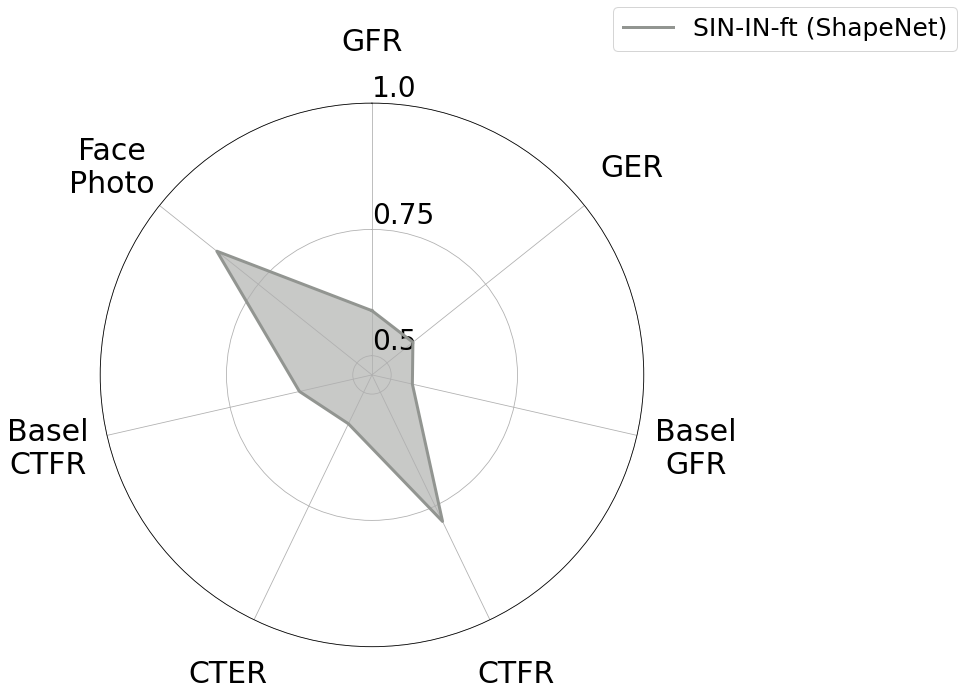

In [28]:
# standard DNNs radar plot (order: GFR, GER, CTFR, CTER, LFW-BP)

model_resnet_fig1 = np.array([0.603,0.579,0.8022,0.6001,0.880108])
model_alexnet_fig1 =  np.array([0.5293947,0.5263,0.6975,0.5442,0.882683])
model_vgg16_fig1 =  np.array([0.553812,0.5464,0.681,0.5385,0.787381])
model_vggface_fig1 =  np.array([0.4929266,0.4837,0.5446,0.462,0.9998])
model_facenet_128d_fig1 =  np.array([0.4926667,0.471,0.6176,0.4625,0.998443])
model_facenet_512d_fig1 =  np.array([0.52215,0.4658,0.6071,0.463,0.999071])

model_lowpassfilter_color_linear_fig1 = np.array([0.4998715606,0.4854,0.501777193,0.7331,0.4938,0.5186832802,0.824039])
model_lowpassfilter_color_nonlinear_fig1 =  np.array([0.5116224242,0.5006,0.5075616494,0.7502,0.492,0.5256781632,0.845229])
model_SIN_IN_ft_fig1 =  np.array([0.5891204697,0.5656,0.544019265,0.7839,0.5694,0.609253542,0.854737])



task_labels_all_ood = [
    'GFR', 'GER', 'Basel\nGFR', 'CTFR', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]

# Define different intensities of blue manually
blue_shades = ['#99ccff', '#3399ff', '#0066cc', '#003366']  # light blue to dark blue
gray_shades = ['#E0E0E0',  # very light
               '#B0B0B0',  # light-medium
               '#909090',  # medium
               '#707070',  # medium-dark
               '#505050',  # dark
               '#303030']  # very dark
orange_shades = ['#ffd9b3', '#ffb366',  '#cc6600', '#663300']
green_shades = ['#66ff66', '#009933', '#006600', '#003300']
red_shades = ['#ffb3b3', '#ff6666', '#ff0000', '#cc0000']
purple_shades = ['#dab3ff', '#b366ff', '#8000ff', '#4b0082']

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.5)
    ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)  # draw line last

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
# plot_model(ax, model_resnet_fig1 , 'xkcd:grey', 'ResNet-50')
# plot_model(ax, model_alexnet_fig1 , 'xkcd:grey', 'AlexNet')
# plot_model(ax, model_vgg16_fig1 , 'xkcd:grey', 'VGG-16')
# plot_model(ax, model_vggface_fig1 , 'xkcd:dark grey', 'VGG-Face')
# plot_model(ax, model_lowpassfilter_color_linear_fig1 , 'xkcd:grey', 'LowPassFilter (linear)')
# plot_model(ax, model_lowpassfilter_color_nonlinear_fig1 , 'xkcd:grey', 'LowPassFilter (nonlinear)')
plot_model(ax, model_SIN_IN_ft_fig1 , 'xkcd:grey', 'SIN-IN-ft (ShapeNet)')
# plot_model(ax, model_facenet_512d_fig1 , 'xkcd:dark grey', 'FaceNet (512D)')

# plot_model(ax, model_resnet_fig1 , gray_shades[0], 'ResNet-50')
# plot_model(ax, model_alexnet_fig1 , gray_shades[1], 'AlexNet')
# plot_model(ax, model_vgg16_fig1 ,  gray_shades[2], 'VGG-16')
# plot_model(ax, model_vggface_fig1 , gray_shades[3], 'VGG-Face')
# plot_model(ax, model_facenet_128d_fig1 , gray_shades[4], 'FaceNet (128D)')
# plot_model(ax, model_facenet_512d_fig1 , gray_shades[5], 'FaceNet (512D)')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=30, rotation=45)
ax.xaxis.set_tick_params(pad=50)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.462, 1.0)  # Adjust range as needed
ax.set_yticks([0.5,0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=28)

ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.2), fontsize=25)
# plt.title("Generalization across face and object recognition tasks", fontsize=25, pad=20)

plt.savefig("fig1E_5_facenet128d.pdf", format="pdf", bbox_inches="tight")
plt.show()



# Result 2

In [ ]:
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)

model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
model_ceiling_resnet =  np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])
model_2way_all_ood =  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667])
model_4way_all_ood = np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807])
model_6way_all_ood =  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437])
model_8way_all_ood = np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923])
model_10way_all_ood = np.array([0.738531,0.7823,0.7180584662,0.8177,0.7988,0.6438,0.7766926103,0.9337,0.683432,0.740161,0.817677])

model_basel_2way_all_ood = np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085,0.690573,0.792378,0.837393])
model_basel_4way_all_ood = np.array([0.652553,0.652553,0.6258,0.8338555888,0.7875,0.7875,0.5662,0.7338694179,0.960602,0.707236,0.769107,0.810958])
# model_basel_8way_all_ood = np.array([0.674622,0.674622,0.692,0.9121553363,0.8208,0.8208,0.6108,0.8163833998,0.972493,0.718821,0.74975,0.800014])
model_basel_10way_all_ood = np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232,0.733369,0.77218,0.799982])
model_basel_20way_all_ood = np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443,0.707403,0.788429,0.790982])
model_basel_50way_all_ood = np.array([0.690605,0.690605,0.6832,0.9491169524,0.8306,0.8306,0.614,0.8720334995,0.954415])
model_basel_100way_all_ood = np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973,0.707069,0.75784,0.761647])

model_2way_all_ood_err = np.array([0.0509, 0.0509, 0.0354, 0.02559431393, 0.0698, 0.0698, 0.0608, 0.07136062807, 0.017739])
# 9 tasks plot 
task_labels_all_ood = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]
green_shades = ["#054103FF", "#0A7B28", "#15c208", "#86d266"][::-1]
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Close the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.7)
    line, = ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)
    return line

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# Plot models
# plot_model(ax, model_vggface_all_ood[:-3] , 'xkcd:grey', 'VGG-Face')

h8 = plot_model(ax, model_8way_all_ood[:-3], green_shades[3], 'GFR (8ID)')
h6 = plot_model(ax, model_6way_all_ood[:-3], green_shades[2], 'GFR (6ID)')
h4 = plot_model(ax, model_4way_all_ood[:-3], green_shades[1], 'GFR (4ID)')
h2 = plot_model(ax, model_2way_all_ood[:-3], green_shades[0], 'GFR (2ID)')

h_baseline = plot_model(ax, model_resnet_all_ood[:-3], 'xkcd:light grey', 'Baseline', linestyle='--')
h_ceiling = plot_model(ax, model_ceiling_resnet[:-3], 'xkcd:red', 'Ceiling', fill=False, linestyle='--')

# plot_model(ax, model_basel_2way_all_ood[:-3], green_shades[0], 'Basel-GFR-2ID')
# plot_model(ax, model_basel_4way_all_ood[:-3], green_shades[1], 'Basel-GFR-4ID')
# plot_model(ax, model_basel_10way_all_ood[:-3], green_shades[2], 'Basel-GFR-10ID')
# plot_model(ax, model_basel_20way_all_ood[:-3], green_shades[3], 'Basel-GFR-20ID')
# plot_model(ax, model_basel_50way_all_ood, 'blue', 'Basel-GFR-50ID')
# plot_model(ax, model_basel_100way_all_ood[:-3], 'black', 'Basel-GFR-100ID')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=25, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.5, 1.)  # Adjust range as needed
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=22)

ax.set_rlabel_position(0)
handles = [h_baseline, h_ceiling, h2, h4, h6, h8]
labels = ['Baseline ResNet-50', 'Ceiling', 'GFR (2ID)', 'GFR (4ID)', 'GFR (6ID)', 'GFR (8ID)']

ax.legend(
    handles,
    labels,
    fontsize=18,
    loc='upper left',
    bbox_to_anchor=(1.2, 1.15),
    frameon=False
)
# for spine in ['top', 'right']:
#     ax.spines[spine].set_visible(False)

# plt.show()

plt.savefig("fig2A.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

model_names = ['ResNet-50', 'GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID']
model_names = ['ResNet-50','2ID', '4ID', '6ID', '8ID']

task_names = ['GFR', 'CTFR', 'GER', 'CTER']

# Accuracy data (%)
gfr_means = [60.3/100, 0.6850123333,
0.76711268,
0.79446267,
0.79532667,]
gfr_stds = [5.1/100, 0.08002783,
0.0822354,
0.05269932,
0.04583907,]

ctfr_means = [80.22/100, 0.8066333333,
0.8446,
0.8619,
0.8496,]
ctfr_stds = [6.98/100, 0.0623,
0.0439,
0.0394,
0.0315,]

ger_means = [57.9/100, 0.6617666667,
             0.726,
0.7703,
0.7749,]
ger_stds = [3.54/100, 0.0600,
0.0560,
0.0524,
0.0454,]

cter_means = [60.01/100, 0.5889,
0.6163,
0.632,
0.6576,]
cter_stds = [6.08/100, 0.0559,
0.0609,
0.0588,
0.0605,]

# Transpose data to [n_tasks x n_models]
means = np.array([gfr_means, ger_means, ctfr_means, cter_means])
stds = np.array([gfr_stds, ger_stds, ctfr_stds, cter_stds])

# Bar plot parameters
n_tasks = len(task_names)
n_models = len(model_names)
bar_width = 0.13
x = np.arange(n_tasks)
offsets = np.linspace(-1.5, 1.5, n_models) * bar_width * 1.5

# Colors and hatching per task
task_colors = ['tab:green','xkcd:green', 'tab:green',  'tab:green']

task_colors = [green_shades[1],green_shades[2], green_shades[1],  green_shades[2]]
# task_colors = ['xkcd:dark green','xkcd:dark blue', 'xkcd:dark green',  'xkcd:dark blue']
task_hatches = ['', '', '///', '///']

fig, ax = plt.subplots(figsize=(13, 6))

# Plot each model across tasks
# Plot each model across tasks
for t in range(n_tasks):  # GFR, CTFR, GER, CTER
    for m_idx in range(n_models):  # ResNet-50, GFR-2ID, ..., CTFR-8ID
        xpos = x[t] + offsets[m_idx]
        val = means[t, m_idx]
        err = stds[t, m_idx]

        # Determine color, edge color, and hatch
        if m_idx == 0:
            bar_color = 'gray'
            edge_color = 'black'
            line_width = 0
        else:
            bar_color = task_colors[t]
            edge_color = 'black'
            line_width = 0

        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        hatch = '///' if t in [2,3] else ''

        ax.bar(
            xpos,
            val,
            yerr=err,
            ecolor='black',
            error_kw=dict(elinewidth=1.25),
            width=bar_width,
            color=bar_color,
            edgecolor=edge_color,
            hatch=hatch,
            capsize=0,
            linewidth=line_width,
            label=None  # avoid duplicate legends
        )

        # Add text label
        ax.text(xpos, val + err + 0.005, f'{val:.2f}', ha='center', fontsize=10)

xtick_positions = []
xtick_labels = []

for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        xtick_positions.append(xpos)
        xtick_labels.append(model_names[m])


# Formatting
ax.set_ylabel('Average Accuracy (%)', fontsize=18)
# ax.set_title('Model Performance Across Face Recognition Tasks', fontsize=18)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=16, rotation=90)

ax.set_ylim(0.5, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels([0.5, 0.75, 1.0], fontsize=16)

# ax.axhline(50, color='red', linestyle='--', linewidth=1)
for t in range(n_tasks):
    ax.bar(0, 0, color=task_colors[t], hatch=task_hatches[t], label=task_names[t])
legend_handles = [
    Patch(facecolor=task_colors[0], hatch=task_hatches[0], label='GFR tasks (n=66)'),
    Patch(facecolor=task_colors[1], hatch=task_hatches[1], label='GER tasks (n=21)'),
    Patch(facecolor=task_colors[2], hatch=task_hatches[2], label='CTFR tasks (n=66)'),
    Patch(facecolor=task_colors[3], hatch=task_hatches[3], label='CTER tasks (n=21)'),
]
# ax.text(1.5, 48, 'Geometry-based tasks', fontsize=14, ha='center', weight='bold')
# ax.text(6.0, 48, 'Texture-based tasks', fontsize=14, ha='center', weight='bold')
plt.title("GFR-trained Model Performance ", fontsize=20)

ax.legend(
    handles=legend_handles,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.0, 1.05),
    frameon=False
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.savefig("fig2B.pdf", format="pdf", bbox_inches="tight")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model labels
model_names = ['ResNet-50', 
               'GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID',
            #    'CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID'
               ]

# Indices in *_all_ood arrays for those models
geometry_indices = [1, 2, 3]
texture_indices = [5, 6, 7, 8]
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])

model_2way_all_ood =  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667])
model_4way_all_ood = np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807])
model_6way_all_ood =  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437])
model_8way_all_ood = np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923])

model_2way_ct_all_ood = np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153])
model_4way_ct_all_ood = np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305])
model_6way_ct_all_ood = np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257])
model_8way_ct_all_ood = np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727])


# Geometry accuracies (GFR + CTFR)
geometry_means = np.array([
    np.mean([model_resnet_all_ood[i] for i in geometry_indices]),
    np.mean([model_2way_all_ood[i] for i in geometry_indices]),
    np.mean([model_4way_all_ood[i] for i in geometry_indices]),
    np.mean([model_6way_all_ood[i] for i in geometry_indices]),
    np.mean([model_8way_all_ood[i] for i in geometry_indices]),
    # np.mean([model_2way_ct_all_ood[i] for i in geometry_indices]),
    # np.mean([model_4way_ct_all_ood[i] for i in geometry_indices]),
    # np.mean([model_6way_ct_all_ood[i] for i in geometry_indices]),
    # np.mean([model_8way_ct_all_ood[i] for i in geometry_indices])
]) * 100

n=3
geometry_stderr = np.array([
    np.std([model_resnet_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_2way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_4way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_6way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_8way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_2way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_4way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_6way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_8way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n)
]) * 100


texture_means = np.array([
    np.mean([model_resnet_all_ood[i] for i in texture_indices]),
    np.mean([model_2way_all_ood[i] for i in texture_indices]),
    np.mean([model_4way_all_ood[i] for i in texture_indices]),
    np.mean([model_6way_all_ood[i] for i in texture_indices]),
    np.mean([model_8way_all_ood[i] for i in texture_indices]),
    # np.mean([model_2way_ct_all_ood[i] for i in texture_indices]),
    # np.mean([model_4way_ct_all_ood[i] for i in texture_indices]),
    # np.mean([model_6way_ct_all_ood[i] for i in texture_indices]),
    # np.mean([model_8way_ct_all_ood[i] for i in texture_indices])
]) * 100

n=4
texture_stderr = np.array([
    np.std([model_resnet_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_2way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_4way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_6way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_8way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_2way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_4way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_6way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_8way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n)
]) * 100

# Plot config
x = np.arange(len(model_names))
bar_width = 0.3
x_geometry = x - bar_width / 2
x_texture = x + bar_width / 2

# Colors
geometry_color = '#b0b0b0'
texture_color = '#4c72b0'

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

bars_geometry = ax.bar(x_geometry, geometry_means, ecolor='xkcd:dark gray', yerr=geometry_stderr, width=bar_width, color=geometry_color, label='Geometry')
bars_texture = ax.bar(x_texture, texture_means, ecolor='xkcd:dark gray',yerr=texture_stderr, width=bar_width, color=geometry_color,  hatch='///',label='Texture')

# Value labels
for i, bar in enumerate(bars_geometry):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + geometry_stderr[i] +0.5, f'{height:.1f}', ha='center', fontsize=10)

for i, bar in enumerate(bars_texture):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + texture_stderr[i]+0.5, f'{height:.1f}', ha='center', fontsize=10)

# Formatting
ax.set_ylabel('Accuracy (%)', fontsize=13)
ax.set_title('Geometry vs Texture Accuracy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=0, fontsize=12)
ax.set_ylim(47.5, 100)
# ax.axhline(50, color='red', linestyle='--', linewidth=1)
ax.axhline(np.mean([model_resnet_all_ood[i] for i in geometry_indices])*100, color='gray', linestyle='--', linewidth=1)
ax.axhline(np.mean([model_resnet_all_ood[i] for i in texture_indices])*100, color='xkcd:dark gray', linestyle='--', linewidth=1)

ax.legend(fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()


# Result 3

In [ ]:
# GFR ablation curve
import numpy as np
import matplotlib.pyplot as plt

# UPDATED ------------------------------------------------------------------------------------------------------------------
# Indices to use
# selected = [0, 1, 2, 3]
selected = [ 5, 6, 7, 8]
selected = [1,2,3]
selected = [1, 2, 3, 5, 6, 7, 8]

# Baseline (floor) and ceiling arrays
baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])

baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])

baseline_basel = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_basel  = np.array([0.700742,0.700742,0.7296,0.9966548777,0.9098,0.9098,0.6224,1,0.973779,0.865202,0.871154,0.863643])
ceiling_all = np.array([0.861847,0.848744,0.877,0.9966548777,0.9578,0.9579,0.8354,1,0.9998,0.856525,0.906059,0.891157])
baseline = baseline_resnet
ceiling = ceiling_resnet

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# Stack and compute SEM
GFR_2id_model1 = np.array([0.70051868,0.67595833,0.6715,0.6605195242,0.8118,0.8189,0.5908,0.7020205011,0.905195])
GFR_2id_model2 = np.array([0.7236,0.7022898,0.6343,0.6368396797,0.7824,0.7917,0.5846,0.6459502592,0.89704])
GFR_2id_model3 = np.array([0.70193074,0.67678887,0.6795,0.6527422049,0.8118,0.8093,0.591,0.6514579545,0.910357])

all_models = np.stack([GFR_2id_model1, GFR_2id_model2, GFR_2id_model3])  # shape: (3, 9)
mean_2id = all_models.mean(axis=0)
sem_2id = all_models.std(axis=0, ddof=1) / np.sqrt(all_models.shape[0])

print("Mean accuracy:", mean_2id)
print("Standard error (SEM):", sem_2id)

mean_overall = mean_2id.mean()
sem_overall = sem_2id.mean()

print("Overall mean:", mean_overall)
print("Overall SEM:", sem_overall)

sem_2id_selected = sem_2id[selected]
mean_sem_2id = sem_2id_selected.mean()

# # All models
models = {

    "GFR-2ID" :  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667]),
    "GFR-4ID" : np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807]),
    "GFR-6ID" :  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437]),
    "GFR-8ID" : np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923]),
  
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID']
print_labels = ['2','4', '6','8' ]
values = [proportions[label]*100 for label in labels]
errors = [mean_sem_2id, 0, 0, 0]    # For raw acc
# errors = [0.051888500286238495,0, 0, 0] # For normalzied prop
# plt.figure(figsize=(7.5, 6))
plt.figure(figsize=(7.5, 6))

# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.errorbar(print_labels, values,marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,1)
plt.ylim(65, 85)

plt.xlabel("Number of Identity", fontsize=16)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=16)
plt.ylabel("Averaged Accuracy (%)", fontsize=16)

# ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.6630442056*100, color='black', linestyle='--', linewidth=5, label='ResNet-50')

# # Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.7312039091, color='gray', linestyle='--', linewidth=2)

# plt.title("Normalized Ablation Curve (Selected Indices)")
plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=15)

plt.title("Identity titration curve (GFR-trained models)", fontsize=16)
plt.grid(True)
plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
# GFR ablation curve
import numpy as np
import matplotlib.pyplot as plt

# UPDATED ------------------------------------------------------------------------------------------------------------------
# Indices to use
# selected = [0, 1, 2, 3]
selected = [ 5, 6, 7, 8]
selected = [1,2,3]
selected = [7]

# Baseline (floor) and ceiling arrays
baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])

baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])

baseline_basel = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_basel  = np.array([0.700742,0.700742,0.7296,0.9966548777,0.9098,0.9098,0.6224,1,0.973779,0.865202,0.871154,0.863643])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])
baseline = baseline_resnet
ceiling = ceiling_all

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# Stack and compute SEM
GFR_2id_model1 = np.array([0.70051868,0.67595833,0.6715,0.6605195242,0.8118,0.8189,0.5908,0.7020205011,0.905195])
GFR_2id_model2 = np.array([0.7236,0.7022898,0.6343,0.6368396797,0.7824,0.7917,0.5846,0.6459502592,0.89704])
GFR_2id_model3 = np.array([0.70193074,0.67678887,0.6795,0.6527422049,0.8118,0.8093,0.591,0.6514579545,0.910357])

all_models = np.stack([GFR_2id_model1, GFR_2id_model2, GFR_2id_model3])  # shape: (3, 9)
mean_2id = all_models.mean(axis=0)
sem_2id = all_models.std(axis=0, ddof=1) / np.sqrt(all_models.shape[0])

print("Mean accuracy:", mean_2id)
print("Standard error (SEM):", sem_2id)

mean_overall = mean_2id.mean()
sem_overall = sem_2id.mean()

print("Overall mean:", mean_overall)
print("Overall SEM:", sem_overall)

sem_2id_selected = sem_2id[selected]
mean_sem_2id = sem_2id_selected.mean()

# # All models
models = {

    "GFR-2ID" :  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667]),
    "GFR-4ID" : np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807]),
    "GFR-6ID" :  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437]),
    "GFR-8ID" : np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923]),
  
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID']
print_labels = ['2','4', '6','8' ]
values = [proportions[label]*100 for label in labels]
errors = [mean_sem_2id, 0, 0, 0]    # For raw acc

plt.figure(figsize=(5., 6))
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("Number of Identity", fontsize=14)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=14)
plt.ylabel("Averaged Accuracy (%)", fontsize=14)

# ResNet baseline 
plt.axhline(y=baseline_resnet[selected]*100, color='black', linestyle='--', linewidth=3.5)

plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=15)

plt.title("Identity titration curve (GFR-trained models)\nBasel CTFR accuracy", fontsize=14)
plt.grid(True)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()



In [27]:
proportions_all

{'GFR-2ID': 0.16121707135531788,
 'GFR-4ID': 0.3454158129019131,
 'GFR-6ID': 0.4616720460655412,
 'GFR-8ID': 0.4471496574979249}

In [28]:
proportions_geometry

{'GFR-2ID': 0.2778500915683309,
 'GFR-4ID': 0.498915535374503,
 'GFR-6ID': 0.5926787013279793,
 'GFR-8ID': 0.6020779279535926}

In [29]:
proportions_texture

{'GFR-2ID': 0.07374230619555816,
 'GFR-4ID': 0.2302910210474707,
 'GFR-6ID': 0.3634170546187127,
 'GFR-8ID': 0.33095345465617404}

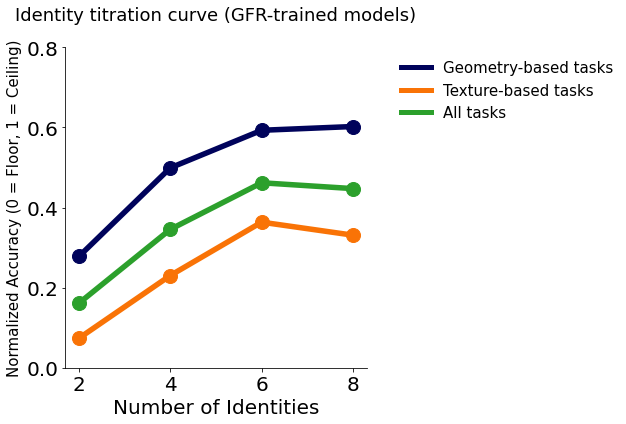

In [26]:
# GFR ablation curve -- texture only
import numpy as np
import matplotlib.pyplot as plt

# UPDATED ------------------------------------------------------------------------------------------------------------------
# Indices to use


# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

# # All models
models = {
    "GFR-2ID" :  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667]),
    "GFR-4ID" : np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807]),
    "GFR-6ID" :  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437]),
    "GFR-8ID" : np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923])

}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

selected = [1, 2, 3, 5, 6, 7, 8]
proportions_all = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [1,2,3]
proportions_geometry = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [ 5, 6, 7, 8]
proportions_texture = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
plt.figure(figsize=(9, 6))

labels = ['GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID']
print_labels = ['2', '4', '6', '8']
values = [proportions_all[label] for label in labels]
errors = [0.051888500286238495, 0, 0, 0]    # For raw acc
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='tab:green')

values = [proportions_geometry[label] for label in labels]
errors = [0.024019525701932103, 0, 0, 0]    # For raw acc
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:dark blue')

values = [proportions_texture[label] for label in labels]
errors = [0.07325922832330102, 0, 0, 0]    # For raw acc
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:orange')

plt.xticks(fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=20)  # set specific yticks and font size together
plt.ylim([0, 0.8])
plt.xlabel("Number of Identities", fontsize=20)
plt.ylabel("Normalized Accuracy (0 = Floor, 1 = Ceiling)", fontsize=15)

plt.title("Identity titration curve (GFR-trained models)\n", fontsize=18)
plt.grid(True)
from matplotlib.lines import Line2D

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=5, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=5, label='Texture-based tasks'),
    Line2D([0], [0], color='tab:green',lw=5, label='All tasks'),
]

plt.grid(True)
plt.legend(
    handles=legend_elements,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.07, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig3A.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Selected indices for averaging
selected = [3,7]
selected = [1,2,3,5,6,7, 8]
# Floor and ceiling values (set to normalize if needed)
baseline = np.zeros(14)
ceiling = np.ones(14)

# baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
# ceiling_basel  = np.array([0.700742,0.700742,0.7296,0.9966548777,0.92,0.92,0.6224,1,0.973779])
# baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
# ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])

# baseline = baseline_resnet
# ceiling = ceiling_basel

# CTFR models and their ID counts
models = {
    2 :  np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085]),
    4 :  np.array([0.652553,0.652553,0.6258,0.8338555888,0.7875,0.7875,0.5662,0.7338694179,0.960602]),
    6 :  np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178]),
    8 :  np.array([0.674622,0.674622,0.692,0.9121553363,0.8208,0.8208,0.6108,0.8163833998,0.972493]),
    10 :  np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232]),
    20 :  np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443]),
    30 :  np.array([0.692274,0.692274,0.6805,0.9649061536,0.8215,0.8215,0.596,0.8632333134,0.959668]),
    40 :  np.array([0.687798,0.687798,0.6816,0.9653128323,0.8226,0.8226,0.6206,0.8701511962,0.939925]),
    50 :  np.array([0.690605,0.690605,0.6832,0.9491169524,0.8306,0.8306,0.614,0.8720334995,0.954415]),
    100 :  np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973]),
    500 :  np.array([0.692308,0.692308,0.6996,0.9903333865,0.6124,0.6124,0.5511,0.7336206805,0.803329]),
    1000 :  np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521]),


    # CTFR
    # 2: np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524]),
    # 6: np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069]),
    # 10: np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819]),
    # 20: np.array([0.627075,0.627075,0.6073,0.6968982921,0.92,0.92,0.5917,0.9940456606,0.95425]),
    # 30: np.array([0.619124,0.619124,0.6155,0.6960724149,0.911,0.911,0.5955,0.9944168062,0.958906]),
    # 40: np.array([0.625359,0.625359,0.6072,0.7078429426,0.9089,0.9089,0.6137,0.9984494418,0.910251]),
    # 50: np.array([0.627348,0.627348,0.6173,0.7138015417,0.9091,0.9091,0.6002,0.9980799242,0.936985]),
    # 100: np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998]),
    # 500: np.array([0.571163,0.571163,0.5948,0.6629442916,0.8479634545,0.8479634545,0.6055,0.999944883,0.802257])
    # 1000: np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735])
}

# Compute proportion scores (if needed — here we plot raw accuracy)
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()
import numpy as np
import matplotlib.pyplot as plt

def warp(x):
    """Map specific x values to nicely spaced custom positions."""
    mapping = {
        2: 2,
        4: 5,
        6: 8,
        8: 11,
        10: 14,
        20: 21,
        30: 28,
        40: 35,
        50: 42,
        100: 58,
        500: 83
    }
    return [mapping[val] for val in x]


# Apply warping

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
labels = [2, 4, 6, 8, 10, 20, 30, 40, 50, 100, 500]
# labels = [2,  6,  10, 20, 30, 40, 50, 100, 500]

x_vals = np.array(labels)
x_warped = warp(x_vals)
y_vals = values = [proportions[label] *100 for label in labels]
errors = [0] * len(x_vals)  # Replace with actual error if available

# Plot with symlog x-axis
plt.figure(figsize=(20, 6))
plt.plot(x_warped, y_vals, 'o-', markersize=12, linewidth=5)
# plt.xscale('symlog', linthresh=20)  # instead of 50
x_ids = labels

plt.xticks(x_warped, labels=x_vals, fontsize=15)
plt.xlim(1.5, 85)
# plt.ylim(65, 78)
plt.yticks(fontsize=15)

plt.xlabel("Number of Training Identities", fontsize=18)
plt.ylabel("Average accuracy (%)", fontsize=18)
# plt.ylabel("Accuracy (Normalzied proportion)", fontsize=14)
# plt.ylim(0.7,1)
plt.title("Basel CTFR normalized ablation curve (all face tasks averaged)", fontsize=18)
plt.title("Identity titration curve (Basel GFR-trained models)", fontsize=18)
plt.axhline(y=0.6630442056*100, color='black', linestyle='--', linewidth=3.5, label='ResNet-50')
plt.grid()
plt.legend(
    # handles=label,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.01, 1.05),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


In [31]:
y_vals_basel

[0.695180857142857,
 0.7372075714285715,
 0.7660302857142857,
 0.7856174285714286,
 0.7903294285714287,
 0.8015488571428572,
 0.7968677142857141,
 0.7982854285714286,
 0.7991292857142857,
 0.8023834285714286,
 0.7260868571428573]

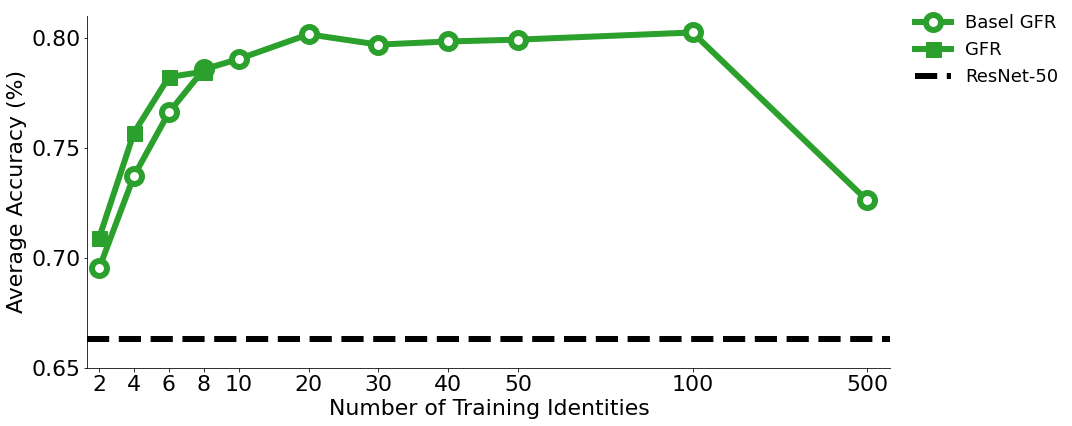

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute proportion (can modify if needed)
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

# X-axis warp mapping
def warp(x):
    mapping = {
        2: 2,
        4: 5,
        6: 8,
        8: 11,
        10: 14,
        20: 20,
        30: 26,
        40: 32,
        50: 38,
        100: 53,
        500: 68
    }
    return [mapping[val] for val in x]

# ---- Basel CTFR models ----
baseline = np.zeros(14)
ceiling = np.ones(14)
selected = [1,2,3,5,6,7,8]

models_basel = {
    2 :  np.array([0.609766,0.609766,0.6011,0.7387,0.7741,0.7741,0.5527,0.6814,0.9085]),
    4 :  np.array([0.652553,0.652553,0.6258,0.8339,0.7875,0.7875,0.5662,0.7339,0.9606]),
    6 :  np.array([0.649512,0.649512,0.6672,0.8922,0.8100,0.8100,0.6046,0.7869,0.9518]),
    8 :  np.array([0.674622,0.674622,0.6920,0.9122,0.8208,0.8208,0.6108,0.8164,0.9725]),
    10:  np.array([0.692806,0.692806,0.6890,0.9262,0.8357,0.8357,0.6109,0.8125,0.9652]),
    20:  np.array([0.700742,0.700742,0.6716,0.9464,0.8499,0.8499,0.6196,0.8632,0.9594]),
    30:  np.array([0.692274,0.692274,0.6805,0.9649,0.8215,0.8215,0.5960,0.8632,0.9597]),
    40:  np.array([0.687798,0.687798,0.6816,0.9653,0.8226,0.8226,0.6206,0.8702,0.9399]),
    50:  np.array([0.690605,0.690605,0.6832,0.9491,0.8306,0.8306,0.6140,0.8720,0.9544]),
    100: np.array([0.697184,0.697184,0.7111,0.9629,0.8385,0.8385,0.6203,0.8657,0.9210]),
    500: np.array([0.692308,0.692308,0.6996,0.9903,0.6124,0.6124,0.5511,0.7336,0.8033]),
}

proportions_basel = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models_basel.items()}
labels_basel = list(models_basel.keys())
x_warped_basel = warp(labels_basel)
y_vals_basel = [proportions_basel[label] for label in labels_basel]

# ---- GFR models ----
models_gfr = {
    2: np.array([0.7087,0.6850,0.6618,0.6500,0.8020,0.8066,0.5888,0.6665,0.9042,0.6821,0.7677,0.8338]),
    4: np.array([0.7962,0.7671,0.7260,0.6997,0.8299,0.8446,0.6163,0.7280,0.9163,0.7111,0.7710,0.8108]),
    6: np.array([0.8172,0.7945,0.7703,0.7090,0.8471,0.8619,0.6320,0.7582,0.9491,0.6983,0.7642,0.8094]),
    8: np.array([0.8327,0.7953,0.7749,0.7131,0.8341,0.8496,0.6576,0.7777,0.9238,0.7084,0.7490,0.7992]),
}

proportions_gfr = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models_gfr.items()}
labels_gfr = list(models_gfr.keys())
x_warped_gfr = warp(labels_gfr)
y_vals_gfr = [proportions_gfr[label]  for label in labels_gfr]

# ---- Plot ----
plt.figure(figsize=(15, 6))
plt.plot(
    x_warped_basel, y_vals_basel,
    marker='o', linestyle='-', markersize=15, linewidth=6,
    color='tab:green', markerfacecolor='white', markeredgewidth=6, label="Basel GFR"
)
plt.plot(
    x_warped_gfr, y_vals_gfr,
    marker='s', linestyle='-', markersize=15, linewidth=6,
    color='tab:green', label="GFR"
)


plt.xticks(warp(labels_basel), labels_basel, fontsize=22)
plt.xlim(1, 70)
plt.yticks([0.65, 0.7, 0.75, 0.8], fontsize=22)  # set specific yticks and font size together
plt.ylim([0.65, 0.81])
plt.yticks(fontsize=22)

plt.xlabel("Number of Training Identities", fontsize=22)
plt.ylabel("Average Accuracy (%)", fontsize=22)
plt.axhline(y=0.6630 , color='black', linestyle='--', linewidth=6, label='ResNet-50')
plt.grid()
plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1.01, 1.05), frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig3B_ver1.pdf", format="pdf", bbox_inches="tight")

plt.show()


# Result 4

In [ ]:
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
model_ceiling_resnet =  np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

model_2way_ct_all_ood = np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153])
model_4way_ct_all_ood = np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305])
model_6way_ct_all_ood = np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257])
model_8way_ct_all_ood = np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727])
model_10way_ct_all_ood = np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239,0.683598,0.77107,0.818129])
model_12way_ct_all_ood = np.array([0.6393,0,0.6163,0.6304802897,0.9468,0,0.6153,0.9090995747,0.915399,0.66201,0.763704,0.790314])

model_2way_all_ood_err = np.array([0.0509, 0.0509, 0.0354, 0.02559431393, 0.0698, 0.0698, 0.0608, 0.07136062807, 0.017739])
# 9 tasks plot 
task_labels_all_ood = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]  # 'GOR', 'GCTOR', 'IN-Shark1/2'

blue_shades = [
    "#61cafe",  # light blue (CTFR-2ID)
    "#1b91db",  # medium blue (CTFR-4ID)
    "#1353e6",  # dark blue (CTFR-6ID)
    "#071f6c"   # navy (CTFR-8ID)
]

from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        if label == 'GFR (8ID)' : 
            ax.fill(angles, values, color=color, alpha=0.25)
        else :
            ax.fill(angles, values, color=color, alpha=0.7)

    line, = ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)  # draw line last
    return line
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# Plot models

h6 = plot_model(ax, model_6way_ct_all_ood[:-3], blue_shades[2], 'CTFR (6ID)')
h8 = plot_model(ax, model_8way_ct_all_ood[:-3], blue_shades[3], 'CTFR (8ID)')
h4 = plot_model(ax, model_4way_ct_all_ood[:-3], blue_shades[1], 'CTFR (4ID)')
h2 = plot_model(ax, model_2way_ct_all_ood[:-3], blue_shades[0], 'CTFR (2ID)')

h8_gfr = plot_model(ax, model_8way_all_ood[:-3], green_shades[3], 'GFR (8ID)', linestyle='--')

h_baseline =plot_model(ax, model_ceiling_resnet[:-3], 'xkcd:red', 'SUP ceiling', fill=False, linestyle='--')
h_ceiling = plot_model(ax, model_resnet_all_ood[:-3] , 'xkcd:light grey', 'SUP ResNet-50', linestyle='--')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=25, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.5, 1.)  # Adjust range as needed
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=22)

ax.set_rlabel_position(0)
handles = [h_baseline, h_ceiling, h8_gfr, h2, h4, h6, h8]
labels = ['Baseline ResNet-50', 'Ceiling', 'GFR (8ID)', 'CTFR (2ID)','CTFR (4ID)', 'CTFR (6ID)', 'CTFR (8ID)']

ax.legend(
    handles,
    labels,
    fontsize=18,
    loc='upper left',
    bbox_to_anchor=(1.2, 1.15),
    frameon=False
)
# for spine in ['top', 'right']:
#     ax.spines[spine].set_visible(False)

plt.savefig("fig4B.pdf", format="pdf", bbox_inches="tight")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

task_names = ['GFR', 'CTFR', 'GER', 'CTER']

# Accuracy data (%)
# bar plot 
# 4 bar plots: gfr, ctfr, ger, cter for ctfr models vs gfr models

model_names = [('ResNet-50', 'GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID', 
               'CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID', )[i] for i in [0,5,6,7,8]]
model_names = ['ResNet-50',  '2ID', '4ID', '6ID', '8ID']

x = np.arange(len(model_names))

# Accuracy data (%)
gfr_means = [(60.3/100, 0.6850123333,
0.76711268,
0.79446267,
0.79532667,
0.6007364367,
0.60036782,
0.61227533,
0.6381415)[i] for i in [0,5,6,7,8]]
gfr_stds = [(5.1/100, 0.08002783,
0.0822354,
0.05269932,
0.04583907,
0.05160014333,
0.04975734,
0.04452486, 0.04766649)[i] for i in [0,5,6,7,8]]
gfr_sems = gfr_stds / np.sqrt(66)

ctfr_means = [(80.22/100, 0.8066333333,
0.8446,
0.8619,
0.8496,
0.8849666667,
0.9202,
0.9213,
0.9175,)[i] for i in [0,5,6,7,8]]
ctfr_stds = [(6.98/100, 0.0623,
0.0583,
0.0541,
0.0315,
0.0541,
0.0409,
0.0355,
0.0070,)[i] for i in [0,5,6,7,8]]
ctfr_sems = ctfr_stds / np.sqrt(66)

# Example GER and CTER data (replace with your own values)
ger_means = [(0.579,
0.6617666667, 
0.726, 
0.7703, 
0.7749, 
0.5961, 
0.611, 
0.6248, 
0.628)[i] for i in [0,5,6,7,8]]
ger_stds = [(0.0354,
0.0600, 
0.0560, 
0.0524, 
0.0454, 
0.0442, 
0.0398, 
0.0481, 
0.0517, 
)[i] for i in [0,5,6,7,8]]
ger_sems = ger_stds / np.sqrt(21)

cter_means = [(0.6001,
0.5889,
0.6163,
0.632,
0.6576,
0.5962333333,
0.6093,
0.6087,
0.6341,)[i] for i in [0,5,6,7,8]]
cter_stds = [(0.0608,
0.0559,
0.0593,
0.0509,
0.0605,
0.0599,
0.0644,
0.0579,
0.0639,)[i] for i in [0,5,6,7,8]]
cter_sems = cter_stds / np.sqrt(21)


# Transpose data to [n_tasks x n_models]
means = np.array([gfr_means, ger_means, ctfr_means, cter_means])
stds = np.array([gfr_stds, ger_stds, ctfr_stds, cter_stds])

# Bar plot parameters
n_tasks = len(task_names)
n_models = len(model_names)
bar_width = 0.13
x = np.arange(n_tasks)
offsets = np.linspace(-1.5, 1.5, n_models) * bar_width * 1.5

# Colors and hatching per task
task_colors = ['tab:blue','tab:blue', 'tab:blue',  'tab:blue']
# task_colors = ['xkcd:dark green','xkcd:dark blue', 'xkcd:dark green',  'xkcd:dark blue']
task_hatches = ['', '', '///', '///']

fig, ax = plt.subplots(figsize=(13, 6))

# Plot each model across tasks
# Plot each model across tasks
for t in range(n_tasks):  # GFR, CTFR, GER, CTER
    for m_idx in range(n_models):  # ResNet-50, GFR-2ID, ..., CTFR-8ID
        xpos = x[t] + offsets[m_idx]
        val = means[t, m_idx]
        err = stds[t, m_idx]

        # Determine color, edge color, and hatch
        if m_idx == 0:
            bar_color = 'gray'
            edge_color = 'black'
            line_width = 0
        else:
            bar_color = task_colors[t]
            edge_color = 'black'
            line_width = 0

        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        hatch = '///' if t in [2,3] else ''

        ax.bar(
            xpos,
            val,
            yerr=err,
            ecolor='black',
            error_kw=dict(elinewidth=1.25),
            width=bar_width,
            color=bar_color,
            edgecolor=edge_color,
            hatch=hatch,
            capsize=0,
            linewidth=line_width,
            label=None  # avoid duplicate legends
        )

        # Add text label
        ax.text(xpos, val + err + 0.005, f'{val:.2f}', ha='center', fontsize=10)

xtick_positions = []
xtick_labels = []

for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        xtick_positions.append(xpos)
        xtick_labels.append(model_names[m])


# Formatting

# Formatting
ax.set_ylabel('Average Accuracy (%)', fontsize=18)
# ax.set_title('Model Performance Across Face Recognition Tasks', fontsize=18)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=16, rotation=90)

ax.set_ylim(0.5, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels([0.5, 0.75, 1.0], fontsize=16)
for t in range(n_tasks):
    ax.bar(0, 0, color=task_colors[t], hatch=task_hatches[t], label=task_names[t])
legend_handles = [
    Patch(facecolor=task_colors[0], hatch=task_hatches[0], label='GFR tasks (n=66)'),
    Patch(facecolor=task_colors[1], hatch=task_hatches[1], label='GER tasks (n=21)'),
    Patch(facecolor=task_colors[2], hatch=task_hatches[2], label='CTFR tasks (n=66)'),
    Patch(facecolor=task_colors[3], hatch=task_hatches[3], label='CTER tasks (n=21)'),
]
# ax.text(1.5, 48, 'Geometry-based tasks', fontsize=14, ha='center', weight='bold')
# ax.text(6.0, 48, 'Texture-based tasks', fontsize=14, ha='center', weight='bold')
plt.title("GFR-trained Model Performance ", fontsize=20)

ax.legend(
    handles=legend_handles,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.0, 1.05),
    frameon=False
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
# plt.savefig("fig4C.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model labels
model_names = ['ResNet-50', 
            #    'GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID',
               'CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID'
               ]

# Indices in *_all_ood arrays for those models
geometry_indices = [1, 2, 3]
texture_indices = [5, 6, 7, 8]
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])

model_2way_all_ood =  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667])
model_4way_all_ood = np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807])
model_6way_all_ood =  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437])
model_8way_all_ood = np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923])

model_2way_ct_all_ood = np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153])
model_4way_ct_all_ood = np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305])
model_6way_ct_all_ood = np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257])
model_8way_ct_all_ood = np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727])


# Geometry accuracies (GFR + CTFR)
geometry_means = np.array([
    np.mean([model_resnet_all_ood[i] for i in geometry_indices]),
    # np.mean([model_2way_all_ood[i] for i in geometry_indices]),
    # np.mean([model_4way_all_ood[i] for i in geometry_indices]),
    # np.mean([model_6way_all_ood[i] for i in geometry_indices]),
    # np.mean([model_8way_all_ood[i] for i in geometry_indices]),
    np.mean([model_2way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_4way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_6way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_8way_ct_all_ood[i] for i in geometry_indices])
]) * 100

n=3
geometry_stderr = np.array([
    np.std([model_resnet_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_2way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_4way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_6way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    # np.std([model_8way_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_2way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_4way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_6way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_8way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n)
]) * 100


texture_means = np.array([
    np.mean([model_resnet_all_ood[i] for i in texture_indices]),
    # np.mean([model_2way_all_ood[i] for i in texture_indices]),
    # np.mean([model_4way_all_ood[i] for i in texture_indices]),
    # np.mean([model_6way_all_ood[i] for i in texture_indices]),
    # np.mean([model_8way_all_ood[i] for i in texture_indices]),
    np.mean([model_2way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_4way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_6way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_8way_ct_all_ood[i] for i in texture_indices])
]) * 100

n=4
texture_stderr = np.array([
    np.std([model_resnet_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_2way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_4way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_6way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    # np.std([model_8way_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_2way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_4way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_6way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_8way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n)
]) * 100

# Plot config
x = np.arange(len(model_names))
bar_width = 0.3
x_geometry = x - bar_width / 2
x_texture = x + bar_width / 2

# Colors
geometry_color = '#b0b0b0'
texture_color = '#4c72b0'

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

bars_geometry = ax.bar(x_geometry, geometry_means, ecolor='xkcd:dark gray', yerr=geometry_stderr, width=bar_width, color=geometry_color, label='Geometry')
bars_texture = ax.bar(x_texture, texture_means, ecolor='xkcd:dark gray',yerr=texture_stderr, width=bar_width, color=geometry_color,  hatch='///',label='Texture')

# Value labels
for i, bar in enumerate(bars_geometry):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + geometry_stderr[i] +0.5, f'{height:.1f}', ha='center', fontsize=10)

for i, bar in enumerate(bars_texture):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + texture_stderr[i]+0.5, f'{height:.1f}', ha='center', fontsize=10)

# Formatting
ax.set_ylabel('Accuracy (%)', fontsize=13)
ax.set_title('Geometry vs Texture Accuracy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=0, fontsize=12)
ax.set_ylim(47.5, 100)
# ax.axhline(50, color='red', linestyle='--', linewidth=1)
ax.axhline(np.mean([model_resnet_all_ood[i] for i in geometry_indices])*100, color='gray', linestyle='--', linewidth=1)
ax.axhline(np.mean([model_resnet_all_ood[i] for i in texture_indices])*100, color='xkcd:dark gray', linestyle='--', linewidth=1)

ax.legend(fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()


In [ ]:
GFR_2id_model1 = np.array([0.70051868,0.67595833,0.6715,0.6605195242,0.8118,0.8189,0.5908,0.7020205011,0.905195])
GFR_2id_model2 = np.array([0.7236,0.7022898,0.6343,0.6368396797,0.7824,0.7917,0.5846,0.6459502592,0.89704])
GFR_2id_model3 = np.array([0.70193074,0.67678887,0.6795,0.6527422049,0.8118,0.8093,0.591,0.6514579545,0.910357])

CTFR_2id_model1 = np.array([0.60084064,0.60277504,0.5918,0.5676306752,0.8942,0.8896,0.5895,0.7790324096,0.905897])
CTFR_2id_model2 = np.array([0.61164386,0.60096758,0.5978,0.5872014952,0.8951,0.8972,0.6056,0.8010295853,0.92597])
CTFR_2id_model3 = np.array([0.59404629,0.59846669,0.5987,0.590250937,0.8848,0.8681,0.5936,0.7825978735,0.894065])


In [ ]:
geometry_idx = [1, 2, 3]
texture_idx = [5, 6, 7, 8]
overall_idx = geometry_idx + texture_idx

# Model arrays
GFR_models = [GFR_2id_model1, GFR_2id_model2, GFR_2id_model3]
CTFR_models = [CTFR_2id_model1, CTFR_2id_model2, CTFR_2id_model3]

# Helper functions
def compute_means(models, indices):
    return np.array([model[indices].mean() for model in models])

def mean_sem(arr):
    return np.mean(arr), np.std(arr, ddof=1) / np.sqrt(len(arr))

# GFR
gfr_overall, gfr_overall_sem = mean_sem(compute_means(GFR_models, overall_idx))
gfr_geometry, gfr_geometry_sem = mean_sem(compute_means(GFR_models, geometry_idx))
gfr_texture, gfr_texture_sem = mean_sem(compute_means(GFR_models, texture_idx))

# CTFR
ctfr_overall, ctfr_overall_sem = mean_sem(compute_means(CTFR_models, overall_idx))
ctfr_geometry, ctfr_geometry_sem = mean_sem(compute_means(CTFR_models, geometry_idx))
ctfr_texture, ctfr_texture_sem = mean_sem(compute_means(CTFR_models, texture_idx))
print(gfr_overall)
print(gfr_overall_sem)
print(gfr_geometry)
print(gfr_geometry_sem)
print(gfr_texture)
print(gfr_texture_sem)

print(ctfr_overall)
print(ctfr_overall_sem)
print(ctfr_geometry)
print(ctfr_geometry_sem)
print(ctfr_texture)
print(ctfr_texture_sem)


In [ ]:
# CTFR Ablation curve -- raw

# Indices to use
selected = [1, 2, 3, 5, 6, 7, 8]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])

baseline = baseline_resnet
ceiling = ceiling_resnet

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All models
models = {
    "CTFR-2ID" : np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153]),
    "CTFR-4ID" : np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305]),
    "CTFR-6ID" : np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257]),
    "CTFR-8ID" : np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727]),
    "CTFR-10ID" : np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239]),
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID']
print_labels = ['2', '4', '6', '8']

values = [proportions[label]*100 for label in labels]
errors = [0.004274367205739823, 0, 0, 0]    # For raw acc


plt.figure(figsize=(5.35, 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,1)
plt.ylim(65,78)

plt.xlabel("Number of Identity", fontsize=16)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=16)
plt.ylabel("Averaged Accuracy (%)", fontsize=16)

# ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.6630442056*100, color='black', linestyle='--', linewidth=5, label='ResNet-50')

# # Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.7312039091, color='gray', linestyle='--', linewidth=2)

# plt.title("Normalized Ablation Curve (Selected Indices)")
plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=15)

plt.title("Identity titration curve (CTFR-trained models)", fontsize=16)
plt.grid(True)
plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
# CTFR Ablation curve -- all selected

# Indices to use
selected = [1, 2, 3, 5, 6, 7, 8]
selected = [8]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All models
models = {
    "CTFR-2ID" : np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153]),
    "CTFR-4ID" : np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305]),
    "CTFR-6ID" : np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257]),
    "CTFR-8ID" : np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727]),
    "CTFR-10ID" : np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239]),
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID']
values = [proportions[label]*100 for label in labels]
errors = [0.008760232310745167, 0, 0, 0]    # For raw acc


plt.figure(figsize=(5, 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.errorbar(['2','4','6','8'], values,marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,1)

plt.xlabel("Number of CTFR Identity", fontsize=13)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=13)
plt.ylabel("Averaged Accuracy (%)", fontsize=14)

# # ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
plt.axhline(y=baseline_resnet[selected]*100, color='black', linestyle='--', linewidth=3.5)

# # Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.7312039091, color='gray', linestyle='--', linewidth=2)

# plt.title("Normalized Ablation Curve (Selected Indices)")
plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=15)

plt.title("Identity titration curve\nCTFR-trained models\nFace photographs (LFW) accuracy", fontsize=14)
plt.grid(True)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()


In [35]:
proportions_texture

{'CTFR-2ID': 0.2990954348334752,
 'CTFR-4ID': 0.40533016926604554,
 'CTFR-6ID': 0.4587910939942279,
 'CTFR-8ID': 0.46201155506266567,
 'CTFR-10ID': 0.4833612200138997}

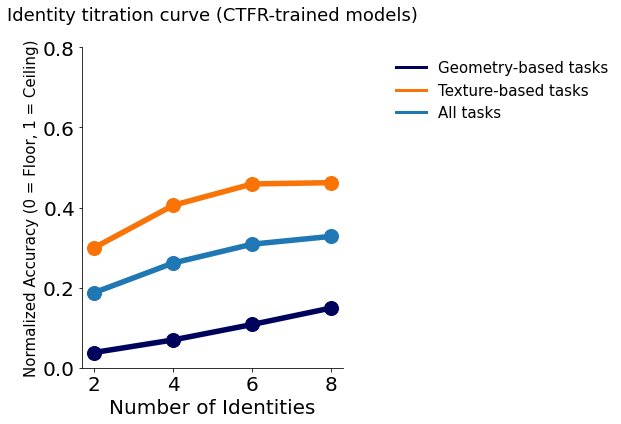

In [32]:
# Compute normalized proportions
# CTFR Ablation curve -- raw

# Indices to use
# selected = [1, 2, 3, 5, 6, 7, 8]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

# baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
# ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All
models = {
    "CTFR-2ID" : np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153]),
    "CTFR-4ID" : np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305]),
    "CTFR-6ID" : np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257]),
    "CTFR-8ID" : np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727]),
    "CTFR-10ID" : np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239]),
}

def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

selected = [1, 2, 3, 5, 6, 7, 8]
proportions_all = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [1,2,3]
proportions_geometry = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [ 5, 6, 7, 8]
proportions_texture = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
plt.figure(figsize=(9, 6))

labels = ['CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID']
print_labels = ['2', '4', '6', '8']

values = [proportions_all[label] for label in labels]
errors = [0.004274367205739823, 0, 0, 0]    # For raw acc
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5)

values = [proportions_geometry[label] for label in labels]
errors = [0.0027244164370250866, 0, 0,0]
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:dark blue')

values = [proportions_texture[label] for label in labels]
errors = [0.006807154975490087, 0, 0,0]  
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:orange')

plt.xticks(fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=20)  # set specific yticks and font size together
plt.ylim([0, 0.8])
plt.xlabel("Number of Identities", fontsize=20)
plt.ylabel("Normalized Accuracy (0 = Floor, 1 = Ceiling)", fontsize=15)

plt.title("Identity titration curve (CTFR-trained models)\n", fontsize=18)
plt.grid(True)
from matplotlib.lines import Line2D

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=3, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=3, label='Texture-based tasks'),
    Line2D([0], [0], lw=3, label='All tasks'),
]

plt.grid(True)
plt.legend(
    handles=legend_elements,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
ax.grid(False)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.savefig("fig4_supplemental_A.pdf", format="pdf", bbox_inches="tight")

plt.show()


### Basel CTFR-trained models

In [37]:
y_vals_basel

[0.7256062857142858,
 0.7535265714285713,
 0.7569478571428572,
 0.7701678571428571,
 0.7700605714285714,
 0.7673655714285713,
 0.7718068571428571,
 0.7618455714285715,
 0.7263518571428572]

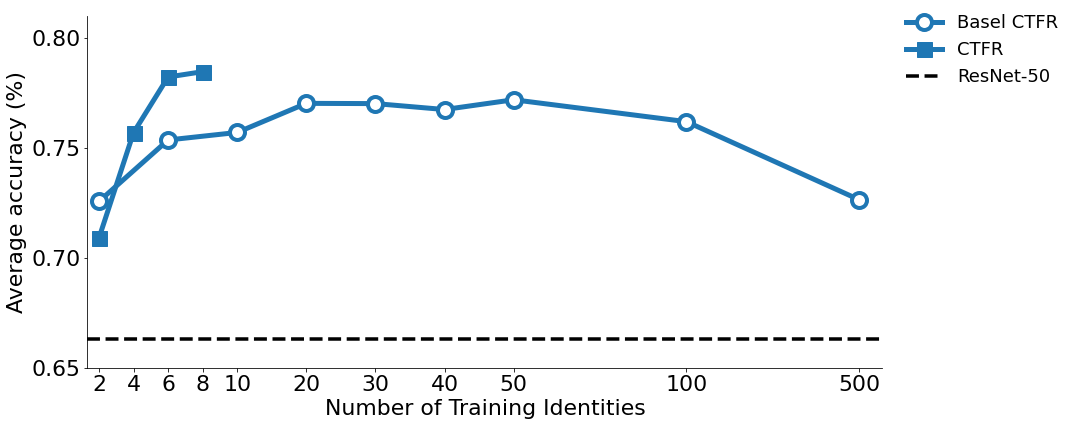

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Your warped mapping function
def warp(x):
    mapping = {
        2: 2,
        4: 5,
        6: 8,
        8: 11,
        10: 14,
        20: 20,
        30: 26,
        40: 32,
        50: 38,
        100: 53,
        500: 68
    }
    return [mapping[val] for val in x]

# Your "Basel CTFR" models
basel_models = {
    2: np.array([0.604444,0.604444,0.5847,0.6195,0.8519,0.8519,0.5916,0.8876,0.9395]),
    6: np.array([0.604186,0.604186,0.6136,0.6521,0.8949,0.8949,0.589,0.9729,0.9480]),
    10: np.array([0.612235,0.612235,0.6010,0.6672,0.9098,0.9098,0.589,0.9846,0.9348]),
    20: np.array([0.627075,0.627075,0.6073,0.6969,0.9200,0.9200,0.5917,0.9940,0.9542]),
    30: np.array([0.619124,0.619124,0.6155,0.6960,0.9110,0.9110,0.5955,0.9944,0.9589]),
    40: np.array([0.625359,0.625359,0.6072,0.7078,0.9089,0.9089,0.6137,0.9984,0.9102]),
    50: np.array([0.627348,0.627348,0.6173,0.7138,0.9091,0.9091,0.6002,0.9980,0.9369]),
    100: np.array([0.617419,0.617419,0.5952,0.6877,0.9077,0.9077,0.605,0.9989,0.9210]),
    500: np.array([0.571163,0.571163,0.5948,0.6629,0.8479,0.8479,0.6055,0.9999,0.8023]),
}

# Your "CTFR" models
ctfr_models = {
    2: np.array([0.6021,0.6007,0.5961,0.5816,0.8913,0.8849,0.5962,0.7900,0.9086,0.7027,0.7810,0.8551]),
    4: np.array([0.6073,0.6003,0.6110,0.6017,0.9234,0.9202,0.6093,0.8619,0.9028,0.7049,0.7976,0.8253]),
    6: np.array([0.6184,0.6122,0.6248,0.6109,0.9323,0.9213,0.6087,0.8692,0.9255,0.6855,0.7718,0.8325]),
    8: np.array([0.6277,0.6381,0.6280,0.6144,0.9356,0.9175,0.6341,0.8918,0.9098,0.6705,0.7726,0.8167]),
    # 10: np.array([0.6278,0.6200,0.6181,0.6129,0.9399,0.9170,0.6192,0.9069,0.9232]),
}

# Selected indices
selected = [1,2,3,5,6,7,8]

# Dummy baseline and ceiling for normalization (if needed)
baseline = np.zeros(14)
ceiling = np.ones(14)

# Function to compute proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

# Process Basel CTFR
labels_basel = list(basel_models.keys())
x_warped_basel = warp(labels_basel)
y_vals_basel = [compute_proportion(basel_models[l], baseline, ceiling, selected)  for l in labels_basel]

# Process CTFR
labels_ctfr = list(ctfr_models.keys())
x_warped_ctfr = warp(labels_ctfr)
y_vals_ctfr = [compute_proportion(ctfr_models[l], baseline, ceiling, selected)  for l in labels_ctfr]

# Plot
plt.figure(figsize=(15, 6))
plt.plot(
    x_warped_basel, y_vals_basel,
    marker='o', linestyle='-', markersize=15, linewidth=5,
    color='tab:blue', markerfacecolor='white', markeredgewidth=4, label="Basel CTFR"
)
plt.plot(
    x_warped_gfr, y_vals_gfr,
    marker='s', linestyle='-', markersize=15, linewidth=5,
    color='tab:blue', label="CTFR"
)
labels_combined = [2,4,6,8,10,20,30,40,50,100,500]
plt.xticks(warp(labels_combined), labels_combined, fontsize=22)
plt.xlim(1, 70)
plt.yticks([0.65, 0.7, 0.75, 0.8], fontsize=22)  # set specific yticks and font size together
plt.ylim([0.65, 0.81])
plt.yticks(fontsize=22)

plt.xlabel("Number of Training Identities", fontsize=22)
plt.ylabel("Average accuracy (%)", fontsize=22)
# plt.title("Identity titration curve (CTFR vs Basel CTFR)", fontsize=20)
plt.axhline(y=0.6630 , color='black', linestyle='--', linewidth=3.5, label='ResNet-50')
plt.grid()

plt.legend(
    fontsize=18,
    loc='upper left',
    bbox_to_anchor=(1.01, 1.05),
    frameon=False
)

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig4B_ver1.pdf", format="pdf", bbox_inches="tight")

plt.show()


# Result 5

In [ ]:
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
model_ceiling_resnet =  np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

model_em_7way_ct_all_ood = np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975])
model_idem_4way_ct_all_ood = np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333])
model_idem_6way_ct_all_ood = np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667])
model_idem_8way_ct_all_ood = np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.819131])
model_idem_10way_ct_all_ood = np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8177326667])
model_idem_12way_ct_all_ood = np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.8146823333])
model_idem_14way_ct_all_ood = np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333])
model_idem_28way_ct_all_ood = np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882])
model_idem_42way_ct_all_ood = np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606])
model_idem_56way_ct_all_ood = np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])

# 9 tasks plot 
task_labels_all_ood = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]  # 

purple_shades = [
    "#F1C4FE",  # Very light lavender
    "#C785E5",  # Light muted lilac
    "#8A47B7",  # Mid purple
    "#61219E",  # Dark plum
    "#3E0B60",  # Deep violet
    "#160424",  # Near-black with subtle purple tone
] 

from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])
task_labels_all_ood = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]  # 'GOR', 'GCTOR', 'IN-Shark1/2'

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        if label == 'CTFR (8ID)' : 
            ax.fill(angles, values, color=color, alpha=0.3)
        else :
            ax.fill(angles, values, color=color, alpha=0.7)

    line, = ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)  # draw line last
    return line

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# # Plot models

# plot_model(ax, model_idem_4way_ct_all_ood[:-3], purple_shades[0], 'CTFER (2IDx2EM)')
# plot_model(ax, model_idem_6way_ct_all_ood[:-3], purple_shades[1], 'CTFER (2IDx3EM)')
# plot_model(ax, model_idem_8way_ct_all_ood[:-3], purple_shades[2], 'CTFER (2IDx4EM)')
# plot_model(ax, model_idem_10way_ct_all_ood[:-3], purple_shades[3], 'CTFER (2IDx5EM)')
# plot_model(ax, model_idem_12way_ct_all_ood[:-3], purple_shades[4], 'CTFER (2IDx6EM)')

h56 = plot_model(ax, model_idem_56way_ct_all_ood[:-3], purple_shades[4], 'CTFER (8ID x 7EM)')
h42 = plot_model(ax, model_idem_42way_ct_all_ood[:-3], purple_shades[3], 'CTFER (6ID x 7EM)')
h28 = plot_model(ax, model_idem_28way_ct_all_ood[:-3], purple_shades[2], 'CTFER (4ID x 7EM)')
h14 = plot_model(ax, model_idem_14way_ct_all_ood[:-3],purple_shades[1], 'CTFER (2ID x 7EM)')
h7 = plot_model(ax, model_em_7way_ct_all_ood[:-3], purple_shades[0], 'CTFER (1ID x 7EM)')

h8_ctfr = plot_model(ax, model_8way_ct_all_ood[:-3], "#1339B8" , 'CTFR (8ID)', linestyle='--')

h_baseline = plot_model(ax, model_resnet_all_ood[:-3] , 'xkcd:light grey', 'Baseline', linestyle='--')
h_ceiling = plot_model(ax, model_ceiling_resnet[:-3], 'xkcd:red', 'Ceiling', fill=False, linestyle='--')


# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=25, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.5, 1.)  # Adjust range as needed
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=22)

ax.set_rlabel_position(0)
handles = [h_baseline, h_ceiling, h8_ctfr, h7, h14, h28, h42, h56]
labels = ['Baseline ResNet-50', 'Ceiling', 'CTFR (8ID)', 'CTFER (1ID x 7EM)', 'CTFER (2ID x 7EM)','CTFER (4ID x 7EM)', 'CTFER (6ID x 7EM)', 'CTFER (8ID x 7EM)']

ax.legend(
    handles,
    labels,
    fontsize=18,
    loc='upper left',
    bbox_to_anchor=(1.2, 1.15),
    frameon=False
)
# plt.title("Generalization across face recognition tasks", fontsize=25, pad=20)
plt.savefig("fig5A.pdf", format="pdf", bbox_inches="tight")
plt.show()




In [ ]:
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
model_ceiling_resnet =  np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

model_em_7way_ct_all_ood = np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975])
model_idem_4way_ct_all_ood = np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333])
model_idem_6way_ct_all_ood = np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667])
model_idem_8way_ct_all_ood = np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.819131])
model_idem_10way_ct_all_ood = np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8177326667])
model_idem_12way_ct_all_ood = np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.8146823333])
model_idem_14way_ct_all_ood = np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333])
model_idem_28way_ct_all_ood = np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882])
model_idem_42way_ct_all_ood = np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606])
model_idem_56way_ct_all_ood = np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])

# 9 tasks plot 
task_labels_all_ood = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]  # 

purple_shades = [
    "#F1C4FE",  # Very light lavender
    "#C785E5",  # Light muted lilac
    "#8A47B7",  # Mid purple
    "#62229E",  # Dark plum
    "#4F0B7D",  # Deep violet
    "#160127",  # Near-black with subtle purple tone
] 

from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])
task_labels_all_ood = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]  # 'GOR', 'GCTOR', 'IN-Shark1/2'

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        if label == 'CTFR (8ID)' : 
            ax.fill(angles, values, color=color, alpha=0.3)
        else :
            ax.fill(angles, values, color=color, alpha=0.7)

    line, = ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)  # draw line last
    return line

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# # Plot models
h14 = plot_model(ax, model_idem_14way_ct_all_ood[:-3],purple_shades[5], 'CTFER (2ID x 7EM)')
h12 = plot_model(ax, model_idem_12way_ct_all_ood[:-3], purple_shades[4], 'CTFER (2ID x 6EM)')
h10 = plot_model(ax, model_idem_10way_ct_all_ood[:-3], purple_shades[3], 'CTFER (2ID x 5EM)')
h8 = plot_model(ax, model_idem_8way_ct_all_ood[:-3], purple_shades[2], 'CTFER (2ID x 4EM)')
h6= plot_model(ax, model_idem_6way_ct_all_ood[:-3], purple_shades[1], 'CTFER (2ID x 3EM)')
h4 = plot_model(ax, model_idem_4way_ct_all_ood[:-3], purple_shades[0], 'CTFER (2ID x 2EM)')

h8_ctfr = plot_model(ax, model_8way_ct_all_ood[:-3], "#1339B8" , 'CTFR (8ID)', linestyle='--')

h_baseline = plot_model(ax, model_resnet_all_ood[:-3] , 'xkcd:light grey', 'Baseline', linestyle='--')
h_ceiling = plot_model(ax, model_ceiling_resnet[:-3], 'xkcd:red', 'Ceiling', fill=False, linestyle='--')


# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=25, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.5, 1.)  # Adjust range as needed
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=22)

ax.set_rlabel_position(0)
handles = [h_baseline, h_ceiling, h8_ctfr, h4, h6, h8, h10, h12, h14]
labels = ['Baseline ResNet-50', 'Ceiling', 'CTFR (8ID)', 'CTFER (2ID x 2EM)', 'CTFER (2ID x 3EM)','CTFER (2ID x 4EM)', 'CTFER (2ID x 5EM)', 'CTFER (2ID x 6EM)', 'CTFER (2ID x 7EM)']

ax.legend(
    handles,
    labels,
    fontsize=18,
    loc='upper left',
    bbox_to_anchor=(1.2, 1.15),
    frameon=False
)
# plt.title("Generalization across face recognition tasks", fontsize=25, pad=20)
plt.savefig("fig5_supplemental_A.pdf", format="pdf", bbox_inches="tight")
plt.show()




In [ ]:
# Ablation (4-14IDEM) raw acc / all performance 

# CTFR Ablation curve -- raw

# Indices to use
selected = [1, 2, 3, 5, 6, 7, 8]
# selected = [7]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])

baseline = baseline_resnet
ceiling = ceiling_resnet

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All models
models = {
    "CTFER-\n4IDEM":  np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333]),
    "CTFER-\n6IDEM":  np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667]),
    "CTFER-\n8IDEM":  np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.8177326667]),
    "CTFER-\n10IDEM": np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8146823333]),
    "CTFER-\n12IDEM": np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.81468233333]),
    # "CTFER-\n7DEM": np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975]),
    "CTFER-\n14IDEM": np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333]),
    # "CTFER-\n28IDEM": np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882]),
    # "CTFER-\n42IDEM": np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606]),
    # "CTFER-\n56IDEM": np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['CTFER-\n4IDEM', 'CTFER-\n6IDEM', 'CTFER-\n8IDEM', 'CTFER-\n10IDEM', 'CTFER-\n12IDEM', 'CTFER-\n14IDEM']
values = [proportions[label]*100 for label in labels]


plt.figure(figsize=(7.75, 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
print_labels = ['2', '3', '4', '5', '6', '7']
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,1)

plt.xlabel("Number of Emotions", fontsize=14)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=14)
plt.ylabel("Averaged Accuracy (%)", fontsize=14)

# # ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.6630442056, color='gray', linestyle='--', linewidth=2)

# # Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=baseline_resnet[selected]*100, color='black', linestyle='--', linewidth=3.5)
plt.axhline(y=0.6630442056*100, color='black', linestyle='--', linewidth=3.5, label = 'ResNet-50')

# plt.title("Normalized Ablation Curve (Selected Indices)")
plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=15)

plt.title("Emotion titration curve\nCTFER-trained models\n2 Identities per Emotion", fontsize=16)
plt.grid(True)
plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ablation (4-14IDEM) all in one plot

models = {
    "CTFER-\n4IDEM":  np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333]),
    "CTFER-\n6IDEM":  np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667]),
    "CTFER-\n8IDEM":  np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.8177326667]),
    "CTFER-\n10IDEM": np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8146823333]),
    "CTFER-\n12IDEM": np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.81468233333]),
    # "CTFER-\n7DEM": np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975]),
    "CTFER-\n14IDEM": np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333]),
    # "CTFER-\n28IDEM": np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882]),
    # "CTFER-\n42IDEM": np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606]),
    # "CTFER-\n56IDEM": np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])
}
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

selected = [1, 2, 3, 5, 6, 7, 8]
proportions_all = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [1,2,3]
proportions_geometry = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [ 5, 6, 7, 8]
proportions_texture = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
plt.figure(figsize=(9.5, 6))

labels = ['CTFER-\n4IDEM', 'CTFER-\n6IDEM', 'CTFER-\n8IDEM', 'CTFER-\n10IDEM', 'CTFER-\n12IDEM', 'CTFER-\n14IDEM']
print_labels = ['2', '3', '4', '5', '6', '7']

values = [proportions_all[label] for label in labels]
# errors = errors_all

plt.errorbar(print_labels, values,marker='o', linestyle='-', markersize=14, linewidth=5.5, color='tab:purple')

values = [proportions_geometry[label] for label in labels]
# errors = errors_geometry
plt.errorbar(print_labels, values,marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:dark blue')

values = [proportions_texture[label] for label in labels]
# errors = errors_texture
plt.errorbar(print_labels, values,marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:orange')

plt.xticks(fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=20)  # set specific yticks and font size together
plt.ylim([0, 0.8])
# plt.ylim(0,1)
plt.xlabel("Number of Emotions", fontsize=20)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=15)

plt.title("Emotion titration curve (CTFER-trained models)\n2 Identities per Emotion", fontsize=18)
plt.grid(True)
from matplotlib.lines import Line2D

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=5, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=5, label='Texture-based tasks'),
    Line2D([0], [0], color='tab:purple', lw=5, label='All tasks'),
]

plt.grid(True)
plt.legend(
    handles=legend_elements,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig5_supplemental_D.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# Ablation (7-56 IDEM) raw acc / all performance 

# CTFR Ablation curve -- raw

# Indices to use
selected = [1, 2, 3, 5, 6, 7, 8]
# selected = [7]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all
baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All models
models = {
    # "CTFER-\n4IDEM":  np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333]),
    # "CTFER-\n6IDEM":  np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667]),
    # "CTFER-\n8IDEM":  np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.8177326667]),
    # "CTFER-\n10IDEM": np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8146823333]),
    # "CTFER-\n12IDEM": np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.81468233333]),
    "CTFER-\n7IDEM": np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975]),
    "CTFER-\n14IDEM": np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333]),
    "CTFER-\n28IDEM": np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882]),
    "CTFER-\n42IDEM": np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606]),
    "CTFER-\n56IDEM": np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['CTFER-\n7IDEM', 'CTFER-\n14IDEM', 'CTFER-\n28IDEM', 'CTFER-\n42IDEM', 'CTFER-\n56IDEM']
print_labels = ['1', '2', '4', '6', '8']
values = [proportions[label]*100 for label in labels]
errors = [0, 0, 0, 0, 0]    # For raw acc


plt.figure(figsize=(7.7, 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,1)

plt.xlabel("Number of Identity", fontsize=16)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=13)
plt.ylabel("Averaged Accuracy (%)", fontsize=16)

# ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.6630442056*100, color='black', linestyle='--', linewidth=5, label='ResNet-50')
# plt.axhline(y=baseline_resnet[selected]*100, color='black', linestyle='--', linewidth=5, label='ResNet-50')

# # Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.7312039091, color='gray', linestyle='--', linewidth=2)

plt.title("Identity titration curve\nCTFER-trained models\n7 Emotions per Identity", fontsize=16)
plt.grid(True)
plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
# Ablation (4-14IDEM) all in one plot

models = {
    # "CTFER-\n4IDEM":  np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333]),
    # "CTFER-\n6IDEM":  np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667]),
    # "CTFER-\n8IDEM":  np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.8177326667]),
    # "CTFER-\n10IDEM": np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8146823333]),
    # "CTFER-\n12IDEM": np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.81468233333]),
    "CTFER-\n7IDEM": np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975]),
    "CTFER-\n14IDEM": np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333]),
    "CTFER-\n28IDEM": np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882]),
    "CTFER-\n42IDEM": np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606]),
    "CTFER-\n56IDEM": np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])
}
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

selected = [1, 2, 3, 5, 6, 7, 8]
proportions_all = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [1,2,3]
proportions_geometry = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [ 5, 6, 7, 8]
proportions_texture = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
plt.figure(figsize=(9.5, 6))

labels = ['CTFER-\n7IDEM', 'CTFER-\n14IDEM', 'CTFER-\n28IDEM', 'CTFER-\n42IDEM', 'CTFER-\n56IDEM']
print_labels = ['1', '2', '4', '6', '8']

values = [proportions_all[label] for label in labels]
# errors = errors_all

plt.errorbar(print_labels, values,marker='o', linestyle='-', markersize=14, linewidth=5.5, color='tab:purple')

values = [proportions_geometry[label] for label in labels]
# errors = errors_geometry
plt.errorbar(print_labels, values,marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:dark blue')

values = [proportions_texture[label] for label in labels]
# errors = errors_texture
plt.errorbar(print_labels, values,marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:orange')

plt.xticks(fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=20)  # set specific yticks and font size together
plt.ylim([0, 0.8])
# plt.ylim(0,1)
plt.xlabel("Number of Identities", fontsize=20)
plt.ylabel("Normalized Accuracy (0 = Floor, 1 = Ceiling)", fontsize=15)

plt.title("Identity titration curve (CTFER-trained models)\n7 Emotions per Identity", fontsize=18)
plt.grid(True)
from matplotlib.lines import Line2D

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=5, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=5, label='Texture-based tasks'),
    Line2D([0], [0], color='tab:purple', lw=5, label='All tasks'),
]

plt.grid(True)
plt.legend(
    handles=legend_elements,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.savefig("fig5_supplemental_C.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
# bar plot 
# 4 bar plots: gfr, ctfr, ger, cter for ctfr models vs gfr models

model_names = ['ResNet-50', 'CTFER-4IDEM', 'CTFER-6IDEM', 'CTFER-8IDEM', 'CTFER-10IDEM', 
               'CTFER-12IDEM', 'CTFER-14IDEM', 
               'CTFER-28IDEM', 'CTFER-42IDEM', 'CTFER-56IDEM' ][:7]
model_names = ['ResNet-50', '2EM', '3EM', '4EM', '5EM', '6EM', '7EM']

x = np.arange(len(model_names))

# Accuracy data (%)
gfr_means = [60.3/100, 0.6322091,
0.6523248,
0.66519233,
0.68578479,
0.67869851,
0.6782412,
0.67973625,
0.672791,
0.701777,
][:7]
gfr_stds = [5.1/100, 0.0541436,
0.06161781,
0.06473976,
0.06635867,
0.06765832,
0.0679859,
0.0684,
0.0632,
0.0765,
][:7]
gfr_sems = gfr_stds / np.sqrt(66)

ctfr_means = [80.22/100, 0.8938,
0.8824,
0.8812,
0.8853,
0.8782,
0.8747,
0.9083,
0.913,
0.9032,
][:7]
ctfr_stds = [6.98/100, 0.0474,
0.0475,
0.0440,
0.0405,
0.0407,
0.0407,
0.0309,
0.0399,
0.0282,
][:7]

ctfr_sems = ctfr_stds / np.sqrt(66)

# Example GER and CTER data (replace with your own values)
ger_means = [0.579,
0.6468,
0.6738,
0.7124,
0.7313,
0.7414,
0.7399,
0.7528,
0.7345,
0.7514,
][:7]
ger_stds = [0.0354,
0.0599,
0.0649,
0.0658,
0.0642,
0.0689,
0.0701,
0.06856273,
0.06225334,
0.06249807,
][:7]
ger_sems = ger_stds / np.sqrt(21)

cter_means = [0.6001,
0.684,
0.6984,
0.7466,
0.768,
0.7842,
0.7839,
0.8046,
0.7933,
0.7957,
][:7]
cter_stds = [0.0608,
0.0797,
0.0762,
0.0815,
0.0749,
0.0817,
0.0783,
0.0759,
0.0721,
0.0778,
][:7]
cter_sems = cter_stds / np.sqrt(21)

# Transpose data to [n_tasks x n_models]
means = np.array([gfr_means, ger_means, ctfr_means, cter_means])
stds = np.array([gfr_stds, ger_stds, ctfr_stds, cter_stds])

# Bar plot parameters
n_tasks = 4
n_models = len(model_names)
bar_width = 0.1
x = np.arange(n_tasks)
offsets = np.linspace(-1.5, 1.5, n_models) * bar_width * 2.2

# Colors and hatching per task
task_colors = ['tab:purple','tab:purple', 'tab:purple',  'tab:purple']
# task_colors = ['xkcd:dark green','xkcd:dark blue', 'xkcd:dark green',  'xkcd:dark blue']
task_hatches = ['', '', '///', '///']

fig, ax = plt.subplots(figsize=(15.5, 6))

# Plot each model across tasks
# Plot each model across tasks
for t in range(n_tasks):  # GFR, CTFR, GER, CTER
    for m_idx in range(n_models):  # ResNet-50, GFR-2ID, ..., CTFR-8ID
        xpos = x[t] + offsets[m_idx]
        val = means[t, m_idx]
        err = stds[t, m_idx]

        # Determine color, edge color, and hatch
        if m_idx == 0:
            bar_color = 'gray'
            edge_color = 'black'
            line_width = 0
        else:
            bar_color = task_colors[t]
            edge_color = 'black'
            line_width = 0

        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        hatch = '///' if t in [2,3] else ''

        ax.bar(
            xpos,
            val,
            yerr=err,
            ecolor='black',
            error_kw=dict(elinewidth=1.25),
            width=bar_width,
            color=bar_color,
            edgecolor=edge_color,
            hatch=hatch,
            capsize=0,
            linewidth=line_width,
            label=None  # avoid duplicate legends
        )

        # Add text label
        ax.text(xpos, val + err + 0.005, f'{val:.2f}', ha='center', fontsize=10)

xtick_positions = []
xtick_labels = []

for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        xtick_positions.append(xpos)
        xtick_labels.append(model_names[m])


# Formatting
ax.set_ylabel('Average Accuracy (%)', fontsize=18)
# ax.set_title('Model Performance Across Face Recognition Tasks', fontsize=18)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=16, rotation=90)

ax.set_ylim(0.5, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels([0.5, 0.75, 1.0], fontsize=16)

for t in range(n_tasks):
    ax.bar(0, 0, color=task_colors[t], hatch=task_hatches[t], label=task_names[t])
legend_handles = [
    Patch(facecolor=task_colors[0], hatch=task_hatches[0], label='GFR tasks (n=66)'),
    Patch(facecolor=task_colors[1], hatch=task_hatches[1], label='GER tasks (n=21)'),
    Patch(facecolor=task_colors[2], hatch=task_hatches[2], label='CTFR tasks (n=66)'),
    Patch(facecolor=task_colors[3], hatch=task_hatches[3], label='CTER tasks (n=21)'),
]
# ax.text(1.5, 48, 'Geometry-based tasks', fontsize=14, ha='center', weight='bold')
# ax.text(6.0, 48, 'Texture-based tasks', fontsize=14, ha='center', weight='bold')
plt.title("CTFER-trained Model Performance (2 Identities per Emotion)", fontsize=20)

ax.legend(
    handles=legend_handles,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.0, 1.05),
    frameon=False
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
# plt.savefig("fig5_supplemental_B.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
# bar plot 
# 4 bar plots: gfr, ctfr, ger, cter for ctfr models vs gfr models

model_names = [
    'ResNet-50',
    '1ID x 7EM',
    '2ID x 7EM',
    '4ID x 7EM',
    '6ID x 7EM',
    '8ID x 7EM'
]
model_names = ['ResNet-50', '1ID', '2ID', '4ID', '6ID', '8ID']

x = np.arange(len(model_names))

# Accuracy data (%)
gfr_means = [60.3/100, 
0.66652005,
0.6782412,
0.67973625,
0.672791,
0.701777,
]
gfr_stds = [5.1/100, 
0.05821468,
0.0679859,
0.0684,
0.0632,
0.0765,
]
gfr_sems = gfr_stds / np.sqrt(66)

ctfr_means = [80.22/100,
0.8442,
0.8747,
0.9083,
0.913,
0.9032,
]
ctfr_stds = [6.98/100, 
0.0464,
0.0407,
0.0309,
0.0399,
0.0282,
]

ctfr_sems = ctfr_stds / np.sqrt(66)

# Example GER and CTER data (replace with your own values)
ger_means = [0.579,

0.7232,
0.7399,
0.7528,
0.7345,
0.7514,
]
ger_stds = [0.0354,

0.0692,
0.0701,
0.06856273,
0.06225334,
0.06249807,
]
ger_sems = ger_stds / np.sqrt(21)

cter_means = [0.6001,

0.7613,
0.7839,
0.8046,
0.7933,
0.7957,
]
cter_stds = [0.0608,

0.0766,
0.0783,
0.0759,
0.0721,
0.0778,
]
cter_sems = cter_stds / np.sqrt(21)

means = np.array([gfr_means, ger_means, ctfr_means, cter_means])
stds = np.array([gfr_stds, ger_stds, ctfr_stds, cter_stds])

# Bar plot parameters
n_tasks = 4
n_models = len(model_names)
bar_width = 0.105
x = np.arange(n_tasks)
offsets = np.linspace(-1.5, 1.5, n_models) * bar_width * 1.9

# Colors and hatching per task
task_colors = ['tab:purple','tab:purple', 'tab:purple',  'tab:purple']
# task_colors = ['xkcd:dark green','xkcd:dark blue', 'xkcd:dark green',  'xkcd:dark blue']
task_hatches = ['', '', '///', '///']

fig, ax = plt.subplots(figsize=(15, 6))

for t in range(n_tasks):  # GFR, CTFR, GER, CTER
    for m_idx in range(n_models):  # ResNet-50, GFR-2ID, ..., CTFR-8ID
        xpos = x[t] + offsets[m_idx]
        val = means[t, m_idx]
        err = stds[t, m_idx]

        # Determine color, edge color, and hatch
        if m_idx == 0:
            bar_color = 'gray'
            edge_color = 'black'
            line_width = 0
        else:
            bar_color = task_colors[t]
            edge_color = 'black'
            line_width = 0

        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        hatch = '///' if t in [2,3] else ''

        ax.bar(
            xpos,
            val,
            yerr=err,
            ecolor='black',
            error_kw=dict(elinewidth=1.25),
            width=bar_width,
            color=bar_color,
            edgecolor=edge_color,
            hatch=hatch,
            capsize=0,
            linewidth=line_width,
            label=None  # avoid duplicate legends
        )

        # Add text label
        ax.text(xpos, val + err + 0.005, f'{val:.2f}', ha='center', fontsize=10)

xtick_positions = []
xtick_labels = []

for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        xtick_positions.append(xpos)
        xtick_labels.append(model_names[m])


# Formatting

# Formatting
ax.set_ylabel('Average Accuracy (%)', fontsize=18)
# ax.set_title('Model Performance Across Face Recognition Tasks', fontsize=18)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=16, rotation=90)

ax.set_ylim(0.5, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels([0.5, 0.75, 1.0], fontsize=16)
for t in range(n_tasks):
    ax.bar(0, 0, color=task_colors[t], hatch=task_hatches[t], label=task_names[t])
legend_handles = [
    Patch(facecolor=task_colors[0], hatch=task_hatches[0], label='GFR tasks (n=66)'),
    Patch(facecolor=task_colors[1], hatch=task_hatches[1], label='GER tasks (n=21)'),
    Patch(facecolor=task_colors[2], hatch=task_hatches[2], label='CTFR tasks (n=66)'),
    Patch(facecolor=task_colors[3], hatch=task_hatches[3], label='CTER tasks (n=21)'),
]
# ax.text(1.5, 48, 'Geometry-based tasks', fontsize=14, ha='center', weight='bold')
# ax.text(6.0, 48, 'Texture-based tasks', fontsize=14, ha='center', weight='bold')
plt.title("CTFER-trained Model Performance (7 Emotions per Identity)", fontsize=20)
ax.legend(
    handles=legend_handles,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.0, 1.05),
    frameon=False
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.savefig("fig5B.pdf", format="pdf", bbox_inches="tight")

plt.show()



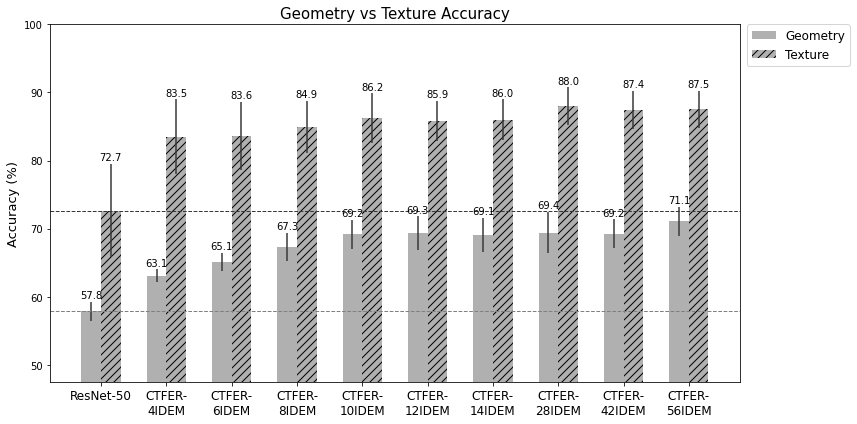

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Model labels
model_names = ['ResNet-50', 'CTFER-\n4IDEM', 'CTFER-\n6IDEM', 'CTFER-\n8IDEM', 'CTFER-\n10IDEM', 
               'CTFER-\n12IDEM', 'CTFER-\n14IDEM' , 'CTFER-\n28IDEM', 'CTFER-\n42IDEM' , 'CTFER-\n56IDEM']

# Indices in *_all_ood arrays for those models
geometry_indices = [1, 2, 3]
texture_indices = [5, 6, 7, 8]
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])

model_em_7way_ct_all_ood = np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975])
model_idem_4way_ct_all_ood = np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333])
model_idem_6way_ct_all_ood = np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667])
model_idem_8way_ct_all_ood = np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.819131])
model_idem_10way_ct_all_ood = np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8177326667])
model_idem_12way_ct_all_ood = np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.8146823333])
model_idem_14way_ct_all_ood = np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333])
model_idem_28way_ct_all_ood = np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882])
model_idem_42way_ct_all_ood = np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606])
model_idem_56way_ct_all_ood = np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])

# Geometry accuracies (GFR + CTFR)
geometry_means = np.array([
    np.mean([model_resnet_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_4way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_6way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_8way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_10way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_12way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_14way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_28way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_42way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([model_idem_56way_ct_all_ood[i] for i in geometry_indices]),
]) * 100

n=3
geometry_stderr = np.array([
    np.std([model_resnet_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_4way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_6way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_8way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_10way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_12way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_14way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
        np.std([model_idem_28way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_42way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_56way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
]) * 100


texture_means = np.array([
    np.mean([model_resnet_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_4way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_6way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_8way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_10way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_12way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_14way_ct_all_ood[i] for i in texture_indices]),
        np.mean([model_idem_28way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_42way_ct_all_ood[i] for i in texture_indices]),
    np.mean([model_idem_56way_ct_all_ood[i] for i in texture_indices]),

]) * 100

n=4
texture_stderr = np.array([
    np.std([model_resnet_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_4way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_6way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_8way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_10way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_12way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_14way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
        np.std([model_idem_28way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_42way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([model_idem_56way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
]) * 100

# Plot config
x = np.arange(len(model_names))
bar_width = 0.3
x_geometry = x - bar_width / 2
x_texture = x + bar_width / 2

# Colors
geometry_color = '#b0b0b0'
texture_color = '#4c72b0'

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bars_geometry = ax.bar(x_geometry, geometry_means, ecolor='xkcd:dark gray', yerr=geometry_stderr, width=bar_width, color=geometry_color, label='Geometry')
bars_texture = ax.bar(x_texture, texture_means, ecolor='xkcd:dark gray',yerr=texture_stderr, width=bar_width, color=geometry_color,  hatch='///',label='Texture')

# Value labels
for i, bar in enumerate(bars_geometry):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + geometry_stderr[i] +0.5, f'{height:.1f}', ha='center', fontsize=10)

for i, bar in enumerate(bars_texture):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + texture_stderr[i]+0.5, f'{height:.1f}', ha='center', fontsize=10)

# Formatting
ax.set_ylabel('Accuracy (%)', fontsize=13)
ax.set_title('Geometry vs Texture Accuracy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=0, fontsize=12)
ax.set_ylim(47.5, 100)
# ax.axhline(50, color='red', linestyle='--', linewidth=1)
ax.axhline(np.mean([model_resnet_all_ood[i] for i in geometry_indices])*100, color='gray', linestyle='--', linewidth=1)
ax.axhline(np.mean([model_resnet_all_ood[i] for i in texture_indices])*100, color='xkcd:dark gray', linestyle='--', linewidth=1)

ax.legend(fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()


# Result 6

In [ ]:
# Radar plot, compare best-performing GFR with CTFR
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)
# task: all face tasks (7)


model_2way_all_ood =  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667])
model_4way_all_ood = np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807])
model_6way_all_ood =  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437])
model_8way_all_ood = np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923])
model_10way_all_ood = np.array([0.738531,0.7823,0.7180584662,0.8177,0.7988,0.6438,0.7766926103,0.9337,0.683432,0.740161,0.817677])

model_2way_ct_all_ood = np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153])
model_4way_ct_all_ood = np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305])
model_6way_ct_all_ood = np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257])
model_8way_ct_all_ood = np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727])
model_10way_ct_all_ood = np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239,0.683598,0.77107,0.818129])
model_12way_ct_all_ood = np.array([0.6393,0,0.6163,0.6304802897,0.9468,0,0.6153,0.9090995747,0.915399,0.66201,0.763704,0.790314])
model_idem_28way_ct_all_ood = np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882])

model_idem_4way_ct_all_ood = np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333])
model_idem_6way_ct_all_ood = np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667])
model_idem_8way_ct_all_ood = np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.819131])
model_idem_10way_ct_all_ood = np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8177326667])
model_idem_12way_ct_all_ood = np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.8146823333])
model_idem_14way_ct_all_ood = np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333])
model_idem_28way_ct_all_ood = np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882])
model_idem_42way_ct_all_ood = np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606])
model_idem_56way_ct_all_ood = np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])

bt_model_all_ood = np.array([0.654138,0.654138,0.6308,0.6009386364,0.9009,0.9009,0.6241,0.7300707273,0.97748])
bt_model_ceiling_all_ood = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224])

bt_model_id_6way_all_ood = np.array([0.864384,0.845662,0.8041111905,0.8148456074,0.7456,0.7071,0.5558,0.580684164,0.810571])
bt_model_id_8way_ct_all_ood = np.array([0.668497,0.684735,0.6448,0.7019003522,0.9532,0.9475,0.6351,0.9088172382,0.982643])

bt_model_idem_7way_ct_all_ood = np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224])
bt_model_idem_4way_ct_all_ood = np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333])
bt_model_idem_6way_ct_all_ood = np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575])
bt_model_idem_8way_ct_all_ood = np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333])
bt_model_idem_10way_ct_all_ood = np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094])
bt_model_idem_12way_ct_all_ood = np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667])
bt_model_idem_14way_ct_all_ood = np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667])
bt_model_idem_28way_ct_all_ood = np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317])
bt_model_idem_42way_ct_all_ood = np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565])
bt_model_idem_56way_ct_all_ood = np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539])

# 9 tasks plot 
task_labels_all_ood_subset = [
    'GFR-all', 'GFR-OOD', 'GER', 'Basel-\nGFR',
    'CTFR-all', 'CTFR-OOD', 'CTER', 'Basel-\nCTFR',  'LFW-BP',
    # 'GOR', 'GCTOR', 'IN-Shark1/2'
]
purple_shades = [
    "#F3EDF7",  # Very light lavender
    "#D1BEEA",  # Light muted lilac
    "#A67DC1",  # Mid purple
    "#6C4A8E",  # Dark plum
    "#2F1D47",  # Deep violet
    "#1A0D25",  # Near-black with subtle purple tone
] 
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])

num_spokes = len(task_labels_all_ood_subset)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.3)
    ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=2.5, label=label)  # draw line last
# def plot_model(ax, values, color, label, fill=True, linestyle='-', error=None):
#     values = np.append(values, values[0])  # Close the shape
#     if error is not None:
#         error = np.append(error, error[0])
#         lower = values - error
#         upper = values + error
#         ax.fill_between(angles, lower, upper, color=color, alpha=0.2)  # Confidence band

#     if fill:
#         ax.fill(angles, values, color=color, alpha=0.1)
#     ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=2, label=label)

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# Plot models
# plot_model(ax, model_resnet_all_ood[:-3] , 'xkcd:grey', 'SUP ResNet-50', linestyle='--')
plot_model(ax, bt_model_all_ood , 'xkcd:light grey', 'BT ResNet-50', linestyle='--')
plot_model(ax, bt_model_ceiling_all_ood, 'xkcd:red', 'BT ceiling', fill=False, linestyle='--')

# plot_model(ax, model_6way_all_ood[:-3], "green", 'GFR-6ID')
# plot_model(ax, model_8way_ct_all_ood[:-3], "blue", 'CTFR-8ID')
# plot_model(ax, model_idem_8way_ct_all_ood[:-3], "tab:purple", 'CTFER-8IDEM')
plot_model(ax, model_idem_28way_ct_all_ood[:-3], "tab:purple", 'CTFER-28IDEM')
# plot_model(ax, bt_model_idem_28way_ct_all_ood, 'purple', 'BT-CTFER-28IDEM')

# plot_model(ax, bt_model_id_6way_all_ood, "xkcd:dark green", 'BT-GFR-6ID')
# plot_model(ax, bt_model_id_8way_ct_all_ood, "xkcd:dark blue", 'BT-CTFR-8ID')
# plot_model(ax, bt_model_idem_8way_ct_all_ood, "xkcd:dark purple", 'BT-CTFER-8IDEM')
plot_model(ax, bt_model_idem_28way_ct_all_ood, "xkcd:dark purple", 'BT-CTFER-28IDEM')
# plot_model(ax, bt_model_idem_28way_ct_all_ood, 'purple', 'BT-CTFER-28IDEM')


# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood_subset, fontsize=20, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.45, 1.015)  # Adjust range as needed
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=13)

ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2), fontsize=13)
plt.title("Generalization across face recognition tasks", fontsize=25, pad=20)

plt.show()




In [ ]:
# Radar plot, compare best-performing GFR with CTFR
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)
# task: all face tasks (7)


model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
model_ceiling_resnet =  np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

bt_model_id_6way_all_ood = np.array([0.864384,0.845662,0.8041111905,0.8148456074,0.7456,0.7071,0.5558,0.580684164,0.810571])
bt_model_id_8way_ct_all_ood = np.array([0.668497,0.684735,0.6448,0.7019003522,0.9532,0.9475,0.6351,0.9088172382,0.982643])

bt_model_idem_7way_ct_all_ood = np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224])
bt_model_idem_4way_ct_all_ood = np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333])
bt_model_idem_6way_ct_all_ood = np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575])
bt_model_idem_8way_ct_all_ood = np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333])
bt_model_idem_10way_ct_all_ood = np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094])
bt_model_idem_12way_ct_all_ood = np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667])
bt_model_idem_14way_ct_all_ood = np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667])
bt_model_idem_28way_ct_all_ood = np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317])
bt_model_idem_42way_ct_all_ood = np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565])
bt_model_idem_56way_ct_all_ood = np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539])

# 9 tasks plot 
task_labels_all_ood_subset = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'

]
purple_shades = [
    "#FBD6FF",  # Very light lavender
    "#DF9BFF",  # Light muted lilac
    "#A35BD3",  # Mid purple
    "#722DB3",  # Dark plum
    "#512789",  # Deep violet
    "#11031C",  # Near-black with subtle purple tone
] 

from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])

num_spokes = len(task_labels_all_ood_subset)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        if label == 'BT-CTFR (8ID)' : 
            ax.fill(angles, values, color=color, alpha=0.3)
        else :
            ax.fill(angles, values, color=color, alpha=0.7)

    line, = ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)  # draw line last
    return line

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# Plot models
h14 = plot_model(ax, bt_model_idem_14way_ct_all_ood, purple_shades[5], 'BT-CTFER (2IDx6EM)')
h12 = plot_model(ax, bt_model_idem_12way_ct_all_ood, purple_shades[4], 'BT-CTFER (2IDx5EM)')
h10 = plot_model(ax, bt_model_idem_10way_ct_all_ood, purple_shades[3], 'BT-CTFER (2IDx4EM)')
h8 = plot_model(ax, bt_model_idem_8way_ct_all_ood, purple_shades[2], 'BT-CTFER (2IDx3EM)')
h6= plot_model(ax, bt_model_idem_6way_ct_all_ood, purple_shades[1], 'BT-CTFER (2IDx2EM)')
h4 =plot_model(ax, bt_model_idem_4way_ct_all_ood, purple_shades[0], 'BT-CTFER (2IDx1EM)')

h8_ctfr = plot_model(ax, bt_model_id_8way_ct_all_ood, "#1339B8" , 'BT-CTFR (8ID)', linestyle='--')

h_baseline = plot_model(ax, model_resnet_all_ood[:-3] , 'xkcd:light grey', 'Baseline', linestyle='--')
h_ceiling = plot_model(ax, model_ceiling_resnet[:-3], 'xkcd:red', 'Ceiling', fill=False, linestyle='--')


# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=25, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.5, 1.)  # Adjust range as needed
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=22)

ax.set_rlabel_position(0)
handles = [h_baseline, h_ceiling, h8_ctfr, h4, h6, h8, h10, h12, h14]
labels = ['Baseline ResNet-50', 'BT-Ceiling', 'BT-CTFR (8ID)', 'BT-CTFER (2ID x 2EM)', 'BT-CTFER (2ID x 3EM)','BT-CTFER (2ID x 4EM)', 'BT-CTFER (2ID x 5EM)', 'BT-CTFER (2ID x 6EM)', 'BT-CTFER (2ID x 7EM)']

ax.legend(
    handles,
    labels,
    fontsize=18,
    loc='upper left',
    bbox_to_anchor=(1.2, 1.15),
    frameon=False
)
# plt.title("Generalization across face recognition tasks", fontsize=25, pad=20)
plt.savefig("fig6_supplemental_A.pdf", format="pdf", bbox_inches="tight")
plt.show()





In [ ]:
# BT CTFER 4-14 IDEM radar plot 
# Radar plot, compare best-performing GFR with CTFR
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)
# task: all face tasks (7)
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
model_ceiling_resnet =  np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

bt_model_id_6way_all_ood = np.array([0.864384,0.845662,0.8041111905,0.8148456074,0.7456,0.7071,0.5558,0.580684164,0.810571])
bt_model_id_8way_ct_all_ood = np.array([0.668497,0.684735,0.6448,0.7019003522,0.9532,0.9475,0.6351,0.9088172382,0.982643])

bt_model_idem_7way_ct_all_ood = np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224])
bt_model_idem_4way_ct_all_ood = np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333])
bt_model_idem_6way_ct_all_ood = np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575])
bt_model_idem_8way_ct_all_ood = np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333])
bt_model_idem_10way_ct_all_ood = np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094])
bt_model_idem_12way_ct_all_ood = np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667])
bt_model_idem_14way_ct_all_ood = np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667])
bt_model_idem_28way_ct_all_ood = np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317])
bt_model_idem_42way_ct_all_ood = np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565])
bt_model_idem_56way_ct_all_ood = np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539])

# 9 tasks plot 
task_labels_all_ood = [
    'GFR\n(all)', 'GFR\n(OOD)', 'GER', 'Basel\nGFR', 'CTFR\n(all)','CTFR\n(OOD)', 'CTER','Basel\nCTFR', 'Face\nPhoto'
]  # 
# Extended to 6 levels from light to near-black
purple_shades = [
    "#F1C4FE",  # Very light lavender
    "#C785E5",  # Light muted lilac
    "#8A47B7",  # Mid purple
    "#61219E",  # Dark plum
    "#3E0B60",  # Deep violet
    "#160424",  # Near-black with subtle purple tone
] 
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])

num_spokes = len(task_labels_all_ood_subset)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        if label == 'BT-CTFR (8ID)' : 
            ax.fill(angles, values, color=color, alpha=0.3)
        else :
            ax.fill(angles, values, color=color, alpha=0.7)

    line, = ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)  # draw line last
    return line

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# Plot models
# plot_model(ax, model_resnet_all_ood , 'xkcd:grey', 'SUP ResNet-50', linestyle='--')
# plot_model(ax, bt_model_all_ood , 'xkcd:light grey', 'BT ResNet-50', linestyle='--')
# plot_model(ax, bt_model_ceiling_all_ood, 'xkcd:red', 'BT ceiling', fill=False, linestyle='--')

# plot_model(ax, bt_model_id_6way_all_ood, green_shades[2], 'BT-GFR-6ID')
# plot_model(ax, bt_model_id_8way_ct_all_ood, blue_shades[3], 'BT-CTFR-8ID')
# plot_model(ax, bt_model_idem_28way_ct_all_ood, red_shades[2], 'BT-CTFER-28IDEM')
# plot_model(ax, bt_model_idem_28way_ct_all_ood, 'purple', 'BT-CTFER-28IDEM')
h56 = plot_model(ax, bt_model_idem_56way_ct_all_ood, purple_shades[4], 'BT-CTFER-56IDEM')
h42 =plot_model(ax, bt_model_idem_42way_ct_all_ood, purple_shades[3], 'BT-CTFER-42IDEM')
h28 =plot_model(ax, bt_model_idem_28way_ct_all_ood, purple_shades[2], 'BT-CTFER-28IDEM')
h14 =plot_model(ax, bt_model_idem_14way_ct_all_ood, purple_shades[1], 'BT-CTFER-14IDEM')
h7 =plot_model(ax, bt_model_idem_7way_ct_all_ood, purple_shades[0], 'BT-CTFER-7IDEM')

h8_ctfr = plot_model(ax, bt_model_id_8way_ct_all_ood, "#1339B8" , 'BT-CTFR (8ID)', linestyle='--')

h_baseline = plot_model(ax, model_resnet_all_ood[:-3] , 'xkcd:light grey', 'Baseline', linestyle='--')
h_ceiling = plot_model(ax, model_ceiling_resnet[:-3], 'xkcd:red', 'Ceiling', fill=False, linestyle='--')


# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=25, rotation=45)
ax.xaxis.set_tick_params(pad=35)


# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.5, 1.)  # Adjust range as needed
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=22)

ax.set_rlabel_position(0)
ax.set_rlabel_position(0)
handles = [h_baseline, h_ceiling, h8_ctfr, h7, h14, h28, h42, h56]
labels = ['Baseline ResNet-50', 'Ceiling', 'BT-CTFR (8ID)', 'BT-CTFER (1ID x 7EM)', 'BT-CTFER (2ID x 7EM)','BT-CTFER (4ID x 7EM)', 'BT-CTFER (6ID x 7EM)', 'BT-CTFER (8ID x 7EM)']

ax.legend(
    handles,
    labels,
    fontsize=18,
    loc='upper left',
    bbox_to_anchor=(1.2, 1.15),
    frameon=False
)
# plt.title("Generalization across face recognition tasks", fontsize=25, pad=20)
plt.savefig("fig6A.pdf", format="pdf", bbox_inches="tight")
plt.show()



In [ ]:
# BT CTFER 4-14 IDEM raw acc / all performance


# Indices to use
selected = [1,2,3,5,6,7,8]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])

baseline = baseline_bt
ceiling = ceiling_bt

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All models
models = {
    "BT-CTFER-\n4IDEM":  np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333]),
    "BT-CTFER-\n6IDEM":  np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575]),
    "BT-CTFER-\n8IDEM":  np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333]),
    "BT-CTFER-\n10IDEM": np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094]),
    "BT-CTFER-\n12IDEM": np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667]),
    # "BT-CTFER-\n7IDEM": np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224]),
    "BT-CTFER-\n14IDEM": np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667]),
    # "BT-CTFER-\n28IDEM": np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317]),
    # "BT-CTFER-\n42IDEM": np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565]),
    # "BT-CTFER-\n56IDEM": np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539]),
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
# labels = ['BT-CTFER-\n7IDEM', 'BT-CTFER-\n14IDEM', 'BT-CTFER-\n28IDEM', 'BT-CTFER-\n42IDEM', 'BT-CTFER-\n56IDEM']
# print_labels = ['1', '2', '4', '6', '8']

labels = ['BT-CTFER-\n4IDEM', 'BT-CTFER-\n6IDEM', 'BT-CTFER-\n8IDEM', 'BT-CTFER-\n10IDEM', 'BT-CTFER-\n12IDEM', 'BT-CTFER-\n14IDEM']
print_labels = ['2', '3', '4', '5', '6', '7']

values = [proportions[label] * 100 for label in labels]
errors = [0, 0, 0, 0, 0]    # For raw acc


plt.figure(figsize=(8., 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,1)


plt.xlabel("Number of Emotions", fontsize=14)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=14)
plt.ylabel("Average Accuracy (%)", fontsize=14)

# # ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.6630442056, color='gray', linestyle='--', linewidth=2)

# Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.880108, color='black', linestyle='--', linewidth=3.5, label='BT ResNet-50')
# plt.axhline(y=0.880108, color='black', linestyle='--', linewidth=3.5, label='BT ResNet-50')
plt.axhline(y=0.7312039091*100, color='black', linestyle='--', linewidth=3.5, label='BT ResNet-50')

# plt.title("Normalized Ablation Curve (Selected Indices)")
plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=15)

plt.title("Emotion titration curve\nBT CTFER-trained models\n2 Identities per Emotion", fontsize=16)
plt.grid(True)
plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
# BT CTFER 4-14 IDEM all in one plot 
models = {
    "BT-CTFER-\n4IDEM":  np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333]),
    "BT-CTFER-\n6IDEM":  np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575]),
    "BT-CTFER-\n8IDEM":  np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333]),
    "BT-CTFER-\n10IDEM": np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094]),
    "BT-CTFER-\n12IDEM": np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667]),
    # "BT-CTFER-\n7IDEM": np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224]),
    "BT-CTFER-\n14IDEM": np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667]),
    # "BT-CTFER-\n28IDEM": np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317]),
    # "BT-CTFER-\n42IDEM": np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565]),
    # "BT-CTFER-\n56IDEM": np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539]),
    
}
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all
selected = [1, 2, 3, 5, 6, 7, 8]
proportions_all = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [1,2,3]
proportions_geometry = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [ 5, 6, 7, 8]
proportions_texture = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
plt.figure(figsize=(9.5, 6))

labels = ['BT-CTFER-\n4IDEM', 'BT-CTFER-\n6IDEM', 'BT-CTFER-\n8IDEM', 'BT-CTFER-\n10IDEM', 'BT-CTFER-\n12IDEM', 'BT-CTFER-\n14IDEM']
print_labels = ['2','3','4','5','6','7']
values = [proportions_all[label] for label in labels]
errors = [0.0, 0, 0, 0, 0,0]    # For raw acc
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='tab:purple')

values = [proportions_geometry[label] for label in labels]
errors = [0., 0, 0, 0, 0,0]
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:dark blue')

values = [proportions_texture[label] for label in labels]
errors = [0., 0, 0,0,  0,0]  
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:orange')

plt.xticks(fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=20)  # set specific yticks and font size together
plt.ylim([0, 0.92])
plt.xlabel("Number of Emotions", fontsize=20)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=15)

plt.title("Emotion titration curve (BT-CTFER-trained models)\n2 Identities per Emotion", fontsize=18)
plt.grid(True)
from matplotlib.lines import Line2D

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=5, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=5, label='Texture-based tasks'),
    Line2D([0], [0], color='tab:purple', lw=5, label='All tasks'),
]

plt.grid(True)
plt.legend(
    handles=legend_elements,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig6_supplemental_D.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# BT CTFER 7-56 IDEM raw acc / all performance


# Indices to use
selected = [1, 2, 3, 5, 6, 7, 8]
# selected = [7]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All models
models = {
    # "BT-CTFER-\n4IDEM":  np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333]),
    # "BT-CTFER-\n6IDEM":  np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575]),
    # "BT-CTFER-\n8IDEM":  np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333]),
    # "BT-CTFER-\n10IDEM": np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094]),
    # "BT-CTFER-\n12IDEM": np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667]),
    "BT-CTFER-\n7IDEM": np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224]),
    "BT-CTFER-\n14IDEM": np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667]),
    "BT-CTFER-\n28IDEM": np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317]),
    "BT-CTFER-\n42IDEM": np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565]),
    "BT-CTFER-\n56IDEM": np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539]),
    
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['BT-CTFER-\n7IDEM', 'BT-CTFER-\n14IDEM', 'BT-CTFER-\n28IDEM', 'BT-CTFER-\n42IDEM', 'BT-CTFER-\n56IDEM']
# labels = ['BT-CTFER-\n4IDEM', 'BT-CTFER-\n6IDEM', 'BT-CTFER-\n8IDEM', 'BT-CTFER-\n10IDEM', 'BT-CTFER-\n12IDEM', 'BT-CTFER-\n14IDEM']
print_labels = ['1', '2', '4', '6', '8']

values = [proportions[label]*100 for label in labels]
errors = [0, 0, 0, 0, 0]    # For raw acc


plt.figure(figsize=(9.5, 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.errorbar(print_labels, values, marker='o', linestyle='-', markersize=12, linewidth=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,1)

plt.xlabel("Number of Identity", fontsize=16)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=13)
plt.ylabel("Average Accuracy (%)", fontsize=16)


# # ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.6630442056, color='gray', linestyle='--', linewidth=2)

# Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.7312039091*100, color='black', linestyle='--', linewidth=5, label='BT ResNet-50')
# plt.axhline(y=baseline_bt[selected]*100, color='black', linestyle='--', linewidth=5, label='BT ResNet-50')

plt.title("Identity titration curve\nBT CTFER-trained models\n7 Emotions per Identity", fontsize=16)
plt.grid(True)
plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
# BT CTFER 7-56 IDEM all in one plot 
# BT CTFER 4-14 IDEM all in one plot 
models = {
    # "BT-CTFER-\n4IDEM":  np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333]),
    # "BT-CTFER-\n6IDEM":  np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575]),
    # "BT-CTFER-\n8IDEM":  np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333]),
    # "BT-CTFER-\n10IDEM": np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094]),
    # "BT-CTFER-\n12IDEM": np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667]),
    "BT-CTFER-\n7IDEM": np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224]),
    "BT-CTFER-\n14IDEM": np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667]),
    "BT-CTFER-\n28IDEM": np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317]),
    "BT-CTFER-\n42IDEM": np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565]),
    "BT-CTFER-\n56IDEM": np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539]),
    
}
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

selected = [1, 2, 3, 5, 6, 7, 8]
proportions_all = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [1,2,3]
proportions_geometry = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [ 5, 6, 7, 8]
proportions_texture = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
plt.figure(figsize=(9.5, 6))

labels = ['BT-CTFER-\n7IDEM', 'BT-CTFER-\n14IDEM', 'BT-CTFER-\n28IDEM', 'BT-CTFER-\n42IDEM', 'BT-CTFER-\n56IDEM']
print_labels = ['1', '2','4', '6', '8']
values = [proportions_all[label] for label in labels]
errors = [0.0, 0, 0, 0,0]    # For raw acc
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='tab:purple')

values = [proportions_geometry[label] for label in labels]
errors = [0., 0, 0, 0,0]
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:dark blue')

values = [proportions_texture[label] for label in labels]
errors = [0., 0, 0,0,0]  
plt.errorbar(print_labels, values,yerr=errors, marker='o', linestyle='-', markersize=14, linewidth=5.5, color='xkcd:orange')

plt.xticks(fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=20)  # set specific yticks and font size together
plt.ylim([0, 0.92])
plt.xlabel("Number of Emotions", fontsize=20)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=15)

plt.title("Identity titration curve (BT CTFER-trained models)\n7 Emotions per Identity", fontsize=18)
plt.grid(True)
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=5, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=5, label='Texture-based tasks'),
    Line2D([0], [0], color='tab:purple', lw=5, label='All tasks'),
]

plt.grid(True)
plt.legend(
    handles=legend_elements,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.15, 1.0),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig6_supplemental_C.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# Define selected indices
selected_indices = [0, 6, 7, 8, 9]  # Corresponds to BT, 14IDEM, 28IDEM, 42IDEM, 56IDEM

# Subset model names
full_model_names = ['BT ResNet-50', 'BT-CTFER-4IDEM', 'BT-CTFER-6IDEM', 'BT-CTFER-8IDEM', 'BT-CTFER-10IDEM', 
                    'BT-CTFER-12IDEM', 'BT-CTFER-14IDEM', 'BT-CTFER-28IDEM', 'BT-CTFER-42IDEM', 'BT-CTFER-56IDEM']
model_names = [full_model_names[i] for i in selected_indices]

# Subset accuracy data (means and stds) for each task
def select(arr):
    return np.array(arr)[selected_indices]

gfr_means = select([
    0.654138, 0.682113, 0.715778, 0.727119, 0.741467, 0.742324, 0.737453, 0.755154, 0.734254, 0.774967]) * 100
gfr_stds  = select([
    0.071388, 0.070970, 0.078808, 0.075989, 0.075867, 0.078971, 0.077486, 0.077774, 0.087886, 0.070410]) * 100

ctfr_means = select([
    0.9009, 0.9331, 0.9297, 0.9328, 0.935, 0.9339, 0.9358, 0.9579, 0.947, 0.9484]) * 100
ctfr_stds  = select([
    0.0679, 0.0407, 0.0398, 0.0354, 0.0325, 0.0319, 0.0318, 0.0226, 0.0199, 0.0163]) * 100

ger_means = select([
    0.6308, 0.6802, 0.7123, 0.7455, 0.759, 0.7681, 0.7677, 0.7662, 0.7485, 0.7597]) * 100
ger_stds  = select([
    0.0642, 0.0618, 0.0546, 0.0584, 0.0572, 0.0588, 0.0647, 0.0598, 0.0598, 0.0611]) * 100

cter_means = select([
    0.6241, 0.7064, 0.7274, 0.768, 0.7832, 0.7929, 0.7977, 0.8354, 0.8268, 0.8307]) * 100
cter_stds  = select([
    0.0731, 0.0735, 0.0670, 0.0702, 0.0693, 0.0679, 0.0657, 0.0759, 0.0721, 0.0778]) * 100

# Standard error
gfr_sems = gfr_stds / np.sqrt(66)
ctfr_sems = ctfr_stds / np.sqrt(66)
ger_sems = ger_stds / np.sqrt(21)
cter_sems = cter_stds / np.sqrt(21)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

model_names = ['BT ResNet-50', 'BT-CTFER-4IDEM', 'BT-CTFER-6IDEM', 'BT-CTFER-8IDEM', 'BT-CTFER-10IDEM', 
               'BT-CTFER-12IDEM', 'BT-CTFER-14IDEM', 
               'BT-CTFER-28IDEM', 'BT-CTFER-42IDEM', 'BT-CTFER-56IDEM' ][:7]
model_names = ['BT ResNet-50', 'BT 2ID x 2EM', 'BT 2ID x 3EM','BT 2ID x 4EM','BT 2ID x 5EM','BT 2ID x 6EM','BT 2ID x 7EM',]
model_names = ['BT ResNet-50', '2EM', '3EM', '4EM', '5EM', '6EM', '7EM']

x = np.arange(len(model_names))
task_names = ['GFR', 'CTFR', 'GER', 'CTER']

# Accuracy data (%)
gfr_means = [0.654138, 
0.682113, 
0.715778, 
0.727119, 
0.741467, 
0.742324, 
0.737453, 
0.755154, 
0.734254, 
0.774967, 
][:7]
gfr_stds = [0.071388,
0.070970, 
0.078808, 
0.075989, 
0.075867, 
0.078971, 
0.077486, 
0.077774, 
0.087886, 
0.070410, 
][:7]
gfr_sems = gfr_stds / np.sqrt(66)

ctfr_means = [0.9009,
0.9331, 
0.9297, 
0.9328, 
0.935, 
0.9339, 
0.9358, 
0.9579, 
0.947, 
0.9484, 
][:7]
ctfr_stds = [0.0679, 
0.0407, 
0.0398, 
0.0354, 
0.0325, 
0.0319, 
0.0318, 
0.0226, 
0.0199, 
0.0163,              
][:7]

ctfr_sems = ctfr_stds / np.sqrt(66)

# Example GER and CTER data (replace with your own values)
ger_means = [0.6308,
0.6802, 
0.7123, 
0.7455, 
0.759, 
0.7681, 
0.7677, 
0.7662, 
0.7485, 
0.7597, 
][:7]
ger_stds = [0.0642,
0.0618, 
0.0546, 
0.0584, 
0.0572, 
0.0588, 
0.0647, 
0.0598, 
0.0598, 
0.0611, 
][:7]
ger_sems = ger_stds / np.sqrt(21)

cter_means = [0.6241,
0.7064, 
0.7274, 
0.768, 
0.7832, 
0.7929, 
0.7977, 
0.8354, 
0.8268, 
0.8307, 
][:7]
cter_stds = [0.0731,
0.0735, 
0.0670, 
0.0702, 
0.0693, 
0.0679, 
0.0657, 
0.0759, 
0.0721, 
0.0778, 
][:7]
cter_sems = cter_stds / np.sqrt(21)

# Transpose data to [n_tasks x n_models]
means = np.array([gfr_means, ger_means, ctfr_means, cter_means])
stds = np.array([gfr_stds, ger_stds, ctfr_stds, cter_stds])

# Bar plot parameters
n_tasks = 4
n_models = len(model_names)
bar_width = 0.1
x = np.arange(n_tasks)
offsets = np.linspace(-1.5, 1.5, n_models) * bar_width * 2.2

# Colors and hatching per task
task_colors = ['tab:purple','tab:purple', 'tab:purple',  'tab:purple']
# task_colors = ['xkcd:dark green','xkcd:dark blue', 'xkcd:dark green',  'xkcd:dark blue']
task_hatches = ['', '', '///', '///']

fig, ax = plt.subplots(figsize=(15.5, 6))

# Plot each model across tasks

for t in range(n_tasks):  # GFR, CTFR, GER, CTER
    for m_idx in range(n_models):  # ResNet-50, GFR-2ID, ..., CTFR-8ID
        xpos = x[t] + offsets[m_idx]
        val = means[t, m_idx]
        err = stds[t, m_idx]

        # Determine color, edge color, and hatch
        if m_idx == 0:
            bar_color = 'gray'
            edge_color ='black'
            line_width = 0
        else:
            bar_color = task_colors[t]
            edge_color = 'black'
            line_width = 0

        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        hatch = '///' if t in [2,3] else ''

        ax.bar(
            xpos,
            val,
            yerr=err,
            ecolor='gray',
            error_kw=dict(elinewidth=1.0),
            width=bar_width,
            color=bar_color,
            edgecolor=edge_color,
            hatch=hatch,
            capsize=0,
            linewidth=line_width,
            label=None  # avoid duplicate legends
        )

        # Add text label
        ax.text(xpos, val + err + 0.005, f'{val:.2f}', ha='center', fontsize=10)
xtick_positions = []
xtick_labels = []

for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        xtick_positions.append(xpos)
        xtick_labels.append(model_names[m])


# Formatting
ax.set_ylabel('Average Accuracy (%)', fontsize=18)
# ax.set_title('Model Performance Across Face Recognition Tasks', fontsize=18)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=16, rotation=90)

ax.set_ylim(0.5, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels([0.5, 0.75, 1.0], fontsize=16)
# ax.axhline(50, color='red', linestyle='--', linewidth=1)
for t in range(n_tasks):
    ax.bar(0, 0, color=task_colors[t], hatch=task_hatches[t], label=task_names[t])
legend_handles = [
    Patch(facecolor=task_colors[0], hatch=task_hatches[0], label='GFR tasks (n=66)'),
    Patch(facecolor=task_colors[1], hatch=task_hatches[1], label='GER tasks (n=21)'),
    Patch(facecolor=task_colors[2], hatch=task_hatches[2], label='CTFR tasks (n=66)'),
    Patch(facecolor=task_colors[3], hatch=task_hatches[3], label='CTER tasks (n=21)'),
]
plt.title("BT-CTFER-trained Model Performance (2 Identities per Emotion) ", fontsize=20)

ax.legend(
    handles=legend_handles,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.0, 1.05),
    frameon=False
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
# plt.savefig("fig6_supplemental_B.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
model_names = ['BT ResNet-50',
               'BT-CTFER-7IDEM', 'BT-CTFER-14IDEM', 
               'BT-CTFER-28IDEM', 'BT-CTFER-42IDEM', 'BT-CTFER-56IDEM' ]

model_names = ['BT ResNet-50', '1ID', '2ID', '4ID', '6ID', '8ID']

x = np.arange(len(model_names))

# Accuracy data (%)
gfr_means = [0.654138, 

0.727723, 
0.737453, 
0.755154, 
0.734254, 
0.774967, 
]
gfr_stds = [0.071388,
 
0.076474, 
0.077486, 
0.077774, 
0.087886, 
0.070410, 
]
gfr_sems = gfr_stds / np.sqrt(66)

ctfr_means = [0.9009,

0.9178, 
0.9358, 
0.9579, 
0.947, 
0.9484, 
]
ctfr_stds = [0.0679, 
 
0.0456, 
0.0318, 
0.0226, 
0.0199, 
0.0163,              
]

ctfr_sems = ctfr_stds / np.sqrt(66)

# Example GER and CTER data (replace with your own values)
ger_means = [0.6308,
 
0.7430, 
0.7677, 
0.7662, 
0.7485, 
0.7597, 
]
ger_stds = [0.0642,

0.0654, 
0.0647, 
0.0598, 
0.0598, 
0.0611, 
]
ger_sems = ger_stds / np.sqrt(21)

cter_means = [0.6241,

0.7613, 
0.7977, 
0.8354, 
0.8268, 
0.8307, 
]
cter_stds = [0.0731,

0.0766, 
0.0657, 
0.0759, 
0.0721, 
0.0778, 
]
cter_sems = cter_stds / np.sqrt(21)

# Transpose data to [n_tasks x n_models]
means = np.array([gfr_means, ger_means, ctfr_means, cter_means])
stds = np.array([gfr_stds, ger_stds, ctfr_stds, cter_stds])

# Bar plot parameters
n_tasks = 4
n_models = len(model_names)
bar_width = 0.11
x = np.arange(n_tasks)
offsets = np.linspace(-1.5, 1.5, n_models) * bar_width * 1.9

# Colors and hatching per task
task_colors = ['tab:purple','tab:purple', 'tab:purple',  'tab:purple']
# task_colors = ['xkcd:dark green','xkcd:dark blue', 'xkcd:dark green',  'xkcd:dark blue']
task_hatches = ['', '', '///', '///']

fig, ax = plt.subplots(figsize=(15, 6))

# Plot each model across tasks
for t in range(n_tasks):  # GFR, CTFR, GER, CTER
    for m_idx in range(n_models):  # ResNet-50, GFR-2ID, ..., CTFR-8ID
        xpos = x[t] + offsets[m_idx]
        val = means[t, m_idx]
        err = stds[t, m_idx]

        # Determine color, edge color, and hatch
        if m_idx == 0:
            bar_color = 'gray'
            edge_color = 'black'
            line_width = 0
        else:
            bar_color = task_colors[t]
            edge_color = 'black'
            line_width = 0

        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        # Apply hatch only to CTFR and CTER (tasks 1 and 3)
        hatch = '///' if t in [2,3] else ''

        ax.bar(
            xpos,
            val,
            yerr=err,
            ecolor='black',
            error_kw=dict(elinewidth=1.25),
            width=bar_width,
            color=bar_color,
            edgecolor=edge_color,
            hatch=hatch,
            capsize=0,
            linewidth=line_width,
            label=None  # avoid duplicate legends
        )

        # Add text label
        ax.text(xpos, val + err + 0.005, f'{val:.2f}', ha='center', fontsize=10)

xtick_positions = []
xtick_labels = []

for t in range(n_tasks):
    for m in range(n_models):
        xpos = x[t] + offsets[m]
        xtick_positions.append(xpos)
        xtick_labels.append(model_names[m])


# Formatting
ax.set_ylabel('Average Accuracy (%)', fontsize=18)
# ax.set_title('Model Performance Across Face Recognition Tasks', fontsize=18)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=16, rotation=90)

ax.set_ylim(0.5, 1.0)
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels([0.5, 0.75, 1.0], fontsize=16)
# ax.axhline(50, color='red', linestyle='--', linewidth=1)
for t in range(n_tasks):
    ax.bar(0, 0, color=task_colors[t], hatch=task_hatches[t], label=task_names[t])
legend_handles = [
    Patch(facecolor=task_colors[0], hatch=task_hatches[0], label='GFR tasks (n=66)'),
    Patch(facecolor=task_colors[1], hatch=task_hatches[1], label='GER tasks (n=21)'),
    Patch(facecolor=task_colors[2], hatch=task_hatches[2], label='CTFR tasks (n=66)'),
    Patch(facecolor=task_colors[3], hatch=task_hatches[3], label='CTER tasks (n=21)'),
]
plt.title("BT-CTFER-trained Model Performance (7 Emotions per Identity)", fontsize=20)
ax.legend(
    handles=legend_handles,
    fontsize=15,
    loc='upper left',
    bbox_to_anchor=(1.0, 1.05),
    frameon=False
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.savefig("fig6B.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model labels
model_names = ['BT\nResNet-50', 'BT-CTFER-\n4IDEM', 'BT-CTFER-\n6IDEM', 'BT-CTFER-\n8IDEM', 'BT-CTFER-\n10IDEM', 
               'BT-CTFER-\n12IDEM', 'BT-CTFER-\n14IDEM' , 'BT-CTFER-\n28IDEM', 'BT-CTFER-\n42IDEM' , 'BT-CTFER-\n56IDEM']

# Indices in *_all_ood arrays for those models
geometry_indices = [1, 2, 3]
texture_indices = [5, 6, 7, 8]
bt_model_all_ood = np.array([0.654138,0.654138,0.6308,0.6009386364,0.9009,0.9009,0.6241,0.7300707273,0.97748])
bt_model_ceiling_all_ood = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224])

bt_model_id_6way_all_ood = np.array([0.864384,0.845662,0.8041111905,0.8148456074,0.7456,0.7071,0.5558,0.580684164,0.810571])
bt_model_id_8way_ct_all_ood = np.array([0.668497,0.684735,0.6448,0.7019003522,0.9532,0.9475,0.6351,0.9088172382,0.982643])

bt_model_idem_7way_ct_all_ood = np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224])
bt_model_idem_4way_ct_all_ood = np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333])
bt_model_idem_6way_ct_all_ood = np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575])
bt_model_idem_8way_ct_all_ood = np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333])
bt_model_idem_10way_ct_all_ood = np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094])
bt_model_idem_12way_ct_all_ood = np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667])
bt_model_idem_14way_ct_all_ood = np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667])
bt_model_idem_28way_ct_all_ood = np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317])
bt_model_idem_42way_ct_all_ood = np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565])
bt_model_idem_56way_ct_all_ood = np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539])

# Geometry accuracies (GFR + CTFR)
geometry_means = np.array([
    np.mean([bt_model_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_4way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_6way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_8way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_10way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_12way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_14way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_28way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_42way_ct_all_ood[i] for i in geometry_indices]),
    np.mean([bt_model_idem_56way_ct_all_ood[i] for i in geometry_indices]),
]) * 100

n=3
geometry_stderr = np.array([
    np.std([bt_model_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_4way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_6way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_8way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_10way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_12way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_14way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
        np.std([bt_model_idem_28way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_42way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_56way_ct_all_ood[i] for i in geometry_indices], ddof=1) / np.sqrt(n),
]) * 100


texture_means = np.array([
    np.mean([bt_model_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_4way_ct_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_6way_ct_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_8way_ct_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_10way_ct_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_12way_ct_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_14way_ct_all_ood[i] for i in texture_indices]),
        np.mean([bt_model_idem_28way_ct_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_42way_ct_all_ood[i] for i in texture_indices]),
    np.mean([bt_model_idem_56way_ct_all_ood[i] for i in texture_indices]),

]) * 100

n=4
texture_stderr = np.array([
    np.std([bt_model_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_4way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_6way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_8way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_10way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_12way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_14way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
        np.std([bt_model_idem_28way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_42way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
    np.std([bt_model_idem_56way_ct_all_ood[i] for i in texture_indices], ddof=1) / np.sqrt(n),
]) * 100

# Plot config
x = np.arange(len(model_names))
bar_width = 0.3
x_geometry = x - bar_width / 2
x_texture = x + bar_width / 2

# Colors
geometry_color = '#b0b0b0'
texture_color = '#4c72b0'

# Plot
fig, ax = plt.subplots(figsize=(13, 6))

bars_geometry = ax.bar(x_geometry, geometry_means, ecolor='xkcd:dark gray', yerr=geometry_stderr, width=bar_width, color=geometry_color, label='Geometry')
bars_texture = ax.bar(x_texture, texture_means, ecolor='xkcd:dark gray',yerr=texture_stderr, width=bar_width, color=geometry_color,  hatch='///',label='Texture')

# Value labels
for i, bar in enumerate(bars_geometry):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + geometry_stderr[i] +0.5, f'{height:.1f}', ha='center', fontsize=10)

for i, bar in enumerate(bars_texture):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + texture_stderr[i]+0.5, f'{height:.1f}', ha='center', fontsize=10)

# Formatting
ax.set_ylabel('Accuracy (%)', fontsize=13)
ax.set_title('Geometry vs Texture Accuracy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=0, fontsize=11)
ax.set_ylim(47.5, 100)
# ax.axhline(50, color='red', linestyle='--', linewidth=1)
ax.axhline(np.mean([bt_model_all_ood[i] for i in geometry_indices])*100, color='gray', linestyle='--', linewidth=1)
ax.axhline(np.mean([bt_model_all_ood[i] for i in texture_indices])*100, color='xkcd:dark gray', linestyle='--', linewidth=1)

ax.legend(fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()


# Result 7

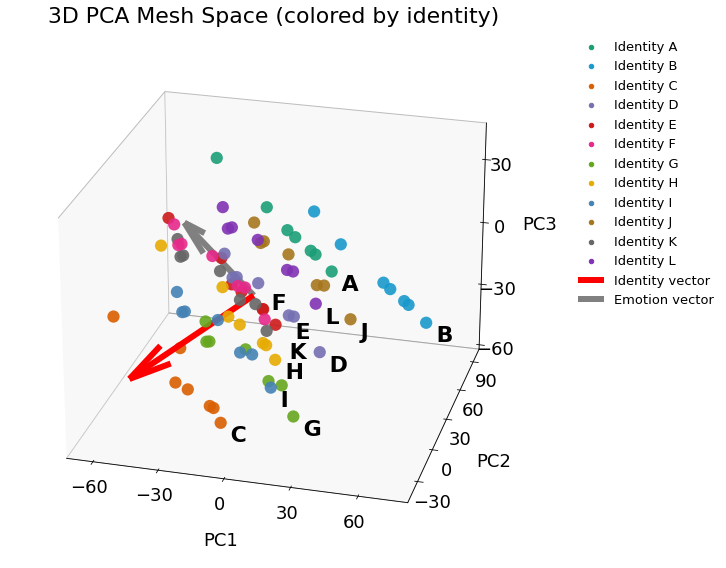

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load .mat file
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# Identity and emotion setup
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
anonymized_identities = [f'Identity {chr(65 + i)}' for i in range(len(original_identities))]
identity_map = dict(zip(original_identities, anonymized_identities))
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# Build data matrix
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels.append(identity)
        counter += 1

# PCA
mean_face = all_faces_data.mean(axis=0)
centered = all_faces_data - mean_face
standardized = centered / np.std(centered, axis=0)
pca = PCA()
pca_coords = pca.fit_transform(standardized)

# Compute identity vector
identity_centroids = np.zeros((num_faces, pca_coords.shape[1]))
for i in range(num_faces):
    indices = np.arange(i * num_emotions, (i + 1) * num_emotions)
    identity_centroids[i, :] = np.mean(pca_coords[indices, :], axis=0)

cov_id = np.cov(identity_centroids.T)
evals_id, evecs_id = np.linalg.eigh(cov_id)
identity_vector = evecs_id[:, np.argmax(evals_id)]
identity_vector /= np.linalg.norm(identity_vector)

# Compute emotion vector
emotion_centroids = np.zeros((num_emotions, pca_coords.shape[1]))
for j in range(num_emotions):
    indices = np.arange(j, num_faces * num_emotions, num_emotions)
    emotion_centroids[j, :] = np.mean(pca_coords[indices, :], axis=0)

cov_em = np.cov(emotion_centroids.T)
evals_em, evecs_em = np.linalg.eigh(cov_em)
emotion_vector = evecs_em[:, np.argmax(evals_em)]
emotion_vector /= np.linalg.norm(emotion_vector)

# View settings
elevations = [25]
azimuths = [-75]

for elev in elevations:
    for azim in azimuths:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Colors
        base_cmap = cm.get_cmap('Dark2', 12)
        identity_colors = [base_cmap(i) for i in range(num_faces)]
        identity_colors[4] = (0.8, 0.1, 0.1, 1.0)     # Dan (red)
        identity_colors[1] = (0.1, 0.6, 0.8, 1.0)     # Neptune (cyan)
        identity_colors[11] = (0.5, 0.2, 0.7, 1.0)    # Tony (purple)
        identity_colors[8] = (0.27, 0.51, 0.71, 1.0)  # Josh (orange)

        scatter_handles = []

        for i, identity in enumerate(original_identities):
            color = identity_colors[i]
            indices = [idx for idx, label in enumerate(labels) if label == identity]
            coords = pca_coords[indices]

            ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2],
                       color=color, s=150, depthshade=False, alpha=0.9,
                       edgecolors='none')

            scatter_handles.append(ax.scatter([], [], [], color=color, label=identity_map[identity]))

            # Pick endpoint for label placement
            pc1, pc2 = coords[:, 0], coords[:, 1]
            score = pc1 - 0.3 * pc2
            best_idx = indices[np.argmax(score)]

            # Custom offset cases
            if i == 5:
                offset = [-1, +3, +3]
            elif i == 4:
                offset = [+5, +3, -7]
            elif i == 10:
                offset = [+6, +3, -13]
            else:
                offset = [+2, -3, -7]

            ax.text(pca_coords[best_idx, 0] + offset[0],
                    pca_coords[best_idx, 1] + offset[1],
                    pca_coords[best_idx, 2] + offset[2],
                    identity_map[identity][8:], fontsize=22, weight='bold')

        # Vector plotting
        identity_vec_3d = identity_vector[:3] / np.linalg.norm(identity_vector[:3])
        emotion_vec_3d = emotion_vector[:3] / np.linalg.norm(emotion_vector[:3])
        origin = np.mean(pca_coords[:, :3], axis=0)
        scale = 65

        ax.quiver(*origin, *(identity_vec_3d * scale), color='red', linewidth=6,
                  arrow_length_ratio=0.3, label='Identity vector')
        ax.quiver(*origin, *(emotion_vec_3d * scale), color='gray', linewidth=6,
                  arrow_length_ratio=0.3, label='Emotion vector')

        # Axes settings
        ax.view_init(elev=elev, azim=azim)
        ax.set_xlabel('PC1', fontsize=18, labelpad=20)
        ax.set_ylabel('PC2', fontsize=18, labelpad=20)
        ax.set_zlabel('PC3', fontsize=18, labelpad=20)
        ax.set_xticks([-60, -30, 0, 30, 60])
        ax.set_yticks([-30, 0, 30, 60, 90])
        ax.set_zlim([-60, 45])
        ax.set_zticks([-60, -30, 0, 30])
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.tick_params(axis='z', which='major', labelsize=18)

        ax.set_title('3D PCA Mesh Space (colored by identity)', fontsize=22)
ax.grid(False)
ax.w_xaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_yaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_zaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_xaxis.pane.set_edgecolor('gray')
ax.w_yaxis.pane.set_edgecolor('gray')
ax.w_zaxis.pane.set_edgecolor('gray')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13, frameon=False)
plt.tight_layout()
plt.savefig("fig7A.pdf", format="pdf", bbox_inches="tight")

plt.show()


/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


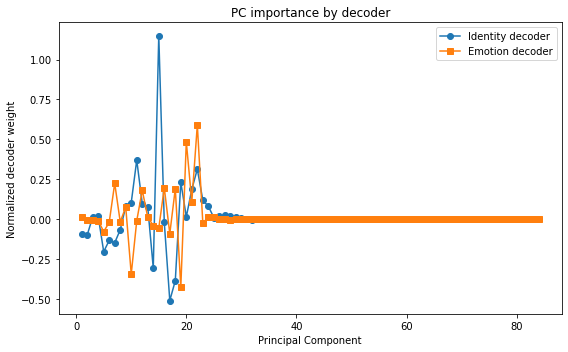

In [3]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# Encode identity and emotion labels
identity_labels = [key.split('_')[0] for key in mat_struct._fieldnames]
emotion_labels = [key.split('_')[1] for key in mat_struct._fieldnames]

identity_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

identity_y = identity_encoder.fit_transform(identity_labels)
emotion_y = emotion_encoder.fit_transform(emotion_labels)

# Number of PCs to use
n_pcs = 84
X = pca_coords[:, :n_pcs]

# Train linear SVMs for identity and emotion
identity_clf = LinearSVC(max_iter=10000)
emotion_clf = LinearSVC(max_iter=10000)

identity_clf.fit(X, identity_y)
emotion_clf.fit(X, emotion_y)

# Extract and normalize weights
identity_weights = identity_clf.coef_
emotion_weights = emotion_clf.coef_

# Compute average absolute weights per PC
# identity_pc_importance = np.mean(np.abs(identity_weights), axis=0)
# emotion_pc_importance = np.mean(np.abs(emotion_weights), axis=0)
identity_pc_importance = np.mean((identity_weights), axis=0)
emotion_pc_importance = np.mean((emotion_weights), axis=0)

# Normalize for plotting
identity_pc_importance /= np.sum(identity_pc_importance)
emotion_pc_importance /= np.sum(emotion_pc_importance)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_pcs+1), identity_pc_importance, label='Identity decoder', marker='o')
plt.plot(range(1, n_pcs+1), emotion_pc_importance, label='Emotion decoder', marker='s')
plt.xlabel('Principal Component')
plt.ylabel('Normalized decoder weight')
plt.title('PC importance by decoder')
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
# Sort PCs by importance (most to least) for each decoder
identity_ranked_pcs = np.argsort(-identity_pc_importance)  # descending
emotion_ranked_pcs = np.argsort(-emotion_pc_importance)

# Top k most important PCs for each
top_k = 10
top_k_identity = identity_ranked_pcs[:top_k]
top_k_emotion = emotion_ranked_pcs[:top_k]

print("Top PCs for identity:", top_k_identity + 1)  # +1 for 1-based indexing
print("Top PCs for emotion:", top_k_emotion + 1)

# Optional: compute overlap
overlap = np.intersect1d(top_k_identity, top_k_emotion)
print(f"Overlap in top-{top_k} PCs: {len(overlap)} shared:", overlap + 1)


Top PCs for identity: [15 11 22 19 21 23 10 12 24  9]
Top PCs for emotion: [22 20  7 16 18 12 21  9  1 13]
Overlap in top-10 PCs: 4 shared: [ 9 12 21 22]


In [5]:
from scipy.stats import spearmanr

# Rank vectors (1 = most important)
identity_ranks = np.argsort(np.argsort(-identity_pc_importance))
emotion_ranks = np.argsort(np.argsort(-emotion_pc_importance))

rho, pval = spearmanr(identity_ranks, emotion_ranks)
print(f"Spearman rank correlation: {rho:.3f}, p = {pval:.3g}")


Spearman rank correlation: 0.090, p = 0.416


In [ ]:
from scipy.stats import pearsonr

# Compute Pearson correlation
n=9
corr, pval = pearsonr(identity_pc_importance[:n], emotion_pc_importance[:n])

print(f"Pearson r = {corr:.3f}, p = {pval:.4f}")


In [ ]:
# Top N PCs contributing to each decoder
top_n = 10
top_identity_pcs = np.argsort(identity_pc_importance)[-top_n:][::-1]
top_emotion_pcs = np.argsort(emotion_pc_importance)[-top_n:][::-1]

print("Top Identity PCs:", top_identity_pcs + 1)
print("Top Emotion PCs:", top_emotion_pcs + 1)

# Intersection
shared = np.intersect1d(top_identity_pcs, top_emotion_pcs)
print("Shared Top PCs:", shared + 1)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between full decoder vectors (mean across classes)
identity_vec = np.mean(identity_weights, axis=0).reshape(1, -1)
emotion_vec = np.mean(emotion_weights, axis=0).reshape(1, -1)

cos_sim = cosine_similarity(identity_vec, emotion_vec)[0, 0]
print(f"Cosine similarity: {cos_sim:.3f}")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Regress identity labels out of X
reg = LinearRegression().fit(identity_weights.T, X.T)
X_resid = X - reg.predict(identity_weights.T).T

# Fit SVM to residualized data
emotion_clf_resid = LinearSVC(max_iter=10000)
score = cross_val_score(emotion_clf_resid, X_resid, emotion_y, cv=5).mean()

print(f"Emotion decoding accuracy after removing identity: {score:.3f}")


In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load .mat file
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# Setup
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
anonymized_identities = [f'Identity {chr(65+i)}' for i in range(len(original_identities))]
identity_map = dict(zip(original_identities, anonymized_identities))
emotions = ['neutral', 'happiness_4', 'sadness_4', 'disgust_4', 'fear_4', 'anger_4', 'surprise_4']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# Data matrix
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels.append(identity)
        counter += 1

# PCA
mean_face = all_faces_data.mean(axis=0)
centered = all_faces_data - mean_face
standardized = centered / np.std(centered, axis=0)
pca = PCA(n_components=3)
pca_coords = pca.fit_transform(standardized)
# print("Explained variance ratio (each PC):", pca.explained_variance_ratio_)
# print("Explained variance (eigenvalues):", pca.explained_variance_)
# Assign emotion labels to each data point (same order as all_faces_data)
emotion_labels = emotions * num_faces  # ['neutral', 'happiness_4', ..., 'surprise_4', ...]
emotion_labels = [e for e in emotion_labels]  # flatten
emotion_to_color = {emotion: cm.get_cmap('tab10')(i) for i, emotion in enumerate(emotions)}


identity_centroids_full = np.zeros((num_faces, pca_coords.shape[1]))
for i in range(num_faces):
    indices = np.arange(i * num_emotions, (i + 1) * num_emotions)
    identity_centroids_full[i, :] = np.mean(pca_coords[indices, :], axis=0)

cov_id_full = np.cov(identity_centroids_full.T)
evals_id_full, evecs_id_full = np.linalg.eigh(cov_id_full)
identity_vector_full = evecs_id_full[:, np.argmax(evals_id_full)]
identity_vector_full /= np.linalg.norm(identity_vector_full)

emotion_centroids_full = np.zeros((num_emotions, pca_coords.shape[1]))
for j in range(num_emotions):
    indices = np.arange(j, num_faces * num_emotions, num_emotions)
    emotion_centroids_full[j, :] = np.mean(pca_coords[indices, :], axis=0)

cov_em_full = np.cov(emotion_centroids_full.T)
evals_em_full, evecs_em_full = np.linalg.eigh(cov_em_full)
emotion_vector_full = evecs_em_full[:, np.argmax(evals_em_full)]
emotion_vector_full /= np.linalg.norm(emotion_vector_full)


# Example: vary elevation from 10 to 30 degrees while keeping azim fixed
# Try a few combinations of elevation and azimuth
# elevations = [10, 15, 20, 25, 30, 35]     # Up-down tilt
# azimuths = [-85, -80, -75, -70]    # Left-right spin
# azimuths = [-35, -30, -25, -10]    # Left-right spin
elevations = [25]     # Up-down tilt
azimuths = [-75]    # Left-right spin
for elev in elevations:
    for azim in azimuths:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        scatter_handles = []  # Reset here to avoid duplicates in legend

        base_cmap = cm.get_cmap('Dark2', 12)
        identity_colors = [base_cmap(i) for i in range(num_faces)]

        identity_colors[4] = (0.8, 0.1, 0.1, 1.0)  # red
        identity_colors[1] = (0.1, 0.6, 0.8, 1.0)  # cyan
        identity_colors[11] = (0.5, 0.2, 0.7, 1.0)  # purple
        identity_colors[8] = (0.27, 0.51, 0.71, 1.0)  # orange

        # Plot each emotion separately
        scatter_handles = []
        for j, emotion in enumerate(emotions):
            color = emotion_to_color[emotion]
            indices = [idx for idx, label in enumerate(emotion_labels) if label == emotion]
            coords = pca_coords[indices]
            ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2],
                       color=color, s=150, depthshade=False, alpha=0.9,
                       edgecolors='none')
            # scatter_handles.append(ax.scatter([], [], [], color=color, label=emotion))

            # Find endpoint for labeling
            pc1 = coords[:, 0]
            pc2 = coords[:, 1]
            score = pc1 
            best_idx = indices[np.argmax(score)]
            
            if j == 3:
                ax.text(pca_coords[best_idx, 0] +4,
                        pca_coords[best_idx, 1] -3  ,
                        pca_coords[best_idx, 2] +11,
                        emotion[:-2],
                        fontsize=15, weight='bold')
            # elif j == 4:
            #     ax.text(pca_coords[best_idx, 0] +7,
            #             pca_coords[best_idx, 1] -3  ,
            #             pca_coords[best_idx, 2] + 6,
            #             emotion[:-2],
            #             fontsize=15, weight='bold')
            # elif j == 5:
            #     ax.text(pca_coords[best_idx, 0] +4,
            #             pca_coords[best_idx, 1] -3  ,
            #             pca_coords[best_idx, 2] + 3,
            #             emotion[:-2],
            #             fontsize=15, weight='bold')
            # elif j == 0:
            #     ax.text(pca_coords[best_idx, 0] +10,
            #             pca_coords[best_idx, 1] -3  ,
            #             pca_coords[best_idx, 2]-2 ,
            #             emotion,
            #             fontsize=15, weight='bold')
            # elif j == 2:
            #     ax.text(pca_coords[best_idx, 0] +5,
            #             pca_coords[best_idx, 1] -3  ,
            #             pca_coords[best_idx, 2] -3,
            #             emotion[:-2],
            #             fontsize=15, weight='bold')
            else :
                ax.text(pca_coords[best_idx, 0] +5,
                        pca_coords[best_idx, 1] -3  ,
                        pca_coords[best_idx, 2] + 7,
                        emotion[:-2],
                        fontsize=15, weight='bold')

        ax.view_init(elev=elev, azim=azim)
                # Project full-dimensional vectors onto 3D PCA space
        identity_vec_3d = identity_vector_full[:3]
        emotion_vec_3d = emotion_vector_full[:3]
        identity_vec_3d /= np.linalg.norm(identity_vec_3d)
        emotion_vec_3d /= np.linalg.norm(emotion_vec_3d)
        # Plot from origin
        origin = np.mean(pca_coords[:, :3], axis=0)
        scale = 65

        ax.quiver(*origin, *(identity_vec_3d * scale), color='gray', linewidth=6,
                arrow_length_ratio=0.3, label='Identity vector')
        ax.quiver(*origin, *(emotion_vec_3d * scale), color='blue', linewidth=6,
                arrow_length_ratio=0.3, label='Emotion vector')

        
        ax.view_init(elev=elev, azim=azim)
        ax.set_xlabel('PC1', fontsize=18, labelpad=20)
        ax.set_ylabel('PC2', fontsize=18, labelpad=20)
        ax.set_zlabel('PC3', fontsize=18, labelpad=20)
        ax.set_xticks([-60, -30, 0, 30, 60])
        ax.set_yticks([-30, 0, 30, 60, 90])
        ax.set_zlim([-60, 45])
        ax.set_zticks([-60, -30, 0, 30])
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.tick_params(axis='z', which='major', labelsize=18)
        ax.set_title(f'3D PCA Mesh Space (colored by emotion)', fontsize=22)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13, frameon=False)
ax.grid(False)
ax.w_xaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_yaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_zaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_xaxis.pane.set_edgecolor('gray')
ax.w_yaxis.pane.set_edgecolor('gray')
ax.w_zaxis.pane.set_edgecolor('gray')
plt.tight_layout()
plt.savefig("fig7B.pdf", format="pdf", bbox_inches="tight")

plt.show()
        

/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [ ]:
# Ground truth 84x84 mesh distance matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the distance matrix
mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full_updated.mat')
pca_dist = mat['pca_distance_matrix_full']  # Shape (84, 84)

# Emotion and identity info
identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
              'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
identities = ['A', 'B', 'C', 'D', 'E', 'F',
              'G', 'H', 'I', 'J', 'K', 'L']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
# emotions = ['neutral', 'happiness_4', 'sadness_4', 'disgust_4',
#             'fear_4', 'anger_4', 'surprise_4']

# Compute ticks
tick_positions = np.arange(3.5, 84, 7)  # center of each identity block
section_bounds = np.arange(0, 85, 7)    # boundaries for emotion groups

# Plot
plt.figure(figsize=(12, 10))
im = plt.imshow(pca_dist, cmap='viridis', vmin=0, vmax=140.47162419308918)
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance', fontsize=22)
cbar.ax.tick_params(labelsize=16)
plt.title('Ground-Truth PCA Distance Matrix\nGrouped by Identity', fontsize=30)
plt.xlabel('Identity', fontsize=22)
plt.ylabel('Identity', fontsize=22)

# Set identity ticks
plt.xticks(tick_positions, identities, fontsize=22)
plt.yticks(tick_positions, identities, fontsize=22)

# Add boundary lines to separate emotion groups
for b in section_bounds:
    plt.axhline(b - 0.5, color='k', linewidth=1.)
    plt.axvline(b - 0.5, color='k', linewidth=1.)

# plt.axis('square')
plt.tight_layout()
plt.savefig("fig7C_updated.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
# Ground truth 84x84 mesh distance matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the distance matrix
mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full_emotion_updated.mat')
pca_dist_emotion = mat['pca_distance_matrix_full_reordered']  # Shape (84, 84)

# Emotion and identity info
identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
              'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
identities = ['A', 'B', 'C', 'D', 'E', 'F',
              'G', 'H', 'I', 'J', 'K', 'L']
emotions = ['neutral', 'happiness', 'surprise', 'sadness',
            'disgust', 'anger', 'fear']
# emotions = ['neutral', 'happiness_4', 'sadness_4', 'disgust_4',
#             'fear_4', 'anger_4', 'surprise_4']
# Compute ticks
tick_positions = np.arange(5.5, 84, 12)  # center of each emotion block
section_bounds = np.arange(0, 85, 12)

# Plot
plt.figure(figsize=(12, 10))
im = plt.imshow(pca_dist_emotion, cmap='viridis', vmin=0, vmax=140.47162419308918)
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance', fontsize=22)
cbar.ax.tick_params(labelsize=16)
plt.title('Ground-Truth PCA Distance Matrix\nGrouped by Emotion', fontsize=28)
plt.xlabel('Emotion', fontsize=22)
plt.ylabel('Emotion', fontsize=22)

# Set emotion ticks
plt.xticks(tick_positions, emotions, fontsize=18, rotation=90)
plt.yticks(tick_positions, emotions, fontsize=18)

# Add boundary lines
for b in section_bounds:
    plt.axhline(b - 0.5, color='k', linewidth=1.)
    plt.axvline(b - 0.5, color='k', linewidth=1.)

plt.tight_layout()
plt.savefig("fig7D_updated.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
# Zoomed identity block
identity_index = 0  # A = 0th identity → rows 0 to 6
start = identity_index * 7
end = start + 7

submatrix_B = pca_dist[start:end, start:end]
print_labels = [
'neutral', 'happiness', 'surprise', 'sadness', 'disgust', 'anger', 'fear'
]
# Plot
plt.figure(figsize=(6, 5))
im = plt.imshow(submatrix_B, cmap='viridis', vmin=0, vmax=140.47162419308918)
# im = plt.imshow(submatrix_B, cmap='viridis')
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance',  fontsize=12)
cbar.ax.tick_params(labelsize=12)
plt.title('Zoomed Emotion Block: Identity A', fontsize=16)
plt.xticks(np.arange(7), print_labels, rotation=90, fontsize=12)
plt.yticks(np.arange(7), print_labels, fontsize=12)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("fig7C_zoomed_identity_updated.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
# Zoomed emotion block
emotion_index = 0  # 'neutral'
indices = [i * 7 + emotion_index for i in range(12)]  # 12 identities

# Extract submatrix
submatrix_B_prime = pca_dist[np.ix_(indices, indices)]

# Plot
plt.figure(figsize=(6, 5))
im = plt.imshow(submatrix_B_prime, cmap='viridis', vmin=0, vmax=140.47162419308918)
# im = plt.imshow(submatrix_B, cmap='viridis')
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance',  fontsize=12)
cbar.ax.tick_params(labelsize=12)
plt.title('Zoomed Identity Block: Emotion Neutral', fontsize=16)
plt.xticks(np.arange(12), identities, fontsize=13)
plt.yticks(np.arange(12), identities, fontsize=13)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("fig7D_zoomed_emotion_updated.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
# Block-averaged Identity mesh distance
identity_dist_avg_BLOCKAVG = np.zeros((12, 12))

# For each emotion index (7 total)
for j in range(7):
    indices = [i * 7 + j for i in range(12)]  # All 12 identities with emotion j
    submatrix = pca_dist[np.ix_(indices, indices)]
    identity_dist_avg_BLOCKAVG += submatrix

# Average across 7 emotions
identity_dist_avg_BLOCKAVG /= 7
plt.figure(figsize=(8, 7))
im = plt.imshow(identity_dist_avg_BLOCKAVG, cmap='viridis', vmin=0, vmax=140.47162419308918)
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance',  fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title('Identity Mesh Space Distance \nAveraged Across 7 Emotions', fontsize=20)
plt.xticks(np.arange(12), identities, rotation=0, fontsize=15)
plt.yticks(np.arange(12), identities, fontsize=15)
plt.xlabel('Identity', fontsize=15)
plt.ylabel('Identity', fontsize=15)
# Overlay values
# for i in range(12):
#     for j in range(12):
#         plt.text(j, i, f'{identity_dist_avg_BLOCKAVG[i, j]:.0f}', ha='center', va='center', color='black', fontsize=12)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()
# plt.savefig("fig7D_side.pdf", format="pdf", bbox_inches="tight")

# np.save('identity_dist_avg.npy', identity_dist_avg_BLOCKAVG)



In [ ]:
# Block-averaged Emotion mesh distance
emotion_dist_avg_BLOCKAVG = np.zeros((7, 7))

# For each identity index (12 total)
for i in range(12):
    indices = [i * 7 + j for j in range(7)]  # All 7 emotions for identity i
    submatrix = pca_dist[np.ix_(indices, indices)]
    emotion_dist_avg_BLOCKAVG += submatrix

# Average across 12 identities
emotion_dist_avg_BLOCKAVG /= 12

# Plot
plt.figure(figsize=(8, 7))
im = plt.imshow(emotion_dist_avg_BLOCKAVG, cmap='viridis', vmin=0, vmax=140.47162419308918)
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance', fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.title('Emotion Mesh Space Distance \nAveraged Across 12 Identities', fontsize=20)
plt.xticks(np.arange(7), emotions, rotation=45, fontsize=15)
plt.yticks(np.arange(7), emotions, fontsize=15)
plt.xlabel('Emotion', fontsize=15)
plt.ylabel('Emotion', fontsize=15)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
# plt.savefig("fig7D_emotion_BLOCKAVG.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Save if needed
# np.save('emotion_dist_avg_updated_ver2.npy', emotion_dist_avg_BLOCKAVG)


In [ ]:
# Block-averaged Emotion mesh distance comeback
mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full.mat')
pca_dist = mat['pca_distance_matrix_full']  # Shape (84, 84)
model_name = 'off_the_shelf_barlowtwins_IDEM_28way_colorbg_epochs50'
print_name = 'BT CTFER (4ID x 7EM)'
rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_blockavg.npy"
rdm = np.load(rdm_path)
pca_dist = rdm
# Initialize accumulator
emotion_identity_matrices = []

for j in range(7):
    indices = [i * 7 + j for i in range(12)]
    identity_matrix = pca_dist[np.ix_(indices, indices)]
    emotion_identity_matrices.append(identity_matrix)
identity_dist_avg_BLOCKAVG = np.mean(emotion_identity_matrices, axis=0)

plt.figure(figsize=(8, 7))
im = plt.imshow(identity_dist_avg_BLOCKAVG, cmap='viridis')
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title(f'Identity Mesh Space Distance\nAveraged Across 7 Emotions\n{print_name}', fontsize=20)
plt.xticks(np.arange(12), identities, rotation=0, fontsize=15)
plt.yticks(np.arange(12), identities, fontsize=15)
plt.xlabel('Identity', fontsize=15)
plt.ylabel('Identity', fontsize=15)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


identity_emotion_matrices = []

for i in range(12):
    start = i * 7
    end = start + 7
    emotion_matrix = pca_dist[start:end, start:end]
    identity_emotion_matrices.append(emotion_matrix)

emotion_dist_avg_BLOCKAVG = np.mean(identity_emotion_matrices, axis=0)
plt.figure(figsize=(8, 7))
im = plt.imshow(emotion_dist_avg_BLOCKAVG, cmap='viridis')
cbar = plt.colorbar(im)
cbar.set_label('RDM Distance', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title(f'Emotion Mesh Space Distance\nAveraged Across 12 Identities\n{print_name}', fontsize=20)
plt.xticks(np.arange(7), emotions, rotation=45, ha='center', fontsize=15)
plt.yticks(np.arange(7), emotions, fontsize=15)
plt.xlabel('Emotion', fontsize=15)
plt.ylabel('Emotion', fontsize=15)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Centroid Identity distance matrix
# Load data
mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/pca_distance_matrix_centroids.mat')
identity_dist = mat['identity_distance_matrix']  # (12, 12)
identities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# Plot matrix with text overlay
plt.figure(figsize=(8, 7))
im = plt.imshow(identity_dist, cmap='viridis', vmin=0, vmax=140.47162419308918)
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance',  fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.title('PCA Centroid Identity Distance Matrix (PCA)', fontsize=20)
plt.xticks(np.arange(12), identities, fontsize=15)
plt.yticks(np.arange(12), identities, fontsize=15)

# Overlay values
for i in range(12):
    for j in range(12):
        value = identity_dist[i, j]
        plt.text(j, i, f'{value:.0f}', ha='center', va='center', color='black', fontsize=13)

plt.tight_layout()
plt.show()


In [ ]:
# Centroid Emotion distance matrix

emotions = ['neutral', 'happiness', 'surprise', 'sadness', 'disgust', 'anger', 'fear']
mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/pca_distance_matrix_centroids.mat')
emotion_dist = mat['emotion_distance_matrix']  # (7, 7)

plt.figure(figsize=(8, 7))
im = plt.imshow(emotion_dist, cmap='viridis', vmin=0, vmax=140.47162419308918)
cbar = plt.colorbar(im)
cbar.set_label('PCA Mesh Distance',  fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title('PCA Centroid Emotion Distance Matrix (PCA)', fontsize=20)
plt.xticks(np.arange(7), emotions, rotation=90, ha='right', fontsize=15)
plt.yticks(np.arange(7), emotions, fontsize=15)

# Overlay values
for i in range(7):
    for j in range(7):
        value = emotion_dist[i, j]
        plt.text(j, i, f'{value:.0f}', ha='center', va='center', color='black', fontsize=13)


plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import spearmanr
import numpy as np

# Store each of the 7 matrices (identity distance across each emotion)
identity_matrices = []

for j in range(7):
    indices = [i * 7 + j for i in range(12)]
    submatrix = pca_dist[np.ix_(indices, indices)]
    identity_matrices.append(submatrix)

# Convert matrices to flattened upper triangles (excluding diagonals)
flat_matrices = []
for mat in identity_matrices:
    upper = mat[np.triu_indices(12, k=1)]
    flat_matrices.append(upper)

# Compute all pairwise Spearman correlations
n = len(flat_matrices)
corrs = []
for i in range(n):
    for j in range(i+1, n):
        rho, _ = spearmanr(flat_matrices[i], flat_matrices[j])
        corrs.append(rho)

# Average consistency
mean_corr = np.mean(corrs)
std_corr = np.std(corrs)

print(f"Average pairwise Spearman correlation: {mean_corr:.3f}")
print(f"Standard deviation of correlations: {std_corr:.3f}")
print(f'Average pairwise Spearman correlation (across 7 emotion-specific identity matrices): {average_consistency:.3f}')



### Analyze identity / emotion correlation

In [ ]:
model_names_list = ['resnet50']

In [ ]:
category_order = []
for identity in identities:
    for emotion in emotions:
        category_order.append(f"{identity}_{emotion}")

In [ ]:
import os # START HERE
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from load_model import load_model
# 4200 images, category order

combined_folder = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_texture/combined_vbsl50_texture_registered' # contains 4200 images
combined_folder = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/combined_vbsl50_registered' # contains 4200 images

save_rdm_path = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/correlation_analysis_updated/'

os.makedirs(save_rdm_path, exist_ok=True)

# Strict category order (identity_emotion)
# category_order = [
#     "Elias_neutral", "Elias_happiness_4", "Elias_sadness_4", "Elias_surprise_4", "Elias_fear_4", "Elias_disgust_4", "Elias_anger_4",
#     "Neptune_neutral", "Neptune_happiness_4", "Neptune_sadness_4", "Neptune_surprise_4", "Neptune_fear_4", "Neptune_disgust_4", "Neptune_anger_4",
#     "Seojin_neutral", "Seojin_happiness_4", "Seojin_sadness_4", "Seojin_surprise_4", "Seojin_fear_4", "Seojin_disgust_4", "Seojin_anger_4",
#     "Sophie_neutral", "Sophie_happiness_4", "Sophie_sadness_4", "Sophie_surprise_4", "Sophie_fear_4", "Sophie_disgust_4", "Sophie_anger_4",
#     "Dan_neutral", "Dan_happiness_4", "Dan_sadness_4", "Dan_surprise_4", "Dan_fear_4", "Dan_disgust_4", "Dan_anger_4",
#     "Sreyas_neutral", "Sreyas_happiness_4", "Sreyas_sadness_4", "Sreyas_surprise_4", "Sreyas_fear_4", "Sreyas_disgust_4", "Sreyas_anger_4",
#     "Younah_neutral", "Younah_happiness_4", "Younah_sadness_4", "Younah_surprise_4", "Younah_fear_4", "Younah_disgust_4", "Younah_anger_4",
#     "Ashley_neutral", "Ashley_happiness_4", "Ashley_sadness_4", "Ashley_surprise_4", "Ashley_fear_4", "Ashley_disgust_4", "Ashley_anger_4",
#     "Josh_neutral", "Josh_happiness_4", "Josh_sadness_4", "Josh_surprise_4", "Josh_fear_4", "Josh_disgust_4", "Josh_anger_4",
#     "Kedar_neutral", "Kedar_happiness_4", "Kedar_sadness_4", "Kedar_surprise_4", "Kedar_fear_4", "Kedar_disgust_4", "Kedar_anger_4",
#     "Ani_neutral", "Ani_happiness_4", "Ani_sadness_4", "Ani_surprise_4", "Ani_fear_4", "Ani_disgust_4", "Ani_anger_4",
#     "Tony_neutral", "Tony_happiness_4", "Tony_sadness_4", "Tony_surprise_4", "Tony_fear_4", "Tony_disgust_4", "Tony_anger_4"
# ]
identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
              'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4', 'disgust_4', 'anger_4', 'fear_4']

category_order = []
for identity in identities:
    for emotion in emotions:
        category_order.append(f"{identity}_{emotion}")

# model_names_list = ['resnet50']
# category_order = [
#     "Elias_neutral_textured", "Elias_happiness_4_textured", "Elias_sadness_4_textured", "Elias_surprise_4_textured", "Elias_fear_4_textured", "Elias_disgust_4_textured", "Elias_anger_4_textured",
#     "Neptune_neutral_textured", "Neptune_happiness_4_textured", "Neptune_sadness_4_textured", "Neptune_surprise_4_textured", "Neptune_fear_4_textured", "Neptune_disgust_4_textured", "Neptune_anger_4_textured",
#     "Seojin_neutral_textured", "Seojin_happiness_4_textured", "Seojin_sadness_4_textured", "Seojin_surprise_4_textured", "Seojin_fear_4_textured", "Seojin_disgust_4_textured", "Seojin_anger_4_textured",
#     "Sophie_neutral_textured", "Sophie_happiness_4_textured", "Sophie_sadness_4_textured", "Sophie_surprise_4_textured", "Sophie_fear_4_textured", "Sophie_disgust_4_textured", "Sophie_anger_4_textured",
#     "Dan_neutral_textured", "Dan_happiness_4_textured", "Dan_sadness_4_textured", "Dan_surprise_4_textured", "Dan_fear_4_textured", "Dan_disgust_4_textured", "Dan_anger_4_textured",
#     "Sreyas_neutral_textured", "Sreyas_happiness_4_textured", "Sreyas_sadness_4_textured", "Sreyas_surprise_4_textured", "Sreyas_fear_4_textured", "Sreyas_disgust_4_textured", "Sreyas_anger_4_textured",
#     "Younah_neutral_textured", "Younah_happiness_4_textured", "Younah_sadness_4_textured", "Younah_surprise_4_textured", "Younah_fear_4_textured", "Younah_disgust_4_textured", "Younah_anger_4_textured",
#     "Ashley_neutral_textured", "Ashley_happiness_4_textured", "Ashley_sadness_4_textured", "Ashley_surprise_4_textured", "Ashley_fear_4_textured", "Ashley_disgust_4_textured", "Ashley_anger_4_textured",
#     "Josh_neutral_textured", "Josh_happiness_4_textured", "Josh_sadness_4_textured", "Josh_surprise_4_textured", "Josh_fear_4_textured", "Josh_disgust_4_textured", "Josh_anger_4_textured",
#     "Kedar_neutral_textured", "Kedar_happiness_4_textured", "Kedar_sadness_4_textured", "Kedar_surprise_4_textured", "Kedar_fear_4_textured", "Kedar_disgust_4_textured", "Kedar_anger_4_textured",
#     "Ani_neutral_textured", "Ani_happiness_4_textured", "Ani_sadness_4_textured", "Ani_surprise_4_textured", "Ani_fear_4_textured", "Ani_disgust_4_textured", "Ani_anger_4_textured",
#     "Tony_neutral_textured", "Tony_happiness_4_textured", "Tony_sadness_4_textured", "Tony_surprise_4_textured", "Tony_fear_4_textured", "Tony_disgust_4_textured", "Tony_anger_4_textured"
# ]


# Image preprocessing
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])
# ==== Main Loop ====
for j, model_name in enumerate(model_names_list):
    print(f"Processing model: {model_name}")
    
    model = load_model(model_name)
    model.eval()

    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    if 'simplecnn' in model_name:
        model.fc2.register_forward_hook(get_activation('feats'))
    elif 'alexnet' in model_name:
        if 'layer4' in model_name:
            print("add hook in layer4")
            model.features[4].register_forward_hook(get_activation('feats'))
        elif 'layer8' in model_name:
            print("add hook in layer8")
            model.features[8].register_forward_hook(get_activation('feats'))
        elif 'layer12' in model_name:
            print("add hook in layer12")
            model.features[12].register_forward_hook(get_activation('feats'))
        elif 'layerC2' in model_name:
            model.classifier[2].register_forward_hook(get_activation('feats'))
        else: # final layer
            model.classifier[5].register_forward_hook(get_activation('feats'))
    elif model_name == 'vgg16':
        model.classifier[4].register_forward_hook(get_activation('feats'))
    elif model_name == 'vggface':
        model.fc7.register_forward_hook(get_activation('feats'))
    elif 'onlyDM' in model_name:
        model.depth_predictor.encoder[4].register_forward_hook(get_activation('feats'))
        # model.depth_predictor.decoder[30].register_forward_hook(get_activation('feats'))
        # model.depth_predictor.encoder[6].register_forward_hook(get_activation('feats'))
    else: # resnet50
        if 'layer1' in model_name:
            print("add hook in layer1")
            model.layer1.register_forward_hook(get_activation('feats'))
        elif 'layer2' in model_name:
            print("add hook in layer2")
            model.layer2.register_forward_hook(get_activation('feats'))
        elif 'layer3' in model_name:
            print("add hook in layer3")
            model.layer3.register_forward_hook(get_activation('feats'))
        elif 'layer4_no_pooling' in model_name:
            print("add hook in layer4_no_pooling")
            model.layer4.register_forward_hook(get_activation('feats'))
        else:
            model.avgpool.register_forward_hook(get_activation('feats'))
        

    # Step 1: Extract all 4200 features in strict order
    all_feats = []

    for category in category_order:
        for i in range(50):
            fname = f"{category}_trialnum{i}.png"
            fpath = os.path.join(combined_folder, fname)
            if not os.path.exists(fpath):
                print(f"Missing: {fpath}")
                continue
            img = Image.open(fpath).convert("RGB")
            img_tensor = transform(img).unsqueeze(0).cuda()
            with torch.no_grad():
                _ = model(img_tensor)
            feat = activation['feats'].cpu().squeeze().numpy().flatten()
            all_feats.append(feat)

    all_feats = np.stack(all_feats).astype(np.float32)  # shape: (4200, D)

    # Step 2: Compute full 4200x4200 correlation RDM
    full_rdm = 1 - np.corrcoef(all_feats)  # shape: (4200, 4200)

    # Step 3: Block-average into 84x84
    block_size = 50
    num_categories = len(category_order)
    avg_rdm = np.zeros((num_categories, num_categories))

    for i in range(num_categories):
        for j in range(num_categories):
            block = full_rdm[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            avg_rdm[i, j] = block.mean()

    # Step 4: Save
    rdm_path = os.path.join(save_rdm_path, f"combined_vbsl50_{model_name}_rdm_blockavg.npy")
    np.save(rdm_path, avg_rdm)
    print(f"Saved block-averaged RDM to: {rdm_path}")

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from load_model import load_model

# Folder and save paths 
combined_folder = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/combined_vbsl50_registered' # contains 4200 images
save_rdm_path = '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/correlation_analysis/vbsl50_registered_avgpool/' # file path to save your RDM

os.makedirs(save_rdm_path, exist_ok=True)

# Category list (7) 
category_order = [
    "neutral", "happiness_4", "sadness_4", "surprise_4",
    "fear_4", "disgust_4", "anger_4"
]

# Image preprocessing 
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

# Model setup 
# model_names_list = ['resnet50']  # You can adjust this

for model_name in model_names_list:
    print(f"Processing model: {model_name}")

    model = load_model(model_name)
    model.eval()

    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    if 'simplecnn' in model_name:
        model.fc2.register_forward_hook(get_activation('feats'))
    elif 'alexnet' in model_name:
        if 'layer4' in model_name:
            print("add hook in layer4")
            model.features[4].register_forward_hook(get_activation('feats'))
        elif 'layer8' in model_name:
            print("add hook in layer8")
            model.features[8].register_forward_hook(get_activation('feats'))
        elif 'layer12' in model_name:
            print("add hook in layer12")
            model.features[12].register_forward_hook(get_activation('feats'))
        elif 'layerC2' in model_name:
            model.classifier[2].register_forward_hook(get_activation('feats'))
        else: # final layer
            model.classifier[5].register_forward_hook(get_activation('feats'))
    elif model_name == 'vgg16':
        model.classifier[4].register_forward_hook(get_activation('feats'))
    elif model_name == 'vggface':
        model.fc7.register_forward_hook(get_activation('feats'))
    elif 'onlyDM' in model_name:
        model.depth_predictor.encoder[4].register_forward_hook(get_activation('feats'))
        # model.depth_predictor.decoder[30].register_forward_hook(get_activation('feats'))
        # model.depth_predictor.encoder[6].register_forward_hook(get_activation('feats'))
    else: # resnet50
        if 'layer1' in model_name:
            print("add hook in layer1")
            model.layer1.register_forward_hook(get_activation('feats'))
        elif 'layer2' in model_name:
            print("add hook in layer2")
            model.layer2.register_forward_hook(get_activation('feats'))
        elif 'layer3' in model_name:
            print("add hook in layer3")
            model.layer3.register_forward_hook(get_activation('feats'))
        elif 'layer4_no_pooling' in model_name:
            print("add hook in layer4_no_pooling")
            model.layer4.register_forward_hook(get_activation('feats'))
        else:
            model.avgpool.register_forward_hook(get_activation('feats'))
    
    # (1) Extract features 
    
    all_feats = []

    for category in category_order:
        for i in range(20):  # 20 images per category
            fname = f"{category}_trialnum{i}.png"
            fpath = os.path.join(combined_folder, fname)
            if not os.path.exists(fpath):
                print(f"Missing: {fpath}")
                continue

            img = Image.open(fpath).convert("RGB")
            img_tensor = transform(img).unsqueeze(0).cuda()

            with torch.no_grad():
                _ = model(img_tensor)

            # Flatten to 1D feature vector
            feat = activation['feats'].cpu().squeeze().numpy().flatten()
            all_feats.append(feat)

    all_feats = np.stack(all_feats).astype(np.float32)  # Shape: [140, 2048]

    # (2) Compute raw RDM 
    full_rdm = 1 - np.corrcoef(all_feats)  # Shape: [140, 140]

    # (3) Block-average RDM 
    block_size = 20
    num_categories = len(category_order)
    avg_rdm = np.zeros((num_categories, num_categories))

    for i in range(num_categories):
        for j in range(num_categories):
            block = full_rdm[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            avg_rdm[i, j] = block.mean()

    # (4) Save block-avg RDM 
    rdm_path = os.path.join(save_rdm_path, f"{model_name}_rdm_blockavg.npy")
    np.save(rdm_path, avg_rdm)
    print(f"Saved block-averaged RDM to: {rdm_path}")

print("Done!")


In [ ]:
avg_rdm

In [ ]:
# For full frontal face images 

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from scipy.stats import spearmanr, pearsonr, kendalltau
from scipy.spatial.distance import cosine, euclidean
from scipy.spatial import procrustes
import numpy as np

mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full_updated.mat')
pca_dist = mat['pca_distance_matrix_full']  # This will be a NumPy array
triu_idx = np.triu_indices(pca_dist.shape[0], k=1)
pca_flat = pca_dist[triu_idx]
for model_name in model_names_list :
    # rdm_dist = np.load(f'/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered/trialnum2_{model_name}_rdm.npy')
    rdm_dist = np.load(f'/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/correlation_analysis_updated/combined_vbsl50_{model_name}_rdm_blockavg.npy')

    rdm_flat = rdm_dist[triu_idx]
    spearman_rho, _ = spearmanr(rdm_flat, pca_flat)
    print(model_name)
    print(spearman_rho)
    # print(np.isnan(pca_flat).any(), np.isinf(pca_flat).any())\
    
    # print(np.isnan(rdm_flat).any(), np.isinf(rdm_flat).any()

In [ ]:

model_names_list = [
# 'resnet50', 
# 'barlowtwins',  
'alexnet', 'vgg16', 'vggface',

'SL_resnet50_finetune_vbsl_50k_obj_seed777_model_best',

# # sup ID 
'SL_resnet50_finetune_vbsle_50k_elias_neptune_seed777_model_best',
'SL_resnet50_finetune_vbsle_50k_seojin_dan_seed777_model_best_SL',
   'SL_resnet50_finetune_vbsle_50k_sophie_seojin_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_sophie_kedar_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_4way_KDAS_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_4way_SSKD_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_6way_far_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_6way_final_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_8way_far_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_10way_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_12way_seed77_model_best_12way',

# # sup ID color texture
    'SL_resnet50_finetune_texture_colorbg_2way_elias_neptune_seed777_model_best',
    'SL_resnet50_finetune_texture_colorbg_2way_seojin_dan_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_sophie_seojin_colorbg_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_sophie_kedar_colorbg_seed777_model_best',
    'SL_resnet50_finetune_texture_colorbg_4way_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_4way_SSKD_colorbg_seed77_model_best',
    'SL_resnet50_finetune_texture_colorbg_6way_seed77_model_best',
    'SL_resnet50_finetune_vbsle_50k_6way_final_colorbg_seed77_model_best',
    'SL_resnet50_finetune_texture_colorbg_8way_seed77_model_best',
    'SL_resnet50_finetune_texture_colorbg_10way_seed77_model_best',
'SL_resnet50_finetune_texture_colorbg_12way_seed77_model_best',

# # sup ID gray texture
    'SL_resnet50_finetune_texture_colorbg_2way_elias_neptune_seed777_model_best_grayscaled',
    'SL_resnet50_finetune_texture_colorbg_2way_seojin_dan_seed777_model_best_grayscaled',
    
    'SL_resnet50_finetune_texture_colorbg_4way_seed77_model_best_grayscaled',
    
    'SL_resnet50_finetune_texture_colorbg_6way_seed77_model_best_grayscaled',
    'SL_resnet50_finetune_texture_colorbg_8way_seed77_model_best_grayscaled',
    'SL_resnet50_finetune_texture_colorbg_10way_seed77_model_best_grayscaled',
'SL_resnet50_finetune_texture_colorbg_12way_seed77_model_best_grayscaled',


# sup EM 
"SL_resnet50_finetune_vbsle_50k_seojin_neutral_anger_seed777_model_best_SL",
"SL_resnet50_finetune_vbsle_50k_em_4way_NHSF_seed77_model_best",
"SL_resnet50_finetune_vbsle_50k_em_6way_excl_fear_seed77_model_best",
"SL_resnet50_finetune_7way_EM_seojin_seed77_model_best",


# # sup EM color texture
'SL_resnet50_finetune_texture_colorbg_em_neutral_anger_seed777_model_best',
'SL_resnet50_finetune_texture_colorbg_em_4way_NHAS_seed77_model_best',
'SL_resnet50_finetune_texture_colorbg_em_6way_excl_fear_seed77_model_best',
'SL_colorbg_resnet50_finetune_7way_EM_seojin_seed77_model_best',

# # sup EM gray texture
'SL_resnet50_finetune_texture_colorbg_em_neutral_anger_seed777_model_best_grayscaled',
'SL_resnet50_finetune_texture_colorbg_em_4way_NHAS_seed77_model_best_grayscaled',
'SL_resnet50_finetune_texture_colorbg_em_6way_excl_fear_seed77_model_best_grayscaled',

# sup IDEM 
"SL_resnet50_finetune_4way_IDEM_seojin_sophie_NA_seed77_model_best",
"SL_resnet50_finetune_6way_IDEM_seojin_sophie_HAS_seed77_model_best",
"SL_resnet50_finetune_8way_IDEM_seojin_sophie_seed77_model_best",
"SL_resnet50_finetune_10way_IDEM_seojin_sophie_seed77_model_best",
"SL_resnet50_finetune_12way_IDEM_seojin_sophie_seed77_model_best",
'SL_resnet50_finetune_14way_EM_seojin_sophie_seed77_model_best',
'SL_resnet50_finetune_28way_IDEM_seed777_model_best',

# sup IDEM color texture
"SL_resnet50_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"SL_resnet50_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"SL_resnet50_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"SL_resnet50_finetune_14way_IDEM_seojin_sophie_colorbg_seed77_model_best",
'SL_resnet50_finetune_28way_IDEM_colorbg_seed777_model_best',

# sup IDEM gray texture
"SL_resnet50_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best_grayscaled",
"SL_resnet50_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best_grayscaled",
"SL_resnet50_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best_grayscaled",
"SL_resnet50_finetune_14way_IDEM_seojin_sophie_colorbg_seed77_model_best_grayscaled",
'SL_resnet50_finetune_28way_IDEM_colorbg_seed777_model_best_grayscaled',

# bt ID
'off_the_shelf_barlowtwins_seojin_dan_epochs50',
'off_the_shelf_barlowtwins_ID_8way_epochs50',
'off_the_shelf_barlowtwins_ID_8way_colorbg_epochs50',

# bt EM


# bt IDEM
'off_the_shelf_barlowtwins_IDEM_14way_epochs50',
'off_the_shelf_barlowtwins_IDEM_14way_colorbg_epochs50',
'off_the_shelf_barlowtwins_IDEM_14way_graybg_epochs50',
'off_the_shelf_barlowtwins_IDEM_28way_epochs50',
'off_the_shelf_barlowtwins_IDEM_28way_colorbg_epochs50',
'off_the_shelf_barlowtwins_IDEM_28way_graybg_epochs50',
]

In [48]:
mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full.mat')
pca_dist = mat['pca_distance_matrix_full']  # This will be a NumPy array
triu_idx = np.triu_indices(pca_dist.shape[0], k=1)
pca_flat = pca_dist[triu_idx]


for model_name in model_names_list :
    # model_rdm = np.load(f'/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_avgpool/combined_vbsl50_{model_name}_rdm_blockavg.npy')
    model_rdm = np.load(f'/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/correlation_analysis/vbsl50_registered_avgpool/combined_vbsl50_{model_name}_rdm_blockavg.npy')
    rdm_flat = model_rdm[triu_idx]
    spearman_rho, _ = spearmanr(rdm_flat, pca_flat)
    print(model_name)
    print(spearman_rho)
    # ---------- 1. Identity-specific emotion matrices (12 × 7×7 blocks) ----------
    emotion_matrices = []

    for i in range(12):  # 12 identities
        start = i * 7
        end = start + 7
        emotion_block = model_rdm[start:end, start:end]  # 7×7 block for this identity
        emotion_matrices.append(emotion_block)

    # Average 7×7 emotion matrices across 12 identities
    avg_emotion_rdm = np.mean(emotion_matrices, axis=0)

    # ---------- 2. Emotion-specific identity matrices (7 × 12×12 blocks) ----------
    identity_matrices = []

    for e in range(7):  # 7 emotions
        rows = list(range(e, 84, 7))  # every 7th starting at e
        identity_block = model_rdm[np.ix_(rows, rows)]  # 12×12 identity RDM for emotion e
        identity_matrices.append(identity_block)

    # Average 12×12 identity matrices across 7 emotions
    avg_identity_rdm = np.mean(identity_matrices, axis=0)

    # ---------- 3. Load ground truth ----------
    # These should already be loaded or precomputed
    # emotion_dist_avg_BLOCKAVG: 7x7
    # identity_dist_avg_BLOCKAVG: 12x12

    # ---------- 4. Spearman correlation ----------
    def vec_upper(m):
        return m[np.triu_indices_from(m, k=1)]

    rho_em, _ = spearmanr(vec_upper(avg_emotion_rdm), vec_upper(emotion_dist_avg_BLOCKAVG))
    rho_id, _ = spearmanr(vec_upper(avg_identity_rdm), vec_upper(identity_dist_avg_BLOCKAVG))

    print(f"Spearman correlation with ground-truth identity mesh RDM: {rho_id:.3f}")
    print(f"Spearman correlation with ground-truth emotion mesh RDM: {rho_em:.3f}")


NameError: name 'loadmat' is not defined

In [ ]:
model_names_list = [
 "SL_resnet50_finetune_vbsle_50k_4way_SSKD_seed77_model_best",
"SL_resnet50_finetune_vbsle_50k_6way_final_seed77_model_best",
"SL_resnet50_finetune_vbsle_50k_8way_far_seed77_model_best",
"SL_resnet50_finetune_7way_EM_seojin_seed77_model_best",
"SL_resnet50_finetune_vbsle_50k_sophie_seojin_colorbg_seed777_model_best",
"SL_resnet50_finetune_texture_colorbg_2way_seojin_dan_seed777_model_best",
"SL_resnet50_finetune_vbsle_50k_sophie_kedar_colorbg_seed777_model_best",
"SL_resnet50_finetune_vbsle_50k_4way_SSKD_colorbg_seed77_model_best",
"SL_resnet50_finetune_vbsle_50k_6way_final_colorbg_seed77_model_best",
"SL_resnet50_finetune_texture_colorbg_8way_seed77_model_best",
"SL_resnet50_finetune_texture_colorbg_em_neutral_anger_seed777_model_best",
"SL_resnet50_finetune_texture_colorbg_em_4way_NHAS_seed77_model_best",
"SL_colorbg_resnet50_finetune_7way_EM_seojin_seed77_model_best",
"SL_resnet50_finetune_7way_EM_sophie_colorbg_seed77_model_best",
"SL_resnet50_finetune_7way_EM_dan_colorbg_seed77__model_best",
"SL_resnet50_finetune_7way_EM_kedar_colorbg_seed77__model_best",
"SL_resnet50_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"SL_resnet50_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best",
"SL_resnet50_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best",
"SL_resnet50_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"SL_resnet50_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best",
"SL_resnet50_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best",
"SL_resnet50_finetune_14way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"SL_resnet50_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best",
"SL_resnet50_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best",
"SL_resnet50_finetune_8way_IDEM_ssskd_colorbg_seed77_model_best",
"SL_resnet50_finetune_16way_IDEM_ssskd_colorbg_seed777",
"SL_resnet50_finetune_28way_IDEM_colorbg_seed777_model_best",
"SL_resnet50_finetune_12way_6ID_2EM_IDEM_colorbg",
"SL_resnet50_finetune_24way_6ID_4EM_IDEM_colorbg",
"SL_resnet50_finetune_42way_IDEM_colorbg_seed777_model_best",
"SL_resnet50_finetune_16way_8ID_2EM_IDEM_colorbg",
"SL_resnet50_finetune_32way_8ID_4EM_IDEM_colorbg",
"SL_resnet50_finetune_56way_IDEM_colorbg_seed77_model_best"
]

In [ ]:
# Example: Save after loading
model_names_list = [
"off_the_shelf_barlowtwins_finetune_vbsle_50k_4way_SSKD_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_vbsle_50k_6way_final_one",
"off_the_shelf_barlowtwins_ID_8way_epochs50",
"off_the_shelf_barlowtwins_texture_colorbg_2way_sophie_seojin",
"off_the_shelf_barlowtwins_texture_colorbg_2way_seojin_dan",
"off_the_shelf_barlowtwins_texture_colorbg_2way_sophie_kedar",
"off_the_shelf_barlowtwins_finetune_vbsle_50k_4way_SSKD_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_6way_final_colorbg",
"off_the_shelf_barlowtwins_ID_8way_colorbg_epochs50",
"off_the_shelf_barlowtwins_finetune_texture_colorbg_em_neutral_anger",
"off_the_shelf_barlowtwins_finetune_texture_colorbg_em_4way_NHAS",
"off_the_shelf_barlowtwins_finetune_7way_EM_seojin_seed77_texture_model_best",
"off_the_shelf_barlowtwins_finetune_7way_EM_sophie_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_7way_EM_dan_colorbg_seed77__model_best",
"off_the_shelf_barlowtwins_finetune_7way_EM_kedar_colorbg_seed77__model_best",
"off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best",
"off_the_shelf_barlowtwins_IDEM_14way_colorbg",
"off_the_shelf_barlowtwins_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best",
"off_the_shelf_barlowtwins_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best",
"off_the_shelf_barlowtwins_finetune_8way_IDEM_ssskd_colorbg",
"off_the_shelf_barlowtwins_finetune_16way_IDEM_ssskd_colorbg",
"off_the_shelf_barlowtwins_IDEM_28way_colorbg_epochs50",
"off_the_shelf_barlowtwins_finetune_12way_6ID_2EM_IDEM_colorbg",
"off_the_shelf_barlowtwins_finetune_24way_6ID_4EM_IDEM_colorbg",
"off_the_shelf_barlowtwins_finetune_42way_IDEM_colorbg_seed777_model_best",
"off_the_shelf_barlowtwins_finetune_16way_8ID_2EM_IDEM_colorbg",
"off_the_shelf_barlowtwins_finetune_32way_8ID_4EM_IDEM_colorbg",
"off_the_shelf_barlowtwins_finetune_56way_IDEM_colorbg_seed77_model_best"
]
model_names_list = ['barlowtwins'
                    ]
for model_name in model_names_list :
    model = load_model(model_name)

    # Save path
    save_dir = '/mnt/smb/locker/issa-locker/users/Seojin/saved_models/'
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f'{model_name}.pth.tar')

    # Save
    torch.save({'state_dict': model.state_dict()}, save_path)
    print(f"Model checkpoint saved to {save_path}")


In [ ]:
from load_model_ver3 import load_saved_model

model_name = 'SL_resnet50_finetune_14way_IDEM_seojin_sophie_colorbg_seed77_model_best'
num_classes = 14

model = load_saved_model(model_name, num_classes)

In [ ]:

model_names_list = [
    'resnet50', 'barlowtwins'
#  'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_ani_seed777_model_best',
#     'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_tony_seed777_model_best',
#     'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_kedar_seed777_model_best',
    # 'off_the_shelf_barlowtwins_finetune_12way_6ID_2EM_IDEM_colorbg',
    # 'off_the_shelf_barlowtwins_finetune_24way_6ID_4EM_IDEM_colorbg',
    # 'off_the_shelf_barlowtwins_finetune_16way_8ID_2EM_IDEM_colorbg',
    # 'off_the_shelf_barlowtwins_finetune_32way_8ID_4EM_IDEM_colorbg',
]

In [ ]:
model_names_list = [

 'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_ani_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_tony_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_kedar_seed777_model_best',

    'SL_resnet50_finetune_7way_EM_seojin_seed77_model_best',
'SL_resnet50_finetune_7way_EM_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_7way_EM_dan_colorbg_seed77__model_best',
'SL_resnet50_finetune_7way_EM_kedar_colorbg_seed77__model_best',

'SL_resnet50_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_6way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_6way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best', 
'SL_resnet50_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_10way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_10way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_10way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_12way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_12way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_12way_IDEM_sophie_kedar_colorbg_seed77_model_best',

        "SL_resnet50_finetune_14way_IDEM_seojin_sophie_colorbg_seed77_model_best",
        'SL_resnet50_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best',
        'SL_resnet50_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best',

'SL_resnet50_finetune_28way_IDEM_colorbg_seed777_model_best',
'SL_resnet50_finetune_42way_IDEM_colorbg_seed777_model_best',
'SL_resnet50_finetune_56way_IDEM_colorbg_seed77_model_best',
'SL_resnet50_finetune_12way_6ID_2EM_IDEM_colorbg',
'SL_resnet50_finetune_24way_6ID_4EM_IDEM_colorbg',
'SL_resnet50_finetune_16way_8ID_2EM_IDEM_colorbg',
'SL_resnet50_finetune_32way_8ID_4EM_IDEM_colorbg',


    'off_the_shelf_barlowtwins_seojin_dan_epochs50',
    'off_the_shelf_barlowtwins_2way_seojin_sophie',
    'off_the_shelf_barlowtwins_2way_sophie_kedar',
    
    'off_the_shelf_barlowtwins_finetune_4way_SSKD',
    'off_the_shelf_barlowtwins_finetune_vbsle_50k_6way_final_one',
    'off_the_shelf_barlowtwins_ID_8way_epochs50',

    'off_the_shelf_barlowtwins_texture_colorbg_2way_seojin_dan',
    'off_the_shelf_barlowtwins_texture_colorbg_2way_sophie_seojin', 
    'off_the_shelf_barlowtwins_texture_colorbg_2way_sophie_kedar',
    'off_the_shelf_barlowtwins_texture_colorbg_4way',
    'off_the_shelf_barlowtwins_texture_colorbg_6way',
    'off_the_shelf_barlowtwins_ID_8way_colorbg_epochs50',

    'off_the_shelf_barlowtwins_finetune_texture_colorbg_em_neutral_anger',
    'off_the_shelf_barlowtwins_finetune_texture_colorbg_em_4way_NHAS',
    'off_the_shelf_barlowtwins_finetune_texture_colorbg_em_6way_excl_fear',

'off_the_shelf_barlowtwins_finetune_7way_EM_seojin_seed77_texture_model_best',
'off_the_shelf_barlowtwins_finetune_7way_EM_sophie_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_7way_EM_dan_colorbg_seed77__model_best',
'off_the_shelf_barlowtwins_finetune_7way_EM_kedar_colorbg_seed77__model_best',

'off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'off_the_shelf_barlowtwins_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_6way_IDEM_seojin_dan_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_6way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'off_the_shelf_barlowtwins_finetune_10way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_10way_IDEM_seojin_dan_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_10way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'off_the_shelf_barlowtwins_finetune_12way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_12way_IDEM_seojin_dan_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_12way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    'off_the_shelf_barlowtwins_IDEM_14way_colorbg_epochs50',
    'off_the_shelf_barlowtwins_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best',
    'off_the_shelf_barlowtwins_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best',

'off_the_shelf_barlowtwins_IDEM_28way_colorbg_epochs50',
'off_the_shelf_barlowtwins_finetune_42way_IDEM_colorbg_seed777_model_best',
    'off_the_shelf_barlowtwins_finetune_56way_IDEM_colorbg_seed77_model_best'

        'off_the_shelf_barlowtwins_finetune_12way_6ID_2EM_IDEM_colorbg',
    'off_the_shelf_barlowtwins_finetune_24way_6ID_4EM_IDEM_colorbg',
    'off_the_shelf_barlowtwins_finetune_16way_8ID_2EM_IDEM_colorbg',
    'off_the_shelf_barlowtwins_finetune_32way_8ID_4EM_IDEM_colorbg',
]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Distance matrix: shape (84, 84)
D = pca_dist

num_identities = 12
num_emotions = 7

# --- Identity-only confusion matrix ---
identity_matrix = np.zeros((num_identities, num_identities))
for i in range(num_identities):
    for j in range(num_identities):
        # Get 7×7 block corresponding to identity pair (i, j)
        block = D[i*num_emotions:(i+1)*num_emotions, j*num_emotions:(j+1)*num_emotions]
        identity_matrix[i, j] = np.mean(block)

# --- Emotion-only confusion matrix ---
emotion_matrix = np.zeros((num_emotions, num_emotions))
for i in range(num_emotions):
    for j in range(num_emotions):
        # Gather values across all identity pairs at emotion index (i, j)
        block_values = []
        for id1 in range(num_identities):
            for id2 in range(num_identities):
                val = D[id1*num_emotions + i, id2*num_emotions + j]
                block_values.append(val)
        emotion_matrix[i, j] = np.mean(block_values)

def plot_confusion(mat, labels, title):
    plt.figure(figsize=(9, 7))
    im = plt.imshow(mat, cmap='viridis', vmin=0, vmax=140.47162419308918)
    cbar = plt.colorbar(im)
    cbar.set_label('PCA Mesh Distance',  fontsize=15)
    cbar.ax.tick_params(labelsize=15)
    plt.xticks(np.arange(len(labels)), labels, fontsize=15, rotation=90)
    plt.yticks(np.arange(len(labels)), labels, fontsize=15)
    plt.title(title, fontsize=20)

    # Overlay score text
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = f'{mat[i, j]:.0f}'
            plt.text(j, i, text, ha='center', va='center',
                     color='white' ,
                     fontsize=13)

    plt.tight_layout()
    plt.show()


plot_confusion(identity_matrix, identities, 'Block-Averaged Identity-Only PCA Distance Matrix')
plot_confusion(emotion_matrix, [e.replace('_4', '') for e in emotions], 'Block-Averaged Emotion-Only PCA Distance Matrix')


In [ ]:
id_axis = pca_id.components_[0]
emo_axis = pca_emo.components_[0]

# Step 6: Compute angle
cos_sim = np.dot(id_axis, emo_axis) / (norm(id_axis) * norm(emo_axis))
angle_deg = np.degrees(np.arccos(np.clip(cos_sim, -1.0, 1.0)))
print(f"Angle between identity and emotion axes: {angle_deg:.2f}°")

# Optional: principal angles between 3D subspaces
angles = subspace_angles(pca_id.components_.T, pca_emo.components_.T)
print("Principal angles (degrees):", np.degrees(angles))

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import subspace_angles
from numpy.linalg import norm
import os

num_identities = 12
num_emotions = 7
trials_per_category = 50
num_categories = num_identities * num_emotions

# Step 1: Reshape into (84, 50, D)
all_feats_reshaped = all_feats.reshape(num_categories, trials_per_category, -1)

# Step 2: Average across trials → get (84, D) feature matrix
category_centroids = all_feats_reshaped.mean(axis=1)

# Step 3: Identity and emotion centroids
identity_centroids = np.zeros((num_identities, category_centroids.shape[1]))
emotion_centroids = np.zeros((num_emotions, category_centroids.shape[1]))

for i in range(num_identities):
    identity_centroids[i] = category_centroids[i * num_emotions:(i + 1) * num_emotions].mean(axis=0)

for j in range(num_emotions):
    emotion_centroids[j] = category_centroids[j::num_emotions].mean(axis=0)

# Step 4: PCA on both
pca_id = PCA().fit(identity_centroids)
pca_emo = PCA().fit(emotion_centroids)

# Step 5: First principal axis for each
id_axis = pca_id.components_[0]
emo_axis = pca_emo.components_[0]

# Step 6: Compute angle
cos_sim = np.dot(id_axis, emo_axis) / (norm(id_axis) * norm(emo_axis))
angle_deg = np.degrees(np.arccos(np.clip(cos_sim, -1.0, 1.0)))
print(f"Angle between identity and emotion axes: {angle_deg:.2f}°")

# Optional: principal angles between 3D subspaces
angles = subspace_angles(pca_id.components_.T, pca_emo.components_.T)
print("Principal angles (degrees):", np.degrees(angles))


In [ ]:
# compute corr
# For full frontal face images 

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from scipy.stats import spearmanr, pearsonr, kendalltau
from scipy.spatial.distance import cosine, euclidean
from scipy.spatial import procrustes
import numpy as np

mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full.mat')
pca_dist = mat['pca_distance_matrix_full']  # This will be a NumPy array
triu_idx = np.triu_indices(pca_dist.shape[0], k=1)
pca_flat = pca_dist[triu_idx]

for model_name in model_names_list :
    rdm_dist = np.load(f'/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_blockavg.npy')
    # rdm_dist = np.load(f'/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_figure_20250528/avg_rdm_CTFER-14IDEM.npy')

    rdm_flat = rdm_dist[triu_idx]
    spearman_rho, _ = spearmanr(rdm_flat, pca_flat)
    print(model_name)
    print(spearman_rho)

In [ ]:
np.max(rdm)

In [ ]:
# saving full rdms

j=0
identity_names = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                  'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
rdm_size = 50
model_names_list = [
    'SL_resnet50_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_6way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_6way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best', 
'SL_resnet50_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_10way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_10way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_10way_IDEM_sophie_kedar_colorbg_seed77_model_best',

'SL_resnet50_finetune_12way_IDEM_seojin_sophie_colorbg_seed77_model_best',
'SL_resnet50_finetune_12way_IDEM_seojin_dan_colorbg_seed77_model_best',
'SL_resnet50_finetune_12way_IDEM_sophie_kedar_colorbg_seed77_model_best',


]
model_names_list = [
    # 'resnet50',
    # 'barlowtwins',
    # 'alexnet', 'vgg16', 
    # 'vggface','facenet_128d', 'facenet_512d', 

    # # GFR    
    # 'SL_resnet50_finetune_vbsle_50k_seojin_dan_seed777_model_best_SL',
    # 'SL_resnet50_finetune_vbsle_50k_sophie_seojin_seed777_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_sophie_kedar_seed777_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_4way_SSKD_seed77_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_6way_final_seed77_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_8way_far_seed77_model_best',
    # # CTFR
    # 'SL_resnet50_finetune_texture_colorbg_2way_seojin_dan_seed777_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_sophie_seojin_colorbg_seed777_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_sophie_kedar_colorbg_seed777_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_4way_SSKD_colorbg_seed77_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_6way_final_colorbg_seed77_model_best',
    # 'SL_resnet50_finetune_texture_colorbg_8way_seed77_model_best',

    # #CTFER 
        # 'SL_resnet50_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best',

        # 'SL_resnet50_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_6way_IDEM_seojin_dan_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_6way_IDEM_sophie_kedar_colorbg_seed77_model_best',

        # 'SL_resnet50_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best', 
        # 'SL_resnet50_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best',

        # 'SL_resnet50_finetune_10way_IDEM_seojin_sophie_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_10way_IDEM_seojin_dan_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_10way_IDEM_sophie_kedar_colorbg_seed77_model_best',

        # 'SL_resnet50_finetune_12way_IDEM_seojin_sophie_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_12way_IDEM_seojin_dan_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_12way_IDEM_sophie_kedar_colorbg_seed77_model_best',

        # "SL_resnet50_finetune_14way_IDEM_seojin_sophie_colorbg_seed77_model_best",
        # 'SL_resnet50_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best',
        # 'SL_resnet50_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best',

        # 'SL_colorbg_resnet50_finetune_7way_EM_seojin_seed77_model_best',
        # 'SL_resnet50_finetune_7way_EM_sophie_colorbg_seed77_model_best',
        # 'SL_resnet50_finetune_7way_EM_dan_colorbg_seed77__model_best',
        # 'SL_resnet50_finetune_7way_EM_kedar_colorbg_seed77__model_best',

        # 'SL_resnet50_finetune_28way_IDEM_colorbg_seed777_model_best',
        # 'SL_resnet50_finetune_42way_IDEM_colorbg_seed777_model_best',
        # 'SL_resnet50_finetune_56way_IDEM_colorbg_seed77_model_best',

    # #BT-CTFER
    
        # 'off_the_shelf_barlowtwins_finetune_6way',
        # 'off_the_shelf_barlowtwins_ID_8way_colorbg_epochs50',

    # 'off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    # 'off_the_shelf_barlowtwins_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_6way_IDEM_seojin_dan_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_6way_IDEM_sophie_kedar_colorbg_seed77_model_best',
    
    # 'off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best',
        
    # 'off_the_shelf_barlowtwins_finetune_10way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_10way_IDEM_seojin_dan_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_10way_IDEM_sophie_kedar_colorbg_seed77_model_best',
        
    # 'off_the_shelf_barlowtwins_finetune_12way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_12way_IDEM_seojin_dan_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_12way_IDEM_sophie_kedar_colorbg_seed77_model_best',
        
    # 'off_the_shelf_barlowtwins_IDEM_14way_colorbg_epochs50',
    # 'off_the_shelf_barlowtwins_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best',
    # 'off_the_shelf_barlowtwins_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best',
        
    # 'off_the_shelf_barlowtwins_finetune_7way_EM_seojin_seed77_texture_model_best',
    # 'off_the_shelf_barlowtwins_finetune_7way_EM_sophie_colorbg_seed77_model_best',
    # 'off_the_shelf_barlowtwins_finetune_7way_EM_dan_colorbg_seed77__model_best',
    # 'off_the_shelf_barlowtwins_finetune_7way_EM_kedar_colorbg_seed77__model_best',

        'off_the_shelf_barlowtwins_IDEM_28way_colorbg_epochs50',
        'off_the_shelf_barlowtwins_finetune_42way_IDEM_colorbg_seed777_model_best',
        'off_the_shelf_barlowtwins_finetune_56way_IDEM_colorbg_seed77_model_best'
                    ]
print_names_list = [
    # 'Supervised ResNet-50',
    # 'Barlow Twins ResNet-50',

    # 'AlexNet',
    # 'VGG-Face',
    # 'VGG-16', 
    # 'FaceNet (128D)', 
    # 'FaceNet (512D)', 

    # GFR 
    # 'GFR-2ID-1', # n=3
    #     'GFR-2ID-2', # n=3
    # 'GFR-2ID-3', # n=3

    # 'GFR-4ID',
    # 'GFR-6ID', 
    # 'GFR-8ID',

    # CTFR
    # 'CTFR-2ID-1', # n=3
    #     'CTFR-2ID-2', # n=3
    # 'CTFR-2ID-3', # n=3

    # 'CTFR-4ID',
    # 'CTFR-6ID', 
    # 'CTFR-8ID',

    # CTFER
    # 'CTFER-4IDEM-1', # n=3
    # 'CTFER-4IDEM-2', # n=3
    # 'CTFER-4IDEM-3', # n=3
    # 'CTFER-6IDEM-1',  # n=3
    # 'CTFER-6IDEM-2',  # n=3
    # 'CTFER-6IDEM-3',  # n=3
    # 'CTFER-8IDEM-1', # n=3
    # 'CTFER-8IDEM-2', # n=3
    # 'CTFER-8IDEM-3', # n=3
    # 'CTFER-10IDEM-1', # n=3
    # 'CTFER-10IDEM-2', # n=3
    # 'CTFER-10IDEM-3', # n=3
    # 'CTFER-12IDEM-1', # n=3
    # 'CTFER-12IDEM-2', # n=3
    # 'CTFER-12IDEM-3', # n=3
    # 'CTFER-14IDEM-1', # n=3
    # 'CTFER-14IDEM-2', # n=3
    # 'CTFER-14IDEM-3', # n=3

    # 'CTFER-7IDEM-1', # n=4
    # 'CTFER-7IDEM-2', # n=4
    # 'CTFER-7IDEM-3', # n=4
    # 'CTFER-7IDEM-4', # n=4
    # 'CTFER-28IDEM',  # n=3
    # 'CTFER-42IDEM', # n=3
    # 'CTFER-56IDEM', # n=3

    # BT - CTFER
    # 'BT-CTFER-4IDEM-1', # n=3
    # 'BT-CTFER-4IDEM-2', # n=3
    # 'BT-CTFER-4IDEM-3', # n=3
    # 'BT-CTFER-6IDEM-1',  # n=3
    # 'BT-CTFER-6IDEM-2',  # n=3
    # 'BT-CTFER-6IDEM-3',  # n=3
    # 'BT-CTFER-8IDEM-1', # n=3
    # 'BT-CTFER-8IDEM-2', # n=3
    # 'BT-CTFER-8IDEM-3', # n=3
    # 'BT-CTFER-10IDEM-1', # n=3
    # 'BT-CTFER-10IDEM-2', # n=3
    # 'BT-CTFER-10IDEM-3', # n=3
    # 'BT-CTFER-12IDEM-1', # n=3
    # 'BT-CTFER-12IDEM-2', # n=3
    # 'BT-CTFER-12IDEM-3', # n=3
    # 'BT-CTFER-14IDEM-1', # n=3
    # 'BT-CTFER-14IDEM-2', # n=3
    # 'BT-CTFER-14IDEM-3', # n=3

    # 'BT-CTFER-7IDEM-1', # n=4
    # 'BT-CTFER-7IDEM-2', # n=4
    # 'BT-CTFER-7IDEM-3', # n=4
    # 'BT-CTFER-7IDEM-4', # n=4
    'BT-CTFER-28IDEM',  # n=3
    'BT-CTFER-42IDEM', # n=3
    'BT-CTFER-56IDEM', # n=3

    ]
for model_name in model_names_list:
    rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_full.npy"  # no texture, 4200x4200 rdms
    # rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_texture/combined_vbsl50_texture_{model_name}_rdm.npy"  # texture, 4200x4200 rdms

    # model_name = os.path.basename(rdm_path).replace("_rdm.npy", "")

    # Load the RDM
    rdm = np.load(rdm_path)

    # Plot the RDM
    plt.figure(figsize=(12, 10))
    plt.imshow(rdm, cmap="viridis")
    im = plt.imshow(rdm, cmap="viridis", vmin=0, vmax=1)

    cbar = plt.colorbar(im)
    cbar.set_label('Dissimilarity (1 - correlation)', fontsize=16)
    plt.title(f"Full RDM (model: {print_names_list[j]})", fontsize=25)
    plt.xlabel("Identity (7 emotions, 50 images each)", fontsize=16)
    plt.ylabel("Identity (7 emotions, 50 images each)", fontsize=16)
    x_ticks = [i * 50 * 7 + 50*7/2 for i in range(12)]
    plt.xticks(x_ticks, identity_names, fontsize=16, rotation=90)

    ticks = np.arange(0, 12 * 50 * 7, 50 * 7)

    for t in ticks:
        plt.axhline(t - 0.5, color='black', linewidth=0.5)
        plt.axvline(t - 0.5, color='black', linewidth=0.5)
    # Y-axis: emotions
    y_ticks = [i * 50 * 7 + 50*7/2  for i in range(12)]
    plt.yticks(y_ticks, identity_names, fontsize=16)

    plt.tight_layout()
    save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_figure_20250528"
    # save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_texture/combined_vbsl50_texture_rdm_full"

    # os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, f"combined_vbsl50_{print_names_list[j]}_rdm_full.png"))

    # plt.show()
    j=j+1


In [ ]:
len(rdm_avg)

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Constants
model_names_list = [
    'off_the_shelf_barlowtwins_finetune_7way_EM_seojin_seed77_texture_model_best',
    'off_the_shelf_barlowtwins_finetune_7way_EM_sophie_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_7way_EM_dan_colorbg_seed77__model_best',
    'off_the_shelf_barlowtwins_finetune_7way_EM_kedar_colorbg_seed77__model_best',
   
]
group_size = 4
rdm_shape = (4200, 4200)
save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_figure_20250528"
os.makedirs(save_dir, exist_ok=True)

# Iterate through each group of 3 models
for i in range(0, len(model_names_list), group_size):
    group_models = model_names_list[i:i + group_size]
    group_labels = print_names_list[i:i + group_size]
    
    # Accumulate RDMs
    rdm_sum = np.zeros(rdm_shape)
    for model_name in group_models:
        rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_full.npy"
        rdm = np.load(rdm_path)
        rdm_sum += rdm
    
    # Compute average
    rdm_avg = rdm_sum / group_size

    # Save averaged RDM as .npy
    avg_name = "BT-CTFER-7IDEM"
    np.save(os.path.join(save_dir, f"avg_rdm_{avg_name}.npy"), rdm_avg)

    # Plot
    plt.figure(figsize=(12, 10))
    im = plt.imshow(rdm_avg, cmap="viridis", vmin=0, vmax=1)
    cbar = plt.colorbar(im)
    cbar.set_label('Dissimilarity (1 - correlation)', fontsize=16)
    plt.title(f"Averaged RDM ({avg_name})", fontsize=25)
    plt.xlabel("Identity (7 emotions, 50 images each)", fontsize=16)
    plt.ylabel("Identity (7 emotions, 50 images each)", fontsize=16)

    ticks = np.arange(0, 12 * 50 * 7, 50 * 7)
    tick_labels = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                   'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
    tick_pos = [i * 50 * 7 + (50 * 7 / 2) for i in range(12)]
    plt.xticks(tick_pos, tick_labels, fontsize=16, rotation=90)
    plt.yticks(tick_pos, tick_labels, fontsize=16)

    for t in ticks:
        plt.axhline(t - 0.5, color='black', linewidth=0.5)
        plt.axvline(t - 0.5, color='black', linewidth=0.5)

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"avg_rdm_{avg_name}.png"))
    plt.close()


In [ ]:
ticks

In [ ]:
# # Block-averaged from full rdm

model_names_list = [
    'resnet50'
                    ]
print_names_list = [
    'Supervised ResNet-50',
    ]
identity_names = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                  'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']

identities_print = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

emotion_names = ['neutral', 'happiness', 'surprise', 'sadness', 'disgust', 'anger', 'fear']

num_identities = len(identity_names)
num_emotions = len(emotion_names)
rdm_block_size = 50

# Plot loop
for j, model_name in enumerate(model_names_list):
    rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_blockavg.npy"
    rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/correlation_analysis_updated/combined_vbsl50_{model_name}_rdm_blockavg.npy"
    if not os.path.exists(rdm_path):
        print(f"RDM file not found for model: {model_name}")
        continue

    rdm = np.load(rdm_path)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Plot RDM
    im = ax.imshow(rdm, cmap="viridis", vmin=rdm.min(), vmax=rdm.max())
    ax.set_aspect('equal')
    cbar = plt.colorbar(im)
    cbar.set_label('1 - Pearson Correlation (Dissimilarity)', fontsize=16 )
    cbar.ax.tick_params(labelsize=14)

    # Title and axes
    ax.set_title(f'Model RDM on 84 Identity and Emotion Pairs\n{print_names_list[j]}', fontsize=20)
    ax.set_xlabel('Identity', fontsize=17)
    ax.set_ylabel('Identity', fontsize=17)
    
    # Identity tick lines and labels
    block_size = 7
    ticks = np.arange(0, num_identities * block_size, block_size)
    midpoints = ticks + (block_size / 2) - 0.5
    ax.set_xticks(midpoints)
    ax.set_yticks(midpoints)
    ax.set_xticklabels(identities_print,  fontsize=17)
    ax.set_yticklabels(identities_print, fontsize=17)
    
    # Grid lines
    for t in ticks[1:]:
        ax.axhline(t - 0.75, color='black', linewidth=0.5)
        ax.axvline(t - 0.75, color='black', linewidth=0.5)
        print (t - 0.75)
    # plt.tight_layout()
    save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_figure_20250528"

    save_path = os.path.join(save_dir, f"{model_name}_rdm_blockavg.png")
    plt.savefig(save_path)
    plt.savefig("fig7E_ID_resnet_updated.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [ ]:
extent=[0, rdm.shape[1], rdm.shape[0], 0]

In [ ]:
extent

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Definitions
identity_names = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                  'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
identities_print = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
# emotion_names = ['neutral', 'happiness', 'sadness', 'surprise', 'fear', 'disgust', 'anger']
emotion_names = ['neutral', 'happiness', 'surprise', 'sadness', 'disgust', 'anger', 'fear']

num_identities = len(identity_names)
num_emotions = len(emotion_names)

# model_names_list = [
#     'SL_resnet50_finetune_28way_IDEM_colorbg_seed777_model_best',
# ]
# print_names_list = [
#     'BT-CTFER (7ID x 4 EM)',
# ]

# Emotion ordering
new_order = []
for e in range(num_emotions):
    for i in range(num_identities):
        idx = i * num_emotions + e
        new_order.append(idx)

# Plot loop
for j, model_name in enumerate(model_names_list):
    rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_blockavg.npy"
    rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/correlation_analysis_updated/combined_vbsl50_{model_name}_rdm_blockavg.npy"

    if not os.path.exists(rdm_path):
        print(f"RDM file not found for model: {model_name}")
        continue

    rdm = np.load(rdm_path)

    # Reorder RDM by emotion
    rdm_reordered = rdm[np.ix_(new_order, new_order)]

    fig, ax = plt.subplots(figsize=(10, 9))

    im = ax.imshow(rdm_reordered, cmap="viridis", vmin=rdm.min(), vmax=rdm.max())
    cbar = plt.colorbar(im)
    cbar.set_label('1 - Pearson Correlation (Dissimilarity)', fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax.set_title(f'Model RDM on 84 Emotion and Identity Pairs\n{print_names_list[j]}', fontsize=20)
    ax.set_xlabel('Emotion', fontsize=17)
    ax.set_ylabel('Emotion', fontsize=17)

    # Emotion tick positions
    block_size = 12  # 12 identities per emotion block
    ticks = np.arange(0, num_emotions * block_size, block_size)
    midpoints = ticks + (block_size / 2) - 0.5
    ax.set_xticks(midpoints)
    ax.set_yticks(midpoints)
    ax.set_xticklabels(emotion_names, fontsize=15, rotation=45)
    ax.set_yticklabels(emotion_names, fontsize=15)

    # Grid lines
    for t in ticks[1:]:
        ax.axhline(t - 0.75, color='black', linewidth=0.5)
        ax.axvline(t - 0.75, color='black', linewidth=0.5)

    # Save
    # save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_figure_20250528"
    # os.makedirs(save_dir, exist_ok=True)
    # save_path = os.path.join(save_dir, f"{model_name}_rdm_emotion_grouped.png")
    # plt.savefig(save_path)
    plt.savefig("fig7E_EM_resnet50_updated.pdf", format="pdf", bbox_inches="tight")
    plt.show()


In [ ]:
from collections import defaultdict

# Mapping from base name (without -1, -2, etc.) to list of model indices
grouped_models = defaultdict(list)

for idx, name in enumerate(print_names_list):
    base_name = name.split('-')[0] + '-' + name.split('-')[1]  # e.g., 'CTFER-14IDEM'
    grouped_models[base_name].append(idx)

identity_names = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                  'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
block_size = 7
ticks = np.arange(0, len(identity_names) * block_size, block_size)
midpoints = ticks + (block_size / 2) - 0.5

for group_name, indices in grouped_models.items():
    rdms = []

    # Load each RDM for this group
    for idx in indices:
        model_name = model_names_list[idx]
        rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_blockavg.npy"
        if not os.path.exists(rdm_path):
            print(f"RDM file not found for model: {model_name}")
            continue
        rdms.append(np.load(rdm_path))

    if not rdms:
        continue

    # Average RDMs
    avg_rdm = np.mean(np.stack(rdms), axis=0)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 9))
    im = ax.imshow(avg_rdm , cmap="viridis", vmin=avg_rdm .min(), vmax=avg_rdm .max())
    cbar = plt.colorbar(im)
    cbar.set_label('1 - Pearson Correlation (Dissimilarity)', fontsize=16 )
    cbar.ax.tick_params(labelsize=14)

    # Title and axes
    ax.set_title(f'Model RDM on 84 Identity and Emotion Pairs\nBT-CTFER-28IDEM', fontsize=20)
    ax.set_xlabel('Identity', fontsize=17)
    ax.set_ylabel('Identity', fontsize=17)

    # Identity tick lines and labels
    block_size = 7
    ticks = np.arange(0, num_identities * block_size, block_size)
    midpoints = ticks + (block_size / 2) - 0.5
    ax.set_xticks(midpoints)
    ax.set_yticks(midpoints)
    ax.set_xticklabels(identities_print,  fontsize=17)
    ax.set_yticklabels(identities_print, fontsize=17)

    # Grid lines
    for t in ticks:
        ax.axhline(t - 0.5, color='black', linewidth=0.5)
        ax.axvline(t - 0.5, color='black', linewidth=0.5)

    # plt.tight_layout()
    save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_figure_20250528"

    save_path = os.path.join(save_dir, f"{model_name}_rdm_blockavg.png")
    plt.savefig(save_path)
    # plt.close()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define identities and emotions
identity_names = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                  'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotion_names = ['neutral', 'happiness', 'sadness', 'surprise', 'fear', 'disgust', 'anger']

num_identities = len(identity_names)
num_emotions = len(emotion_names)
block_size = num_emotions  # 7 emotions
save_dir = "/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_figure_20250528"
os.makedirs(save_dir, exist_ok=True)

# Provide 3 model names here
model_names_list = [
'off_the_shelf_barlow­twins_IDEM_28way_colorbg_epochs50',
    'SL_resnet50_finetune_vbsle_50k_sophie_seojin_colorbg_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_sophie_kedar_colorbg_seed777_model_best',
]

# Load and average RDMs
rdms = []
for model_name in model_names_list:
    rdm_path = f"/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50_registered/vbsl50_registered_full_20250528/combined_vbsl50_{model_name}_rdm_blockavg.npy"
    if not os.path.exists(rdm_path):
        print(f"RDM file not found for model: {model_name}")
        continue
    rdms.append(np.load(rdm_path))

if len(rdms) != 3:
    raise ValueError("You must provide exactly 3 valid RDM paths to compute an average.")

rdm_avg = np.mean(rdms, axis=0)
save_name = "CTFR-2ID"

# Plot averaged RDM
fig, ax = plt.subplots(figsize=(10, 9))
im = ax.imshow(rdm_avg, cmap="viridis", vmin=rdm_avg.min(), vmax=rdm_avg.max())
cbar = plt.colorbar(im)
cbar.set_label('1 - Pearson Correlation (Dissimilarity)', fontsize=13)

# Title and axes
title_str = f"Block-Averaged RDM - {save_name}"
ax.set_title(title_str, fontsize=20)
ax.set_xlabel('Face Identity (averaged across 7 emotions)', fontsize=14)
ax.set_ylabel('Face Identity (averaged across 7 emotions)', fontsize=14)

# Ticks and labels
ticks = np.arange(0, num_identities * block_size, block_size)
midpoints = ticks + (block_size / 2) - 0.5
ax.set_xticks(midpoints)
ax.set_yticks(midpoints)
ax.set_xticklabels(identity_names, rotation=90, fontsize=12)
ax.set_yticklabels(identity_names, fontsize=12)

# Grid lines
for t in ticks:
    ax.axhline(t - 0.5, color='black', linewidth=0.5)
    ax.axvline(t - 0.5, color='black', linewidth=0.5)

plt.tight_layout()
save_path = os.path.join(save_dir, f"avg_rdm_blockavg_{save_name}.png")
plt.savefig(save_path)
plt.show()


In [ ]:
# compute corr
# For full frontal face images 

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from scipy.stats import spearmanr, pearsonr, kendalltau
from scipy.spatial.distance import cosine, euclidean
from scipy.spatial import procrustes
import numpy as np

mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full.mat')
pca_dist = mat['pca_distance_matrix_full']  # This will be a NumPy array
triu_idx = np.triu_indices(pca_dist.shape[0], k=1)
pca_flat = pca_dist[triu_idx]

for model_name in model_names_list :
    rdm_dist = np.load(f'/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/registered/side6_registered_{model_name}_rdm.npy')
    rdm_flat = rdm[triu_idx]
    spearman_rho, _ = spearmanr(rdm_flat, pca_flat)
    print(model_name)
    print(spearman_rho)

In [ ]:
# Use full PCA coordinates (not just first 3 PCs)
# If `pca_coords` is (84, n_components), make sure you use all columns

# Compute identity centroids across all PCs
identity_centroids = np.zeros((num_faces, pca_coords.shape[1]))
for i in range(num_faces):
    indices = np.arange(i * num_emotions, (i + 1) * num_emotions)
    identity_centroids[i, :] = np.mean(pca_coords[indices, :], axis=0)

cov_identity = np.cov(identity_centroids.T)
evals_id, evecs_id = np.linalg.eigh(cov_identity)
identity_vector = evecs_id[:, np.argmax(evals_id)]
identity_vector /= np.linalg.norm(identity_vector)

# Compute emotion centroids across all PCs
emotion_centroids = np.zeros((num_emotions, pca_coords.shape[1]))
for j in range(num_emotions):
    indices = np.arange(j, num_faces * num_emotions, num_emotions)
    emotion_centroids[j, :] = np.mean(pca_coords[indices, :], axis=0)

cov_emotion = np.cov(emotion_centroids.T)
evals_em, evecs_em = np.linalg.eigh(cov_emotion)
emotion_vector = evecs_em[:, np.argmax(evals_em)]
emotion_vector /= np.linalg.norm(emotion_vector)

# Compute angle between full-dimensional vectors
dot_product = np.dot(identity_vector, emotion_vector)
angle_rad = np.arccos(np.clip(dot_product, -1.0, 1.0))
angle_deg = np.degrees(angle_rad)

print(f"Full-dimensional angle between identity and emotion vectors: {angle_deg:.2f} degrees")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        'SUP ResNet-50',
        'BT ResNet-50',
        'GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID',
        'CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID',
        'CTFER-4IDEM', 'CTFER-6IDEM', 'CTFER-8IDEM','CTFER-10IDEM', 'CTFER-12IDEM',
        'CTFER-7IDEM', 'CTFER-14IDEM', 'CTFER-28IDEM', 'CTFER-42IDEM', 'CTFER-56IDEM',
        'BT-GFR-6ID', 'BT-CTFR-8ID',
        'BT-CTFER-4IDEM', 'BT-CTFER-6IDEM', 'BT-CTFER-8IDEM','BT-CTFER-10IDEM', 'BT-CTFER-12IDEM',
        'BT-CTFER-7IDEM', 'BT-CTFER-14IDEM', 'BT-CTFER-28IDEM', 'BT-CTFER-42IDEM', 'BT-CTFER-56IDEM'
    ],
    'Correlation': [
        0.1070483541,
        0.1669242916,
        0.1844357099, 0.3315753181, 0.3160887864, 0.3067504889,
        0.1916728366, -0.06782105935, 0.00275571714, 0.1331344838,
        0.09427040145, 0.2487139922, 0.3615267402, 0.374898865, 0.3727110932, 
        0.4029718356, 0.4055086508, 0.4141392532, 0.4449568109, 0.4346335928,
        0.2020488355, 0.2199971733,
        0.1806151273, 0.3356497388, 0.4004804477, 0.3958478481, 0.402553288, 
        0.4296171042, 0.4375170779, 0.3940408302, 0.402500239, 0.3677004864
    ],
    # Optional: If you have error bars
    'Error': [
       0, 
       0, 
       0.04901132526/np.sqrt(3), 0, 0, 0,
       0.1581888823/np.sqrt(6), 0, 0, 0,
       0.06718852297/np.sqrt(3), 0.1941811621/np.sqrt(3), 0.07649368211/np.sqrt(3), 0.08057745669/np.sqrt(3), 0.09288087586/np.sqrt(3),
       0.01581625325/np.sqrt(4), 0.02406236634/np.sqrt(3), 0, 0, 0,
       0,0,
        0.05637691885/np.sqrt(3), 0.04061678025/np.sqrt(3), 0.03428488126/np.sqrt(3), 0.02938046944/np.sqrt(3), 0.08685598459/np.sqrt(3), 
        0.02917879621/np.sqrt(4), 0.01689708038/np.sqrt(3), 0, 0, 0,
    ],
    
    'sem' : [val / np.sqrt(3) if val > 0 else 0 for val in [
        0, 
        0, 
        0.04901132526, 0, 0, 0,
        0.1688903764, 0, 0, 0,
        0.06718852297, 0.1941811621, 0.07649368211, 0.08057745669, 0.09288087586,
        0.01581625325, 0.02406236634, 0, 0, 0,
        0, 0,
        0.05637691885, 0.04061678025, 0.03428488126, 0.02938046944, 0.08685598459, 
        0.02917879621, 0.01689708038, 0, 0, 0,
    ]],

    'Category': [
        'SUP ResNet-50',
        'BT ResNet-50',
        'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR', 'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 'CTFER',
        'CTFER', 'CTFER', 'CTFER', 'CTFER',  'CTFER',
        'BT-GFR', 'BT-CTFR', 
        'BT-CTFER', 'BT-CTFER', 'BT-CTFER', 'BT-CTFER', 'BT-CTFER',
        'BT-CTFER', 'BT-CTFER', 'BT-CTFER', 'BT-CTFER',  'BT-CTFER'
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'SUP ResNet-50': '#666666',
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(18, 6))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.1070483541, linestyle='--', color='gray', linewidth=1.5, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'], yerr=row['Error'], fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']
    z = row['Error']
    offset = 0.005   # Place above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset + z, f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=10)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=10)


plt.xticks(rotation=90, ha='center', fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Correlation with Face Space (ρ)', fontsize=14)
plt.ylim(-0.09, 0.54)
plt.xlabel('')
plt.title('Geometric Structure Recovery Across Models', fontsize=18)
plt.legend(bbox_to_anchor=(1.015, 1.025), loc='upper left', fontsize=12)
plt.grid(axis='y',  alpha=0.35)
plt.tight_layout()

plt.show()


## Result 7 -- mesh space analysis (20250712)

### Identity vs emotion space dimensionality

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# Identity and emotion setup
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
                       
anonymized_identities = [f'Identity {chr(65 + i)}' for i in range(len(original_identities))]
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
identity_map = dict(zip(original_identities, anonymized_identities))

num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# Build data matrix
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels.append(identity)
        counter += 1


In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load .mat file
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# Identity and emotion setup
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
                       
anonymized_identities = [f'Identity {chr(65 + i)}' for i in range(len(original_identities))]
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
identity_map = dict(zip(original_identities, anonymized_identities))

num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# Build data matrix
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels.append(identity)
        counter += 1

# PCA
mean_face = all_faces_data.mean(axis=0)
centered = all_faces_data - mean_face
standardized = centered / np.std(centered, axis=0)
pca = PCA()
pca_coords = pca.fit_transform(standardized)

# Compute identity vector
identity_centroids = np.zeros((num_faces, pca_coords.shape[1]))
for i in range(num_faces):
    indices = np.arange(i * num_emotions, (i + 1) * num_emotions)
    identity_centroids[i, :] = np.mean(pca_coords[indices, :], axis=0)

cov_id = np.cov(identity_centroids.T)
evals_id, evecs_id = np.linalg.eigh(cov_id)
identity_vector = evecs_id[:, np.argmax(evals_id)]
identity_vector /= np.linalg.norm(identity_vector)

# Compute emotion vector
emotion_centroids = np.zeros((num_emotions, pca_coords.shape[1]))
for j in range(num_emotions):
    indices = np.arange(j, num_faces * num_emotions, num_emotions)
    emotion_centroids[j, :] = np.mean(pca_coords[indices, :], axis=0)

cov_em = np.cov(emotion_centroids.T)
evals_em, evecs_em = np.linalg.eigh(cov_em)
emotion_vector = evecs_em[:, np.argmax(evals_em)]
emotion_vector /= np.linalg.norm(emotion_vector)

# View settings
elevations = [25]
azimuths = [-75]

for elev in elevations:
    for azim in azimuths:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Colors
        base_cmap = cm.get_cmap('Dark2', 12)
        identity_colors = [base_cmap(i) for i in range(num_faces)]
        identity_colors[4] = (0.8, 0.1, 0.1, 1.0)     # Dan (red)
        identity_colors[1] = (0.1, 0.6, 0.8, 1.0)     # Neptune (cyan)
        identity_colors[11] = (0.5, 0.2, 0.7, 1.0)    # Tony (purple)
        identity_colors[8] = (0.27, 0.51, 0.71, 1.0)  # Josh (orange)

        scatter_handles = []

        for i, identity in enumerate(original_identities):
            color = identity_colors[i]
            indices = [idx for idx, label in enumerate(labels) if label == identity]
            coords = pca_coords[indices]

            ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2],
                       color=color, s=150, depthshade=False, alpha=0.9,
                       edgecolors='none')

            scatter_handles.append(ax.scatter([], [], [], color=color, label=identity_map[identity]))

            # Pick endpoint for label placement
            pc1, pc2 = coords[:, 0], coords[:, 1]
            score = pc1 - 0.3 * pc2
            best_idx = indices[np.argmax(score)]

            # Custom offset cases
            if i == 5:
                offset = [-1, +3, +3]
            elif i == 4:
                offset = [+5, +3, -7]
            elif i == 10:
                offset = [+6, +3, -13]
            else:
                offset = [+2, -3, -7]

            ax.text(pca_coords[best_idx, 0] + offset[0],
                    pca_coords[best_idx, 1] + offset[1],
                    pca_coords[best_idx, 2] + offset[2],
                    identity_map[identity][8:], fontsize=22, weight='bold')

        # Vector plotting
        identity_vec_3d = identity_vector[:3] / np.linalg.norm(identity_vector[:3])
        emotion_vec_3d = emotion_vector[:3] / np.linalg.norm(emotion_vector[:3])
        origin = np.mean(pca_coords[:, :3], axis=0)
        scale = 65

        ax.quiver(*origin, *(identity_vec_3d * scale), color='red', linewidth=6,
                  arrow_length_ratio=0.3, label='Identity vector')
        ax.quiver(*origin, *(emotion_vec_3d * scale), color='gray', linewidth=6,
                  arrow_length_ratio=0.3, label='Emotion vector')

        # Axes settings
        ax.view_init(elev=elev, azim=azim)
        ax.set_xlabel('PC1', fontsize=18, labelpad=20)
        ax.set_ylabel('PC2', fontsize=18, labelpad=20)
        ax.set_zlabel('PC3', fontsize=18, labelpad=20)
        ax.set_xticks([-60, -30, 0, 30, 60])
        ax.set_yticks([-30, 0, 30, 60, 90])
        ax.set_zlim([-60, 45])
        ax.set_zticks([-60, -30, 0, 30])
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.tick_params(axis='z', which='major', labelsize=18)

        ax.set_title('3D PCA Mesh Space (colored by identity)', fontsize=22)
ax.grid(False)
ax.w_xaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_yaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_zaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.9))
ax.w_xaxis.pane.set_edgecolor('gray')
ax.w_yaxis.pane.set_edgecolor('gray')
ax.w_zaxis.pane.set_edgecolor('gray')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13, frameon=False)
plt.tight_layout()
# plt.savefig("fig7A.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']

cumvar_identity = []
cumvar_emotion = []

# === Helper function for pretty printing ===
def print_explained_variance(title, var_raw, var_cum):
    print(f"\n--- {title} ---")
    print(f"{'PC':>4} {'Raw Var':>10} {'Cumulative':>12}")
    print("-" * 28)
    for i, (v_raw, v_cum) in enumerate(zip(var_raw, var_cum)):
        # print(f"{i+1:>4} {v_raw:10.4f} {v_cum:12.4f}")
        print(f"{v_cum:.4f}")

# === Identity space analyses (fix each emotion) ===
for selected_emotion in emotions:
    # Indices for all identities with this emotion
    identity_indices = []
    for i, identity in enumerate(original_identities):
        idx = emotions.index(selected_emotion)
        index = i * len(emotions) + idx
        identity_indices.append(index)

    # Subset
    identity_space_data = all_faces_data[identity_indices, :]

    # PCA
    pca_id = PCA()
    pca_id.fit(identity_space_data)

    # Print results
    print_explained_variance(
        f"Identity space (emotion fixed: {selected_emotion})",
        pca_id.explained_variance_ratio_,
        np.cumsum(pca_id.explained_variance_ratio_)
    )
    cumvar_identity.append(np.cumsum(pca_id.explained_variance_ratio_))

# === Emotion space analyses (fix each identity) ===
for selected_identity in original_identities:
    # Indices for this identity across all emotions
    identity_idx = original_identities.index(selected_identity)
    emotion_indices = list(range(identity_idx * len(emotions), (identity_idx + 1) * len(emotions)))

    # Subset
    emotion_space_data = all_faces_data[emotion_indices, :]

    # PCA
    pca_em = PCA()
    pca_em.fit(emotion_space_data)

    # Print results
    print_explained_variance(
        f"Emotion space (identity fixed: {selected_identity})",
        pca_em.explained_variance_ratio_,
        np.cumsum(pca_em.explained_variance_ratio_)
    )
    cumvar_emotion.append(np.cumsum(pca_em.explained_variance_ratio_))



In [ ]:

fig, ax = plt.subplots(figsize=(7, 6))

# Emotions (identity space)
for c in cumvar_identity:
    ax.plot(range(1, len(c)+1), c, linewidth = 3, color = 'blue', alpha=0.35)

# Identities (emotion space)
for c in cumvar_emotion:
    ax.plot(range(1, len(c)+1), c, linewidth = 3, color = 'orange', alpha=0.35)

ax.set_xlabel('PC index', fontsize=20)
ax.set_ylabel('Cumulative explained variance', fontsize=20)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels([str(i) for i in range(1, 13)], fontsize=15)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels([str(v) for v in [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]], fontsize=15)

ax.set_title('Cumulative variance curves in\nIdentity space (blue) and\nEmotion space (orange)', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


### Leave-one-out analysis 
Leave one identity (resulting in 11 ID x 7 EM = 77 categories) or one emotion (resulting in 12 ID x 6 EM = 72 categories), compute PCA mesh space, project that identity to the PCA space, compare distance matrix before and after projection. 

- OR leave one identity out from 12-identity mesh space or one emotion out from 7-emotion mesh space for simplicity. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from scipy.stats import spearmanr, pearsonr, kendalltau
from scipy.spatial.distance import cosine, euclidean
from scipy.spatial import procrustes
import numpy as np
mat = loadmat('/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsl50/pca_distance_matrix_full_updated.mat')
pca_dist = mat['pca_distance_matrix_full']  # Shape (84, 84)
plt.figure(figsize=(10, 10))
plt.imshow(pca_dist)

plt.figure(figsize=(10, 10))
plt.imshow(dist_matrix_full)

In [ ]:
# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        counter += 1

# === Full PCA (ground-truth) ===
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA(n_components=83)
pca_coords_full = pca_full.fit_transform(standardized_full)
dist_matrix_full = squareform(pdist(pca_coords_full[:, :]))

# === Loop over each identity (leave-one-out) ===
for leave_out_identity in original_identities:
    print(f"\nLeaving out: {leave_out_identity}")

    # Indices
    indices_keep = [i for i, lab in enumerate(labels_id) if lab != leave_out_identity]
    indices_out = [i for i, lab in enumerate(labels_id) if lab == leave_out_identity]

    # PCA on kept
    mean_keep = all_faces_data[indices_keep].mean(axis=0)
    centered_keep = all_faces_data[indices_keep] - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)

    max_components = min(len(indices_keep), standardized_keep.shape[1])
    pca_keep = PCA(n_components=max_components)
    pca_coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project out
    centered_out = all_faces_data[indices_out] - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    pca_coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((all_faces_data.shape[0], max_components))
    final_coords[indices_keep, :] = pca_coords_keep
    final_coords[indices_out, :] = pca_coords_out

    # Compute distance matrix
    dist_matrix_combined = squareform(pdist(final_coords[:, :]))
    num_pcs_to_use = 83  # Try 3 or 5
    dist_matrix_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))
    dist_matrix_full = squareform(pdist(pca_coords_full[:, :num_pcs_to_use]))

    # Compare
    vec_full = dist_matrix_full[np.triu_indices_from(dist_matrix_full, k=1)]
    # pca_dist_triu = pca_dist[np.triu_indices_from(pca_dist, k=1)]
    vec_combined = dist_matrix_combined[np.triu_indices_from(dist_matrix_combined, k=1)]
    
    corr = np.corrcoef(vec_full, vec_combined)[0, 1]
    diff = np.linalg.norm(dist_matrix_combined - dist_matrix_full)

    print(f"Frobenius norm diff: {diff:.2f}")
    print(f"Distance matrix correlation: {corr:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_em = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_em.append(emotion)
        counter += 1

# === Full PCA (ground-truth) ===
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA(n_components=83)
pca_coords_full = pca_full.fit_transform(standardized_full)
dist_matrix_full = squareform(pdist(pca_coords_full[:, :]))

# === Loop over each emotion (leave-one-out) ===
for leave_out_emotion in emotions:
    print(f"\nLeaving out emotion: {leave_out_emotion}")

    # Indices
    indices_keep = [i for i, lab in enumerate(labels_em) if lab != leave_out_emotion]
    indices_out = [i for i, lab in enumerate(labels_em) if lab == leave_out_emotion]

    # PCA on kept
    mean_keep = all_faces_data[indices_keep].mean(axis=0)
    centered_keep = all_faces_data[indices_keep] - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)

    max_components = min(len(indices_keep), standardized_keep.shape[1])
    pca_keep = PCA(n_components=max_components)
    pca_coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project out
    centered_out = all_faces_data[indices_out] - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    pca_coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((all_faces_data.shape[0], max_components))
    final_coords[indices_keep, :] = pca_coords_keep
    final_coords[indices_out, :] = pca_coords_out

    # Compute distance matrix (all PCs)
    dist_matrix_combined = squareform(pdist(final_coords[:, :]))
    num_pcs_to_use = 83  # Try 3 or 5
    dist_matrix_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))
    dist_matrix_full = squareform(pdist(pca_coords_full[:, :num_pcs_to_use]))

    # Compare
    vec_full = dist_matrix_full[np.triu_indices_from(dist_matrix_full, k=1)]
    vec_combined = dist_matrix_combined[np.triu_indices_from(dist_matrix_combined, k=1)]

    corr = np.corrcoef(vec_full, vec_combined)[0, 1]
    diff = np.linalg.norm(dist_matrix_combined - dist_matrix_full)

    print(f"Frobenius norm diff: {diff:.2f}")
    print(f"Distance matrix correlation: {corr:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        counter += 1

# === Full PCA (ground-truth) ===
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA(n_components=83)
pca_coords_full = pca_full.fit_transform(standardized_full)
dist_matrix_full = squareform(pdist(pca_coords_full[:, :]))

# === Specify which identities to leave out ===
identities_to_leave_out = ['Elias', 'Neptune', 'Sreyas', 'Younah', 'Ashley', 'Josh', 'Ani', 'Tony']

print(f"\nLeaving out identities: {identities_to_leave_out}")

# Indices
indices_keep = [i for i, lab in enumerate(labels_id) if lab not in identities_to_leave_out]
indices_out  = [i for i, lab in enumerate(labels_id) if lab in identities_to_leave_out]

# PCA on kept
mean_keep = all_faces_data[indices_keep].mean(axis=0)
centered_keep = all_faces_data[indices_keep] - mean_keep
standardized_keep = centered_keep / np.std(centered_keep, axis=0)

max_components = min(len(indices_keep), standardized_keep.shape[1])
pca_keep = PCA(n_components=max_components)
pca_coords_keep = pca_keep.fit_transform(standardized_keep)

# Project out
centered_out = all_faces_data[indices_out] - mean_keep
standardized_out = centered_out / np.std(centered_keep, axis=0)
pca_coords_out = pca_keep.transform(standardized_out)

# Insert back
final_coords = np.zeros((all_faces_data.shape[0], max_components))
final_coords[indices_keep, :] = pca_coords_keep
final_coords[indices_out, :] = pca_coords_out

# Compute distance matrix
num_pcs_to_use = 3  # Try 3 or 5
dist_matrix_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))
dist_matrix_full = squareform(pdist(pca_coords_full[:, :num_pcs_to_use]))

# All pairs
vec_full_all = dist_matrix_full[np.triu_indices_from(dist_matrix_full, k=1)]
vec_combined_all = dist_matrix_combined[np.triu_indices_from(dist_matrix_combined, k=1)]
corr_all = np.corrcoef(vec_full_all, vec_combined_all)[0, 1]
print(f"Correlation (all pairs): {corr_all:.3f}")

# Masked pairs (at least one held-out)
mask = np.zeros_like(dist_matrix_full, dtype=bool)
for i in indices_out:
    mask[i, :] = True
    mask[:, i] = True
mask = np.triu(mask, k=1)

vec_full_masked = dist_matrix_full[mask]
vec_combined_masked = dist_matrix_combined[mask]
corr_masked = np.corrcoef(vec_full_masked, vec_combined_masked)[0, 1]
print(f"Correlation (masked, involving held-out): {corr_masked:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        counter += 1

# === Full PCA (ground-truth) ===
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA(n_components=83)
pca_coords_full = pca_full.fit_transform(standardized_full)
dist_matrix_full = squareform(pdist(pca_coords_full[:, :]))

# === Specify which identities to leave out ===
identities_to_leave_out = ['Elias', 'Neptune', 'Kedar', 'Dan', 'Sophie', 'Sreyas', 'Younah', 'Ashley', 'Josh', 'Ani', 'Tony']

print(f"\nLeaving out identities: {identities_to_leave_out}")

# Indices
indices_keep = [i for i, lab in enumerate(labels_id) if lab not in identities_to_leave_out]
indices_out  = [i for i, lab in enumerate(labels_id) if lab in identities_to_leave_out]

# PCA on kept
mean_keep = all_faces_data[indices_keep].mean(axis=0)
centered_keep = all_faces_data[indices_keep] - mean_keep
standardized_keep = centered_keep / np.std(centered_keep, axis=0)

max_components = min(len(indices_keep), standardized_keep.shape[1])
pca_keep = PCA(n_components=max_components)
pca_coords_keep = pca_keep.fit_transform(standardized_keep)

# Project out
centered_out = all_faces_data[indices_out] - mean_keep
standardized_out = centered_out / np.std(centered_keep, axis=0)
pca_coords_out = pca_keep.transform(standardized_out)

# Insert back
final_coords = np.zeros((all_faces_data.shape[0], max_components))
final_coords[indices_keep, :] = pca_coords_keep
final_coords[indices_out, :] = pca_coords_out

# Compute distance matrix
num_pcs_to_use = 3  # Try 3 or 5
dist_matrix_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))
dist_matrix_full = squareform(pdist(pca_coords_full[:, :num_pcs_to_use]))

# All pairs
vec_full_all = dist_matrix_full[np.triu_indices_from(dist_matrix_full, k=1)]
vec_combined_all = dist_matrix_combined[np.triu_indices_from(dist_matrix_combined, k=1)]
corr_all = np.corrcoef(vec_full_all, vec_combined_all)[0, 1]
print(f"Correlation (all pairs): {corr_all:.3f}")

# Masked pairs (at least one held-out)
mask = np.zeros_like(dist_matrix_full, dtype=bool)
for i in indices_out:
    mask[i, :] = True
    mask[:, i] = True
mask = np.triu(mask, k=1)

vec_full_masked = dist_matrix_full[mask]
vec_combined_masked = dist_matrix_combined[mask]
corr_masked = np.corrcoef(vec_full_masked, vec_combined_masked)[0, 1]
print(f"Correlation (masked, involving held-out): {corr_masked:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']

num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
labels_em = []
labels_pairs = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        labels_em.append(emotion)
        labels_pairs.append((identity, emotion))
        counter += 1

# === Full PCA (ground-truth) ===
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA(n_components=83)
pca_coords_full = pca_full.fit_transform(standardized_full)
dist_matrix_full = squareform(pdist(pca_coords_full[:, :3]))

# === Specify pairs to leave out ===
pairs_to_leave_out = [
    ('Seojin', 'neutral'), ('Seojin', 'anger_4'), ('Seojin', 'happiness_4'), ('Seojin', 'sadness_4'), ('Seojin', 'surprise_4'), ('Seojin', 'disgust_4'), ('Seojin', 'fear_4'), 
    ('Sophie', 'neutral'), ('Sophie', 'anger_4'), ('Sophie', 'happiness_4'), ('Sophie', 'sadness_4'), ('Sophie', 'surprise_4'), ('Sophie', 'disgust_4'), ('Sophie', 'fear_4'), 
    ('Kedar', 'neutral'), ('Kedar', 'anger_4'), ('Kedar', 'happiness_4'), ('Kedar', 'sadness_4'),  ('Kedar', 'surprise_4'), ('Kedar', 'disgust_4'), ('Kedar', 'fear_4'), 
    ('Dan', 'neutral'), ('Dan', 'anger_4'), ('Dan', 'happiness_4'), ('Dan', 'sadness_4'), ('Dan', 'surprise_4'), ('Dan', 'disgust_4'), ('Dan', 'fear_4'),
   ('Tony', 'neutral'), ('Tony', 'anger_4'), ('Tony', 'happiness_4'), ('Tony', 'sadness_4'), ('Tony', 'surprise_4'), ('Tony', 'disgust_4'), ('Tony', 'fear_4'), 
    ('Younah', 'neutral'), ('Younah', 'anger_4'), ('Younah', 'happiness_4'), ('Younah', 'sadness_4'), ('Younah', 'surprise_4'), ('Younah', 'disgust_4'), ('Younah', 'fear_4'), 
   ('Ani', 'neutral'), ('Ani', 'anger_4'), ('Ani', 'happiness_4'), ('Ani', 'sadness_4'), ('Ani', 'surprise_4'), ('Ani', 'disgust_4'), ('Ani', 'fear_4'), 
    ('Sreyas', 'neutral'), ('Sreyas', 'anger_4'), ('Sreyas', 'happiness_4'), ('Sreyas', 'sadness_4'), ('Sreyas', 'surprise_4'), ('Sreyas', 'disgust_4'), ('Sreyas', 'fear_4'), 

                      ]

print(f"\nLeaving out pairs: {pairs_to_leave_out}")
 #HERERER
# Indices
indices_keep = [i for i, pair in enumerate(labels_pairs) if pair  in pairs_to_leave_out]
indices_out = [i for i, pair in enumerate(labels_pairs) if pair not in pairs_to_leave_out]
print(len(indices_keep))
print(len(indices_out))
# PCA on kept
mean_keep = all_faces_data[indices_keep].mean(axis=0)
centered_keep = all_faces_data[indices_keep] - mean_keep
standardized_keep = centered_keep / np.std(centered_keep, axis=0)

max_components = min(len(indices_keep), standardized_keep.shape[1])
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# Kept samples
scaler_keep = StandardScaler()
standardized_keep = scaler_keep.fit_transform(all_faces_data[indices_keep])

max_components = min(len(indices_keep), standardized_keep.shape[1])
pca_keep = PCA(n_components=max_components, svd_solver='randomized', random_state=42)
pca_coords_keep = pca_keep.fit_transform(standardized_keep)

# Held-out samples
standardized_out = scaler_keep.transform(all_faces_data[indices_out])
pca_coords_out = pca_keep.transform(standardized_out)

# Insert back
final_coords = np.zeros((all_faces_data.shape[0], max_components))
final_coords[indices_keep, :] = pca_coords_keep
final_coords[indices_out, :] = pca_coords_out


# Compute distance matrix
num_pcs_to_use = 83  # Try 3 or 5
dist_matrix_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))
dist_matrix_full = squareform(pdist(pca_coords_full[:, :num_pcs_to_use]))

# All pairs
vec_full_all = dist_matrix_full[np.triu_indices_from(dist_matrix_full, k=1)]
vec_combined_all = dist_matrix_combined[np.triu_indices_from(dist_matrix_combined, k=1)]
corr_all = np.corrcoef(vec_full_all, vec_combined_all)[0, 1]
print(f"Correlation (all pairs): {corr_all:.3f}")

# Masked pairs (at least one held-out)
mask = np.zeros_like(dist_matrix_full, dtype=bool)
for i in indices_out:
    mask[i, :] = True
    mask[:, i] = True
mask = np.triu(mask, k=1)

vec_full_masked = dist_matrix_full[mask]
vec_combined_masked = dist_matrix_combined[mask]
corr_masked = np.corrcoef(vec_full_masked, vec_combined_masked)[0, 1]
print(f"Correlation (masked, involving held-out): {corr_masked:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_em = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_em.append(emotion)
        counter += 1

# === Full PCA (ground-truth) ===
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA(n_components=83)
pca_coords_full = pca_full.fit_transform(standardized_full)
dist_matrix_full = squareform(pdist(pca_coords_full[:, :]))

# === Specify which emotions to leave out ===
emotions_to_leave_out =  ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
print(f"\nLeaving out emotions: {emotions_to_leave_out}")

# Indices
indices_keep = [i for i, lab in enumerate(labels_em) if lab not in emotions_to_leave_out]
indices_out  = [i for i, lab in enumerate(labels_em) if lab in emotions_to_leave_out]

# PCA on kept
mean_keep = all_faces_data[indices_keep].mean(axis=0)
centered_keep = all_faces_data[indices_keep] - mean_keep
standardized_keep = centered_keep / np.std(centered_keep, axis=0)

max_components = min(len(indices_keep), standardized_keep.shape[1])
pca_keep = PCA(n_components=max_components)
pca_coords_keep = pca_keep.fit_transform(standardized_keep)

# Project out
centered_out = all_faces_data[indices_out] - mean_keep
standardized_out = centered_out / np.std(centered_keep, axis=0)
pca_coords_out = pca_keep.transform(standardized_out)

# Insert back
final_coords = np.zeros((all_faces_data.shape[0], max_components))
final_coords[indices_keep, :] = pca_coords_keep
final_coords[indices_out, :] = pca_coords_out

# Compute distance matrix
dist_matrix_combined = squareform(pdist(final_coords[:, :]))
num_pcs_to_use = 3  # Try 3 or 5

# Compute distances using first few PCs only
dist_matrix_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))
dist_matrix_full = squareform(pdist(pca_coords_full[:, :num_pcs_to_use]))
# Only upper triangle pairs where at least one index is in indices_out

# All pairs
vec_full_all = dist_matrix_full[np.triu_indices_from(dist_matrix_full, k=1)]
vec_combined_all = dist_matrix_combined[np.triu_indices_from(dist_matrix_combined, k=1)]
corr_all = np.corrcoef(vec_full_all, vec_combined_all)[0, 1]
print(f"Correlation (all pairs): {corr_all:.3f}")

# Masked pairs (at least one held-out)
mask = np.zeros_like(dist_matrix_full, dtype=bool)
for i in indices_out:
    mask[i, :] = True
    mask[:, i] = True
mask = np.triu(mask, k=1)

vec_full_masked = dist_matrix_full[mask]
vec_combined_masked = dist_matrix_combined[mask]
corr_masked = np.corrcoef(vec_full_masked, vec_combined_masked)[0, 1]
print(f"Correlation (masked, involving held-out): {corr_masked:.3f}")




In [ ]:
len(dist_matrix_combined)

In [ ]:
vec_combined[0:20]

In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']

num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build full data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
labels_em = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        labels_em.append(emotion)
        counter += 1

# === Identity space (fix "neutral") ===
print("\n==== Identity space (neutral emotion) ====")
emotion_fix = "neutral"
identity_indices = []
for i, identity in enumerate(original_identities):
    idx = emotions.index(emotion_fix)
    index = i * num_emotions + idx
    identity_indices.append(index)

identity_data = all_faces_data[identity_indices, :]

# Full PCA space for ground-truth
mean_id = identity_data.mean(axis=0)
centered_id = identity_data - mean_id
standardized_id = centered_id / np.std(centered_id, axis=0, ddof=1)
pca_id = PCA()
coords_id = pca_id.fit_transform(standardized_id)
dist_id_full = squareform(pdist(coords_id[:, :3]))

# Leave-two-out (identities)
for leave_pair in combinations(range(len(identity_indices)), 2):
    keep_indices = [i for i in range(len(identity_indices)) if i not in leave_pair]

    # PCA on kept
    data_keep = identity_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = identity_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(identity_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_id_full[np.triu_indices_from(dist_id_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_id_full)

    leave_names = f"{original_identities[leave_pair[0]]}, {original_identities[leave_pair[1]]}"
    print(f"Leave-out: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")

# === Emotion space (fix "Elias") ===
print("\n==== Emotion space (identity: Elias) ====")
identity_fix = "Elias"
identity_idx = original_identities.index(identity_fix)
emotion_indices = list(range(identity_idx * num_emotions, (identity_idx + 1) * num_emotions))

emotion_data = all_faces_data[emotion_indices, :]

# Full PCA space for ground-truth
mean_em = emotion_data.mean(axis=0)
centered_em = emotion_data - mean_em
standardized_em = centered_em / np.std(centered_em, axis=0, ddof=1)
pca_em = PCA()
coords_em = pca_em.fit_transform(standardized_em)
dist_em_full = squareform(pdist(coords_em[:, :3]))

# Leave-two-out (emotions)
for leave_pair in combinations(range(len(emotion_indices)), 2):
    keep_indices = [i for i in range(len(emotion_indices)) if i not in leave_pair]

    # PCA on kept
    data_keep = emotion_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = emotion_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(emotion_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_em_full[np.triu_indices_from(dist_em_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_em_full)

    leave_names = f"{emotions[leave_pair[0]]}, {emotions[leave_pair[1]]}"
    print(f"Leave-out: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']

num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build full data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
labels_em = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        labels_em.append(emotion)
        counter += 1

# === Identity space (fix "neutral") ===
print("\n==== Identity space (neutral emotion) ====")
emotion_fix = "neutral"
identity_indices = []
for i, identity in enumerate(original_identities):
    idx = emotions.index(emotion_fix)
    index = i * num_emotions + idx
    identity_indices.append(index)

identity_data = all_faces_data[identity_indices, :]

# Full PCA space for ground-truth
mean_id = identity_data.mean(axis=0)
centered_id = identity_data - mean_id
standardized_id = centered_id / np.std(centered_id, axis=0, ddof=1)
pca_id = PCA()
coords_id = pca_id.fit_transform(standardized_id)
dist_id_full = squareform(pdist(coords_id[:, :3]))

# Leave-two-out (identities)
for leave_pair in combinations(range(len(identity_indices)), 2):
    keep_indices = [i for i in range(len(identity_indices)) if i  in leave_pair]

    # PCA on kept
    data_keep = identity_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = identity_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(identity_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_id_full[np.triu_indices_from(dist_id_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_id_full)

    leave_names = f"{original_identities[leave_pair[0]]}, {original_identities[leave_pair[1]]}"
    print(f"Keep: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")

# === Emotion space (fix "Elias") ===
print("\n==== Emotion space (identity: Elias) ====")
identity_fix = "Elias"
identity_idx = original_identities.index(identity_fix)
emotion_indices = list(range(identity_idx * num_emotions, (identity_idx + 1) * num_emotions))

emotion_data = all_faces_data[emotion_indices, :]

# Full PCA space for ground-truth
mean_em = emotion_data.mean(axis=0)
centered_em = emotion_data - mean_em
standardized_em = centered_em / np.std(centered_em, axis=0, ddof=1)
pca_em = PCA()
coords_em = pca_em.fit_transform(standardized_em)
dist_em_full = squareform(pdist(coords_em[:, :3]))

# Leave-two-out (emotions)
for leave_pair in combinations(range(len(emotion_indices)), 2):
    keep_indices = [i for i in range(len(emotion_indices)) if i  in leave_pair]

    # PCA on kept
    data_keep = emotion_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = emotion_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(emotion_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_em_full[np.triu_indices_from(dist_em_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_em_full)

    leave_names = f"{emotions[leave_pair[0]]}, {emotions[leave_pair[1]]}"
    print(f"Keep: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")


In [ ]:
leave_pair

In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']

num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build full data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
labels_em = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        labels_em.append(emotion)
        counter += 1

# === Identity space (fix "neutral") ===
print("\n==== Identity space (neutral emotion) ====")
emotion_fix = "neutral"
identity_indices = []
for i, identity in enumerate(original_identities):
    idx = emotions.index(emotion_fix)
    index = i * num_emotions + idx
    identity_indices.append(index)

identity_data = all_faces_data[identity_indices, :]

# Full PCA space for ground-truth
mean_id = identity_data.mean(axis=0)
centered_id = identity_data - mean_id
standardized_id = centered_id / np.std(centered_id, axis=0, ddof=1)
pca_id = PCA()
coords_id = pca_id.fit_transform(standardized_id)
dist_id_full = squareform(pdist(coords_id[:, :3]))

# Leave-two-out (identities)
for leave_pair in combinations(range(len(identity_indices)), 3):
    keep_indices = [i for i in range(len(identity_indices)) if i not in leave_pair]

    # PCA on kept
    data_keep = identity_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = identity_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(identity_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_id_full[np.triu_indices_from(dist_id_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_id_full)

    leave_names = f"{original_identities[leave_pair[0]]}, {original_identities[leave_pair[1]]}, {original_identities[leave_pair[2]]}"
    print(f"Leave-out: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")

# === Emotion space (fix "Elias") ===
print("\n==== Emotion space (identity: Elias) ====")
identity_fix = "Elias"
identity_idx = original_identities.index(identity_fix)
emotion_indices = list(range(identity_idx * num_emotions, (identity_idx + 1) * num_emotions))

emotion_data = all_faces_data[emotion_indices, :]

# Full PCA space for ground-truth
mean_em = emotion_data.mean(axis=0)
centered_em = emotion_data - mean_em
standardized_em = centered_em / np.std(centered_em, axis=0, ddof=1)
pca_em = PCA()
coords_em = pca_em.fit_transform(standardized_em)
dist_em_full = squareform(pdist(coords_em[:, :3]))

# Leave-two-out (emotions)
for leave_pair in combinations(range(len(emotion_indices)), 3):
    keep_indices = [i for i in range(len(emotion_indices)) if i not in leave_pair]

    # PCA on kept
    data_keep = emotion_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = emotion_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(emotion_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_em_full[np.triu_indices_from(dist_em_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_em_full)

    leave_names = f"{emotions[leave_pair[0]]}, {emotions[leave_pair[1]]}, {emotions[leave_pair[2]]}"
    print(f"Leave-out: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas',
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']

num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build full data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
labels_em = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        labels_em.append(emotion)
        counter += 1

# === Identity space (fix "neutral") ===
print("\n==== Identity space (neutral emotion) ====")
emotion_fix = "neutral"
identity_indices = []
for i, identity in enumerate(original_identities):
    idx = emotions.index(emotion_fix)
    index = i * num_emotions + idx
    identity_indices.append(index)

identity_data = all_faces_data[identity_indices, :]

# Full PCA space for ground-truth
mean_id = identity_data.mean(axis=0)
centered_id = identity_data - mean_id
standardized_id = centered_id / np.std(centered_id, axis=0, ddof=1)
pca_id = PCA()
coords_id = pca_id.fit_transform(standardized_id)
dist_id_full = squareform(pdist(coords_id[:, :3]))

# Leave-two-out (identities)
for leave_pair in combinations(range(len(identity_indices)), 3):
    keep_indices = [i for i in range(len(identity_indices)) if i  in leave_pair]

    # PCA on kept
    data_keep = identity_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = identity_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(identity_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_id_full[np.triu_indices_from(dist_id_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_id_full)

    leave_names = f"{original_identities[leave_pair[0]]}, {original_identities[leave_pair[1]]}, {original_identities[leave_pair[2]]}"
    print(f"Keep: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")

# === Emotion space (fix "Elias") ===
print("\n==== Emotion space (identity: Elias) ====")
identity_fix = "Elias"
identity_idx = original_identities.index(identity_fix)
emotion_indices = list(range(identity_idx * num_emotions, (identity_idx + 1) * num_emotions))

emotion_data = all_faces_data[emotion_indices, :]

# Full PCA space for ground-truth
mean_em = emotion_data.mean(axis=0)
centered_em = emotion_data - mean_em
standardized_em = centered_em / np.std(centered_em, axis=0, ddof=1)
pca_em = PCA()
coords_em = pca_em.fit_transform(standardized_em)
dist_em_full = squareform(pdist(coords_em[:, :3]))

# Leave-two-out (emotions)
for leave_pair in combinations(range(len(emotion_indices)), 3):
    keep_indices = [i for i in range(len(emotion_indices)) if i  in leave_pair]

    # PCA on kept
    data_keep = emotion_data[keep_indices]
    mean_keep = data_keep.mean(axis=0)
    centered_keep = data_keep - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    pca_keep = PCA(n_components=len(keep_indices))
    coords_keep = pca_keep.fit_transform(standardized_keep)

    # Project left-out
    data_out = emotion_data[list(leave_pair)]
    centered_out = data_out - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out = pca_keep.transform(standardized_out)

    # Insert back
    final_coords = np.zeros((len(emotion_indices), len(keep_indices)))
    final_coords[keep_indices, :] = coords_keep
    final_coords[list(leave_pair), :] = coords_out

    # Distance matrix
    num_pcs_to_use = 3
    dist_combined = squareform(pdist(final_coords[:, :num_pcs_to_use]))

    vec_full = dist_em_full[np.triu_indices_from(dist_em_full, k=1)]
    vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]
    corr = np.corrcoef(vec_full, vec_comb)[0, 1]
    diff = np.linalg.norm(dist_combined - dist_em_full)

    leave_names = f"{emotions[leave_pair[0]]}, {emotions[leave_pair[1]]}, {emotions[leave_pair[2]]}"
    print(f"Keep: {leave_names} | Frobenius diff: {diff:.2f}, Corr: {corr:.3f}")


In [ ]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Load data
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4', 'disgust_4', 'anger_4', 'fear_4']

all_faces_data = []
labels_id = []
labels_em = []

for identity in original_identities:
    for emotion in emotions:
        key = f"{identity}_{emotion}"
        face = getattr(mat_struct, key)
        all_faces_data.append(face.reshape(-1))
        labels_id.append(identity)
        labels_em.append(emotion)

all_faces_data = np.vstack(all_faces_data)

# Identity-neutral meshes
identity_indices = [i for i, em in enumerate(labels_em) if em == "neutral"]
identity_data = all_faces_data[identity_indices, :]

# Elias emotion meshes (non-neutral)
elias_em_indices = [i for i, (eid, em) in enumerate(zip(labels_id, labels_em)) if eid == "Elias" and em != "neutral"]
elias_em_data = all_faces_data[elias_em_indices, :]

# PCA on identity-neutral
mean_id = identity_data.mean(axis=0)
centered_id = identity_data - mean_id
std_id = np.std(centered_id, axis=0, ddof=1)
standardized_id = centered_id / std_id
pca_id = PCA(n_components=identity_data.shape[0])
coords_id = pca_id.fit_transform(standardized_id)

# Project Elias emotions
centered_elias = elias_em_data - mean_id
standardized_elias = centered_elias / std_id
coords_elias_proj = pca_id.transform(standardized_elias)

# Combine
combined_coords = np.vstack([coords_id, coords_elias_proj])

# Ground-truth using all together
combined_raw_data = np.vstack([identity_data, elias_em_data])
mean_full = combined_raw_data.mean(axis=0)
centered_full = combined_raw_data - mean_full
std_full = np.std(centered_full, axis=0, ddof=1)
standardized_full = centered_full / std_full
pca_full = PCA()
coords_full = pca_full.fit_transform(standardized_full)

# Distance matrices
num_pcs_to_use = 3
dist_combined = squareform(pdist(combined_coords[:, :num_pcs_to_use]))
dist_full = squareform(pdist(coords_full[:, :num_pcs_to_use]))

# Vectorize upper triangle
vec_full = dist_full[np.triu_indices_from(dist_full, k=1)]
vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]

# Mask involving projected Elias emotions
n_identity = coords_id.shape[0]
n_emotion = coords_elias_proj.shape[0]
total_n = n_identity + n_emotion

mask = np.zeros((total_n, total_n), dtype=bool)
for i in range(n_identity, total_n):
    mask[i, :] = True
    mask[:, i] = True
mask = np.triu(mask, k=1)

vec_full_masked = dist_full[mask]
vec_comb_masked = dist_combined[mask]

# Scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(vec_full[~mask[np.triu_indices_from(mask, k=1)]], 
            vec_comb[~mask[np.triu_indices_from(mask, k=1)]], 
            alpha=0.3, label='Within identity set')
plt.scatter(vec_full_masked, vec_comb_masked, color='red', alpha=0.6, label='Involving Elias emotion')

plt.plot([vec_full.min(), vec_full.max()], [vec_full.min(), vec_full.max()], 'k--')
plt.xlabel("Ground-truth distances")
plt.ylabel("Projected distances")
plt.title("Identity PCA → Elias emotion projection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print
corr_all = np.corrcoef(vec_full, vec_comb)[0, 1]
corr_masked = np.corrcoef(vec_full_masked, vec_comb_masked)[0, 1]
print(f"Correlation (all): {corr_all:.3f}")
print(f"Correlation (masked): {corr_masked:.3f}")


In [ ]:
# Elias emotion meshes (excluding neutral)
elias_em_indices = [i for i, (eid, em) in enumerate(zip(labels_id, labels_em)) if eid == "Elias" and em != "neutral"]
elias_em_data = all_faces_data[elias_em_indices, :]

# Identity-neutral meshes
identity_indices = [i for i, em in enumerate(labels_em) if em == "neutral"]
identity_data = all_faces_data[identity_indices, :]

# PCA on Elias emotions
mean_em = elias_em_data.mean(axis=0)
centered_em = elias_em_data - mean_em
std_em = np.std(centered_em, axis=0, ddof=1)
standardized_em = centered_em / std_em
pca_em = PCA(n_components=elias_em_data.shape[0])
coords_em = pca_em.fit_transform(standardized_em)

# Project identity-neutral
centered_id = identity_data - mean_em
standardized_id = centered_id / std_em
coords_id_proj = pca_em.transform(standardized_id)

# Combine
combined_coords = np.vstack([coords_em, coords_id_proj])

# Ground-truth
combined_raw_data = np.vstack([elias_em_data, identity_data])
mean_full = combined_raw_data.mean(axis=0)
centered_full = combined_raw_data - mean_full
std_full = np.std(centered_full, axis=0, ddof=1)
standardized_full = centered_full / std_full
pca_full = PCA()
coords_full = pca_full.fit_transform(standardized_full)

# Distance matrices
num_pcs_to_use = 3
dist_combined = squareform(pdist(combined_coords[:, :num_pcs_to_use]))
dist_full = squareform(pdist(coords_full[:, :num_pcs_to_use]))

vec_full = dist_full[np.triu_indices_from(dist_full, k=1)]
vec_comb = dist_combined[np.triu_indices_from(dist_combined, k=1)]

# Mask for pairs involving identity meshes
n_emotion = coords_em.shape[0]
n_identity = coords_id_proj.shape[0]
total_n = n_emotion + n_identity

mask = np.zeros((total_n, total_n), dtype=bool)
for i in range(n_emotion, total_n):
    mask[i, :] = True
    mask[:, i] = True
mask = np.triu(mask, k=1)

vec_full_masked = dist_full[mask]
vec_comb_masked = dist_combined[mask]

# Scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(vec_full[~mask[np.triu_indices_from(mask, k=1)]], 
            vec_comb[~mask[np.triu_indices_from(mask, k=1)]], 
            alpha=0.3, label='Within Elias emotions')
plt.scatter(vec_full_masked, vec_comb_masked, color='red', alpha=0.6, label='Involving identity projections')

plt.plot([vec_full.min(), vec_full.max()], [vec_full.min(), vec_full.max()], 'k--')
plt.xlabel("Ground-truth distances")
plt.ylabel("Projected distances")
plt.title("Elias emotion PCA → identity projections")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print
corr_all = np.corrcoef(vec_full, vec_comb)[0, 1]
corr_masked = np.corrcoef(vec_full_masked, vec_comb_masked)[0, 1]
print(f"Correlation (all): {corr_all:.3f}")
print(f"Correlation (masked): {corr_masked:.3f}")


In [ ]:
# === Load .mat file ===
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# === Setup ===
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4',
            'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# === Build data matrix ===
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        counter += 1

# === Full PCA (ground-truth) ===
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA(n_components=83)
pca_coords_full = pca_full.fit_transform(standardized_full)
dist_matrix_full = squareform(pdist(pca_coords_full[:, :]))


In [ ]:
dist_matrix_full

In [ ]:
pca_dist

In [ ]:
len(dist_matrix_full)

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load .mat file
mat = scipy.io.loadmat('scaledCoordsMax_all_updated.mat', struct_as_record=False, squeeze_me=True)
mat_struct = mat['scaledCoordsMax_all_updated']

# Setup
original_identities = ['Elias', 'Neptune', 'Seojin', 'Sophie', 'Dan', 'Sreyas', 
                       'Younah', 'Ashley', 'Josh', 'Kedar', 'Ani', 'Tony']
emotions = ['neutral', 'happiness_4', 'surprise_4', 'sadness_4', 'disgust_4', 'anger_4', 'fear_4']
num_faces = len(original_identities)
num_emotions = len(emotions)
num_vertices = 936

# Build data matrix
all_faces_data = np.zeros((num_faces * num_emotions, num_vertices * 3))
labels_id = []
counter = 0
for identity in original_identities:
    for emotion in emotions:
        key = f'{identity}_{emotion}'
        face = getattr(mat_struct, key)
        all_faces_data[counter, :] = face.reshape(-1)
        labels_id.append(identity)
        counter += 1

# Full PCA (ground-truth)
mean_full = all_faces_data.mean(axis=0)
centered_full = all_faces_data - mean_full
standardized_full = centered_full / np.std(centered_full, axis=0, ddof=1)
pca_full = PCA()
coords_full = pca_full.fit_transform(standardized_full)

# Colormap setup
base_cmap = cm.get_cmap('Dark2', 12)
identity_colors = [base_cmap(i) for i in range(len(original_identities))]
identity_colors[4] = (0.8, 0.1, 0.1, 1.0)     # Dan
identity_colors[1] = (0.1, 0.6, 0.8, 1.0)     # Neptune
identity_colors[11] = (0.5, 0.2, 0.7, 1.0)    # Tony
identity_colors[8] = (0.27, 0.51, 0.71, 1.0)  # Josh

# Loop over identities
for leave_identity in original_identities:
    print(f"\n=== Identity: {leave_identity} ===")
    
    indices_out = [i for i, lab in enumerate(labels_id) if lab == leave_identity]
    indices_keep = [i for i in range(len(labels_id)) if i not in indices_out]
    
    # PCA on kept
    mean_keep = all_faces_data[indices_keep].mean(axis=0)
    centered_keep = all_faces_data[indices_keep] - mean_keep
    standardized_keep = centered_keep / np.std(centered_keep, axis=0)
    
    max_components = min(len(indices_keep), standardized_keep.shape[1])
    pca_keep = PCA(n_components=max_components)
    coords_keep = pca_keep.fit_transform(standardized_keep)
    
    # Project left-out
    centered_out = all_faces_data[indices_out] - mean_keep
    standardized_out = centered_out / np.std(centered_keep, axis=0)
    coords_out_proj = pca_keep.transform(standardized_out)

    # Original ground-truth coords
    coords_out_true = coords_full[indices_out, :3]
    coords_out_proj = coords_out_proj[:, :3]

    # Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot kept points, with original colors
    for i, identity in enumerate(original_identities):
        if identity == leave_identity:
            continue
        color = identity_colors[i]
        indices = [idx for idx, lab in enumerate(labels_id) if lab == identity]
        kept_indices_in_plot = list(set(indices) & set(indices_keep))
        if kept_indices_in_plot:
            ax.scatter(coords_full[kept_indices_in_plot, 0],
                       coords_full[kept_indices_in_plot, 1],
                       coords_full[kept_indices_in_plot, 2],
                       color=color, s=100, alpha=0.4, edgecolors='none', label=identity)

    # Ground-truth coords for held-out identity
    ax.scatter(coords_out_true[:, 0], coords_out_true[:, 1], coords_out_true[:, 2],
               color='blue', s=100, marker='o', label=f"{leave_identity} (Ground truth)")

    # Projected coords
    ax.scatter(coords_out_proj[:, 0], coords_out_proj[:, 1], coords_out_proj[:, 2],
               color='red', s=100, marker='^', label=f"{leave_identity} (Projected)")

    ax.set_title(f"Identity: {leave_identity}", fontsize=20)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_zlabel('PC3', fontsize=15)
    ax.view_init(elev=20, azim=-60)
    ax.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'held_out_meshspace_{leave_identity}.pdf')
    plt.show()


# Basel

In [ ]:
# Basel GFR radar plot 
# Radar plot, compare best-performing GFR with CTFR
# Radar plot
# models : GFR-2ID, 4ID, 6ID, 8ID
# task: all face tasks (7)
# task: all face tasks (7)


basel_gfr_2way_all_ood =  np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085])
basel_gfr_4way_all_ood =  np.array([0.652553,0.652553,0.6258,0.8338555888,0.7875,0.7875,0.5662,0.7338694179,0.960602])
basel_gfr_6way_all_ood =  np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178])
basel_gfr_8way_all_ood =  np.array([0.674622,0.674622,0.692,0.9121553363,0.8208,0.8208,0.6108,0.8163833998,0.972493])
basel_gfr_10way_all_ood =  np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232])
basel_gfr_20way_all_ood =  np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443])
basel_gfr_30way_all_ood =  np.array([0.692274,0.692274,0.6805,0.9649061536,0.8215,0.8215,0.596,0.8632333134,0.959668])
basel_gfr_40way_all_ood =  np.array([0.687798,0.687798,0.6816,0.9653128323,0.8226,0.8226,0.6206,0.8701511962,0.939925])
basel_gfr_50way_all_ood =  np.array([0.690605,0.690605,0.6832,0.9491169524,0.8306,0.8306,0.614,0.8720334995,0.954415])
basel_gfr_100way_all_ood =  np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973])
basel_gfr_1000way_all_ood =  np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521])

basel_ctfr_2way_all_ood =  np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524])
basel_ctfr_4way_all_ood =  np.array([])
basel_ctfr_6way_all_ood =  np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069])
basel_ctfr_8way_all_ood =  np.array([])
basel_ctfr_10way_all_ood =  np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819])
basel_ctfr_20way_all_ood =  np.array([0.627075,0.627075,0.6073,0.6968982921,0.92,0.92,0.5917,0.9940456606,0.95425])
basel_ctfr_30way_all_ood =  np.array([0.619124,0.619124,0.6155,0.6960724149,0.911,0.911,0.5955,0.9944168062,0.958906])
basel_ctfr_40way_all_ood =  np.array([0.625359,0.625359,0.6072,0.7078429426,0.9089,0.9089,0.6137,0.9984494418,0.910251])
basel_ctfr_50way_all_ood =  np.array([0.627348,0.627348,0.6173,0.7138015417,0.9091,0.9091,0.6002,0.9980799242,0.936985])
basel_ctfr_100way_all_ood =  np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998])
basel_ctfr_1000way_all_ood =  np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735])

gray_shades = [
    "#F5F5F5",  # White Smoke
    "#DCDCDC",  # Gainsboro
    "#D3D3D3",  # Light Gray
    "#C0C0C0",  # Silver
    "#A9A9A9",  # Dark Gray
    "#808080",  # Gray
    "#696969",  # Dim Gray
    "#708090",  # Slate Gray
    "#2F4F4F",  # Dark Slate Gray
    "#000000"   # Black
]

# 9 tasks plot 
task_labels_all_ood_subset = [
    'GFR-all', 'GFR-OOD', 'GER', 'Basel-\nGFR',
    'CTFR-all', 'CTFR-OOD', 'CTER', 'Basel-\nCTFR',  'LFW-BP',
    # 'GOR', 'GCTOR', 'IN-Shark1/2'
]
# Extended to 6 levels from light to near-black

from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, 4)]
model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])

num_spokes = len(task_labels_all_ood_subset)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.3)
    ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=2.5, label=label)  # draw line last

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# Plot models
# plot_model(ax, model_resnet_all_ood , 'xkcd:grey', 'SUP ResNet-50', linestyle='--')
# plot_model(ax, bt_model_all_ood , 'xkcd:light grey', 'BT ResNet-50', linestyle='--')
# plot_model(ax, bt_model_ceiling_all_ood, 'xkcd:red', 'BT ceiling', fill=False, linestyle='--')

# plot_model(ax, bt_model_id_6way_all_ood, green_shades[2], 'BT-GFR-6ID')
# plot_model(ax, bt_model_id_8way_ct_all_ood, blue_shades[3], 'BT-CTFR-8ID')
# plot_model(ax, bt_model_idem_28way_ct_all_ood, red_shades[2], 'BT-CTFER-28IDEM')
# plot_model(ax, bt_model_idem_28way_ct_all_ood, 'purple', 'BT-CTFER-28IDEM')


plot_model(ax, basel_gfr_2way_all_ood, gray_shades[0], 'Basel-GFR-2ID')
plot_model(ax, basel_gfr_6way_all_ood, gray_shades[1],'Basel-GFR-6ID')
plot_model(ax, basel_gfr_10way_all_ood, gray_shades[2],'Basel-GFR-10ID')
plot_model(ax, basel_gfr_20way_all_ood, gray_shades[3], 'Basel-GFR-20ID')
plot_model(ax, basel_gfr_30way_all_ood, gray_shades[4],'Basel-GFR-30ID')
plot_model(ax, basel_gfr_40way_all_ood, gray_shades[5],'Basel-GFR-40ID')
plot_model(ax, basel_gfr_50way_all_ood, gray_shades[6],'Basel-GFR-50ID')
plot_model(ax, basel_gfr_100way_all_ood, gray_shades[7],'Basel-GFR-100ID')
plot_model(ax, basel_gfr_1000way_all_ood, gray_shades[8],'Basel-GFR-1kID')



# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood_subset, fontsize=20, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.45, 1.015)  # Adjust range as needed
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=13)

ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2), fontsize=13)
plt.title("Generalization across face recognition tasks", fontsize=25, pad=20)

plt.show()




In [ ]:
# BT CTFER 4-14 IDEM raw acc / all performance


# Indices to use
selected = [1, 2, 3, 5, 6, 7, 8]

# Baseline (floor) and ceiling arrays
baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])

baseline = baseline_resnet
ceiling = ceiling_resnet

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# # All models
models = {
    # GFR
    "2" :  np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085]),
    "4" :  np.array([0.652553,0.652553,0.6258,0.8338555888,0.7875,0.7875,0.5662,0.7338694179,0.960602]),
    "6" :  np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178]),
    "8" :  np.array([0.674622,0.674622,0.692,0.9121553363,0.8208,0.8208,0.6108,0.8163833998,0.972493]),
    "10" :  np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232]),
    "20" :  np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443]),
    "30" :  np.array([0.692274,0.692274,0.6805,0.9649061536,0.8215,0.8215,0.596,0.8632333134,0.959668]),
    "40" :  np.array([0.687798,0.687798,0.6816,0.9653128323,0.8226,0.8226,0.6206,0.8701511962,0.939925]),
    "50" :  np.array([0.690605,0.690605,0.6832,0.9491169524,0.8306,0.8306,0.614,0.8720334995,0.954415]),
    "100" :  np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973]),
    "1000" :  np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521]),

    # CTFR
    # "2" :  np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524]),
    # # "4" :  np.array([]),
    # "6" :  np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069]),
    # # "8" :  np.array([]),
    # "10" :  np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819]),
    # "20" :  np.array([0.627075,0.627075,0.6073,0.6968982921,0.92,0.92,0.5917,0.9940456606,0.95425]),
    # "30" :  np.array([0.619124,0.619124,0.6155,0.6960724149,0.911,0.911,0.5955,0.9944168062,0.958906]),
    # "40" :  np.array([0.625359,0.625359,0.6072,0.7078429426,0.9089,0.9089,0.6137,0.9984494418,0.910251]),
    # "50" :  np.array([0.627348,0.627348,0.6173,0.7138015417,0.9091,0.9091,0.6002,0.9980799242,0.936985]),
    # "100" :  np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998]),
    # "1000" :  np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735])
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = ['2ID', '4ID', '6ID', '8ID', '10ID', '20ID', '30ID', '40ID', '50ID', '100ID', '1000ID']
# labels = ['BT-CTFER-\n4IDEM', 'BT-CTFER-\n6IDEM', 'BT-CTFER-\n8IDEM', 'BT-CTFER-\n10IDEM', 'BT-CTFER-\n12IDEM', 'BT-CTFER-\n14IDEM']

values = [proportions[label] for label in labels]
errors = [0, 0, 0, 0, 0, 0, 0, 0, 0]    # For raw acc


plt.figure(figsize=(9, 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.errorbar(labels, values,yerr=errors, marker='o', linestyle='-', markersize=8, linewidth=2.5)

plt.xticks(fontsize=13)
plt.yticks(fontsize=10)
# plt.ylim(0,1)

plt.xlabel("Model", fontsize=13)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=13)
plt.ylabel("Accuracy (averaged)", fontsize=13)

# # ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.6630442056*100, color='gray', linestyle='--', linewidth=2)

# Barlow Twins baseline 
# plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.7312039091, color='gray', linestyle='--', linewidth=2)

# plt.title("Normalized Ablation Curve (Selected Indices)")
plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=15)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=15)

plt.title("Basel GFR Ablation curve, raw accuracy (all face tasks averaged)", fontsize=17)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Selected indices for averaging
selected = [3,7]
selected = [1,2,3,5,6,7, 8]
# Floor and ceiling values (set to normalize if needed)
baseline = np.zeros(14)
ceiling = np.ones(14)

# baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
# ceiling_basel  = np.array([0.700742,0.700742,0.7296,0.9966548777,0.92,0.92,0.6224,1,0.973779])
# baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
# ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])

# baseline = baseline_resnet
# ceiling = ceiling_basel

# CTFR models and their ID counts
models = {
    # 2 :  np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085]),
    # 4 :  np.array([0.652553,0.652553,0.6258,0.8338555888,0.7875,0.7875,0.5662,0.7338694179,0.960602]),
    # 6 :  np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178]),
    # 8 :  np.array([0.674622,0.674622,0.692,0.9121553363,0.8208,0.8208,0.6108,0.8163833998,0.972493]),
    # 10 :  np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232]),
    # 20 :  np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443]),
    # 30 :  np.array([0.692274,0.692274,0.6805,0.9649061536,0.8215,0.8215,0.596,0.8632333134,0.959668]),
    # 40 :  np.array([0.687798,0.687798,0.6816,0.9653128323,0.8226,0.8226,0.6206,0.8701511962,0.939925]),
    # 50 :  np.array([0.690605,0.690605,0.6832,0.9491169524,0.8306,0.8306,0.614,0.8720334995,0.954415]),
    # 100 :  np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973]),
    # 500 :  np.array([0.692308,0.692308,0.6996,0.9903333865,0.6124,0.6124,0.5511,0.7336206805,0.803329]),
    # 1000 :  np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521]),


    # CTFR
    2: np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524]),
    6: np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069]),
    10: np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819]),
    20: np.array([0.627075,0.627075,0.6073,0.6968982921,0.92,0.92,0.5917,0.9940456606,0.95425]),
    30: np.array([0.619124,0.619124,0.6155,0.6960724149,0.911,0.911,0.5955,0.9944168062,0.958906]),
    40: np.array([0.625359,0.625359,0.6072,0.7078429426,0.9089,0.9089,0.6137,0.9984494418,0.910251]),
    50: np.array([0.627348,0.627348,0.6173,0.7138015417,0.9091,0.9091,0.6002,0.9980799242,0.936985]),
    100: np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998]),
    500: np.array([0.571163,0.571163,0.5948,0.6629442916,0.8479634545,0.8479634545,0.6055,0.999944883,0.802257])
    1000: np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735])
}

# Compute proportion scores (if needed — here we plot raw accuracy)
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()
import numpy as np
import matplotlib.pyplot as plt

def warp(x):
    """Map specific x values to nicely spaced custom positions."""
    mapping = {
        2: 2,
        # 4: 5,
        6: 8,
        8: 11,
        10: 14,
        20: 21,
        30: 28,
        40: 35,
        50: 42,
        100: 58,
        500: 83
    }
    return [mapping[val] for val in x]


# Apply warping

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
labels = [2, 4, 6, 8, 10, 20, 30, 40, 50, 100, 500]
# labels = [2,  6,  10, 20, 30, 40, 50, 100, 500]

x_vals = np.array(labels)
x_warped = warp(x_vals)
y_vals = values = [proportions[label] *100 for label in labels]
errors = [0] * len(x_vals)  # Replace with actual error if available

# Plot with symlog x-axis
plt.figure(figsize=(20, 6))
plt.plot(x_warped, y_vals, 'o-', markersize=12, linewidth=5)
# plt.xscale('symlog', linthresh=20)  # instead of 50
x_ids = labels

plt.xticks(x_warped, labels=x_vals, fontsize=15)
plt.xlim(1.5, 85)
# plt.ylim(65, 78)
plt.yticks(fontsize=15)

plt.xlabel("Number of Training Identities", fontsize=18)
plt.ylabel("Average accuracy (%)", fontsize=18)
# plt.ylabel("Accuracy (Normalzied proportion)", fontsize=14)
# plt.ylim(0.7,1)
plt.title("Basel CTFR normalized ablation curve (all face tasks averaged)", fontsize=18)
plt.title("Identity titration curve (Basel GFR-trained models)", fontsize=18)
plt.axhline(y=0.6630442056*100, color='black', linestyle='--', linewidth=3.5, label='ResNet-50')
plt.grid()
plt.legend(
    # handles=label,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.01, 1.05),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt

# Selected indices for averaging

baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_basel  = np.array([0.700742,0.700742,0.7296,0.9966548777,0.92,0.92,0.6224,1,0.973779])
baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])
ceiling_all = np.array([0.864384,0.848744,0.877,0.9903333865,0.9584,0.9579,0.8354,0.9989164274,0.9998,0.856525,0.906059,0.891157])

baseline = baseline_resnet
ceiling = ceiling_all

# CTFR models and their ID counts
models = {
    # 2 :  np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085]),
    # 4 :  np.array([0.652553,0.652553,0.6258,0.8338555888,0.7875,0.7875,0.5662,0.7338694179,0.960602]),
    # 6 :  np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178]),
    # 8 :  np.array([0.674622,0.674622,0.692,0.9121553363,0.8208,0.8208,0.6108,0.8163833998,0.972493]),
    # 10 :  np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232]),
    # 20 :  np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443]),
    # 30 :  np.array([0.692274,0.692274,0.6805,0.9649061536,0.8215,0.8215,0.596,0.8632333134,0.959668]),
    # 40 :  np.array([0.687798,0.687798,0.6816,0.9653128323,0.8226,0.8226,0.6206,0.8701511962,0.939925]),
    # 50 :  np.array([0.690605,0.690605,0.6832,0.9491169524,0.8306,0.8306,0.614,0.8720334995,0.954415]),
    # 100 :  np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973]),
    # # 1000 :  np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521]),
    # 500 :  np.array([0.692308,0.692308,0.6996,0.9903333865,0.6124,0.6124,0.5511,0.7336206805,0.803329]),

    # CTFR
    2: np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524]),
    6: np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069]),
    10: np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819]),
    20: np.array([0.627075,0.627075,0.6073,0.6968982921,0.92,0.92,0.5917,0.9940456606,0.95425]),
    30: np.array([0.619124,0.619124,0.6155,0.6960724149,0.911,0.911,0.5955,0.9944168062,0.958906]),
    40: np.array([0.625359,0.625359,0.6072,0.7078429426,0.9089,0.9089,0.6137,0.9984494418,0.910251]),
    50: np.array([0.627348,0.627348,0.6173,0.7138015417,0.9091,0.9091,0.6002,0.9980799242,0.936985]),
    100: np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998]),
    500: np.array([0.571163,0.571163,0.5948,0.6629442916,0.8479634545,0.8479634545,0.6055,0.999944883,0.802257])
    # 1000: np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735])
}
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    # print(((model_vals - base_vals) / (ceil_vals - base_vals)))
    # print(model_vals.mean())
    # print((((model_vals - base_vals) / (ceil_vals - base_vals))).mean())
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

# Compute per-task proportions
selected_all = [3,7]
selected_all = [1,2,3,5,6,7, 8]

selected_geometry = [3]
selected_geometry = [1,2,3]
selected_texture = [7]
selected_texture = [5,6,7,8]

labels = sorted(models.keys())

def warp(x):
    """Map specific x values to nicely spaced custom positions."""
    mapping = {
        2: 2,
        # 4: 5,
        6: 8,
        # 8: 11,
        10: 14,
        20: 21,
        30: 28,
        40: 35,
        50: 42,
        100: 58,
        500: 83
    }
    return [mapping[val] for val in x]

proportions_all = [compute_proportion(models[k], baseline, ceiling, selected_all) for k in labels]
proportions_geometry = [compute_proportion(models[k], baseline, ceiling, selected_geometry) for k in labels]
proportions_texture = [compute_proportion(models[k], baseline, ceiling, selected_texture) for k in labels]

# Plot
plt.figure(figsize=(21.5, 6))
plt.xscale('symlog', linthresh=140)
x_vals = labels  # This is just for clarity
x_warped = warp(x_vals)
plt.xlim(1.5, 85)
# Now plot using x_warped instead of labels
plt.plot(x_warped, proportions_all, marker='o', linestyle='-', linewidth=5, markersize=12, label='All tasks')
plt.plot(x_warped, proportions_geometry, marker='o', linestyle='-', linewidth=5, markersize=12, color='xkcd:dark blue', label='Geometry-based tasks')
plt.plot(x_warped, proportions_texture, marker='o', linestyle='-', linewidth=5, markersize=12, color='xkcd:orange', label='Texture-based tasks')

plt.xticks(ticks=x_warped, labels=[str(l) for l in labels], fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel("Number of Training Identities", fontsize=18)
plt.ylabel("Normalized Accuracy", fontsize=18)
plt.title("Basel GFR Normalized Ablation Curve (All vs. Geometry vs. Texture Tasks)", fontsize=18)
# plt.grid(True, which='both', linestyle='--', alpha=0.6)

# Custom legend
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=3, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=3, label='Texture-based tasks'),
    Line2D([0], [0], color='C0', lw=3, label='All tasks'),
]
plt.grid()
plt.legend(
    # handles=label,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.01, 1.05),
    frameon=False
)
# plt.ylim([-0.5, 0.65])
plt.ylim([0, 0.6])

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
# BT CTFER 4-14 IDEM all in one plot 
# CTFR models and their ID counts
models = {
    2 :  np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085]),
    #"4 :  np.array([0.652553,0.652553,0.6258,0.8338555888,0.7875,0.7875,0.5662,0.7338694179,0.960602]),
    6 :  np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178]),
    #"8 :  np.array([0.674622,0.674622,0.692,0.9121553363,0.8208,0.8208,0.6108,0.8163833998,0.972493]),
    10 :  np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232]),
    20 :  np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443]),
    30 :  np.array([0.692274,0.692274,0.6805,0.9649061536,0.8215,0.8215,0.596,0.8632333134,0.959668]),
    40 :  np.array([0.687798,0.687798,0.6816,0.9653128323,0.8226,0.8226,0.6206,0.8701511962,0.939925]),
    50 :  np.array([0.690605,0.690605,0.6832,0.9491169524,0.8306,0.8306,0.614,0.8720334995,0.954415]),
    100 :  np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973]),
    1000 :  np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521]),


    # CTFR
    # 2: np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524]),
    # 6: np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069]),
    # 10: np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819]),
    # 20: np.array([0.627075,0.627075,0.6073,0.6968982921,0.92,0.92,0.5917,0.9940456606,0.95425]),
    # 30: np.array([0.619124,0.619124,0.6155,0.6960724149,0.911,0.911,0.5955,0.9944168062,0.958906]),
    # 40: np.array([0.625359,0.625359,0.6072,0.7078429426,0.9089,0.9089,0.6137,0.9984494418,0.910251]),
    # 50: np.array([0.627348,0.627348,0.6173,0.7138015417,0.9091,0.9091,0.6002,0.9980799242,0.936985]),
    # 100: np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998]),
    # 1000: np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735])
}
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

selected = [1, 2, 3, 5, 6, 7, 8]
proportions_all = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [1,2,3]
proportions_geometry = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}
selected = [ 5, 6, 7, 8]
proportions_texture = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
plt.figure(figsize=(11, 6))

labels = ['BT-CTFER-\n4IDEM', 'BT-CTFER-\n6IDEM', 'BT-CTFER-\n8IDEM', 'BT-CTFER-\n10IDEM', 'BT-CTFER-\n12IDEM', 'BT-CTFER-\n14IDEM']

values = [proportions_all[label] for label in labels]
errors = [0.0, 0, 0, 0, 0,0]    # For raw acc
plt.errorbar(labels, values,yerr=errors, marker='o', linestyle='-', markersize=8, linewidth=2.5)

values = [proportions_geometry[label] for label in labels]
errors = [0., 0, 0, 0, 0,0]
plt.errorbar(labels, values,yerr=errors, marker='o', linestyle='-', markersize=8, linewidth=2.5, color='xkcd:dark blue')

values = [proportions_texture[label] for label in labels]
errors = [0., 0, 0,0,  0,0]  
plt.errorbar(labels, values,yerr=errors, marker='o', linestyle='-', markersize=8, linewidth=2.5, color='xkcd:orange')

plt.xticks(fontsize=13)
plt.yticks(fontsize=10)
# plt.ylim(0,1)
plt.xlabel("Model", fontsize=13)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=13)

plt.title("Normalized Ablation curve", fontsize=15)
plt.grid(True)
from matplotlib.lines import Line2D

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='xkcd:dark blue', lw=3, label='Geometry-based tasks'),
    Line2D([0], [0], color='xkcd:orange', lw=3, label='Texture-based tasks'),
    Line2D([0], [0], lw=3, label='All tasks'),
]

# Add to plot
plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1.02, 0.9),  # x=1.02 shifts it outside the axes
    borderaxespad=0,
    fontsize=12
)

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# Meta plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define your models with group info
models = [

    {'Model': 'GFR-2ID',      'NumID': 2,  'NumEM':1, 'Performance': 0.6873365239, 'Group': 'GFR'},
    {'Model': 'GFR-4ID',      'NumID': 4,  'NumEM':1, 'Performance': 0.7296381734, 'Group': 'GFR'},
    {'Model': 'GFR-6ID',      'NumID': 6,  'NumEM':1, 'Performance': 0.7506979288, 'Group': 'GFR'},
    {'Model': 'GFR-8ID',      'NumID': 8,  'NumEM':1, 'Performance': 0.761645995, 'Group': 'GFR'},

    {'Model': 'CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance':0.7570769992, 'Group': 'CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance': 0.7971436248, 'Group': 'CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance': 0.7997659246, 'Group': 'CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance': 0.8144765727, 'Group': 'CTFR'},

    {'Model': 'CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.7470210593, 'Group': 'CTFER'}, # TODO
    {'Model': 'CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.7913236178, 'Group': 'CTFER'},# TODO
    # {'Model': 'CTER-6EM',  'NumID': 1,  'NumEM':6, 'Performance': 0.8278611294, 'Group': 'CTFER'},# TODO
    {'Model': 'CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.8123698153, 'Group': 'CTFER'},
    

    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance': 0.8032276248, 'Group': 'CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance': 0.8336946748, 'Group': 'CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.8637354111, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.8775400961, 'Group': 'CTFER'},


    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.822995628, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance': 0.8619255494, 'Group': 'CTFER'},
    {'Model': 'CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance': 0.8461052277, 'Group': 'CTFER'},
    {'Model': 'CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance': 0.8570070685, 'Group': 'CTFER'},


    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance': 0.837207479, 'Group': 'CTFER'},
    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.8636927432, 'Group': 'CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.8614487551, 'Group': 'CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.863220902, 'Group': 'CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'GFR': 'tab:green',
    'CTFR': 'tab:blue',
    'CTFER': 'tab:purple',
    'BT-GFR': '#033500',
    'BT-CTFR': '#040273',
    'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}

# Step 3: Plot
plt.figure(figsize=(10, 8))
for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] if group == 'CTFER' else 'o'

    color = palette.get(group, None)
    plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=3, markersize=8.5, color=color)


plt.xlabel('Number of Identities', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axhline(y=0.6754385152, color='gray', linestyle='--', linewidth=3)
plt.title('Performance vs. Number of Identities (CTFR tasks w/o LFW)', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

In [ ]:
# Define models with group info
models = [
    {'Model': 'CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance': 0.7949687494, 'Group': 'CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance': 0.8235624686, 'Group': 'CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance': 0.8312049435, 'Group': 'CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance': 0.8383251796, 'Group': 'CTFR'},

    {'Model': 'CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.7924652945, 'Group': 'CTFER'},
    {'Model': 'CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.8217309633, 'Group': 'CTFER'},
    {'Model': 'CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.8434757365, 'Group': 'CTFER'},
    

    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance': 0.8353209686, 'Group': 'CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance': 0.8503417561, 'Group': 'CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.8554882121, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.8588847989, 'Group': 'CTFER'},


    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.8491590544, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance': 0.867984412, 'Group': 'CTFER'},
    {'Model': 'CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance': 0.8694194412, 'Group': 'CTFER'},
    {'Model': 'CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance': 0.8660478383, 'Group': 'CTFER'},


    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance': 0.8601538593, 'Group': 'CTFER'},
    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.8801135574, 'Group': 'CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance': 0.8739680663, 'Group': 'CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance': 0.8753239265, 'Group': 'CTFER'},
]

df = pd.DataFrame(models)

# Define color palette by group 
palette = {
    'GFR': 'tab:green',
    'CTFR': 'tab:blue',
    'CTFER': 'tab:purple',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}


plt.figure(figsize=(8, 7))
for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] if group == 'CTFER' else 'o'
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Task-averaged Accuracy (%)', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9], fontsize=22) 
plt.ylim([0.5, 0.9])

# Draw horizontal line indicating baseline ResNet-50 performance
plt.axhline(y=0.7266058864, color='black', linestyle='--', linewidth=4, label = 'ResNet-50')
plt.title('Performance by Identity Count & Training Type\nTexture-based tasks', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, frameon=False)

# Remove outer boundaries 
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
ax.grid(False)
# Save as pdf 
plt.savefig("fig5C_A.pdf", format="pdf", bbox_inches="tight")
plt.show()

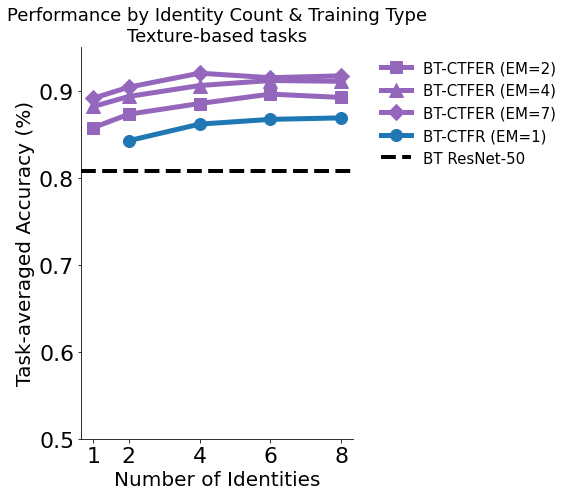

In [83]:
# BT CTFER // texture tasks only 

# Step 1: Define your models with group info
models = [

    {'Model': 'CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance': 0.84259616, 'Group': 'BT-CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance': 0.8616085309, 'Group': 'BT-CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance': 0.8670526986, 'Group': 'BT-CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance': 0.8687973928, 'Group': 'BT-CTFR'},

    {'Model': 'CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.8576737216, 'Group': 'BT-CTFER'}, # TODO
    {'Model': 'CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.8819393498, 'Group': 'BT-CTFER'},# TODO
    {'Model': 'CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.8914287132, 'Group': 'BT-CTFER'},
    

    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance': 0.873008664, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance':0.8852738222, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.8961056938, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.8922546218, 'Group': 'BT-CTFER'},


    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.8934081478, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance': 0.9059291065, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance': 0.9117092374, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance': 0.9108043671, 'Group': 'BT-CTFER'},


    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance':0.9040906405, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance':0.9201515379, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.9149654805, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance': 0.9170806398, 'Group': 'BT-CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'BT-GFR': 'tab:green',
    'BT-CTFR': 'tab:blue',
    'BT-CTFER': 'tab:purple',
    # 'BT-GFR': '#033500',
    # 'BT-CTFR': '#040273',
    # 'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
# ctfer_shades = {
#     2: '#bfa2d9',  # light purple
#     4: '#a566c2',  # medium purple
#     7: '#6a1b9a',  # dark purple
# }
# Step 3: Plot
plt.figure(figsize=(8, 7))
for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] 
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Task-averaged Accuracy (%)', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9], fontsize=22) 
plt.ylim([0.5, 0.95])

plt.axhline(y=0.8081376818, color='black', linestyle='--', linewidth=4, label = 'BT ResNet-50')
# plt.axhline(y=0.8081376818*100, color='black', linestyle='--', linewidth=3.5, label = 'ResNet-50')
plt.title('Performance by Identity Count & Training Type\nTexture-based tasks', fontsize=18)

# plt.title('Performance vs. Number of Identities (Texture-based tasks)', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15,frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig6C_A.pdf", format="pdf", bbox_inches="tight")

plt.show()


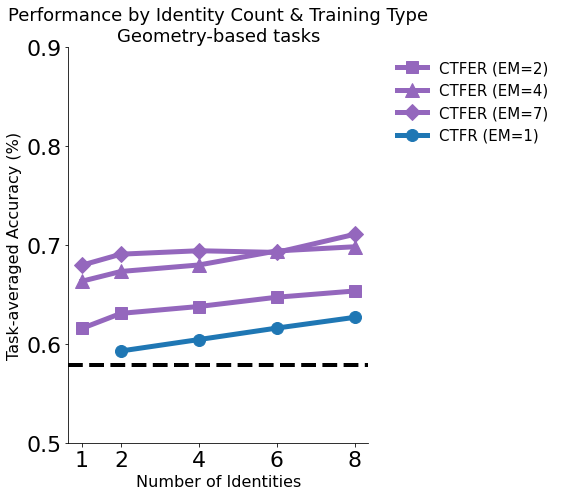

In [47]:
# CTFER // geometry tasks only 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Define your models with group info
models = [

    # {'Model': 'GFR-2ID',      'NumID': 2,  'NumEM':1, 'Performance':0.6656042676, 'Group': 'GFR'},
    # {'Model': 'GFR-4ID',      'NumID': 4,  'NumEM':1, 'Performance':0.73094090711, 'Group': 'GFR'},
    # {'Model': 'GFR-6ID',      'NumID': 6,  'NumEM':1, 'Performance': 0.7579355298, 'Group': 'GFR'},
    # {'Model': 'GFR-8ID',      'NumID': 8,  'NumEM':1, 'Performance':0.7611050157, 'Group': 'GFR'},

    {'Model': 'CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance': 0.5928436019, 'Group': 'CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance':0.6043850358, 'Group': 'CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance':0.6160076703, 'Group': 'CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance':0.626862965, 'Group': 'CTFR'},

    {'Model': 'CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.6157028738, 'Group': 'CTFER'}, # TODO
    {'Model': 'CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.6633975716, 'Group': 'CTFER'},# TODO
    # {'Model': 'CTER-6EM',  'NumID': 1,  'NumEM':6, 'Performance': 0.8278611294, 'Group': 'CTFER'},# TODO
    {'Model': 'CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.6796186135, 'Group': 'CTFER'},
    

    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':0.6308706112, 'Group': 'CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance': 0.6378118445, 'Group': 'CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.6471945278, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.6535194537, 'Group': 'CTFER'},


    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.6732439626, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance':0.679802439, 'Group': 'CTFER'},
    {'Model': 'CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance':0.6940148168, 'Group': 'CTFER'},
    {'Model': 'CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance':0.6982189096, 'Group': 'CTFER'},


    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance':0.6907285784, 'Group': 'CTFER'},
    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.6941961388, 'Group': 'CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance': 0.6924959412, 'Group': 'CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.7108204301, 'Group': 'CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'GFR': 'tab:green',
    'CTFR': 'tab:blue',
    'CTFER': 'tab:purple',
    'BT-GFR': '#033500',
    'BT-CTFR': '#040273',
    'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
ctfer_shades = {
    2: '#bfa2d9',  # light purple
    4: '#a566c2',  # medium purple
    7: '#6a1b9a',  # dark purple
}
# Step 3: Plot
plt.figure(figsize=(8, 7))
for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] if group == 'CTFER' else 'o'
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=16)
plt.ylabel('Task-averaged Accuracy (%)', fontsize=16)
plt.xticks([1,2,4,6,8], fontsize=22)

plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9], fontsize=22) 
plt.ylim([0.5, 0.9])
plt.axhline(y=0.578295298, color='black', linestyle='--',linewidth=4)
plt.title('Performance by Identity Count & Training Type\nGeometry-based tasks', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig("fig5C_B.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# BT CTFER // geometry tasks only 
models = [

    {'Model': 'CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance':0.6404106043, 'Group': 'BT-CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance':0.6495167634, 'Group': 'BT-CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance':0.6735510019, 'Group': 'BT-CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance': 0.6763738581, 'Group': 'BT-CTFR'},

    {'Model': 'CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance':0.6625262507, 'Group': 'BT-CTFER'}, # TODO
    {'Model': 'CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance':0.7143640563, 'Group': 'BT-CTFER'},# TODO
    {'Model': 'CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance':0.7235943, 'Group': 'BT-CTFER'},
    

    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':0.6815765556, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance':0.6890397382, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.7074300179, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance': 0.6918112368, 'Group': 'BT-CTFER'},


    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.7268754928, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance': 0.7341099964, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance': 0.7395354073, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance':0.7505464765, 'Group': 'BT-CTFER'},


    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance':0.752577, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance':0.7517109747, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.7377320572, 'Group': 'BT-CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.755208821, 'Group': 'BT-CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'BTGFR': 'tab:green',
    'BT-CTFR': 'tab:blue',
    'BT-CTFER': 'tab:purple',
    # 'BT-GFR': '#033500',
    # 'BT-CTFR': '#040273',
    # 'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
# ctfer_shades = {
#     2: '#bfa2d9',  # light purple
#     4: '#a566c2',  # medium purple
#     7: '#6a1b9a',  # dark purple
# }
# Step 3: Plot
plt.figure(figsize=(8, 7))
for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] 
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Task-averaged Accuracy (%)', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9], fontsize=22) 
plt.ylim([0.5, 0.95])
plt.axhline(y=0.6286255455, color='black', linestyle='--', linewidth=4, label='BT ResNet-50')
plt.title('Performance by Identity Count & Training Type\nGeometry-based tasks', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15,frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.savefig("fig6C_B.pdf", format="pdf", bbox_inches="tight")

plt.show()


## Mesh space structure recovery 

In [ ]:
# CTFER // identity space 
# Step 1: Define your models with group info
models = [

    {'Model': 'CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance': 0.1355, 'Group': 'CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance':-0.168, 'Group': 'CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance':-0.117, 'Group': 'CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance':-0.06, 'Group': 'CTFR'},

    {'Model': 'CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.14, 'Group': 'CTFER'}, # TODO
    {'Model': 'CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.345, 'Group': 'CTFER'},# TODO
    # {'Model': 'CTER-6EM',  'NumID': 1,  'NumEM':6, 'Performance': 0.8278611294, 'Group': 'CTFER'},# TODO
    {'Model': 'CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.4756666667, 'Group': 'CTFER'},
    

    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':-0.002666666667, 'Group': 'CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance': 0.108, 'Group': 'CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.112, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.205, 'Group': 'CTFER'},


    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.3266666667, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance':0.111, 'Group': 'CTFER'},
    {'Model': 'CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance':0.247, 'Group': 'CTFER'},
    {'Model': 'CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance':-0.082, 'Group': 'CTFER'},


    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance':0.2636666667, 'Group': 'CTFER'},
    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.177, 'Group': 'CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.494, 'Group': 'CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.335, 'Group': 'CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'GFR': 'tab:green',
    'CTFR': 'tab:blue',
    'CTFER': 'tab:purple',
    'BT-GFR': '#033500',
    'BT-CTFR': '#040273',
    'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
ctfer_shades = {
    2: '#bfa2d9',  # light purple
    4: '#a566c2',  # medium purple
    7: '#6a1b9a',  # dark purple
}
# Step 3: Plot
plt.figure(figsize=(8.75, 6))
plt.axhline(y=-0.069, color='black', linestyle='--',linewidth=4, label='Baseline (Sup. ResNet-50)')
plt.axhline(y=0.641, color='red', linestyle='--',linewidth=4, label='Ceiling (GFR-12ID)')

for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] if group == 'CTFER' else 'o'
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Correlation', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8], [-0.2, 0, 0.2, 0.4, 0.6, 0.8], fontsize=20)
plt.ylim([-0.29, 0.87])

plt.title('Identity mesh space recovery', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
ax.grid(False)
plt.savefig("fig7G_identity.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
# CTFER // emotion space 
# Step 1: Define your models with group info
models = [

    {'Model': 'CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance': 0.2721666667, 'Group': 'CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance':-0.243, 'Group': 'CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance':-0.174, 'Group': 'CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance':0.47, 'Group': 'CTFR'},

    {'Model': 'CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': -0.108, 'Group': 'CTFER'}, # TODO
    {'Model': 'CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.499, 'Group': 'CTFER'},# TODO
    # {'Model': 'CTER-6EM',  'NumID': 1,  'NumEM':6, 'Performance': 0.8278611294, 'Group': 'CTFER'},# TODO
    {'Model': 'CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.616, 'Group': 'CTFER'},
    

    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':0.04466666667, 'Group': 'CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance': 0.027, 'Group': 'CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':-0.09, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':-0.04, 'Group': 'CTFER'},


    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.5283333333, 'Group': 'CTFER'},
    {'Model': 'CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance':0.492, 'Group': 'CTFER'},
    {'Model': 'CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance':0.41, 'Group': 'CTFER'},
    {'Model': 'CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance':0.303, 'Group': 'CTFER'},


    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance':0.6743333333, 'Group': 'CTFER'},
    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.81, 'Group': 'CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.813, 'Group': 'CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.822, 'Group': 'CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'GFR': 'tab:green',
    'CTFR': 'tab:blue',
    'CTFER': 'tab:purple',
    'BT-GFR': '#033500',
    'BT-CTFR': '#040273',
    'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
ctfer_shades = {
    2: '#bfa2d9',  # light purple
    4: '#a566c2',  # medium purple
    7: '#6a1b9a',  # dark purple
}
# Step 3: Plot
plt.figure(figsize=(8.75, 6))
plt.axhline(y=0.455, color='black', linestyle='--',linewidth=4,label='Baseline (Sup. ResNet-50)')
plt.axhline(y=0.669, color='red', linestyle='--',linewidth=4, label='Ceiling (GER-7EM)')

for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] if group == 'CTFER' else 'o'
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Correlation', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8], [-0.2, 0, 0.2, 0.4, 0.6, 0.8], fontsize=20)
plt.ylim([-0.29, 0.87])

plt.title('Emotion mesh space recovery', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
ax.grid(False)
plt.savefig("fig7G_emotion.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
# BT-CTFER // identity space 
# Step 1: Define your models with group info
models = [

    {'Model': 'BT-CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance': 0.1096666667, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance':0.412, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance':0.113, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance':0.109, 'Group': 'BT-CTFR'},

    {'Model': 'BT-CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.166, 'Group': 'BT-CTFER'}, # TODO
    {'Model': 'BT-CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.37, 'Group': 'BT-CTFER'},# TODO
    # {'Model': 'BT-CTER-6EM',  'NumID': 1,  'NumEM':6, 'Performance': 0.8278611294, 'Group': 'BT-CTFER'},# TODO
    {'Model': 'BT-CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.401, 'Group': 'BT-CTFER'},
    

    {'Model': 'BT-CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':0.112, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance': 0.118, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.124, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.07, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.386, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance':0.332, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance':0.38, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance':0.338, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance':0.434, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.432, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.408, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.352, 'Group': 'BT-CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'GFR': 'tab:green',
    'BT-CTFR': 'tab:blue',
    'BT-CTFER': 'tab:purple',
    'BT-GFR': '#033500',
    
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
ctfer_shades = {
    2: '#bfa2d9',  # light purple
    4: '#a566c2',  # medium purple
    7: '#6a1b9a',  # dark purple
}
# Step 3: Plot
plt.figure(figsize=(8.75, 6))
plt.axhline(y=-0.069, color='black', linestyle='--',linewidth=4, label='Baseline (Sup. ResNet-50)')
plt.axhline(y=0.641, color='red', linestyle='--',linewidth=4, label='Ceiling (GFR-12ID)')

for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] if group == 'BT-CTFER' else 'o'
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Correlation', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8], [-0.2, 0, 0.2, 0.4, 0.6, 0.8], fontsize=20)
plt.ylim([-0.29, 0.87])

plt.title('Identity mesh space recovery', fontsize=18)
plt.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
ax.grid(False)
plt.savefig("fig7H_identity.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
# CTFER // emotion space 
# Step 1: Define your models with group info
models = [

    {'Model': 'BT-CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance': 0.3186666667, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance':0.581, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance':0.432, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance':0.644, 'Group': 'BT-CTFR'},

    {'Model': 'BT-CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.435, 'Group': 'BT-CTFER'}, # TODO
    {'Model': 'BT-CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.523, 'Group': 'BT-CTFER'},# TODO
    # {'Model': 'BT-CTER-6EM',  'NumID': 1,  'NumEM':6, 'Performance': 0.8278611294, 'Group': 'BT-CTFER'},# TODO
    {'Model': 'BT-CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.70725, 'Group': 'BT-CTFER'},
    

    {'Model': 'BT-CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':0.279, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance': 0.306, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.156, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.291, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.5166666667, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance':0.648, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance':0.321, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance':0.569, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance':0.639, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.794, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.729, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.648, 'Group': 'BT-CTFER'},
    
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'GFR': 'tab:green',
    'BT-CTFR': 'tab:blue',
    'BT-CTFER': 'tab:purple',
    'BT-GFR': '#033500',
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
ctfer_shades = {
    2: '#bfa2d9',  # light purple
    4: '#a566c2',  # medium purple
    7: '#6a1b9a',  # dark purple
}
# Step 3: Plot
plt.figure(figsize=(8.75, 6))
plt.axhline(y=0.455, color='black', linestyle='--',linewidth=4,label='Baseline (Sup. ResNet-50)')
plt.axhline(y=0.669, color='red', linestyle='--',linewidth=4, label='Ceiling (GER-7EM)')

for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] if group == 'BT-CTFER' else 'o'
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=6, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Correlation', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8], [-0.2, 0, 0.2, 0.4, 0.6, 0.8], fontsize=20)
plt.ylim([-0.29, 0.87])

plt.title('Emotion mesh space recovery', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
ax.grid(False)
plt.savefig("fig7H_emotion.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define your models with group info
models = [
    # {'Model': 'GFR-2ID1',      'NumID': 2,  'Performance': 0.7542288753, 'Group': 'GFR'},
    # {'Model': 'GFR-2ID2',      'NumID': 2,  'Performance': 0.7298225648, 'Group': 'GFR'},
    # {'Model': 'GFR-2ID3',      'NumID': 2,  'Performance': 0.7405287386, 'Group': 'GFR'},
    {'Model': 'GFR-2ID',      'NumID': 2,  'Performance': 0.6873365239, 'Group': 'GFR'},
    {'Model': 'GFR-4ID',      'NumID': 4,  'Performance': 0.7296381734, 'Group': 'GFR'},
    {'Model': 'GFR-6ID',      'NumID': 6,  'Performance': 0.7506979288, 'Group': 'GFR'},
    {'Model': 'GFR-8ID',      'NumID': 8,  'Performance': 0.761645995, 'Group': 'GFR'},
    {'Model': 'GFR-10ID',      'NumID': 10,  'Performance': 0.7397975368, 'Group': 'GFR'},

    # {'Model': 'CTFR-2ID1',     'NumID': 2,  'Performance': 0.7910073524, 'Group': 'CTFR'},
    # {'Model': 'CTFR-2ID2',     'NumID': 2,  'Performance': 0.8074498963, 'Group': 'CTFR'},
    # {'Model': 'CTFR-2ID3',     'NumID': 2,  'Performance': 0.7845907184, 'Group': 'CTFR'},
    {'Model': 'CTFR-2ID',     'NumID': 2,  'Performance': 0.7570769992, 'Group': 'CTFR'},
    {'Model': 'CTFR-4ID',     'NumID': 4,  'Performance': 0.7971436248, 'Group': 'CTFR'},
    {'Model': 'CTFR-6ID',     'NumID': 6,  'Performance': 0.7997659246, 'Group': 'CTFR'},
    {'Model': 'CTFR-8ID',     'NumID': 8,  'Performance': 0.8144765727, 'Group': 'CTFR'},
    {'Model': 'CTFR-10ID',     'NumID': 10,  'Performance': 0.8143727494, 'Group': 'CTFR'},

    # {'Model': 'CTER-7EM1',  'NumID': 1,  'Performance': 0.8455476049, 'Group': 'CTER'},
    # {'Model': 'CTER-7EM2',  'NumID': 1,  'Performance': 0.8264865973, 'Group': 'CTER'},
    # {'Model': 'CTER-7EM3',  'NumID': 1,  'Performance': 0.8584815982, 'Group': 'CTER'},
    # {'Model': 'CTER-7EM4',  'NumID': 1,  'Performance': 0.8433121554, 'Group': 'CTER'},
    {'Model': 'CTER-2EM',  'NumID': 1,  'Performance': 0.7470210593, 'Group': 'CTER'}, # TODO
    {'Model': 'CTER-4EM',  'NumID': 1,  'Performance': 0.7913236178, 'Group': 'CTER'},# TODO
    {'Model': 'CTER-6EM',  'NumID': 1,  'Performance': 0.8020731725, 'Group': 'CTER'},# TODO
    {'Model': 'CTER-7EM',  'NumID': 1,  'Performance':0.8123698153, 'Group': 'CTER'},
    
    # {'Model': 'CTFER-4IDEM1',  'NumID': 2,  'Performance': 0.8357553177, 'Group': 'CTFER'},
    # {'Model': 'CTFER-4IDEM2',  'NumID': 2,  'Performance': 0.8400910487, 'Group': 'CTFER'},
    # {'Model': 'CTFER-4IDEM3',  'NumID': 2,  'Performance': 0.8301515394, 'Group': 'CTFER'},
    {'Model': 'CTFER-4IDEM',  'NumID': 2,  'Performance': 0.8032276248, 'Group': 'CTFER'},

    # {'Model': 'CTFER-6IDEM1',  'NumID': 2,  'Performance': 0.8351562915, 'Group': 'CTFER'},
    # {'Model': 'CTFER-6IDEM2',  'NumID': 2,  'Performance': 0.8409304873, 'Group': 'CTFER'},
    # {'Model': 'CTFER-6IDEM3',  'NumID': 2,  'Performance': 0.8328340259, 'Group': 'CTFER'},
    {'Model': 'CTFER-6IDEM',  'NumID': 2,  'Performance': 0.804033691, 'Group': 'CTFER'},

    # {'Model': 'CTFER-8IDEM1',  'NumID': 2,  'Performance': 0.8464946605, 'Group': 'CTFER'},
    # {'Model': 'CTFER-8IDEM2',  'NumID': 2,  'Performance': 0.8581728703, 'Group': 'CTFER'},
    # {'Model': 'CTFER-8IDEM3',  'NumID': 2,  'Performance': 0.8428096323, 'Group': 'CTFER'},
    {'Model': 'CTFER-8IDEM',  'NumID': 2,  'Performance': 0.822995628, 'Group': 'CTFER'},

    # {'Model': 'CTFER-10IDEM1',  'NumID': 2,  'Performance': 0.8619402467, 'Group': 'CTFER'},
    # {'Model': 'CTFER-10IDEM2',  'NumID': 2,  'Performance': 0.8661348041, 'Group': 'CTFER'},
    # {'Model': 'CTFER-10IDEM3',  'NumID': 2,  'Performance': 0.858156513, 'Group': 'CTFER'},
    {'Model': 'CTFER-10IDEM',  'NumID': 2,  'Performance': 0.8345580283, 'Group': 'CTFER'},

    # {'Model': 'CTFER-12IDEM1',  'NumID': 2,  'Performance': 0.8541987824, 'Group': 'CTFER'},
    # {'Model': 'CTFER-12IDEM2',  'NumID': 2,  'Performance': 0.8580765849, 'Group': 'CTFER'},
    # {'Model': 'CTFER-12IDEM3',  'NumID': 2,  'Performance': 0.8633570695, 'Group': 'CTFER'},
    {'Model': 'CTFER-12IDEM',  'NumID': 2,  'Performance': 0.8361711941, 'Group': 'CTFER'},

    # {'Model': 'CTFER-14IDEM1',  'NumID': 2,  'Performance': 0.8478233217, 'Group': 'CTFER'},
    # {'Model': 'CTFER-14IDEM2',  'NumID': 2,  'Performance': 0.8623633005, 'Group': 'CTFER'},
    # {'Model': 'CTFER-14IDEM3',  'NumID': 2,  'Performance': 0.8702249556, 'Group': 'CTFER'},
    {'Model': 'CTFER-14IDEM',  'NumID': 2,  'Performance': 0.837207479, 'Group': 'CTFER'},

    {'Model': 'CTFER-28IDEM', 'NumID': 4, 'Performance': 0.8636927432, 'Group': 'CTFER'},
    {'Model': 'CTFER-42IDEM',  'NumID':6,  'Performance': 0.8614487551, 'Group': 'CTFER'},
    {'Model': 'CTFER-56IDEM', 'NumID': 8, 'Performance':0.863220902, 'Group': 'CTFER'},
    
    # {'Model': 'BT-CTER-7EM1',  'NumID': 1,  'Performance': 0.8930088084, 'Group': 'BT-CTER'},
    # {'Model': 'BT-CTER-7EM2',  'NumID': 1,  'Performance': 0.8810115208, 'Group': 'BT-CTER'},
    # {'Model': 'BT-CTER-7EM3',  'NumID': 1,  'Performance': 0.9045310721, 'Group': 'BT-CTER'},
    # {'Model': 'BT-CTER-7EM4',  'NumID': 1,  'Performance': 0.88996355159, 'Group': 'BT-CTER'},

    # BT-GFR
    # BT-CTFR

    {'Model': 'BT-CTER-7EM',  'NumID': 1,  'Performance': 0.8601636175, 'Group': 'BT-CTER'},
    {'Model': 'BT-GFR-6ID',  'NumID': 6,  'Performance': 0.6145280547, 'Group': 'BT-GFR'},
    {'Model': 'BT-GFR-8ID',  'NumID': 8,  'Performance': 0.6472605374, 'Group': 'BT-GFR'},
    {'Model': 'BT-CFTR-8ID',  'NumID': 8,  'Performance': 0.8304724127, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFER-4IDEM',  'NumID': 2,  'Performance': 0.8395177742, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-6IDEM',  'NumID': 2,  'Performance':0.8459864685, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-8IDEM',  'NumID': 2,  'Performance': 0.8648270859, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-10IDEM',  'NumID': 2,  'Performance': 0.8727267573, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-12IDEM',  'NumID': 2,  'Performance': 0.8764696888, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-14IDEM',  'NumID': 2,  'Performance': 0.8788759651, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-28IDEM', 'NumID': 4, 'Performance': 0.9020963838, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-42IDEM',  'NumID':6,  'Performance':0.8980706406, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-56IDEM', 'NumID': 8, 'Performance': 0.9012611864, 'Group': 'BT-CTFER'},
    # {'Model': 'Basel-GFR-2ID', 'NumID': 2, 'Performance': 0.6951830796, 'Group': 'Basel-GFR'},
    # {'Model': 'Basel-GFR-4ID', 'NumID': 4, 'Performance': 0.7371971538, 'Group': 'Basel-GFR'},
    # {'Model': 'Basel-GFR-6ID', 'NumID': 6, 'Performance': 0.7660289428, 'Group': 'Basel-GFR'},
    # {'Model': 'Basel-GFR-8ID', 'NumID': 8, 'Performance': 0.7856076766, 'Group': 'Basel-GFR'},
    # {'Model': 'Basel-GFR-10ID', 'NumID': 10, 'Performance': 0.790340054, 'Group': 'Basel-GFR'},
    # {'Model': 'Basel-GFR-20ID', 'NumID': 20, 'Performance': 0.8015625767, 'Group': 'Basel-GFR'},
    # # {'Model': 'Basel-GFR-30ID', 'NumID': 30, 'Performance': 0.87, 'Group': 'Basel-GFR'},
    # # {'Model': 'Basel-GFR-40ID', 'NumID': 40, 'Performance': 0.87, 'Group': 'Basel-GFR'},
    # # {'Model': 'Basel-GFR-50ID', 'NumID': 50, 'Performance': 0.87, 'Group': 'Basel-GFR'},
    # {'Model': 'Basel-GFR-100ID', 'NumID': 100, 'Performance': 0.8023852646, 'Group': 'Basel-GFR'},
    # # {'Model': 'Basel-GFR-1000ID', 'NumID': 1000, 'Performance': 0.6744704997, 'Group': 'Basel-GFR'},
    # {'Model': 'Basel-CTFR-2ID', 'NumID': 2, 'Performance': 0.7256126705, 'Group': 'Basel-CTFR'},
    # # {'Model': 'Basel-CTFR-4ID', 'NumID': 8, 'Performance': 0.87, 'Group': 'Basel-CTFR'},
    # {'Model': 'Basel-CTFR-6ID', 'NumID': 6, 'Performance': 0.7535438429, 'Group': 'Basel-CTFR'},
    # # {'Model': 'Basel-CTFR-8ID', 'NumID': 8, 'Performance': 0.87, 'Group': 'Basel-CTFR'},
    # {'Model': 'Basel-CTFR-10ID', 'NumID': 10, 'Performance': 0.7569599585, 'Group': 'Basel-CTFR'},
    # # {'Model': 'Basel-CTFR-20ID', 'NumID': 8, 'Performance': 0.87, 'Group': 'Basel-CTFR'},
    # # {'Model': 'Basel-CTFR-30ID', 'NumID': 8, 'Performance': 0.87, 'Group': 'Basel-CTFR'},
    # # {'Model': 'Basel-CTFR-40ID', 'NumID': 8, 'Performance': 0.87, 'Group': 'Basel-CTFR'},
    # # {'Model': 'Basel-CTFR-50ID', 'NumID': 8, 'Performance': 0.87, 'Group': 'Basel-CTFR'},
    # {'Model': 'Basel-CTFR-100ID', 'NumID': 100, 'Performance': 0.7618499603, 'Group': 'Basel-CTFR'},
    # # {'Model': 'Basel-CTFR-1000ID', 'NumID': 1000, 'Performance': 0.6637780948, 'Group': 'Basel-CTFR'},
]

# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'GFR': 'tab:green',
    'CTFR': 'tab:blue',
    'CTFER': 'tab:purple',
    'BT-GFR': '#033500',
    'BT-CTFR': '#040273',
    'BT-CTFER': "#420764",
    'CTER': "#e8c3a4",
    'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}


# Step 3: Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='NumID', y='Performance', hue='Group', palette=palette, s=180)

# Formatting
plt.xlabel('Number of Identities', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Performance vs. Number of Identities (Grouped)', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.tight_layout()
plt.show()


# Result 8

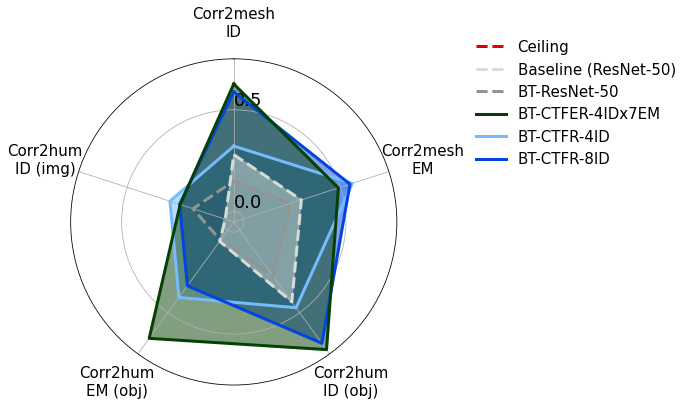

In [ ]:
# Pentagon behavior plot
# [corr2hum id
# corr2hum em, 
# corr2mesh id, 
# corr2mesh em, 
# corr2hum id (i1)]

pentagon_behav_resnet = [0.2799610411,0.2987012987,0.4345566972, 0.06753246753, -0.006183]
pentagon_behav_bt_resnet = [0.1507472703, 0.2415584416, 0.2807018136, 0.06103896104, 0.160230]
pentagon_behav_ctfer_28idem = [0.4337662338, 0.5324675325, 0.4441558442, 0.4571428571, 0.231017]
pentagon_behav_btctfer_28idem = [0.6268269249,0.4896103896, 0.7242611619, 0.6558441558, 0.226366]
pentagon_behav_human = [1, 1, 1, 1, 1]
pentagon_behav_ctfr_8id = [0.5488795353, 0.5142857143, 0.623579117, 0.2181818182, 0.191477]
pentagon_behav_btctfr_8id = [0.5883116883, 0.5495290969, 0.6857142857, 0.3371224601, 0.22932]
pentagon_behav_ctfr_4id = [0.3506493506, 0.3845404555, 0.3753246753, 0.2338421689, 0.117816]
pentagon_behav_btctfr_4id = [0.3220779221, 0.561038961, 0.4701298701, 0.4077922078, 0.279130]
pentagon_behav_btctfr_12id = []
pentagon_behav_btcter_7em = [0.3506493506, 0.5376623377, 0.2662337662, 0.5194805195, ]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Define task labels for the 5-spoke (pentagon) radar plot
task_labels_pentagon = ['Corr2mesh\nID', 'Corr2mesh\nEM', 'Corr2hum\nID (obj)', 'Corr2hum\nEM (obj)', 'Corr2hum\nID (img)']  # Replace with your actual task names

# Define example data for each model (replace these with actual values)
# Define colors
green_shades = ["#86d266", "#15c208", "#0A7B28", "#054103"]
cmap = get_cmap('viridis')

# Radar plot setup
num_spokes = len(task_labels_pentagon)
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape

def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Close the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.5)
    line, = ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=3, label=label)
    return line

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot each model
# h2 = plot_model(ax, pentagon_behav_resnet, 'xkcd:light gray', 'ResNet-50')
h4 = plot_model(ax, pentagon_behav_bt_resnet, 'xkcd:gray', 'BT-ResNet-50',  linestyle='--')
# h6 = plot_model(ax, pentagon_behav_ctfer_28idem, green_shades[1], 'CTFER-4IDx7EM')

# h9 = plot_model(ax, pentagon_behav_ctfr_4id, 'xkcd:sky blue', 'CTFER-4IDx7EM')
h10 = plot_model(ax, pentagon_behav_btctfr_4id, 'xkcd:sky blue', 'BT-CTFER-4IDx7EM')
h12= plot_model(ax, pentagon_behav_btctfr_8id, 'xkcd:blue', 'BT-CTFER-4IDx7EM')
h8 = plot_model(ax, pentagon_behav_btctfer_28idem, green_shades[3], 'BT-CTFER-4IDx7EM')

h_baseline = plot_model(ax, pentagon_behav_resnet, 'xkcd:light gray', 'Baseline', linestyle='--')
# h_ceiling = plot_model(ax, pentagon_behav_human, 'xkcd:red', 'Ceiling (human)', fill=False, linestyle='--')

# Set labels and limits
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_pentagon, fontsize=15, rotation=45)
ax.xaxis.set_tick_params(pad=25)
ax.set_ylim(-0.05,0.75)
ax.set_yticks([0, 0.5])
ax.set_yticklabels(ax.get_yticks(), fontsize=18)
ax.set_rlabel_position(0)

# Add legend
handles = [h_ceiling, h_baseline, h4, h8, h10, h12]
labels = ['Ceiling', 'Baseline (ResNet-50)', 'BT-ResNet-50','BT-CTFER-4IDx7EM',
'BT-CTFR-4ID', 
'BT-CTFR-8ID'
]
ax.legend(handles, labels, fontsize=15, loc='upper left', bbox_to_anchor=(1.2, 1.1), frameon=False)

plt.tight_layout()
plt.show()



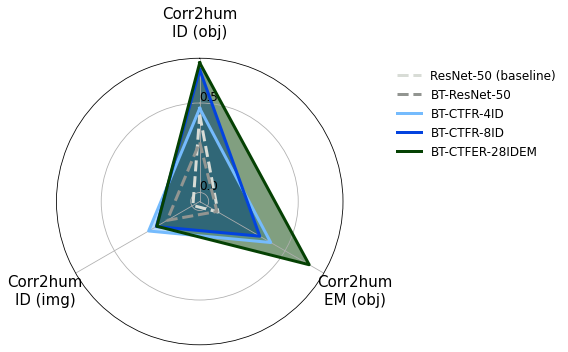

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Use only the last 3 values for triangle plot
def trim_for_triangle(data):
    return data[2:]

# Labels for the triangle (you can update these as needed)
triangle_labels = [ 'Corr2hum\nID (obj)', 'Corr2hum\nEM (obj)', 'Corr2hum\nID (img)']
num_spokes = len(triangle_labels)

# Compute angles for 3-spoke triangle plot
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # close the loop

# Define model data (trimmed to last 3 values)
model_data = {
    'ResNet-50': trim_for_triangle([0.2799610411,0.2987012987,0.4345566972, 0.06753246753, -0.006183]),
    'BT-ResNet-50': trim_for_triangle([0.1507472703, 0.2415584416, 0.2807018136, 0.06103896104, 0.160230]),
    'BT-CTFR-4ID': trim_for_triangle([0.3220779221, 0.561038961, 0.4701298701, 0.4077922078, 0.279130]),
    'BT-CTFR-8ID': trim_for_triangle([0.5883116883, 0.5495290969, 0.6857142857, 0.3371224601, 0.22932]),
    'BT-CTFER-28IDEM': trim_for_triangle([0.6268269249,0.4896103896, 0.7242611619, 0.6558441558, 0.226366])
}

# Colors
green_shades = ["#86d266", "#15c208", "#0A7B28", "#054103"]

# Helper to plot a model
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])
    if fill:
        ax.fill(angles, values, color=color, alpha=0.5)
    line, = ax.plot(angles, values, color=color, linewidth=3, linestyle=linestyle, label=label)
    return line

# Start plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot each model
handles = []
handles.append(plot_model(ax, model_data['ResNet-50'], 'xkcd:light grey', 'ResNet-50 (baseline)', linestyle='--', fill=False))
handles.append(plot_model(ax, model_data['BT-ResNet-50'], 'xkcd:grey', 'BT-ResNet-50', linestyle='--', fill=False))
handles.append(plot_model(ax, model_data['BT-CTFR-4ID'], 'xkcd:sky blue', 'BT-CTFR-4ID'))
handles.append(plot_model(ax, model_data['BT-CTFR-8ID'], 'xkcd:blue', 'BT-CTFR-8ID'))
handles.append(plot_model(ax, model_data['BT-CTFER-28IDEM'], green_shades[-1], 'BT-CTFER-28IDEM'))

# Axis setup
ax.set_xticks(angles[:-1])
ax.set_xticklabels(triangle_labels, fontsize=15)
ax.xaxis.set_tick_params(pad=25)

ax.set_ylim(-0.05, 0.75)
ax.set_yticks([0, 0.5])
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_rlabel_position(0)

# Legend
ax.legend(handles=handles, fontsize=12, loc='upper left', bbox_to_anchor=(1.15, 1.0), frameon=False)

plt.tight_layout()
plt.show()


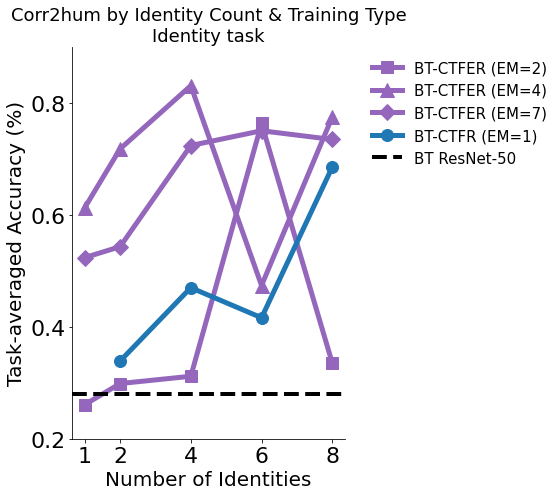

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define your models with group info
models = [

    {'Model': 'BT-CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance':0.338961039, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance': 0.4701298701, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance': 0.4163689729, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance': 0.6857142857, 'Group': 'BT-CTFR'},

    {'Model': 'BT-CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': 0.261038961, 'Group': 'BT-CTFER'}, # TODO
    {'Model': 'BT-CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance': 0.612987013, 'Group': 'BT-CTFER'},# TODO
    {'Model': 'BT-CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.5238966998, 'Group': 'BT-CTFER'},
    

    {'Model': 'BT-CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':0.2987693591, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance':0.3117895585, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':0.7636363636, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.3352827219, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.7181818182, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance': 0.8311688312, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance': 0.474025974, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance': 0.7753246753, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance': 0.5434197587, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.7242611619, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.7506493506, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.7350649351, 'Group': 'BT-CTFER'},
    
]


# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'BT-GFR': 'tab:green',
    'BT-CTFR': 'tab:blue',
    'BT-CTFER': 'tab:purple',
    # 'BT-GFR': '#033500',
    # 'BT-CTFR': '#040273',
    # 'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
# ctfer_shades = {
#     2: '#bfa2d9',  # light purple
#     4: '#a566c2',  # medium purple
#     7: '#6a1b9a',  # dark purple
# }
# Step 3: Plot
plt.figure(figsize=(8, 7))
for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] 
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Task-averaged Accuracy (%)', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([0.2, 0.4, 0.6, 0.8], fontsize=22) 
plt.ylim([0.2, 0.9])

plt.axhline(y=0.2807018136, color='black', linestyle='--', linewidth=4, label = 'BT ResNet-50')
# plt.axhline(y=0.8081376818*100, color='black', linestyle='--', linewidth=3.5, label = 'ResNet-50')
plt.title('Corr2hum by Identity Count & Training Type\nIdentity task', fontsize=18)

# plt.title('Performance vs. Number of Identities (Texture-based tasks)', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15,frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


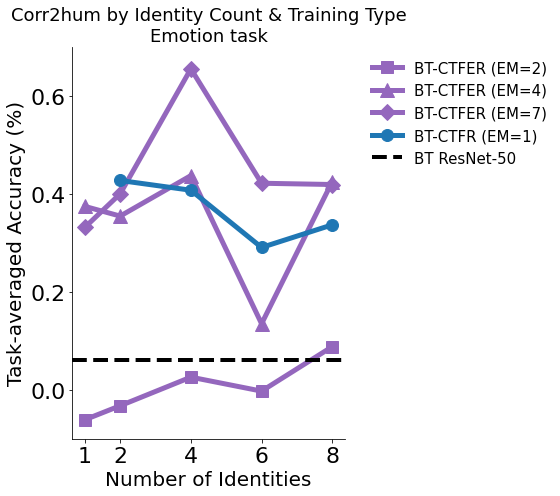

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define your models with group info
models = [

    {'Model': 'BT-CTFR-2ID',     'NumID': 2,  'NumEM':1, 'Performance':0.4277056277, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-4ID',     'NumID': 4,  'NumEM':1, 'Performance': 0.4077922078, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-6ID',     'NumID': 6,  'NumEM':1, 'Performance': 0.2909090909, 'Group': 'BT-CTFR'},
    {'Model': 'BT-CTFR-8ID',     'NumID': 8,  'NumEM':1, 'Performance': 0.3371224601, 'Group': 'BT-CTFR'},

    {'Model': 'BT-CTER-2EM',  'NumID': 1,  'NumEM':2, 'Performance': -0.06105878854, 'Group': 'BT-CTFER'}, # TODO
    {'Model': 'BT-CTER-4EM',  'NumID': 1,  'NumEM':4, 'Performance':0.3747970318, 'Group': 'BT-CTFER'},# TODO
    {'Model': 'BT-CTER-7EM',  'NumID': 1,  'NumEM':7, 'Performance': 0.331903187, 'Group': 'BT-CTFER'},
    

    {'Model': 'BT-CTFER-4IDEM',  'NumID': 2,  'NumEM':2, 'Performance':-0.03246753247, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-8IDEM',  'NumID': 4,  'NumEM':2, 'Performance':0.02597402597, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-12IDEM',  'NumID': 6,  'NumEM':2, 'Performance':-0.002597402597, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 8,  'NumEM':2, 'Performance':0.08831168831, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-8IDEM',  'NumID': 2,  'NumEM':4, 'Performance': 0.354978355, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-16IDEM',  'NumID': 4,  'NumEM':4, 'Performance': 0.4376623377, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-24IDEM',  'NumID': 6,  'NumEM':4, 'Performance':0.1350649351, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-32IDEM',  'NumID': 8,  'NumEM':4, 'Performance':0.425462835, 'Group': 'BT-CTFER'},


    {'Model': 'BT-CTFER-14IDEM',  'NumID': 2,  'NumEM':7, 'Performance': 0.4005383239, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-28IDEM', 'NumID': 4, 'NumEM':7, 'Performance': 0.6558441558, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-42IDEM',  'NumID':6,  'NumEM':7, 'Performance':0.4220779221, 'Group': 'BT-CTFER'},
    {'Model': 'BT-CTFER-56IDEM', 'NumID': 8, 'NumEM':7, 'Performance':0.4194805195, 'Group': 'BT-CTFER'},
    
]


# Step 2: Create DataFrame
df = pd.DataFrame(models)

# Optional: Color palette by group
palette = {
    'BT-GFR': 'tab:green',
    'BT-CTFR': 'tab:blue',
    'BT-CTFER': 'tab:purple',
    # 'BT-GFR': '#033500',
    # 'BT-CTFR': '#040273',
    # 'BT-CTFER': "#420764",
    # 'CTER': "#e8c3a4",
    # 'BT-CTER': "#f59611",
    'Basel-GFR': '#a6d854',
    'Basel-CTFR': '#8da0cb',
}

marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
numem_values = sorted(df['NumEM'].unique())
numem_marker_map = {em: marker_styles[i % len(marker_styles)] for i, em in enumerate(numem_values)}
# ctfer_shades = {
#     2: '#bfa2d9',  # light purple
#     4: '#a566c2',  # medium purple
#     7: '#6a1b9a',  # dark purple
# }
# Step 3: Plot
plt.figure(figsize=(8, 7))
for (group, num_em), group_df in df.groupby(['Group', 'NumEM']):
    group_df = group_df.sort_values('NumID')
    label = f"{group} (EM={num_em})"
    marker = numem_marker_map[num_em] 
    # Use custom shade for CTFER based on emotion count
    color = palette.get(group, None)

    if marker == '^' :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=14, color=color)
    else :
        plt.plot(group_df['NumID'], group_df['Performance'],
             marker=marker, label=label,
             linewidth=5, markersize=12, color=color)


plt.xlabel('Number of Identities', fontsize=20)
plt.ylabel('Task-averaged Accuracy (%)', fontsize=20)
plt.xticks([1,2,4,6,8], fontsize=22)
plt.yticks([0, 0.2, 0.4, 0.6], fontsize=22) 
plt.ylim([-0.1, 0.7])

plt.axhline(y=0.06103896104, color='black', linestyle='--', linewidth=4, label = 'BT ResNet-50')
# plt.axhline(y=0.8081376818*100, color='black', linestyle='--', linewidth=3.5, label = 'ResNet-50')
plt.title('Corr2hum by Identity Count & Training Type\nEmotion task', fontsize=18)

# plt.title('Performance vs. Number of Identities (Texture-based tasks)', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15,frameon=False)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
exp_names_list_GFR = [
    # 1. Elias - Neptune
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_elias/vbsle151_elias_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_neptune/vbsle151_neptune_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_seojin/vbsle151_seojin_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_sophie/vbsle151_sophie_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_dan/vbsle151_dan_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_sreyas/vbsle151_sreyas_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_younah/vbsle151_younah_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_ashley/vbsle151_ashley_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_kedar/vbsle151_kedar_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_josh/vbsle151_josh_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_ani/vbsle151_ani_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151/vbsle151_tony/vbsle151_tony_neutral',
]

exp_names_list_GFR_texture_colorbg = [
    # 1. Elias - Neptune
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_elias_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_neptune_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_seojin_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_sophie_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_dan_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_sreyas_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_younah_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_ashley_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_kedar_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_josh_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_ani_neutral',
    '/mnt/smb/locker/issa-locker/users/Seojin/data/face_data/vbsle_151_texture_colorbg/vbsl151_tony_neutral',
]

In [ ]:
model_names_list = [
# #     'resnet50',
# #     'barlowtwins',
#     'resnet50',  
#     'barlowtwins',
#     'alexnet', 'vgg16', 'vggface', 
#     'facenet_128d', 'facenet_512d',

# # 'SL_resnet50_finetune_vbsl_50k_obj_seed777_model_best',

# # # # sup ID 
'SL_resnet50_finetune_vbsle_50k_seojin_dan_seed777_model_best_SL',
   'SL_resnet50_finetune_vbsle_50k_sophie_seojin_seed777_model_best',
    'SL_resnet50_finetune_vbsle_50k_sophie_kedar_seed777_model_best',
#     'SL_resnet50_finetune_vbsle_50k_4way_SSKD_seed77_model_best',
#     'SL_resnet50_finetune_vbsle_50k_6way_final_seed77_model_best',
#     'SL_resnet50_finetune_vbsle_50k_8way_far_seed77_model_best',
#     'SL_resnet50_finetune_vbsle_50k_10way_seed77_model_best',
#     'SL_resnet50_finetune_vbsle_50k_12way_seed77_model_best_12way',

# # # sup ID color texture
#     'SL_resnet50_finetune_texture_colorbg_2way_seojin_dan_seed777_model_best',
#     'SL_resnet50_finetune_vbsle_50k_sophie_seojin_colorbg_seed777_model_best',
#     'SL_resnet50_finetune_vbsle_50k_sophie_kedar_colorbg_seed777_model_best',
#     'SL_resnet50_finetune_vbsle_50k_4way_SSKD_colorbg_seed77_model_best',
#     'SL_resnet50_finetune_vbsle_50k_6way_final_colorbg_seed77_model_best',
#     'SL_resnet50_finetune_texture_colorbg_8way_seed77_model_best',
#     'SL_resnet50_finetune_texture_colorbg_10way_seed77_model_best',
# 'SL_resnet50_finetune_texture_colorbg_12way_seed77_model_best',

    # 'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_ani_seed777_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_tony_seed777_model_best',
    # 'SL_resnet50_finetune_vbsle_50k_texture_colorbg_seojin_kedar_seed777_model_best',

    #     'SL_colorbg_resnet50_finetune_7way_EM_seojin_seed77_model_best',
    #     'SL_resnet50_finetune_7way_EM_sophie_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_7way_EM_dan_colorbg_seed77__model_best',
    #     'SL_resnet50_finetune_7way_EM_kedar_colorbg_seed77__model_best',

    #             'SL_resnet50_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    #     'SL_resnet50_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_6way_IDEM_seojin_dan_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_6way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    #     'SL_resnet50_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best', 
    #     'SL_resnet50_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    #     'SL_resnet50_finetune_10way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_10way_IDEM_seojin_dan_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_10way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    #     'SL_resnet50_finetune_12way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_12way_IDEM_seojin_dan_colorbg_seed77_model_best',
    #     'SL_resnet50_finetune_12way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    #     "SL_resnet50_finetune_14way_IDEM_seojin_sophie_colorbg_seed77_model_best",
    #     'SL_resnet50_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best',
    #     'SL_resnet50_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best',
    #     'SL_resnet50_finetune_28way_IDEM_colorbg_seed777_model_best',
    #     'SL_resnet50_finetune_42way_IDEM_colorbg_seed777_model_best',
    #     'SL_resnet50_finetune_56way_IDEM_colorbg_seed77_model_best',

    # 'off_the_shelf_barlowtwins_ID_8way_epochs50',
    # 'off_the_shelf_barlowtwins_ID_8way_colorbg_epochs50',

'off_the_shelf_barlowtwins_finetune_7way_EM_seojin_seed77_texture_model_best',
'off_the_shelf_barlowtwins_finetune_7way_EM_sophie_colorbg_seed77_model_best',
'off_the_shelf_barlowtwins_finetune_7way_EM_dan_colorbg_seed77__model_best',
'off_the_shelf_barlowtwins_finetune_7way_EM_kedar_colorbg_seed77__model_best',

    'off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_4way_IDEM_seojin_dan_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_4way_IDEM_sophie_kedar_colorbg_seed77_model_best',

    'off_the_shelf_barlowtwins_finetune_6way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_6way_IDEM_seojin_dan_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_6way_IDEM_sophie_kedar_colorbg_seed77_model_best',
    
    'off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_8way_IDEM_seojin_dan_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_8way_IDEM_sophie_kedar_colorbg_seed77_model_best',
        
    'off_the_shelf_barlowtwins_finetune_10way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_10way_IDEM_seojin_dan_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_10way_IDEM_sophie_kedar_colorbg_seed77_model_best',
        
    'off_the_shelf_barlowtwins_finetune_12way_IDEM_seojin_sophie_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_12way_IDEM_seojin_dan_colorbg_seed77_model_best',
    'off_the_shelf_barlowtwins_finetune_12way_IDEM_sophie_kedar_colorbg_seed77_model_best',
        
    'off_the_shelf_barlowtwins_IDEM_14way_colorbg_epochs50',
    'off_the_shelf_barlowtwins_finetune_14way_IDEM_seojin_dan_colorbg_seed777_model_best',
    'off_the_shelf_barlowtwins_finetune_14way_IDEM_sophie_kedar_colorbg_seed777_model_best',
'off_the_shelf_barlowtwins_IDEM_28way_colorbg_epochs50',
'off_the_shelf_barlowtwins_finetune_42way_IDEM_colorbg_seed777_model_best',
    'off_the_shelf_barlowtwins_finetune_56way_IDEM_colorbg_seed77_model_best'
]

In [ ]:
from scipy.spatial.distance import pdist, squareform

# code for inversion effect
# for resnet-50
# model_names_list = ['SL_resnet50_finetune_vbsle_50k_elias_neptune_seed777_model_best']
exp_names_list = exp_names_list_GFR_texture_colorbg

filename_postfix = ''
save_label = False

for model_name in model_names_list:
    # flatten & subsample for previous layers of resnet50
    if 'layer' in model_name or "subsampled" in model_name:
        if "layerC2" in model_name and "layerC2_subsampled" not in model_name:
            subsample = False
        else:
            subsample = True
    else:
        subsample = False
    # load model
    model = load_model(model_name)
    model.eval()
    
    # add hook
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    if 'simplecnn' in model_name:
        model.fc2.register_forward_hook(get_activation('feats'))
    elif 'alexnet' in model_name:
        if 'layer4' in model_name:
            print("add hook in layer4")
            model.features[4].register_forward_hook(get_activation('feats'))
        elif 'layer8' in model_name:
            print("add hook in layer8")
            model.features[8].register_forward_hook(get_activation('feats'))
        elif 'layer12' in model_name:
            print("add hook in layer12")
            model.features[12].register_forward_hook(get_activation('feats'))
        elif 'layerC2' in model_name:
            model.classifier[2].register_forward_hook(get_activation('feats'))
        else: # final layer
            model.classifier[5].register_forward_hook(get_activation('feats'))
    elif model_name == 'vgg16':
        model.classifier[4].register_forward_hook(get_activation('feats'))
    elif model_name == 'vggface':
        model.fc7.register_forward_hook(get_activation('feats'))
    elif 'onlyDM' in model_name:
        model.depth_predictor.encoder[4].register_forward_hook(get_activation('feats'))
        # model.depth_predictor.decoder[30].register_forward_hook(get_activation('feats'))
        # model.depth_predictor.encoder[6].register_forward_hook(get_activation('feats'))
    elif 'facenet' in model_name:
        model.register_forward_hook(get_activation('feats'))
    else: # resnet50
        if 'layer1' in model_name:
            print("add hook in layer1")
            model.layer1.register_forward_hook(get_activation('feats'))
        elif 'layer2' in model_name:
            print("add hook in layer2")
            model.layer2.register_forward_hook(get_activation('feats'))
        elif 'layer3' in model_name:
            print("add hook in layer3")
            model.layer3.register_forward_hook(get_activation('feats'))
        elif 'layer4_no_pooling' in model_name:
            print("add hook in layer4_no_pooling")
            model.layer4.register_forward_hook(get_activation('feats'))
        else:
            model.avgpool.register_forward_hook(get_activation('feats'))
        
    # load data4
    inversion_effects = []  # Store inversion effects for this model

    for exp_index, exp_name in enumerate(exp_names_list):
        print(model_name, exp_name)
        valdir = exp_name
        normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
        _trans = transforms.Compose([
                transforms.Resize(224),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                normalize,
            ])

        ## read & sort img filenames
        all_filenames = []
        # read img filenames
        for filename in os.listdir(valdir):
            if filename[-4:]=='.png':
            #     # for basal dataset / new controled exps
            #     assert(filename[:13]=='canvasvisible' or filename[:8]=='trialnum')
            #     all_filenames.append(filename)
            # elif filename[-5:]=='.JPEG':
                # for basal dataset / new controled exps
                all_filenames.append(filename)
            
                
        # sort img filenames -> fix bug of sorting by value
        # for basal dataset / new controled exps
        if all_filenames[0][:13]=='canvasvisible':
            all_filenames = sorted(all_filenames, key=lambda x: int(x[:-4].split("_")[-1][5:]))
        elif all_filenames[0][:8]=='trialnum':
            all_filenames = sorted(all_filenames, key=lambda x: int(x[8:-4]))
        else:
            assert False, 'unsupported filename'
        print(len(all_filenames))
        
        # extract feats
        FEATS = []
        LABELS = []
        # loop through batches
        for idx, filename in enumerate(all_filenames):
            # read & transform img
            img = Image.open(os.path.join(valdir, filename)).convert("RGB")
            img_trans = _trans(img)
            # move to device
            inputs = img_trans.unsqueeze(0).cuda()
            # forward pass [with feature extraction]
            preds = model(inputs)
            # add feats and preds to lists
            # if 'simplecnn' in model_name:
            #     activation['feats'] = F.relu(activation['feats'])
            FEATS.append(activation['feats'].cpu().squeeze().unsqueeze(0).numpy())
            if save_label:
                LABELS.append(outputs.cpu().squeeze().unsqueeze(0).numpy())
        FEATS = np.concatenate(FEATS, axis=0)
        if save_label:
            LABELS = np.concatenate(LABELS, axis=0)
        print(FEATS.shape)
        
        if subsample:
            FEATS = FEATS.reshape([FEATS.shape[0], -1])
            if exp_index == 0: # use the same subset indexes for all exp
                # sampled_indexes = np.random.permutation()
                # sampled_indexes = np.random.permutation(FEATS.shape[1])[:2048]
                sampled_indexes = np.random.choice(FEATS.shape[1], 2048, replace=False)
            FEATS = FEATS[:, sampled_indexes]
            print(f"subsample to 2048 feats, {FEATS.shape}")
        
        # Step 1: Calculate the RDM using correlation distance
        correlation_distances = 1 - (np.corrcoef(FEATS))
        # correlation_distances = squareform(pdist(FEATS, metric='cosine'))

        print("RDM min:", np.min(correlation_distances))
        print("RDM max:", np.max(correlation_distances))

        # Alternatively, use pdist if you want to explore other distance metrics
        # correlation_distances = squareform(pdist(FEATS, metric='correlation'))
        # Define index groups
        upright_indices = list(range(0, 25)) + list(range(50, 75))
        inverted_indices = list(range(25, 50)) + list(range(75, 100))

        # Compute inversion effect
        inv_effect = compute_inversion_effect_from_rdm(correlation_distances, upright_indices, inverted_indices)
        inversion_effects.append(inv_effect)
        # Step 2: Save the RDM matrix
        # rdm_filename = exp_name + '_' + model_name + '_rdm.npy'
        # np.save(rdm_filename, correlation_distances)
        # print(f'Saving RDM to {rdm_filename}\n')

        # plt.figure(figsize=(10, 8))
        # plt.imshow(correlation_distances, cmap='viridis', aspect='equal', vmin=0, vmax=2)  # Explicitly set color scale limits
        # plt.colorbar(label='Dissimilarity (1 - Pearson Correlation)', ticks=np.linspace(0, 2, 6))

        # plt.show()
        # rdm_filename = exp_name + '_' + model_name + '_rdm.npy'
        # np.save(rdm_filename, correlation_distances)
        # print(f'Saving RDM to {rdm_filename}\n')

    avg_inv_effect = np.mean(inversion_effects)
    print(f"\nAverage inversion effect for {model_name}: {avg_inv_effect:.4f}\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        'SUP ResNet-50',
        'BT ResNet-50',
        'GFR-2ID', 'GFR-4ID', 'GFR-6ID', 'GFR-8ID',
        'CTFR-2ID', 'CTFR-4ID', 'CTFR-6ID', 'CTFR-8ID',
        'CTFER-4IDEM', 'CTFER-6IDEM', 'CTFER-8IDEM','CTFER-10IDEM', 'CTFER-12IDEM',
        'CTFER-7IDEM', 'CTFER-14IDEM', 'CTFER-28IDEM', 'CTFER-42IDEM', 'CTFER-56IDEM',
        'BT-GFR-6ID', 'BT-CTFR-8ID',
        'BT-CTFER-4IDEM', 'BT-CTFER-6IDEM', 'BT-CTFER-8IDEM','BT-CTFER-10IDEM', 'BT-CTFER-12IDEM',
        'BT-CTFER-7IDEM', 'BT-CTFER-14IDEM', 'BT-CTFER-28IDEM', 'BT-CTFER-42IDEM', 'BT-CTFER-56IDEM'
    ],
    'Correlation': [
        0.1070483541,
        0.1669242916,
        0.1844357099, 0.3315753181, 0.3160887864, 0.3067504889,
        0.1916728366, -0.06782105935, 0.00275571714, 0.1331344838,
        0.09427040145, 0.2487139922, 0.3615267402, 0.374898865, 0.3727110932, 
        0.4029718356, 0.4055086508, 0.4141392532, 0.4449568109, 0.4346335928,
        0.2020488355, 0.2199971733,
        0.1806151273, 0.3356497388, 0.4004804477, 0.3958478481, 0.402553288, 
        0.4296171042, 0.4375170779, 0.3940408302, 0.402500239, 0.3677004864
    ],
    # Optional: If you have error bars
    'Error': [
       0, 
       0, 
       0.04901132526/np.sqrt(3), 0, 0, 0,
       0.1581888823/np.sqrt(6), 0, 0, 0,
       0.06718852297/np.sqrt(3), 0.1941811621/np.sqrt(3), 0.07649368211/np.sqrt(3), 0.08057745669/np.sqrt(3), 0.09288087586/np.sqrt(3),
       0.01581625325/np.sqrt(4), 0.02406236634/np.sqrt(3), 0, 0, 0,
       0,0,
        0.05637691885/np.sqrt(3), 0.04061678025/np.sqrt(3), 0.03428488126/np.sqrt(3), 0.02938046944/np.sqrt(3), 0.08685598459/np.sqrt(3), 
        0.02917879621/np.sqrt(4), 0.01689708038/np.sqrt(3), 0, 0, 0,
    ],
    
    'sem' : [val / np.sqrt(3) if val > 0 else 0 for val in [
        0, 
        0, 
        0.04901132526, 0, 0, 0,
        0.1688903764, 0, 0, 0,
        0.06718852297, 0.1941811621, 0.07649368211, 0.08057745669, 0.09288087586,
        0.01581625325, 0.02406236634, 0, 0, 0,
        0, 0,
        0.05637691885, 0.04061678025, 0.03428488126, 0.02938046944, 0.08685598459, 
        0.02917879621, 0.01689708038, 0, 0, 0,
    ]],

    'Category': [
        'SUP ResNet-50',
        'BT ResNet-50',
        'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR', 'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 'CTFER',
        'CTFER', 'CTFER', 'CTFER', 'CTFER',  'CTFER',
        'BT-GFR', 'BT-CTFR', 
        'BT-CTFER', 'BT-CTFER', 'BT-CTFER', 'BT-CTFER', 'BT-CTFER',
        'BT-CTFER', 'BT-CTFER', 'BT-CTFER', 'BT-CTFER',  'BT-CTFER'
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'SUP ResNet-50': '#666666',
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(18, 6))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.1070483541, linestyle='--', color='gray', linewidth=1.5, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'], yerr=row['Error'], fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']
    z = row['Error']
    offset = 0.005   # Place above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset + z, f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=10)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=10)


plt.xticks(rotation=90, ha='center', fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Correlation with Face Space (ρ)', fontsize=14)
plt.ylim(-0.09, 0.54)
plt.xlabel('')
plt.title('Geometric Structure Recovery Across Models', fontsize=18)
plt.legend(bbox_to_anchor=(1.015, 1.025), loc='upper left', fontsize=12)
plt.grid(axis='y',  alpha=0.35)
plt.tight_layout()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR (8ID)', 'BT GFR (8ID)'
        'CTFR (8ID)', 'BT-CTFR (8ID)',
        'CTFER (2ID x 7EM)', 'CTFER (8ID x 7EM)', 'BT-CTFER (2ID x 7EM)', 'BT-CTFER (8ID x 7EM)', 
    ],
    'Correlation': [
        0.1070483541,
        0.1669242916,
        0.1331344838, 0.2199971733, 
        0.4055086508, 0.4346335928, 0.4375170779, 0.3677004864
    ],
    # Optional: If you have error bars
    # 'Error': [

    # ],
    
    # 'sem' : [val / np.sqrt(3) if val > 0 else 0 for val in [

    # ]],

    'Category': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'SUP ResNet-50': "#908D8D",
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(8, 7))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.1070483541, linestyle='--', color='black', linewidth=3, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'],  fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']

    offset = 0.008   # Place above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)


plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Correlation with Face Space (ρ)', fontsize=16)
plt.ylim(-0.09, 0.87)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], [0.0, 0.2, 0.4, 0.6, 0.8], fontsize=16)

plt.xlabel('')
plt.title('All Mesh Space Distance Correlation with Model RDM\n', fontsize=17)
# plt.legend(bbox_to_anchor=(1.015, 1.025), loc='upper left', fontsize=12)
plt.grid(False)
# plt.tight_layout()
# plt.title("CTFER Model Performance (2 Identities per Emotion)", fontsize=16)

plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.015, 1.025),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.savefig("fig7F_all.pdf", format="pdf", bbox_inches="tight")

plt.show()  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR (8ID)', 'BT GFR (8ID)'
        'CTFR (8ID)', 'BT CTFR (8ID)',
        'CTFER (2ID x 7EM)', 'CTFER (8ID x 7EM)', 'BT CTFER (2ID x 7EM)', 'BT CTFER (8ID x 7EM)', 
    ],
    'Correlation': [
        -0.069,
        0.069,
        -0.06, 0.109, 
        0.2636666667, 0.335, 0.434, 0.352
    ],
    # Optional: If you have error bars
    # 'Error': [

    # ],
    
    # 'sem' : [val / np.sqrt(3) if val > 0 else 0 for val in [

    # ]],

    'Category': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'SUP ResNet-50': "#908D8D",
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(8, 7))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=-0.069, linestyle='--', color='black', linewidth=3, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'],  fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']

    offset = 0.008   # lace above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)


plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Correlation with Face Space (ρ)', fontsize=16)
plt.ylim(-0.09, 0.87)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], [0.0, 0.2, 0.4, 0.6, 0.8], fontsize=16)

plt.xlabel('')
plt.title('Identity Mesh Space Distance Correlation with Model RDM', fontsize=17)
# plt.legend(bbox_to_anchor=(1.015, 1.025), loc='upper left', fontsize=12)
plt.grid(False)
# plt.tight_layout()
# plt.title("CTFER Model Performance (2 Identities per Emotion)", fontsize=16)

plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.015, 1.025),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("fig7F_identity.pdf", format="pdf", bbox_inches="tight")

plt.show()  


### Mesh space -- human/model behavior

/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



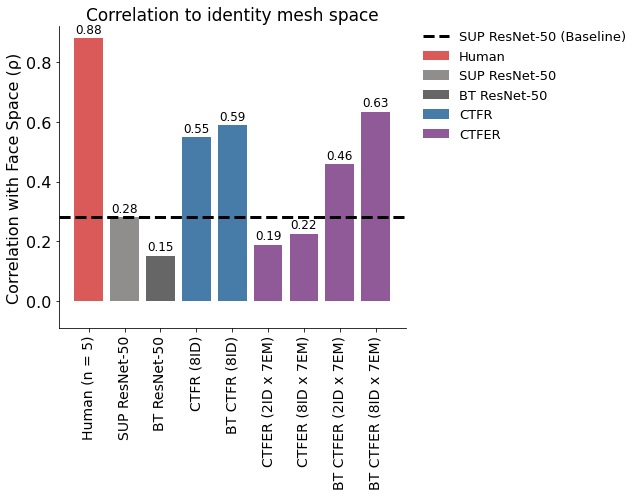

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        'Human (n = 5)',
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR (8ID)', 'BT GFR (8ID)'
        'CTFR (8ID)', 'BT CTFR (8ID)',
        'CTFER (2ID x 7EM)', 'CTFER (8ID x 7EM)', 'BT CTFER (2ID x 7EM)', 'BT CTFER (8ID x 7EM)', 
    ],
    'Correlation': [
        0.8805194805,
        0.2799610411,
        0.1507472703,
        0.5488795353, 0.5883116883,
        0.188967156, 0.2246753247, 0.4572686332,0.6337662338
    ],

    'Category': [
        'Human',
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'Human': "#EF4545",
    'SUP ResNet-50': "#908D8D",
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(9, 7))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.2799610411, linestyle='--', color='black', linewidth=3, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'],  fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']

    offset = 0.008   # lace above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)


plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Correlation with Face Space (ρ)', fontsize=16)
plt.ylim(-0.09, 0.92)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], [0.0, 0.2, 0.4, 0.6, 0.8], fontsize=16)

plt.xlabel('')
plt.title('Correlation to identity mesh space', fontsize=17)
plt.grid(False)

plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.015, 1.025),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
# plt.savefig("fig7F_identity.pdf", format="pdf", bbox_inches="tight")

plt.show()  


/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



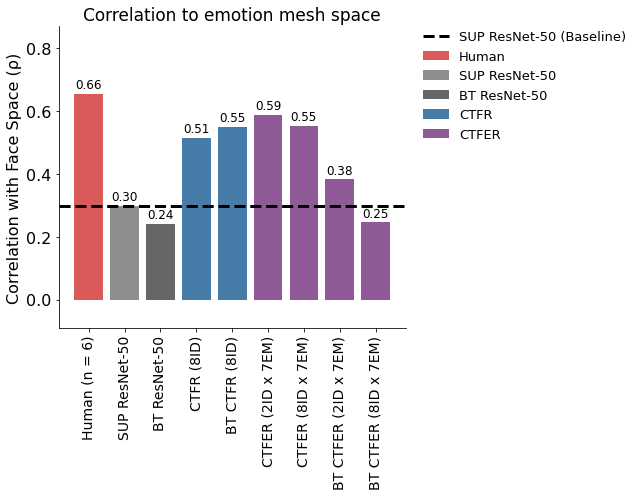

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        'Human (n = 6)',
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR (8ID)', 'BT GFR (8ID)'
        'CTFR (8ID)', 'BT CTFR (8ID)',
        'CTFER (2ID x 7EM)', 'CTFER (8ID x 7EM)', 'BT CTFER (2ID x 7EM)', 'BT CTFER (8ID x 7EM)', 
    ],
    'Correlation': [
        0.6558441558,
        0.2987012987,
        0.2415584416,
        0.5142857143, 0.5495290969,
        0.5887445887,0.5532467532,  0.3832377199, 0.2454545455
    ],

    'Category': [
        'Human',
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'Human': "#EF4545",
    'SUP ResNet-50': "#908D8D",
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(9, 7))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.2987012987, linestyle='--', color='black', linewidth=3, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'],  fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']

    offset = 0.008   # lace above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)


plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Correlation with Face Space (ρ)', fontsize=16)
plt.ylim(-0.09, 0.87)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], [0.0, 0.2, 0.4, 0.6, 0.8], fontsize=16)

plt.xlabel('')
plt.title('Correlation to emotion mesh space', fontsize=17)
plt.grid(False)

plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.015, 1.025),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
# plt.savefig("fig7F_identity.pdf", format="pdf", bbox_inches="tight")

plt.show()  


### Human -- Model behavior correlation

/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



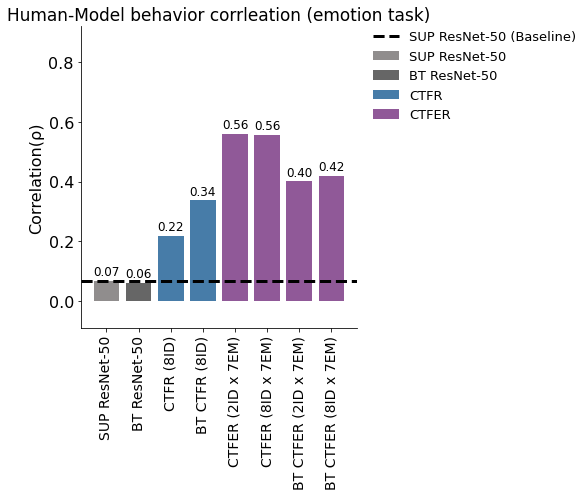

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        # 'Human (n = 6)',
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR (8ID)', 'BT GFR (8ID)'
        'CTFR (8ID)', 'BT CTFR (8ID)',
        'CTFER (2ID x 7EM)', 'CTFER (8ID x 7EM)', 'BT CTFER (2ID x 7EM)', 'BT CTFER (8ID x 7EM)', 
    ],
    'Correlation': [
        0.06753246753,
        0.06103896104,
        0.2181818182, 0.3371224601,
        0.5597402597, 0.5558441558, 0.4005383239,0.4194805195
    ],

    'Category': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'Human': "#EF4545",
    'SUP ResNet-50': "#908D8D",
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(8, 7))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.06753246753, linestyle='--', color='black', linewidth=3, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'],  fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']

    offset = 0.008   # lace above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)


plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Correlation(ρ)', fontsize=16)
plt.ylim(-0.09, 0.92)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], [0.0, 0.2, 0.4, 0.6, 0.8], fontsize=16)

plt.xlabel('')
plt.title('Human-Model behavior corrleation (emotion task)', fontsize=17)
plt.grid(False)

plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.015, 1.025),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
# plt.savefig("fig7F_identity.pdf", format="pdf", bbox_inches="tight")

plt.show()  


/share/apps/anaconda3-2019.03/envs/DLC/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



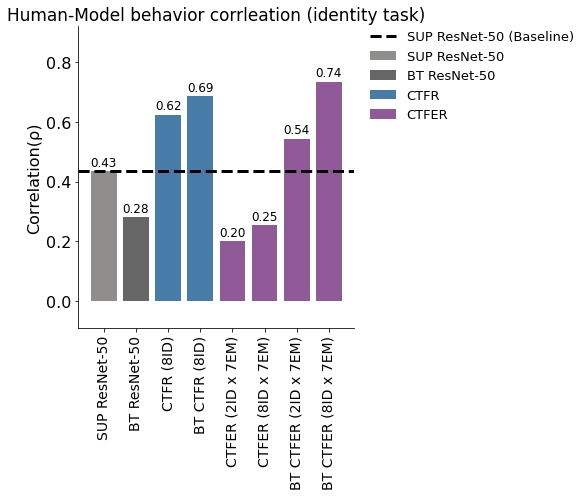

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        # 'Human (n = 6)',
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR (8ID)', 'BT GFR (8ID)'
        'CTFR (8ID)', 'BT CTFR (8ID)',
        'CTFER (2ID x 7EM)', 'CTFER (8ID x 7EM)', 'BT CTFER (2ID x 7EM)', 'BT CTFER (8ID x 7EM)', 
    ],
    'Correlation': [
        0.4345566972,
        0.2807018136,
        0.623579117, 0.6857142857,
       0.1997955728, 0.2532467532, 0.5434197587, 0.7350649351,
    ],

    'Category': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'Human': "#EF4545",
    'SUP ResNet-50': "#908D8D",
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(8, 7))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.4345566972, linestyle='--', color='black', linewidth=3, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'],  fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']

    offset = 0.008   # lace above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)


plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Correlation(ρ)', fontsize=16)
plt.ylim(-0.09, 0.92)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], [0.0, 0.2, 0.4, 0.6, 0.8], fontsize=16)

plt.xlabel('')
plt.title('Human-Model behavior corrleation (identity task)', fontsize=17)
plt.grid(False)

plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.015, 1.025),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
# plt.savefig("fig7F_identity.pdf", format="pdf", bbox_inches="tight")

plt.show()  


### fig7F

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Prepare your data
# -------------------------------

# Example input (fill in your real values)
data = {
    'Model': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR (8ID)', 'BT GFR (8ID)'
        'CTFR (8ID)', 'BT CTFR (8ID)',
        'CTFER (2ID x 7EM)', 'CTFER (8ID x 7EM)', 'BT CTFER (2ID x 7EM)', 'BT CTFER (8ID x 7EM)', 
    ],
    'Correlation': [
        0.455,
        0.365,
        0.47, 0.644, 
        0.6743333333, 0.822, 0.639, 0.648
    ],
    # Optional: If you have error bars
    # 'Error': [

    # ],
    
    # 'sem' : [val / np.sqrt(3) if val > 0 else 0 for val in [

    # ]],

    'Category': [
        'SUP ResNet-50',
        'BT ResNet-50',
        # 'GFR', 'GFR', 'GFR', 'GFR',
        'CTFR', 'CTFR',
        'CTFER', 'CTFER', 'CTFER', 'CTFER', 
    ]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. Define color palette
# -------------------------------
palette = {
    'SUP ResNet-50': "#908D8D",
    'BT ResNet-50': '#666666',
    'GFR': '#4daf4a',
    'CTFR': '#377eb8',
    'CTFER': '#984ea3',
    'BT-GFR' : '#033500',
    'BT-CTFR' : '#040273',
    'BT-CTFER' : "#5f1b6b",
}
colors = df['Category'].map(palette)


plt.figure(figsize=(8, 7))
barplot = sns.barplot(
    x='Model',
    y='Correlation',
    hue='Category',
    data=df,
    dodge=False,
    palette=palette,
    # edgecolor='black',
    ci=None
)
plt.axhline(y=0.455, linestyle='--', color='black', linewidth=3, label='SUP ResNet-50 (Baseline)')

for i, row in df.iterrows():
    plt.errorbar(i, row['Correlation'],  fmt='none', ecolor='black', capsize=3)
# Annotate each bar with its correlation value
for i, row in df.iterrows():
    y = row['Correlation']

    offset = 0.008   # Place above or below bar depending on sign
    if y > 0 : 
        plt.text(i, y + offset , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)
    else :
        plt.text(i, 0.0275 , f'{y:.2f}', ha='center', va='bottom' if y >= 0 else 'top',
             fontsize=12)


plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Correlation with Face Space (ρ)', fontsize=16)
plt.ylim(-0.09, 0.87)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], [0.0, 0.2, 0.4, 0.6, 0.8], fontsize=16)

plt.xlabel('')
plt.title('Emotion Mesh Space Distance Correlation with Model RDM', fontsize=17)
# plt.legend(bbox_to_anchor=(1.015, 1.025), loc='upper left', fontsize=12)
plt.grid(False)
# plt.tight_layout()
# plt.title("CTFER Model Performance (2 Identities per Emotion)", fontsize=16)

plt.legend(
    # handles=legend_handles,
    fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1.015, 1.025),
    frameon=False
)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.savefig("fig7F_emotion.pdf", format="pdf", bbox_inches="tight")

plt.show()  


In [ ]:
import numpy as np

def simulate_features(condition, n=10, d=50, epsilon=1e-6):
    if condition == 'max':
        base = np.ones((1, d)) + np.random.randn(1, d) * epsilon  # small dim-wise noise
        upright = np.repeat(base, n, axis=0)
        inverted = -upright
    elif condition == 'min':
        upright = np.random.randn(n, d)
        inverted = upright.copy()
    return np.vstack([upright, inverted])

def compute_rdm(features):
    norm_feats = (features - features.mean(axis=1, keepdims=True)) / (features.std(axis=1, keepdims=True) + 1e-8)
    corr = np.corrcoef(norm_feats)
    return 1 - corr

def compute_inversion_effect(rdm, n=10):
    upright_idxs = np.arange(n)
    inverted_idxs = np.arange(n, 2*n)

    D_ui = np.mean(rdm[np.ix_(upright_idxs, inverted_idxs)])
    print(D_ui)
    D_uu = np.mean(rdm[np.ix_(upright_idxs, upright_idxs)][np.triu_indices(n, k=1)])
    print(D_uu)

    D_ii = np.mean(rdm[np.ix_(inverted_idxs, inverted_idxs)][np.triu_indices(n, k=1)])
    print(D_ii)

    D_within = (D_uu + D_ii) / 2

    return D_ui - D_within

# Run test
features_max = simulate_features('max', n=10, d=50)
rdm_max = compute_rdm(features_max)
print("Max inversion effect:", compute_inversion_effect(rdm_max, n=10))

features_min = simulate_features('min', n=10, d=50)
rdm_min = compute_rdm(features_min)
print("Min inversion effect:", compute_inversion_effect(rdm_min, n=10))


In [ ]:
def compute_inversion_effect_from_rdm(rdm, upright_indices, inverted_indices):
    """
    Computes the inversion effect as the average dissimilarity between upright and inverted images.
    Returns: inversion_effect (float)
    """
    upright = rdm[np.ix_(upright_indices, upright_indices)]
    inverted = rdm[np.ix_(inverted_indices, inverted_indices)]
    cross = rdm[np.ix_(upright_indices, inverted_indices)]

    upright_mean = np.mean(upright[np.triu_indices_from(upright, k=1)])
    inverted_mean = np.mean(inverted[np.triu_indices_from(inverted, k=1)])
    cross_mean = np.mean(cross)

    # Option 1: Difference between within-upright and within-inverted vs. cross
    inversion_effect = cross_mean - 0.5 * (upright_mean + inverted_mean)
    return inversion_effect


# Radar plot

## Normal condition

In [ ]:
num_spokes = 11
task_labels = ['GFR_nt', 'GFR_gt', 'GFR_ct', 'GER_nt', 'GER_gt', 'GER_ct',
               'Basel_nt', 'Basel_gt', 'GOR', 'ImageNet-shark', 'Face photo']


# Generate angles for the spokes (evenly spaced around the circle)
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Close the shape

# Define accs (normal)
model_resnet = np.array([0.603,0.7906,0.8022,0.579,0.5791,0.6001,0.655499,0.693971,0.722007,0.891157,0.880108])
model_obj = [0.6122,0.8102,0.7698,0.5844,0.5762,0.578,0.705233,0.695341,0.856525,0.850987,0.853799]

# -------------------------- nt ----------------------------
model_2way = [0.7236,0.8379,0.7824,0.6343,0.6031,0.5846,0.7104,0.675539,0.684745,0.832024,0.89704]
model_4way = [0.7835,0.8594,0.8279,0.7374,0.6305,0.6139,0.742979,0.749096,0.712718,0.825929,0.920579]
model_6way = [0.8058,0.8563,0.8252,0.7634,0.6196,0.604,0.731991,0.737358,0.723307,0.805958,0.922415]
model_8way = [0.8327,0.846,0.8341,0.7749,0.6476,0.6576,0.712624,0.734669,0.708425,0.79923,0.923793]

model_em_2way = [0.6937,0.82,0.8097,0.6929,0.6146,0.6095,0.746986,0.751636,0.687887,0.832626,0.89943]
model_em_4way = [0.7214,0.8459,0.8388,0.7636,0.6612,0.648,0.732989,0.743152,0.691124,0.80718,0.927058]
model_em_6way = [0.7323,0.8179,0.8054,0.8056,0.6969,0.7043,0.749004,0.735325,0.699925,0.81157,0.908746]
model_em_7way = [0.7364,0.8362,0.8225,0.821,0.6984,0.6954,0.702624,0.748167,0.679854,0.813251,0.937959]

model_idem_14way = [0.7718,0.8437,0.8405,0.8541,0.7166,0.718,0.753763,0.755788,0.709902,0.818843,0.911828]
# -------------------------- gt ----------------------------
model_2way_gt = [0.6088,0.8551,0.8023,0.5974,0.5969,0.5746,0.675318,0.741109,0.682761,0.845236,0.844754]
model_4way_gt = [0.6283,0.8988,0.8634,0.6068,0.6181,0.5904,0.73945,0.764997,0.679221,0.820343,0.909109]
model_6way_gt = [0.6344,0.9164,0.8965,0.6228,0.5979,0.5964,0.678439,0.81682,0.678268,0.821306,0.912816]
model_8way_gt = [0.6423,0.9318,0.8746,0.6297,0.6052,0.598,0.700648,0.776735,0.690062,0.80881,0.87817]

model_em_2way_gt = [0.6263,0.8424,0.8509,0.6275,0.6301,0.5969,0.689231,0.776611,0.663786,0.822864,0.880342]
model_em_4way_gt = [0.6793,0.8504,0.8381,0.7026,0.6874,0.6878,0.743321,0.692629,0.681347,0.804833,0.92151]
model_em_6way_gt = [0.6805,0.8495,0.8369,0.7197,0.727,0.7297,0.686849,0.725208,0.716009,0.823831,0.911087]
model_em_7way_gt = []

model_idem_14way_gt = []
# -------------------------- ct ----------------------------
model_2way_ct = [0.6117,0.8411,0.8951,0.5978,0.5857,0.6056,0.689076,0.719657,0.694704,0.850475,0.92597]
model_4way_ct = [0.6217,0.8631,0.9226,0.6204,0.6225,0.6141,0.707396,0.729589,0.694887,0.830028,0.903845]
model_6way_ct = [0.6316,0.8782,0.9279,0.6229,0.609,0.6186,0.703488,0.732443,0.676509,0.814155,0.917007]
model_8way_ct = [0.6277,0.8878,0.9356,0.628,0.6174,0.6341,0.706373,0.738794,0.670597,0.816727,0.909871]

model_em_2way_ct = [0.6309,0.8328,0.8342,0.6293,0.623,0.6374,0.711688,0.703108,0.673247,0.829689,0.928798]
model_em_4way_ct = [0.6771,0.8323,0.8348,0.6901,0.6729,0.7167,0.671432,0.670977,0.668054,0.804845,0.912953]
model_em_6way_ct = [0.6737,0.8321,0.8262,0.7121,0.6943,0.7474,0.677081,0.673293,0.6706,0.832168,0.905225]
model_em_7way_ct = []

model_idem_14way_ct = []

# Close the shapes
model_resnet = np.append(model_resnet, model_resnet[0])  
model_obj = np.append(model_obj, model_obj[0])
model_2way = np.append(model_2way, model_2way[0])
model_4way = np.append(model_4way, model_4way[0])
model_6way = np.append(model_6way, model_6way[0])
model_8way = np.append(model_8way, model_8way[0])
model_idem_14way = np.append(model_idem_14way, model_idem_14way[0])
model_em_2way = np.append(model_em_2way, model_em_2way[0])
model_em_4way = np.append(model_em_4way, model_em_4way[0])
model_em_6way = np.append(model_em_6way, model_em_6way[0])
model_em_7way = np.append(model_em_7way, model_em_7way[0])

# Function to plot a model's performance
def plot_model(ax, values, color, label):
    ax.plot(angles, values, marker='o', linestyle='-', color=color, linewidth=2, label=label)
    ax.fill(angles, values, color=color, alpha=0.3)

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, model_resnet, 'xkcd:light grey', 'ResNet-50')  # Light gray for baseline
# plot_model(ax, model_obj, 'blue', 'GFR_nt_2way')  # Overlay model in blue
plot_model(ax, model_2way, 'xkcd:powder blue', 'GFR_nt_2way')  # Overlay model in red
plot_model(ax, model_4way, 'xkcd:sky blue', 'GFR_nt_4way')  # Overlay model in red
plot_model(ax, model_6way, 'xkcd:medium blue', 'GFR_nt_6way')  # Overlay model in red
plot_model(ax, model_8way, 'xkcd:dark blue', 'GFR_nt_8way')  # Overlay model in red

plot_model(ax, model_em_2way, 'xkcd:orange yellow', 'GER_nt_2way')  # Overlay model in red
plot_model(ax, model_em_4way, 'xkcd:light orange', 'GER_nt_4way')  # Overlay model in red
plot_model(ax, model_em_6way, 'xkcd:orange', 'GER_nt_6way')  # Overlay model in red
plot_model(ax, model_em_7way, 'xkcd:dark orange', 'GER_nt_7way')  # Overlay model in red
plot_model(ax, model_idem_14way, 'xkcd:green', 'GFER_nt_14way')  # Overlay model in red

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels, fontsize=15)
ax.xaxis.set_tick_params(pad=25)

# Set radial limits and labels
ax.set_ylim(0.5, 1)
ax.set_yticks([0.5, 0.6,0.7,0.8,0.9, 1])
ax.set_yticklabels(["0.5", "0.6","0.7", "0.8", "0.9", "1"], fontsize=12)
ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Performance Accuracy Across Models", fontsize=20, pad=20)
plt.show()


In [ ]:
# Different order

# Number of spokes (data points)
num_spokes = 11
task_labels = ['GFR_nt', 'GER_nt', 'Basel_nt', 'GOR', 'Imagenet-shark', 'Face photo',
'GER_ct', 'GFR_ct', 'Basel_gt', 'GER_gt', 'GFR_gt']


# Generate angles for the spokes (evenly spaced around the circle)
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)

# Define accuracy values (between 0 and 1) for performance representation
accuracy_values = [0.6030, 0.5790, 65.5499/100, 72.2007/100, 0.8912, 0.8801, 
0.5791, 0.7906, 69.3971/100, 0.6001, 0.8022]




# Close the polygon by repeating the first point
angles = np.append(angles, angles[0])
accuracy_values = np.append(accuracy_values, accuracy_values[0])

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot the accuracy values as a polygon
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.plot(angles, accuracy_values, marker='o', linestyle='-', color='b', linewidth=2)

# Fill the polygon with a transparent color
ax.fill(angles, accuracy_values, color='b', alpha=0.3)

# Set labels for each spoke
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels, fontsize=15)
ax.xaxis.set_tick_params(pad=25)
ax.set_ylim(0, 1)

# Set title
plt.title("Performance Accuracy Circular Plot", fontsize=20,pad=20)

# Show the plot
plt.show()


In [ ]:
model_resnet = np.array([0.603,0.7906,0.8022,0.579,0.5791,0.6001,0.655499,0.693971,0.722007,0.891157,0.880108])
model_obj =  np.array([0.6122,0.8102,0.7698,0.5844,0.5762,0.578,0.705233,0.695341,0.856525,0.850987,0.853799])

# -------------------------- nt ----------------------------
model_2way =  np.array([0.7236,0.8379,0.7824,0.6343,0.6031,0.5846,0.7104,0.675539,0.684745,0.832024,0.89704])
model_4way =  np.array([0.7835,0.8594,0.8279,0.7374,0.6305,0.6139,0.742979,0.749096,0.712718,0.825929,0.920579])
model_6way =  np.array([0.8058,0.8563,0.8252,0.7634,0.6196,0.604,0.731991,0.737358,0.723307,0.805958,0.922415])
model_8way =  np.array([0.8327,0.846,0.8341,0.7749,0.6476,0.6576,0.712624,0.734669,0.708425,0.79923,0.923793])

model_em_2way =  np.array([0.6937,0.82,0.8097,0.6929,0.6146,0.6095,0.746986,0.751636,0.687887,0.832626,0.89943])
model_em_4way =  np.array([0.7214,0.8459,0.8388,0.7636,0.6612,0.648,0.732989,0.743152,0.691124,0.80718,0.927058])
model_em_6way =  np.array([0.7323,0.8179,0.8054,0.8056,0.6969,0.7043,0.749004,0.735325,0.699925,0.81157,0.908746])
model_em_7way =  np.array([0.7364,0.8362,0.8225,0.821,0.6984,0.6954,0.702624,0.748167,0.679854,0.813251,0.937959])

model_idem_14way =  np.array([0.7718,0.8437,0.8405,0.8541,0.7166,0.718,0.753763,0.755788,0.709902,0.818843,0.911828])
# -------------------------- gt ----------------------------
model_2way_gt =  np.array([0.6088,0.8551,0.8023,0.5974,0.5969,0.5746,0.675318,0.741109,0.682761,0.845236,0.844754])
model_4way_gt =  np.array([0.6283,0.8988,0.8634,0.6068,0.6181,0.5904,0.73945,0.764997,0.679221,0.820343,0.909109])
model_6way_gt =  np.array([0.6344,0.9164,0.8965,0.6228,0.5979,0.5964,0.678439,0.81682,0.678268,0.821306,0.912816])
model_8way_gt =  np.array([0.6423,0.9318,0.8746,0.6297,0.6052,0.598,0.700648,0.776735,0.690062,0.80881,0.87817])

model_em_2way_gt =  np.array([0.6263,0.8424,0.8509,0.6275,0.6301,0.5969,0.689231,0.776611,0.663786,0.822864,0.880342])
model_em_4way_gt =  np.array([0.6793,0.8504,0.8381,0.7026,0.6874,0.6878,0.743321,0.692629,0.681347,0.804833,0.92151])
model_em_6way_gt =  np.array([0.6805,0.8495,0.8369,0.7197,0.727,0.7297,0.686849,0.725208,0.716009,0.823831,0.911087])
model_em_7way_gt =  np.array([])

model_idem_14way_gt =  np.array([])
# -------------------------- ct ----------------------------
model_2way_ct =  np.array([0.6117,0.8411,0.8951,0.5978,0.5857,0.6056,0.689076,0.719657,0.694704,0.850475,0.92597])
model_4way_ct =  np.array([0.6217,0.8631,0.9226,0.6204,0.6225,0.6141,0.707396,0.729589,0.694887,0.830028,0.903845])
model_6way_ct =  np.array([0.6316,0.8782,0.9279,0.6229,0.609,0.6186,0.703488,0.732443,0.676509,0.814155,0.917007])
model_8way_ct =  np.array([0.6277,0.8878,0.9356,0.628,0.6174,0.6341,0.706373,0.738794,0.670597,0.816727,0.909871])

model_em_2way_ct =  np.array([0.6309,0.8328,0.8342,0.6293,0.623,0.6374,0.711688,0.703108,0.673247,0.829689,0.928798])
model_em_4way_ct =  np.array([0.6771,0.8323,0.8348,0.6901,0.6729,0.7167,0.671432,0.670977,0.668054,0.804845,0.912953])
model_em_6way_ct =  np.array([0.6737,0.8321,0.8262,0.7121,0.6943,0.7474,0.677081,0.673293,0.6706,0.832168,0.905225])
model_em_7way_ct =  np.array([])

model_idem_14way_ct =  np.array([])
print(min(
    min(model_obj - model_resnet), min(model_2way - model_resnet), min(model_4way - model_resnet), 
    min(model_6way - model_resnet), min(model_8way - model_resnet), min(model_em_2way - model_resnet), 
    min(model_em_4way - model_resnet), min(model_em_6way - model_resnet), min(model_em_7way - model_resnet), 
    min(model_idem_14way - model_resnet), min(model_2way_gt - model_resnet), min(model_4way_gt - model_resnet), 
    min(model_6way_gt - model_resnet), min(model_8way_gt - model_resnet), min(model_em_2way_gt - model_resnet), 
    min(model_em_4way_gt - model_resnet), min(model_em_6way_gt - model_resnet), min(model_2way_ct - model_resnet), 
    min(model_4way_ct - model_resnet), min(model_6way_ct - model_resnet), min(model_8way_ct - model_resnet), 
    min(model_em_2way_ct - model_resnet), min(model_em_4way_ct - model_resnet), min(model_em_6way_ct - model_resnet))
)


## Normal condition - boost from resnet

In [ ]:
num_spokes = 11
task_labels = ['GFR_nt', 'GFR_gt', 'GFR_ct', 'GER_nt', 'GER_gt', 'GER_ct',
               'Basel_nt', 'Basel_gt', 'GOR', 'ImageNet-shark', 'Face photo']


# Generate angles for the spokes (evenly spaced around the circle)
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Close the shape

# Define accs (normal)
model_resnet = np.array([0.603,0.7906,0.8022,0.579,0.5791,0.6001,0.655499,0.693971,0.722007,0.891157,0.880108])
model_obj = [0.6122,0.8102,0.7698,0.5844,0.5762,0.578,0.705233,0.695341,0.856525,0.850987,0.853799]

# -------------------------- nt ----------------------------
model_2way = [0.7236,0.8379,0.7824,0.6343,0.6031,0.5846,0.7104,0.675539,0.684745,0.832024,0.89704]
model_4way = [0.7835,0.8594,0.8279,0.7374,0.6305,0.6139,0.742979,0.749096,0.712718,0.825929,0.920579]
model_6way = [0.8058,0.8563,0.8252,0.7634,0.6196,0.604,0.731991,0.737358,0.723307,0.805958,0.922415]
model_8way = [0.8327,0.846,0.8341,0.7749,0.6476,0.6576,0.712624,0.734669,0.708425,0.79923,0.923793]

model_em_2way = [0.6937,0.82,0.8097,0.6929,0.6146,0.6095,0.746986,0.751636,0.687887,0.832626,0.89943]
model_em_4way = [0.7214,0.8459,0.8388,0.7636,0.6612,0.648,0.732989,0.743152,0.691124,0.80718,0.927058]
model_em_6way = [0.7323,0.8179,0.8054,0.8056,0.6969,0.7043,0.749004,0.735325,0.699925,0.81157,0.908746]
model_em_7way = [0.7364,0.8362,0.8225,0.821,0.6984,0.6954,0.702624,0.748167,0.679854,0.813251,0.937959]

model_idem_14way = [0.7718,0.8437,0.8405,0.8541,0.7166,0.718,0.753763,0.755788,0.709902,0.818843,0.911828]
# -------------------------- gt ----------------------------
model_2way_gt = [0.6088,0.8551,0.8023,0.5974,0.5969,0.5746,0.675318,0.741109,0.682761,0.845236,0.844754]
model_4way_gt = [0.6283,0.8988,0.8634,0.6068,0.6181,0.5904,0.73945,0.764997,0.679221,0.820343,0.909109]
model_6way_gt = [0.6344,0.9164,0.8965,0.6228,0.5979,0.5964,0.678439,0.81682,0.678268,0.821306,0.912816]
model_8way_gt = [0.6423,0.9318,0.8746,0.6297,0.6052,0.598,0.700648,0.776735,0.690062,0.80881,0.87817]

model_em_2way_gt = [0.6263,0.8424,0.8509,0.6275,0.6301,0.5969,0.689231,0.776611,0.663786,0.822864,0.880342]
model_em_4way_gt = [0.6793,0.8504,0.8381,0.7026,0.6874,0.6878,0.743321,0.692629,0.681347,0.804833,0.92151]
model_em_6way_gt = [0.6805,0.8495,0.8369,0.7197,0.727,0.7297,0.686849,0.725208,0.716009,0.823831,0.911087]
model_em_7way_gt = []

model_idem_14way_gt = []
# -------------------------- ct ----------------------------
model_2way_ct = [0.6117,0.8411,0.8951,0.5978,0.5857,0.6056,0.689076,0.719657,0.694704,0.850475,0.92597]
model_4way_ct = [0.6217,0.8631,0.9226,0.6204,0.6225,0.6141,0.707396,0.729589,0.694887,0.830028,0.903845]
model_6way_ct = [0.6316,0.8782,0.9279,0.6229,0.609,0.6186,0.703488,0.732443,0.676509,0.814155,0.917007]
model_8way_ct = [0.6277,0.8878,0.9356,0.628,0.6174,0.6341,0.706373,0.738794,0.670597,0.816727,0.909871]

model_em_2way_ct = [0.6309,0.8328,0.8342,0.6293,0.623,0.6374,0.711688,0.703108,0.673247,0.829689,0.928798]
model_em_4way_ct = [0.6771,0.8323,0.8348,0.6901,0.6729,0.7167,0.671432,0.670977,0.668054,0.804845,0.912953]
model_em_6way_ct = [0.6737,0.8321,0.8262,0.7121,0.6943,0.7474,0.677081,0.673293,0.6706,0.832168,0.905225]
model_em_7way_ct = []

model_idem_14way_ct = []

# Close the shapes
model_resnet = np.append(model_resnet, model_resnet[0])  
model_obj = np.append(model_obj, model_obj[0])
model_2way = np.append(model_2way, model_2way[0])
model_4way = np.append(model_4way, model_4way[0])
model_6way = np.append(model_6way, model_6way[0])
model_8way = np.append(model_8way, model_8way[0])
model_idem_14way = np.append(model_idem_14way, model_idem_14way[0])
model_em_2way = np.append(model_em_2way, model_em_2way[0])
model_em_4way = np.append(model_em_4way, model_em_4way[0])
model_em_6way = np.append(model_em_6way, model_em_6way[0])
model_em_7way = np.append(model_em_7way, model_em_7way[0])

# Function to plot a model's performance
def plot_model(ax, values, color, label):
    ax.plot(angles, values, marker='o', linestyle='-', color=color, linewidth=2, label=label)
    ax.fill(angles, values, color=color, alpha=0.3)

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, model_resnet-model_resnet, 'xkcd:light grey', 'ResNet-50')  # Light gray for baseline
# plot_model(ax, model_obj-model_resnet, 'xkcd:light yellow', 'GOR_2way')  # Overlay model in blue
# plot_model(ax, model_2way-model_resnet, 'xkcd:powder blue', 'GFR_nt_2way')  # Overlay model in red
# plot_model(ax, model_4way-model_resnet, 'xkcd:sky blue', 'GFR_nt_4way')  # Overlay model in red
# plot_model(ax, model_6way-model_resnet, 'xkcd:medium blue', 'GFR_nt_6way')  # Overlay model in red
plot_model(ax, model_8way-model_resnet, 'xkcd:dark blue', 'GFR_nt_8way')  # Overlay model in red

# plot_model(ax, model_em_2way-model_resnet, 'xkcd:orange yellow', 'GER_nt_2way')  # Overlay model in red
# plot_model(ax, model_em_4way-model_resnet, 'xkcd:light orange', 'GER_nt_4way')  # Overlay model in red
# plot_model(ax, model_em_6way-model_resnet, 'xkcd:orange', 'GER_nt_6way')  # Overlay model in red
plot_model(ax, model_em_7way-model_resnet, 'xkcd:dark orange', 'GER_nt_7way')  # Overlay model in red
plot_model(ax, model_idem_14way-model_resnet, 'xkcd:green', 'GFER_nt_14way')  # Overlay model in red

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels, fontsize=15)
ax.xaxis.set_tick_params(pad=25)

# Set radial limits and labels
ax.set_ylim(-0.10, 0.3) #min = -0.09193 max = 0.2751
# ax.set_yticks([0.5, 0.6,0.7,0.8,0.9, 1])
# ax.set_yticklabels(["0.5", "0.6","0.7", "0.8", "0.9", "1"], fontsize=12)
ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Performance Accuracy Across Models (boost from ResNet-50)", fontsize=20, pad=20)
plt.show()


## OOD 

## OOD - boost from resnet

In [ ]:
num_spokes = 11
task_labels = ['GFR_nt', 'GFR_gt', 'GFR_ct', 'GER_nt', 'GER_gt', 'GER_ct',
               'Basel_nt', 'Basel_gt', 'GOR', 'ImageNet-shark', 'Face photo']


# Generate angles for the spokes (evenly spaced around the circle)
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Close the shape

# Define accs (normal)
model_resnet_ood = np.array([0.603,0.7906,0.8022,0.579,0.5791,0.6001,0.655499,0.693971,0.722007,0.891157,0.880108])
model_obj_ood = [0.6122,0.8102,0.7698,0.5844,0.5762,0.578,0.705233,0.695341,0.856525,0.850987,0.853799]

# -------------------------- nt ----------------------------
model_2way_ood = [0.7022898,0.8503,0.7917,0.6343,0.6031,0.5846,0.7104,0.675539,0.684745,0.832024,0.89704]
model_4way_ood = [0.74198096,0.8682,0.8331,0.7374,0.6305,0.6139,0.742979,0.749096,0.712718,0.825929,0.920579]
model_6way_ood = [0.7692912,0.8483,0.8236,0.7634,0.6196,0.604,0.731991,0.737358,0.723307,0.805958,0.922415]
model_8way_ood = [0.79532667,0.8531,0.8496,0.7749,0.6476,0.6576,0.712624,0.734669,0.708425,0.79923,0.923793]

model_em_2way_ood = [0.69014085,0.8261,0.8188,0.6929,0.6146,0.6095,0.746986,0.751636,0.687887,0.832626,0.89943]
model_em_4way_ood = [0.71334624,0.8492,0.8459,0.7636,0.6612,0.648,0.732989,0.743152,0.691124,0.80718,0.927058]
model_em_6way_ood = [0.72127855,0.8235,0.8137,0.8056,0.6969,0.7043,0.749004,0.735325,0.699925,0.81157,0.908746]
model_em_7way_ood = [0.72592011,0.8433,0.8301,0.821,0.6984,0.6954,0.702624,0.748167,0.679854,0.813251,0.937959]

model_idem_14way_ood = [0.75714573,0.8496,0.852,0.8541,0.7166,0.718,0.753763,0.755788,0.709902,0.818843,0.911828]
# -------------------------- gt ----------------------------
model_2way_gt_ood = [0.60088956,0.8566,0.8064,0.5974,0.5969,0.5746,0.675318,0.741109,0.682761,0.845236,0.844754]
model_4way_gt_ood = [0.63818482,0.8901,0.8601,0.6068,0.6181,0.5904,0.73945,0.764997,0.679221,0.820343,0.909109]
model_6way_gt_ood = [0.63153893,0.8644,0.8519,0.6228,0.5979,0.5964,0.678439,0.81682,0.678268,0.821306,0.912816]
model_8way_gt_ood = [0.66597733,0.8941,0.8556,0.6297,0.6052,0.598,0.700648,0.776735,0.690062,0.80881,0.87817]

model_em_2way_gt_ood = [0.61946687,0.8514,0.8594,0.6275,0.6301,0.5969,0.689231,0.776611,0.663786,0.822864,0.880342]
model_em_4way_gt_ood = [0.66925867,0.8539,0.8413,0.7026,0.6874,0.6878,0.743321,0.692629,0.681347,0.804833,0.92151]
model_em_6way_gt_ood = [0.67103202,0.8506,0.8389,0.7197,0.727,0.7297,0.686849,0.725208,0.716009,0.823831,0.911087]
model_em_7way_gt_ood = []

model_idem_14way_gt_ood = []
# -------------------------- ct ----------------------------
model_2way_ct_ood = [0.60104478,0.8435,0.8972,0.5978,0.5857,0.6056,0.689076,0.719657,0.694704,0.850475,0.92597]
model_4way_ct_ood = [0.62611389,0.8703,0.9218,0.6204,0.6225,0.6141,0.707396,0.729589,0.694887,0.830028,0.903845]
model_6way_ct_ood = [0.61928053,0.8128,0.8996,0.6229,0.609,0.6186,0.703488,0.732443,0.676509,0.814155,0.917007]
model_8way_ct_ood = [0.6381415,0.8588,0.9175,0.628,0.6174,0.6341,0.706373,0.738794,0.670597,0.816727,0.909871]

model_em_2way_ct_ood = [0.62827362,0.8397,0.8374,0.6293,0.623,0.6374,0.711688,0.703108,0.673247,0.829689,0.928798]
model_em_4way_ct_ood = [0.66962129,0.84,0.8381,0.6901,0.6729,0.7167,0.671432,0.670977,0.668054,0.804845,0.912953]
model_em_6way_ct_ood = [0.66466956,0.8345,0.8257,0.7121,0.6943,0.7474,0.677081,0.673293,0.6706,0.832168,0.905225]
model_em_7way_ct_ood = []

model_idem_14way_ct_ood = []

# Close the shapes
model_resnet_ood = np.append(model_resnet_ood, model_resnet_ood[0])  
model_obj_ood = np.append(model_obj_ood, model_obj_ood[0])
model_2way_ood = np.append(model_2way_ood, model_2way_ood[0])
model_4way_ood = np.append(model_4way_ood, model_4way_ood[0])
model_6way_ood = np.append(model_6way_ood, model_6way_ood[0])
model_8way_ood = np.append(model_8way_ood, model_8way_ood[0])
model_idem_14way_ood = np.append(model_idem_14way_ood, model_idem_14way_ood[0])
model_em_2way_ood = np.append(model_em_2way_ood, model_em_2way_ood[0])
model_em_4way_ood = np.append(model_em_4way_ood, model_em_4way_ood[0])
model_em_6way_ood = np.append(model_em_6way_ood, model_em_6way_ood[0])
model_em_7way_ood = np.append(model_em_7way_ood, model_em_7way_ood[0])

# Function to plot a model's performance
def plot_model(ax, values, color, label):
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)
    ax.fill(angles, values, color=color, alpha=0.3)

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, model_resnet_ood-model_resnet_ood, 'xkcd:light grey', 'ResNet-50')  # Light gray for baseline
plot_model(ax, model_obj_ood-model_resnet_ood, 'xkcd:light yellow', 'GOR_2way')  # Overlay model in blue
plot_model(ax, model_2way_ood-model_resnet_ood, 'xkcd:powder blue', 'GFR_nt_2way')  # Overlay model in red
plot_model(ax, model_4way_ood-model_resnet_ood, 'xkcd:sky blue', 'GFR_nt_4way')  # Overlay model in red
plot_model(ax, model_6way_ood-model_resnet_ood, 'xkcd:medium blue', 'GFR_nt_6way')  # Overlay model in red
plot_model(ax, model_8way_ood-model_resnet_ood, 'xkcd:dark blue', 'GFR_nt_8way')  # Overlay model in red

plot_model(ax, model_em_2way_ood-model_resnet_ood, 'xkcd:orange yellow', 'GER_nt_2way')  # Overlay model in red
plot_model(ax, model_em_4way_ood-model_resnet_ood, 'xkcd:light orange', 'GER_nt_4way')  # Overlay model in red
plot_model(ax, model_em_6way_ood-model_resnet_ood, 'xkcd:orange', 'GER_nt_6way')  # Overlay model in red
plot_model(ax, model_em_7way_ood-model_resnet_ood, 'xkcd:dark orange', 'GER_nt_7way')  # Overlay model in red
plot_model(ax, model_idem_14way_ood-model_resnet_ood, 'xkcd:green', 'GFER_nt_14way')  # Overlay model in red

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels, fontsize=15)
ax.xaxis.set_tick_params(pad=25)

# Set radial limits and labels
ax.set_ylim(-0.10, 0.3) #min = -0.09193 max = 0.2751
# ax.set_yticks([0.5, 0.6,0.7,0.8,0.9, 1])
# ax.set_yticklabels(["0.5", "0.6","0.7", "0.8", "0.9", "1"], fontsize=12)
ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Performance OOD Accuracy Across Models (boost from ResNet-50)", fontsize=20, pad=20)
plt.show()


## Normal+OOD Combination

In [ ]:
len(model_resnet_combined  )

## Normal+OOD Combination - boost from resnet

In [ ]:
model_resnet_all_ood = np.array([0.603,0.603,0.7906,0.7906,0.8022,0.8022,0.579,0.5791,0.6001,0.655499,0.693971,0.722007,0.891157,0.880108])
model_obj_all_ood =  np.array([0.6122,0.6122,0.8102,0.8102,0.7698,0.7698,0.5844,0.5762,0.578,0.705233,0.695341,0.856525,0.850987,0.853799])

# -------------------------- nt ----------------------------
model_2way_all_ood =  np.array([0.7236,0.7022898,0.8379,0.8503,0.7824,0.7917,0.6343,0.6031,0.5846,0.7104,0.675539,0.684745,0.832024,0.89704])
model_4way_all_ood = np.array([0.7835,0.74198096,0.8594,0.8682,0.8279,0.8331,0.7374,0.6305,0.6139,0.742979,0.749096,0.712718,0.825929,0.920579])
model_6way_all_ood =  np.array([0.8058,0.7692912,0.8563,0.8483,0.8252,0.8236,0.7634,0.6196,0.604,0.731991,0.737358,0.723307,0.805958,0.922415])
model_8way_all_ood = np.array([0.8327,0.79532667,0.846,0.8531,0.8341,0.8496,0.7749,0.6476,0.6576,0.712624,0.734669,0.708425,0.79923,0.923793])

model_em_2way_all_ood =  np.array([0.6937,0.69014085,0.82,0.8261,0.8097,0.8188,0.6929,0.6146,0.6095,0.746986,0.751636,0.687887,0.832626,0.89943])
model_em_4way_all_ood = np.array([0.7214,0.71334624,0.8459,0.8492,0.8388,0.8459,0.7636,0.6612,0.648,0.732989,0.743152,0.691124,0.80718,0.927058])
model_em_6way_all_ood = np.array([0.7323,0.72127855,0.8179,0.8235,0.8054,0.8137,0.8056,0.6969,0.7043,0.749004,0.735325,0.699925,0.81157,0.908746])
model_em_7way_all_ood =  np.array([0.7364,0.72592011,0.8362,0.8433,0.8225,0.8301,0.821,0.6984,0.6954,0.702624,0.748167,0.679854,0.813251,0.937959])

model_idem_8way_all_ood = np.array([0.751,0.73855611,0.8356,0.8423,0.8228,0.829,0.7887,0.6865,0.6833,0.738762,0.75445,0.662633,0.820748,0.93866])

model_idem_14way_all_ood = np.array([0.7718,0.75714573,0.8437,0.8496,0.8405,0.852,0.8541,0.7166,0.718,0.753763,0.755788,0.709902,0.818843,0.911828])
model_idem_28way_all_ood = np.array([0.81403723,0.80195293,0.8365,0.8371,0.8302,0.8388,0.8565,0.6971,0.6915,0.730342,0.681366,0.675486,0.817836,0.918431])

# -------------------------- gt ----------------------------
model_2way_gt_all_ood =  np.array([0.6088,0.60088956,0.8551,0.8566,0.8023,0.8064,0.5974,0.5969,0.5746,0.675318,0.741109,0.682761,0.845236,0.844754])
model_4way_gt_all_ood =  np.array([0.6283,0.63818482,0.8988,0.8901,0.8634,0.8601,0.6068,0.6181,0.5904,0.73945,0.764997,0.679221,0.820343,0.909109])
model_6way_gt_all_ood = np.array([0.6344,0.63153893,0.9164,0.8644,0.8965,0.8519,0.6228,0.5979,0.5964,0.678439,0.81682,0.678268,0.821306,0.912816])
model_8way_gt_all_ood = np.array([0.6423,0.66597733,0.9318,0.8941,0.8746,0.8556,0.6297,0.6052,0.598,0.700648,0.776735,0.690062,0.80881,0.87817])

model_em_2way_gt_all_ood =  np.array([0.6263,0.61946687,0.8424,0.8514,0.8509,0.8594,0.6275,0.6301,0.5969,0.689231,0.776611,0.663786,0.822864,0.880342])
model_em_4way_gt_all_ood =  np.array([0.6793,0.66925867,0.8504,0.8539,0.8381,0.8413,0.7026,0.6874,0.6878,0.743321,0.692629,0.681347,0.804833,0.92151])
model_em_6way_gt_all_ood =  np.array([0.6805,0.67103202,0.8495,0.8506,0.8369,0.8389,0.7197,0.727,0.7297,0.686849,0.725208,0.716009,0.823831,0.911087])
model_em_7way_gt_all_ood =  np.array([])

model_idem_8way_gt_all_ood = np.array([0.6742,0.66983069,0.8437,0.853,0.8833,0.8829,0.7127,0.7324,0.7,0.700568,0.697207,0.663204,0.795941,0.924681])
model_idem_14way_gt_all_ood =  np.array([0.68123359,0.67150438,0.8683,0.8677,0.8438,0.8468,0.758,0.7282,0.744,0.709096,0.7249,0.668679,0.795165,0.91047])
model_idem_28way_gt_all_ood = np.array([0.68450448,0.68097907,0.8735,0.8751,0.9112,0.9078,0.7521,0.7669,0.8046,0.696284,0.751383,0.685391,0.801882,0.927502])

# -------------------------- ct ----------------------------

model_2way_ct_all_ood = np.array([0.6117,0.60104478,0.8411,0.8435,0.8951,0.8972,0.5978,0.5857,0.6056,0.689076,0.719657,0.694704,0.850475,0.92597])
model_4way_ct_all_ood = np.array([0.6217,0.62611389,0.8631,0.8703,0.9226,0.9218,0.6204,0.6225,0.6141,0.707396,0.729589,0.694887,0.830028,0.903845])
model_6way_ct_all_ood = np.array([0.6316,0.61928053,0.8782,0.8128,0.9279,0.8996,0.6229,0.609,0.6186,0.703488,0.732443,0.676509,0.814155,0.917007])
model_8way_ct_all_ood = np.array([0.6277,0.6381415,0.8878,0.8588,0.9356,0.9175,0.628,0.6174,0.6341,0.706373,0.738794,0.670597,0.816727,0.909871])

model_em_2way_ct_all_ood = np.array([0.6309,0.62827362,0.8328,0.8397,0.8342,0.8374,0.6293,0.623,0.6374,0.711688,0.703108,0.673247,0.829689,0.928798])
model_em_4way_ct_all_ood = np.array([0.6771,0.66962129,0.8323,0.84,0.8348,0.8381,0.6901,0.6729,0.7167,0.671432,0.670977,0.668054,0.804845,0.912953])
model_em_6way_ct_all_ood = np.array([0.6737,0.66466956,0.8321,0.8345,0.8262,0.8257,0.7121,0.6943,0.7474,0.677081,0.673293,0.6706,0.832168,0.905225])
model_em_7way_ct_all_ood = np.array([])
model_idem_8way_ct_all_ood = np.array([0.69108953,0.68406922,0.872,0.8758,0.8437,0.8534,0.7412,0.7076,0.7209,0.704767,0.718778,0.693118,0.795086,0.911807])
model_idem_14way_ct_all_ood = np.array([0.67784809,0.67336376,0.8314,0.8352,0.8764,0.87,0.7317,0.7689,0.7343,0.68555,0.719043,0.677617,0.795267,0.90896])
model_idem_28way_ct_all_ood = np.array([0.68954606,0.68673118,0.8943,0.8946,0.8821,0.8841,0.7763,0.7645,0.7548,0.720985,0.748443,0.674346,0.807034,0.91241])


model_ceiling_all_ood = np.array([0.8327,0.80195293,0.9318,0.8941,0.9356,0.9218,0.8565,0.7689,0.8046,0.753763,0.776735,0.856525,0.891157,0.948196])
model_perfect_all_ood = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])


# ---------------------------barlowtwins--------------------------
bt_model_all_ood = np.array([0.654138,0.654138,0.8867,0.8867,0.9009,0.9009,0.6308,0.6159, 0.6241,0.8228,0.844621,0.819881,0.882262,0.97748])
bt_model_ceiling_all_ood = np.array([0.861847,0.848744,0.9513,0.954,0.9532,0.9475,0.877,0.8096,0.8354,0.87458,0.867165,0.856525,0.891157,0.982643])

bt_model_id_2way_all_ood = np.array([0.766564,0.743565,0.9093,0.9155,0.7886,0.7998,0.6928,0.6369,0.5502,0.802926,0.822121,0.789861,0.844569,0.830756])
bt_model_id_8way_all_ood = np.array([0.861847,0.848744,0.9176,0.927,0.7708,0.7697,0.8178,0.6999,0.5887,0.812183,0.867165,0.761321,0.845132,0.802416])
bt_model_id_8way_ct_all_ood = np.array([0.668497,0.684735,0.924,0.9097,0.9532,0.9475,0.6448,0.6152,0.6351,0.87458,0.827914,0.809677,0.844882,0.982643])

bt_model_idem_14way_all_ood = np.array([0.835298,0.824258,0.91,0.9133,0.7567,0.774,0.8684,0.7356,0.6086,0.852236,0.82182,0.785747,0.843352,0.765109])
bt_model_idem_28way_all_ood = np.array([0.854558,0.846755,0.9177,0.9241,0.8061,0.8004,0.877,0.7476,0.6311,0.826862,0.833619,0.75635,0.844721,0.75991])
bt_model_idem_14way_ct_all_ood = np.array([0.739151,0.730869,0.9157,0.9211,0.9359,0.9358,0.7701,0.744,0.7972,0.82359,0.816174,0.736596,0.835301,0.980265])
bt_model_idem_14way_gt_all_ood = np.array([0.769195,0.76056,0.9416,0.942,0.8417,0.8594,0.8004,0.771,0.6613,0.796738,0.813527,0.759632,0.850969,0.787873])
bt_model_idem_28way_ct_all_ood = np.array([0.754722,0.755154,0.9418,0.9504,0.9331,0.9422,0.7655,0.7882,0.8354,0.828894,0.85891,0.75153,0.831602,0.974317])
bt_model_idem_28way_gt_all_ood = np.array([0.770214,0.774958,0.9513,0.954,0.8096,0.8174,0.8005,0.8096,0.6366,0.824789,0.84534,0.781212,0.832862,0.805207])

# --------------------------20250401----------------------------
# (1) vanilla resnet-50 --> model_resnet_all_ood
# (2) vanilla barlowtwins --> bt_model_all_ood
# (3) vggface --> 
vgg_face_all_ood = np.array([0.4929266,0.4929266,0.5492,0.5492,0.5446,0.5446,0.4837,0.4661,0.462,0.477665,0.494147,0.479932,0.677364,0.9998])
# (4) 1000 ID texture Basel trained --> 
basel_texture_1k_all_ood = np.array([0.661523,0.657085,0.5329,0.5345,0.53,0.5313,0.6669,0.4978,0.4895,0.767557,0.747721,0.54905,0.520799,0.571851])
# (5) 10-identity gray trained apple --> 
model_10way_all_ood = np.array([0.829,0.738531,0.8336,0.7889,0.8177,0.7988,0.7823,0.648,0.6438,0.713537,0.710838,0.683432,0.817677,0.9337])
# (6) 7-emotion gray trained apple --> model_em_7way_all_ood
# (7) 4 id x 7 emotion gray trained apple --> model_idem_28way_all_ood
# (8) 10-identity color-texture trained apple --> 
model_10way_ct_all_ood = np.array([0.6278,0.620096,0.8913,0.8102,0.9399,0.917,0.6181,0.5969,0.6192,0.69167,0.751286,0.683598,0.818129,0.923239])
# (9) 7-emotion color-texture trained apple --> 
model_em_7way_ct_all_ood = np.array([0.67390897,0.66516195,0.8381,0.8404,0.8564,0.8579,0.7179,0.7158,0.7626,0.701562,0.695618,0.655361,0.82096,0.928464])
# (10) 4 id x 7 emotion color-texture trained apple --> model_idem_28way_ct_all_ood

In [ ]:
# model_resnet_id_ood = np.array([//,0.579,0.5791,0.6001,0.655499,0.693971,0.722007,0.891157,0.880108])
# model_obj_id_ood =  np.array([// 0.5844,0.5762,0.578,0.705233,0.695341,0.856525,0.850987,0.853799])

# -------------------------- nt ----------------------------
model_2way_id_ood =  np.array([0.76939067,0.7022898,0.8113,0.8503,0.7624,0.7917,0.6343,0.6031,0.5846,0.7104,0.675539,0.684745,0.832024,0.89704])
model_4way_id_ood = np.array([0.81408253,0.74198096,0.8529,0.8682,0.8241,0.8331,0.7374,0.6305,0.6139,0.742979,0.749096,0.712718,0.825929,0.920579])
model_6way_id_ood =  np.array([0.81659067,0.7692912,0.8586,0.8483,0.8257,0.8236,0.7634,0.6196,0.604,0.731991,0.737358,0.723307,0.805958,0.922415])
model_8way_id_ood = np.array([0.83638712,0.79532667,0.8453,0.8531,0.8325,0.8496,0.7749,0.6476,0.6576,0.712624,0.734669,0.708425,0.79923,0.923793])

model_em_2way_id_ood =  np.array([0.71150845,0.69014085,0.7897,0.8261,0.7641,0.8188,0.6929,0.6146,0.6095,0.746986,0.751636,0.687887,0.832626,0.89943])
model_em_4way_id_ood = np.array([0.76146945,0.71334624,0.8292,0.8492,0.8029,0.8459,0.7636,0.6612,0.648,0.732989,0.743152,0.691124,0.80718,0.927058])
model_em_6way_id_ood = np.array([0.78718573,0.72127855,0.7894,0.8235,0.7638,0.8137,0.8056,0.6969,0.7043,0.749004,0.735325,0.699925,0.81157,0.908746])
model_em_7way_id_ood =  np.array([0.78856664,0.72592011,0.8009,0.8433,0.7847,0.8301,0.821,0.6984,0.6954,0.702624,0.748167,0.679854,0.813251,0.937959])

model_idem_14way_id_ood = np.array([0.7718,0.75714573,0.8437,0.8496,0.8405,0.852,0.8541,0.7166,0.718,0.753763,0.755788,0.709902,0.818843,0.911828])
# -------------------------- gt ----------------------------
model_2way_gt_id_ood =  np.array([0.62585105,0.60088956,0.8517,0.8566,0.7933,0.8064,0.6068,0.6181,0.5904,0.73945,0.764997,0.679221,0.820343,0.909109])
model_4way_gt_id_ood = np.array([0.62104021,0.63818482,0.9052,0.8901,0.8659,0.8601,0.6228,0.5979,0.5964,0.678439,0.81682,0.678268,0.821306,0.912816])
model_6way_gt_id_ood = np.array([0.63520596,0.63153893,0.9316,0.8644,0.9096,0.8519,0.6297,0.6052,0.598,0.700648,0.776735,0.690062,0.80881,0.87817])
model_8way_gt_id_ood = np.array([0.6399503,0.66597733,0.9355,0.8941,0.8765,0.8556,0.6297,0.6052,0.598,0.700648,0.776735,0.690062,0.80881,0.87817])

model_em_2way_gt_id_ood =  np.array([0.66056109,0.61946687,0.7972,0.8514,0.8086,0.8594,0.6275,0.6301,0.5969,0.689231,0.776611,0.663786,0.822864,0.880342])
model_em_4way_gt_id_ood =  np.array([0.72932818,0.66925867,0.8327,0.8539,0.8222,0.8413,0.7026,0.6874,0.6878,0.743321,0.692629,0.681347,0.804833,0.92151])
model_em_6way_gt_id_ood =  np.array([0.72761809,0.67103202,0.8436,0.8506,0.8268,0.8389,0.7197,0.727,0.7297,0.686849,0.725208,0.716009,0.823831,0.911087])
model_em_7way_gt_id_ood =  np.array([])

model_idem_14way_gt_id_ood =  np.array([])
# -------------------------- ct ----------------------------

model_2way_ct_id_ood = np.array([0.63452162,0.60104478,0.8359,0.8435,0.8906,0.8972,0.5978,0.5857,0.6056,0.689076,0.719657,0.694704,0.850475,0.92597])
model_4way_ct_id_ood = np.array([0.61843066,0.62611389,0.8578,0.8703,0.9231,0.9218,0.6204,0.6225,0.6141,0.707396,0.729589,0.694887,0.830028,0.903845])
model_6way_ct_id_ood = np.array([0.63527253,0.61928053,0.8975,0.8128,0.9363,0.8996,0.6229,0.609,0.6186,0.703488,0.732443,0.676509,0.814155,0.917007])
model_8way_ct_id_ood = np.array([0.62670562,0.6381415,0.8907,0.8588,0.9374,0.9175,0.628,0.6174,0.6341,0.706373,0.738794,0.670597,0.816727,0.909871])

model_em_2way_ct_id_ood = np.array([0.64399436,0.62827362,0.7985,0.8397,0.8185,0.8374,0.6293,0.623,0.6374,0.711688,0.703108,0.673247,0.829689,0.928798])
model_em_4way_ct_id_ood = np.array([0.71459118,0.66962129,0.7941,0.84,0.8184,0.8381,0.6901,0.6729,0.7167,0.671432,0.670977,0.668054,0.804845,0.912953])
model_em_6way_ct_id_ood = np.array([0.71888745,0.66466956,0.8202,0.8345,0.8291,0.8257,0.7121,0.6943,0.7474,0.677081,0.673293,0.6706,0.832168,0.905225])
model_em_7way_ct_id_ood = np.array([])
model_idem_14way_ct_id_ood = np.array([])



In [ ]:
# --------------------------20250401----------------------------
# (1) vanilla resnet-50 --> model_resnet_all_ood
# (2) vanilla barlowtwins --> bt_model_all_ood
# (3) vggface --> vgg_face_all_ood 
# (4) 1000 ID texture Basel trained --> basel_texture_1k_all_ood 
# (5) 10-identity gray trained apple --> model_10way_all_ood 
# (6) 7-emotion gray trained apple --> model_em_7way_all_ood
# (7) 4 id x 7 emotion gray trained apple --> model_idem_28way_all_ood
# (8) 10-identity color-texture trained apple --> model_8way_ct_all_ood 
# (9) 7-emotion color-texture trained apple --> model_em_7way_ct_all_ood 
# (10) 4 id x 7 emotion color-texture trained apple --> model_idem_28way_ct_all_ood

task_labels_all_ood = [
    'GFR (all)', 'GFR (ood)', 'GTFR (all)', 'GTFR (ood)', 'GCTFR (all)', 'GCTFR (ood)',
    'GER', 'GTER', 'GCTER', 
    'Basel GFR', 'Basel GTFR',  'GOR',
    'ImageNet\nshark', 'LFW'
]
task_labels_id_ood = [
    'GFR_nt (id)', 'GFR_nt (ood)', 'GFR_gt (id)', 'GFR_gt (ood)', 'GFR_ct (id)', 'GFR_ct (ood)',
    'GER_nt', 'GER_gt', 'GER_ct', 
    'Basel_nt', 'Basel_gt',  'GOR',
    'ImageNet\nshark', 'Face photo'
]


num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True):
    values = np.append(values, values[0])  # Closing the shape
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)
    if fill:
       ax.fill(angles, values, color=color, alpha=0.1)

# Create a polar plot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
# --------------------------20250401----------------------------
# (1) vanilla resnet-50 --> model_resnet_all_ood
# plot_model(ax, model_resnet_all_ood, 'xkcd:grey', 'vanilla ResNet-50')

# # (2) vanilla barlowtwins --> bt_model_all_ood
# plot_model(ax, bt_model_all_ood, 'xkcd:dark grey', 'vanilla BarlowTwins')

# # (3) vggface --> vgg_face_all_ood 
# plot_model(ax, vgg_face_all_ood, 'xkcd:purple', 'VGG-Face')

# # (4) 1000 ID texture Basel trained --> basel_texture_1k_all_ood 
# plot_model(ax, basel_texture_1k_all_ood, 'xkcd:green', 'Basel texture 1KID')

# # (5) 10-identity gray trained apple --> model_10way_all_ood 
# plot_model(ax, model_10way_all_ood, 'xkcd:blue', 'GFR_10ID')

# # (6) 7-emotion gray trained apple --> model_em_7way_all_ood
# plot_model(ax, model_em_7way_all_ood, 'xkcd:dark orange', 'GER_7EM')

# # (7) 4 id x 7 emotion gray trained apple --> model_idem_28way_all_ood
# plot_model(ax, model_idem_28way_all_ood, 'xkcd:forest green', 'GFER_28IDEM')

# # (8) 10-identity color-texture trained apple --> model_10way_ct_all_ood 
# plot_model(ax, model_10way_ct_all_ood, 'xkcd:lightish blue', 'GTCFR_10ID')

# # (9) 7-emotion color-texture trained apple --> model_em_7way_ct_all_ood 
# plot_model(ax, model_em_7way_ct_all_ood, 'xkcd:orange', 'GTCER_7EM')

# # (10) 4 id x 7 emotion color-texture trained apple --> model_idem_28way_ct_all_ood
plot_model(ax, model_idem_14way_ct_all_ood, blue_shades[1], 'SUP-GTCFER_14IDEM')
plot_model(ax, model_idem_28way_ct_all_ood, blue_shades[2], 'SUP-GTCFER_28IDEM')

# (11) 
# plot_model(ax, bt_model_idem_28way_ct_all_ood, 'xkcd:red', 'BT-pretrained GTCFER_28IDEM')


# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=15, rotation=45)
ax.xaxis.set_tick_params(pad=30)

# Set radial limits and labels
ax.set_ylim(0.45, 1.02)  # Adjust range as needed
ax.set_rlabel_position(0)
ax.tick_params(axis='y', labelsize=12)  # or whatever font size you want

from matplotlib.lines import Line2D

legend_elements = [
    # Line2D([0], [0], color='xkcd:grey', label='ResNet-50'),
    # Line2D([0], [0], color='xkcd:dark grey', label='BT-pretrained ResNet-50'),
    # Line2D([0], [0], color='xkcd:purple', label='VGG-Face'),
    # Line2D([0], [0], color='xkcd:green', label='Basel texture 1KID'),
    # Line2D([0], [0], color='xkcd:blue', label='GFR_10ID'),
    # Line2D([0], [0], color='xkcd:dark orange', label='GER_7EM'),
    # Line2D([0], [0], color='xkcd:forest green', label='GFER_28IDEM'),
    # Line2D([0], [0], color='xkcd:lightish blue', label='GTCFR_10ID'),
    Line2D([0], [0], color=blue_shades[1], label='GTCFER_14IDEM'),
    Line2D([0], [0], color=blue_shades[2], label='GTCFER_28IDEM'),
    #  Line2D([0], [0], color='xkcd:red', label='BT-pretrained GTCFER_28IDEM'),
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.25, 1.17), fontsize=13)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.title("Generalization Across Recognition Tasks", fontsize=25, pad=35)

# plt.savefig("plot_11_BarlowTwins_GTCFER_28IDEM.pdf", format='pdf', bbox_inches='tight')

# plt.close()




In [ ]:
# All and OOD
# --------------------------20250401----------------------------
# (1) vanilla resnet-50 --> model_resnet_all_ood
# (2) vanilla barlowtwins --> bt_model_all_ood
# (3) vggface --> vgg_face_all_ood 
# (4) 1000 ID texture Basel trained --> basel_texture_1k_all_ood 
# (5) 10-identity gray trained apple --> model_10way_all_ood 
# (6) 7-emotion gray trained apple --> model_em_7way_all_ood
# (7) 4 id x 7 emotion gray trained apple --> model_idem_28way_all_ood
# (8) 10-identity color-texture trained apple --> model_8way_ct_all_ood 
# (9) 7-emotion color-texture trained apple --> model_em_7way_ct_all_ood 
# (10) 4 id x 7 emotion color-texture trained apple --> model_idem_28way_ct_all_ood

task_labels_all_ood = [
    'GFR (all)', 'GFR (ood)', 'GTFR (all)', 'GTFR (ood)', 'GCTFR (all)', 'GCTFR (ood)',
    'GER', 'GTER', 'GCTER', 
    'Basel GFR', 'Basel GTFR',  'GOR',
    'ImageNet\nshark', 'LFW'
]
task_labels_id_ood = [
    'GFR_nt (id)', 'GFR_nt (ood)', 'GFR_gt (id)', 'GFR_gt (ood)', 'GFR_ct (id)', 'GFR_ct (ood)',
    'GER_nt', 'GER_gt', 'GER_ct', 
    'Basel_nt', 'Basel_gt',  'GOR',
    'ImageNet\nshark', 'Face photo'
]


num_spokes = len(task_labels_all_ood) - 2  # skipping 2 tasks
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True):
    values = np.delete(values, [11, 12])
    values = np.append(values, values[0])  # close the loop
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)
    if fill:
       ax.fill(angles, values, color=color, alpha=0.2)

# Create a polar plot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
# --------------------------20250401----------------------------
# (1) vanilla resnet-50 --> model_resnet_all_ood
# plot_model(ax, model_resnet_all_ood, 'xkcd:grey', 'vanilla ResNet-50')

# # (2) vanilla barlowtwins --> bt_model_all_ood
# plot_model(ax, bt_model_all_ood, 'xkcd:dark grey', 'vanilla BarlowTwins')

# # (3) vggface --> vgg_face_all_ood 
# plot_model(ax, vgg_face_all_ood, 'xkcd:purple', 'VGG-Face')

# # (4) 1000 ID texture Basel trained --> basel_texture_1k_all_ood 
# plot_model(ax, basel_texture_1k_all_ood, 'xkcd:green', 'Basel texture 1KID')

# # (5) 10-identity gray trained apple --> model_10way_all_ood 
# plot_model(ax, model_10way_all_ood, 'xkcd:blue', 'GFR_10ID')

# # (6) 7-emotion gray trained apple --> model_em_7way_all_ood
# plot_model(ax, model_em_7way_all_ood, 'xkcd:dark orange', 'GER_7EM')

# # (7) 4 id x 7 emotion gray trained apple --> model_idem_28way_all_ood
# plot_model(ax, model_idem_28way_all_ood, 'xkcd:forest green', 'GFER_28IDEM')

# # (8) 10-identity color-texture trained apple --> model_10way_ct_all_ood 
# plot_model(ax, model_10way_ct_all_ood, 'xkcd:lightish blue', 'GTCFR_10ID')

# # (9) 7-emotion color-texture trained apple --> model_em_7way_ct_all_ood 
# plot_model(ax, model_em_7way_ct_all_ood, 'xkcd:orange', 'GTCER_7EM')

# # (10) 4 id x 7 emotion color-texture trained apple --> model_idem_28way_ct_all_ood
# plot_model(ax, model_idem_28way_ct_all_ood, 'xkcd:green', 'GTCFER_28IDEM')

# 11
plot_model(ax, bt_model_idem_28way_ct_all_ood, 'xkcd:red', 'BT-pretrained GTCFER_28IDEM')



# Set labels
filtered_labels = task_labels_all_ood[:11] + task_labels_all_ood[13:]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(filtered_labels, fontsize=15, rotation=45)
ax.xaxis.set_tick_params(pad=30)

# Set radial limits and labels
ax.set_ylim(0.45, 1.02)  # Adjust range as needed
ax.set_rlabel_position(0)
ax.tick_params(axis='y', labelsize=12)  # or whatever font size you want

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color='xkcd:grey', label='ResNet-50'),
    Line2D([0], [0], color='xkcd:dark grey', label='BT-pretrained ResNet-50'),
    Line2D([0], [0], color='xkcd:purple', label='VGG-Face'),
    Line2D([0], [0], color='xkcd:green', label='Basel texture 1KID'),
    Line2D([0], [0], color='xkcd:blue', label='GFR_10ID'),
    Line2D([0], [0], color='xkcd:dark orange', label='GER_7EM'),
    Line2D([0], [0], color='xkcd:forest green', label='GFER_28IDEM'),
    Line2D([0], [0], color='xkcd:lightish blue', label='GTCFR_10ID'),
    Line2D([0], [0], color='xkcd:orange', label='GTCER_7EM'),
    Line2D([0], [0], color='xkcd:green', label='GTCFER_28IDEM'),
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.13, 1.17), fontsize=13)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.title("Generalization Across Face Recognition Tasks", fontsize=25, pad=35)
# plt.show()

plt.savefig("plot_11_face_BarlowTwins_GTCFER_28IDEM.pdf", format='pdf', bbox_inches='tight')

plt.close()


In [ ]:
len(angles)

In [ ]:
# All and OOD

task_labels_all_ood = [
    'GFR (all)', 'GFR (ood)', 'GTFR (all)', 'GTFR (ood)', 'GCTFR (all)', 'GCTFR (ood)',
    'GER', 'GTER', 'GCTER', 
    'Basel GFR', 'Basel GTFR',  'GOR',
    'ImageNet\nshark', 'LFW'
]
task_labels_id_ood = [
    'GFR_nt (id)', 'GFR_nt (ood)', 'GFR_gt (id)', 'GFR_gt (ood)', 'GFR_ct (id)', 'GFR_ct (ood)',
    'GER_nt', 'GER_gt', 'GER_ct', 
    'Basel_nt', 'Basel_gt',  'GOR',
    'ImageNet\nshark', 'Face photo'
]


num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True):
    values = np.append(values, values[0])  # Closing the shape
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)
    if fill:
       ax.fill(angles, values, color=color, alpha=0.3)

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, bt_model_all_ood, 'xkcd:yellow', 'BT-pretrained ResNet-50')

plot_model(ax, model_resnet_all_ood, 'xkcd:light grey', 'ResNet-50')

# plot_model(ax, model_obj_all_ood - model_resnet_all_ood, 'xkcd:light yellow', 'GOR_2way')

# plot_model(ax, model_2way_all_ood - model_resnet_all_ood, 'xkcd:powder blue', 'GFR_2way')
# plot_model(ax, model_4way_all_ood - model_resnet_all_ood, 'xkcd:sky blue', 'GFR_4way')
# plot_model(ax, model_6way_all_ood - model_resnet_all_ood, 'xkcd:medium blue', 'GFR_6way')
# plot_model(ax, model_8way_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way')
# plot_model(ax, model_8way_gt_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way (gt)')
# plot_model(ax, model_8way_ct_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way (ct)')

# plot_model(ax, model_em_2way_ct_all_ood - model_resnet_all_ood, 'xkcd:orange yellow', 'GER_2way')
# plot_model(ax, model_em_4way_ct_all_ood - model_resnet_all_ood, 'xkcd:light orange', 'GER_4way')
# plot_model(ax, model_em_6way_ct_all_ood - model_resnet_all_ood, 'xkcd:orange', 'GER_6way')
# plot_model(ax, model_em_7way_all_ood - model_resnet_all_ood, 'xkcd:dark orange', 'GER_7way')
# plot_model(ax, model_idem_8way_all_ood - model_resnet_all_ood, 'xkcd:greyish green', 'GFER_8way')

# plot_model(ax, model_idem_14way_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way')
# plot_model(ax, bt_model_idem_14way_all_ood, 'xkcd:green', 'BT-pretrained GFER_14way')

# plot_model(ax, model_idem_14way_gt_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way (gt)')
# plot_model(ax, model_idem_14way_ct_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way (ct)')
# plot_model(ax, model_idem_8way_gt_all_ood - model_resnet_all_ood, 'xkcd:puke green', 'GFER_14way (gt)')
# plot_model(ax, model_idem_8way_ct_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_8way (ct)')

# plot_model(ax, model_idem_28way_all_ood - model_resnet_all_ood, 'xkcd:purple', 'GFER_28way')
# plot_model(ax, bt_model_idem_28way_all_ood, 'xkcd:light pink', 'BT-pretrained GFER_28way')
# plot_model(ax, bt_model_idem_14way_ct_all_ood, 'xkcd:purple', 'BT-pretrained GFER_14way (ct)')
# plot_model(ax, bt_model_id_8way_ct_all_ood, 'xkcd:blue', 'BT-pretrained GFR_8way (ct)')
# plot_model(ax, bt_model_idem_28way_ct_all_ood, 'xkcd:purple', 'BT-pretrained GFER_28way (ct)')
plot_model(ax, bt_model_id_8way_all_ood, 'xkcd:blue', 'BT-pretrained GFR_8way')
plot_model(ax, bt_model_idem_28way_all_ood, 'xkcd:purple', 'BT-pretrained GFER_28way')

# plot_model(ax, model_idem_28way_gt_all_ood - model_resnet_all_ood, 'xkcd:purple', 'GFER_28way (gt)')
# plot_model(ax, model_idem_28way_ct_all_ood - model_resnet_all_ood, 'xkcd:purple', 'GFER_28way (ct)')


# arr = model_ceiling_all_ood - model_resnet_all_ood
# arr = np.append(arr, arr[0])
# ax.plot(angles, arr, linestyle='--', color='xkcd:red', linewidth=2, label='ceiling')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=15, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
ax.set_ylim(0.5, 1.0)  # Adjust range as needed
ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=13)
plt.title("Performance Accuracy Across Models", fontsize=25, pad=20)

plt.show()




In [ ]:
# All and OOD

task_labels_all_ood = [
    'GFR (all)', 'GFR (ood)', 'GTFR (all)', 'GTFR (ood)', 'GCTFR (all)', 'GCTFR (ood)',
    'GER', 'GTER', 'GCTER', 
    'Basel GFR', 'Basel GTFR',  'GOR',
    'ImageNet\nshark', 'LFW'
]
task_labels_id_ood = [
    'GFR_nt (id)', 'GFR_nt (ood)', 'GFR_gt (id)', 'GFR_gt (ood)', 'GFR_ct (id)', 'GFR_ct (ood)',
    'GER_nt', 'GER_gt', 'GER_ct', 
    'Basel_nt', 'Basel_gt',  'GOR',
    'ImageNet-shark', 'Face photo'
]


num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True):
    values = np.append(values, values[0])  # Closing the shape
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)
    if fill:
       ax.fill(angles, values, color=color, alpha=0.3)

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, model_resnet_all_ood - model_resnet_all_ood, 'xkcd:light grey', 'ResNet-50')
# plot_model(ax, model_obj_all_ood - model_resnet_all_ood, 'xkcd:light yellow', 'GOR_2way')

# plot_model(ax, model_2way_all_ood - model_resnet_all_ood, 'xkcd:powder blue', 'GFR_2way')
# plot_model(ax, model_4way_all_ood - model_resnet_all_ood, 'xkcd:sky blue', 'GFR_4way')
# plot_model(ax, model_6way_all_ood - model_resnet_all_ood, 'xkcd:medium blue', 'GFR_6way')
plot_model(ax, model_8way_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way')
# plot_model(ax, model_8way_gt_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way (gt)')
# plot_model(ax, model_8way_ct_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way (ct)')

# plot_model(ax, model_em_2way_ct_all_ood - model_resnet_all_ood, 'xkcd:orange yellow', 'GER_2way')
# plot_model(ax, model_em_4way_ct_all_ood - model_resnet_all_ood, 'xkcd:light orange', 'GER_4way')
# plot_model(ax, model_em_6way_ct_all_ood - model_resnet_all_ood, 'xkcd:orange', 'GER_6way')
# plot_model(ax, model_em_7way_all_ood - model_resnet_all_ood, 'xkcd:dark orange', 'GER_7way')
# plot_model(ax, model_idem_8way_all_ood - model_resnet_all_ood, 'xkcd:greyish green', 'GFER_8way')

plot_model(ax, model_idem_14way_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way')
# plot_model(ax, model_idem_14way_gt_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way (gt)')
# plot_model(ax, model_idem_14way_ct_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way (ct)')
# plot_model(ax, model_idem_8way_gt_all_ood - model_resnet_all_ood, 'xkcd:puke green', 'GFER_14way (gt)')
# plot_model(ax, model_idem_8way_ct_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_8way (ct)')

plot_model(ax, model_idem_28way_all_ood - model_resnet_all_ood, 'xkcd:purple', 'GFER_28way')
# plot_model(ax, model_idem_28way_gt_all_ood - model_resnet_all_ood, 'xkcd:purple', 'GFER_28way (gt)')
# plot_model(ax, model_idem_28way_ct_all_ood - model_resnet_all_ood, 'xkcd:purple', 'GFER_28way (ct)')


arr = model_ceiling_all_ood - model_resnet_all_ood
arr = np.append(arr, arr[0])
ax.plot(angles, arr, linestyle='--', color='xkcd:red', linewidth=2, label='ceiling')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=15, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
ax.set_ylim(-0.10, 0.3)  # Adjust range as needed
ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=13)
plt.title("Performance Accuracy Across Models (Boost from ResNet-50)", fontsize=25, pad=20)

plt.show()




In [ ]:
# All and OOD

task_labels_all_ood = [
    'GFR (all)', 'GFR (ood)', 'GTFR (all)', 'GTFR (ood)', 'GCTFR (all)', 'GCTFR (ood)',
    'GER', 'GTER', 'GCTER', 
    'Basel GFR', 'Basel GTFR',  'GOR',
    'ImageNet\nshark', 'LFW'
]
task_labels_id_ood = [
    'GFR_nt (id)', 'GFR_nt (ood)', 'GFR_gt (id)', 'GFR_gt (ood)', 'GFR_ct (id)', 'GFR_ct (ood)',
    'GER_nt', 'GER_gt', 'GER_ct', 
    'Basel_nt', 'Basel_gt',  'GOR',
    'ImageNet-shark', 'Face photo'
]


num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True):
    values = np.append(values, values[0])  # Closing the shape
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)
    if fill:
       ax.fill(angles, values, color=color, alpha=0.3)

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, bt_model_all_ood - bt_model_all_ood, 'xkcd:light grey', 'BT-pretrained ResNet-50')
# plot_model(ax, model_obj_all_ood - model_resnet_all_ood, 'xkcd:light yellow', 'GOR_2way')

# plot_model(ax, model_2way_all_ood - model_resnet_all_ood, 'xkcd:powder blue', 'GFR_2way')
# plot_model(ax, model_4way_all_ood - model_resnet_all_ood, 'xkcd:sky blue', 'GFR_4way')
# plot_model(ax, model_6way_all_ood - model_resnet_all_ood, 'xkcd:medium blue', 'GFR_6way')
# plot_model(ax, bt_model_id_2way_all_ood - bt_model_all_ood, 'xkcd:sky blue', 'GFR_2way')
# plot_model(ax, bt_model_id_8way_all_ood - bt_model_all_ood, 'xkcd:blue', 'BT-pretrained GFR_8way')

# plot_model(ax, model_8way_gt_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way (gt)')
# plot_model(ax, model_8way_ct_all_ood - model_resnet_all_ood, 'xkcd:blue', 'GFR_8way (ct)')

# plot_model(ax, model_em_2way_ct_all_ood - model_resnet_all_ood, 'xkcd:orange yellow', 'GER_2way')
# plot_model(ax, model_em_4way_ct_all_ood - model_resnet_all_ood, 'xkcd:light orange', 'GER_4way')
# plot_model(ax, model_em_6way_ct_all_ood - model_resnet_all_ood, 'xkcd:orange', 'GER_6way')
# plot_model(ax, model_em_7way_all_ood - model_resnet_all_ood, 'xkcd:dark orange', 'GER_7way')
# plot_model(ax, model_idem_8way_all_ood - model_resnet_all_ood, 'xkcd:greyish green', 'GFER_8way')
# plot_model(ax, bt_model_id_2way_ct_all_ood - bt_model_all_ood, 'xkcd:red', 'BT-pretrained GFR_2way (ct)')

plot_model(ax, bt_model_id_8way_ct_all_ood - bt_model_all_ood, 'xkcd:blue', 'BT-pretrained GFR_8way (ct)')

# plot_model(ax, bt_model_idem_14way_all_ood - bt_model_all_ood, 'xkcd:green', 'BT-pretrained GFER_14way')
# plot_model(ax, bt_model_idem_14way_ct_all_ood - bt_model_all_ood, 'xkcd:green', 'BT-pretrained GFER_14way (ct)')
# plot_model(ax, bt_model_idem_14way_gt_all_ood - bt_model_all_ood, 'xkcd:green', 'BT-pretrained GFER_14way (gt)')

# plot_model(ax, model_idem_14way_gt_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way (gt)')
# plot_model(ax, model_idem_14way_ct_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_14way (ct)')
# plot_model(ax, model_idem_8way_gt_all_ood - model_resnet_all_ood, 'xkcd:puke green', 'GFER_14way (gt)')
# plot_model(ax, model_idem_8way_ct_all_ood - model_resnet_all_ood, 'xkcd:green', 'GFER_8way (ct)')

# plot_model(ax, bt_model_idem_28way_all_ood - bt_model_all_ood, 'xkcd:purple', 'BT-pretrained GFER_28way')
plot_model(ax, bt_model_idem_28way_ct_all_ood - bt_model_all_ood, 'xkcd:purple', 'BT-pretrained GFER_28way (ct)')
# plot_model(ax, bt_model_idem_28way_gt_all_ood - bt_model_all_ood, 'xkcd:purple', 'BT-pretrained GFER_28way (gt)')

# plot_model(ax, bt_model_idem_28way_gt_all_ood - bt_model_all_ood, 'xkcd:purple', 'GFER_28way (gt)')
# plot_model(ax, bt_model_idem_28way_ct_all_ood - bt_model_all_ood, 'xkcd:purple', 'GFER_28way (ct)')


arr = bt_model_ceiling_all_ood - bt_model_all_ood
arr = np.append(arr, arr[0])
ax.plot(angles, arr, linestyle='--', color='xkcd:red', linewidth=2, label='ceiling')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=15, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=13)
plt.title("Performance Accuracy (Boost from BT-pretrained ResNet-50)", fontsize=25, pad=20)

plt.show()




# Updated 4/28

In [ ]:
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.655499,0.8022,0.8022,0.6001,0.740898,0.880108,0.722007,0.785284,0.891157])
model_alexnet_all_ood =  np.array([0.5293947,0.5293947,0.5263,0.574068,0.6975,0.6975,0.5442,0.641432,0.882683,0.645278,0.777109,0.786687])
model_vgg16_all_ood =  np.array([0.553812,0.553812,0.5464,0.577736,0.681,0.681,0.5385,0.655636,0.787381,0.696154,0.735763,0.855691])
model_vggface_all_ood =  np.array([0.4929266,0.4929266,0.4837,0.477665,0.5446,0.5446,0.462,0.512711,0.9998,0.479932,0.480546,0.67736])
model_facenet_all_ood =  np.array([0.52215,0.52215,0.4658,0.526264,0.6071,0.6071,0.463,0.525299,0.999071,0.532356,0.465239,0.672969])
model_obj_all_ood =  np.array([0.6122,0.6122,0.5844,0.705233,0.7698,0.7698,0.578,0.657985,0.853799,0.856525,0.84427,0.850987])

# -------------------------- nt ----------------------------
model_2way_all_ood =  np.array([0.70868314,0.6850123333,0.6617666667,0.7021016667,0.802,0.8066333333,0.5888,0.6921376667,0.9041973333,0.6821466667,0.767698,0.8338186667])
model_4way_all_ood = np.array([0.79622083,0.76711268,0.726,0.721803,0.8299,0.8446,0.6163,0.697254,0.916326,0.71107,0.770983,0.810807])
model_6way_all_ood =  np.array([0.81717555,0.79446267,0.7703,0.724236,0.8471,0.8619,0.632,0.748237,0.949142,0.698276,0.764239,0.809437])
model_8way_all_ood = np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923])
model_10way_all_ood = np.array([0.829,0.738531,0.7823,0.7180584662,0.8177,0.7988,0.6438,0.7766926103,0.9337,0.683432,0.740161,0.817677])

model_em_2way_all_ood =  np.array([0.6937,0.69014085,0.6929,0.746986,0.8097,0.8188,0.6095,0.674133,0.89943,0.687887,0.75987,0.832626])
model_em_4way_all_ood = np.array([0.7214,0.71334624,0.7636,0.732989,0.8388,0.8459,0.648,0.691318,0.927058,0.691124,0.771328,0.80718])
model_em_6way_all_ood = np.array([0.7323,0.72127855,0.8056,0.749004,0.8054,0.8137,0.7043,0.732792,0.908746,0.699925,0.784904,0.81157])
model_em_7way_all_ood =  np.array([0.7364,0.72592011,0.821,0.702624,0.8225,0.8301,0.6954,0.749931,0.937959,0.679854,0.793617,0.813251])

model_idem_4way_all_ood = np.array([])
model_idem_6way_all_ood = np.array([])
model_idem_8way_all_ood = np.array([0.751,0.73855611,0.7887,0.738762,0.8228,0.829,0.6833,0.693497,0.93866,0.662633,0.755232,0.820748])
model_idem_10way_all_ood = np.array([])
model_idem_12way_all_ood = np.array([])
model_idem_14way_all_ood = np.array([0.7718,0.75714573,0.8541,0.753763,0.8405,0.852,0.718,0.735308,0.911828,0.709902,0.737426,0.818843])
model_idem_28way_ct_all_ood = np.array([])
model_idem_56way_ct_all_ood = np.array([])

# -------------------------- ct ----------------------------

model_2way_ct_all_ood = np.array([0.6021956433,0.60076217,0.5961,0.689513,0.8913666667,0.8849666667,0.5962333333,0.782489,0.908644,0.702778,0.781091,0.855153])
model_4way_ct_all_ood = np.array([0.60732139,0.60036782,0.611,0.710072,0.9234,0.9202,0.6093,0.845123,0.902819,0.704916,0.797654,0.825305])
model_6way_ct_all_ood = np.array([0.61841932,0.61227533,0.6248,0.702947,0.9323,0.9213,0.6087,0.845307,0.925522,0.685503,0.771836,0.83257])
model_8way_ct_all_ood = np.array([0.6277,0.6381415,0.628,0.706373,0.9356,0.9175,0.6341,0.853494,0.909871,0.670597,0.77266,0.816727])
model_10way_ct_all_ood = np.array([0.6278,0.620096,0.6181,0.69167,0.9399,0.917,0.6192,0.853793,0.923239,0.683598,0.77107,0.818129])
model_12way_ct_all_ood = np.array([0.6278,0.620096,0.6181,0.69167,0.9399,0.917,0.6192,0.853793,0.923239,0.683598,0.77107,0.818129])

model_em_2way_ct_all_ood = np.array([0.6309,0.62827362,0.6293,0.711688,0.8342,0.8374,0.6374,0.813699,0.928798,0.673247,0.745423,0.829689])
model_em_4way_ct_all_ood = np.array([0.6771,0.66962129,0.6901,0.671432,0.8348,0.8381,0.7167,0.750102,0.912953,0.668054,0.745326,0.804845])
model_em_6way_ct_all_ood = np.array([0.6737,0.66466956,0.7121,0.677081,0.8262,0.8257,0.7474,0.731822,0.905225,0.6706,0.787022,0.832168])
model_em_7way_ct_all_ood = np.array([0.66903877,0.66652005,0.7232,0.69494825,0.8463,0.8442,0.7613,0.75115975,0.9367935,0.681019,0.796074,0.8208975])

model_idem_4way_ct_all_ood = np.array([0.6359106,0.6322091,0.6468,0.6939236667,0.8993,0.8938,0.684,0.8149816667,0.931601,0.6868486667,0.7843933333,0.8332383333])
model_idem_6way_ct_all_ood = np.array([0.65569137,0.6523248,0.6738,0.6865656667,0.8884,0.8824,0.6984,0.7735926667,0.9330933333,0.6684886667,0.7812206667,0.8284776667])
model_idem_8way_ct_all_ood = np.array([0.67113104,0.66519233,0.7124,0.694163,0.8863,0.8812,0.7466,0.7445553333,0.9276493333,0.6751166667,0.780655,0.8177326667])
model_idem_10way_ct_all_ood = np.array([0.69129712,0.68578479,0.7313,0.68421,0.8906,0.8853,0.768,0.7773376667,0.944668,0.6750536667,0.782811,0.8146823333])
model_idem_12way_ct_all_ood = np.array([0.68156704,0.67869851,0.7414,0.701978,0.8833,0.8782,0.7842,0.7694986667,0.9256296667,0.6842466667,0.7808533333,0.8146823333])
model_idem_14way_ct_all_ood = np.array([0.682842,0.6782412,0.7399,0.683389,0.8815,0.8747,0.7839,0.7687416667,0.928993,0.6659396667,0.7883953333,0.8079553333])
model_idem_28way_ct_all_ood = np.array([0.68353658,0.67973625,0.7528,0.696284,0.9111,0.9083,0.8046,0.787235,0.929376,0.685391,0.791927,0.801882])
model_idem_42way_ct_all_ood = np.array([0.6393,0.6393,0.6163,0.711477,0.9468,0.9468,0.6153,0.85395,0.915399,0.66201,0.763704,0.790314])
model_idem_56way_ct_all_ood = np.array([0.68106371,0.701777,0.7514,0.719012,0.9293,0.9032,0.7957,0.82278,0.911633,0.641129,0.742649,0.813111])

model_ceiling_all_ood = np.array([])

# ---------------------------barlowtwins--------------------------
bt_model_all_ood = np.array([0.654138,0.654138,0.6308,0.8228,0.9009,0.9009,0.6241,0.837272,0.97748,0.819881,0.906059,0.882262])
bt_model_ceiling_all_ood = np.array([])
bt_model_id_2way_all_ood = np.array([0.766564,0.743565,0.6928,0.802926,0.7886,0.7998,0.5502,0.58309,0.830756,0.789861,0.8315,0.844569])
bt_model_id_8way_all_ood = np.array([0.861847,0.848744,0.8178,0.812183,0.7708,0.7697,0.5887,0.545368,0.802416,0.761321,0.795201,0.845132])
bt_model_id_8way_ct_all_ood = np.array([0.668497,0.684735,0.6448,0.87458,0.9532,0.9475,0.6351,0.840183,0.982643,0.809677,0.830155,0.844882])

bt_model_idem_14way_all_ood = np.array([0.835298,0.824258,0.8684,0.852236,0.7567,0.774,0.6086,0.543486,0.765109,0.785747,0.841841,0.843352])
bt_model_idem_28way_all_ood = np.array([0.854558,0.846755,0.877,0.826862,0.8061,0.8004,0.6311,0.584112,0.75991,0.75635,0.773693,0.844721])
bt_model_idem_14way_ct_all_ood = np.array([0.739151,0.730869,0.7701,0.82359,0.9359,0.9358,0.7972,0.827465,0.980265,0.736596,0.868596,0.835301])
bt_model_idem_14way_ct_avg_all_ood = np.array([0.741979,0.737453,0.767700,0.820665,0.937467,0.935800,0.797767,0.809099,0.979735,0.749617,0.853711,0.843834])
bt_model_idem_28way_ct_all_ood = np.array([0.754722,0.755154,0.7662,0.828894,0.9578,0.9579,0.8354,0.823228,0.974317,0.75153,0.852779,0.831602])
bt_model_idem_42way_ct_all_ood = np.array([])
bt_model_idem_56way_ct_all_ood = np.array([0.741935,0.774967,0.7597,0.819115,0.9576,0.9484,0.8307,0.86186,0.964539,0.690359,0.814753,0.826361])
# ---------------------------Basel--------------------------
basel_model_ct_2id_all_ood = np.array([0.604444,0.604444,0.5847,0.651789,0.8519,0.8519,0.5916,0.805441,0.939524,0.711336,0.776095,0.863643])
basel_model_ct_10id_all_ood = np.array([0.612235,0.612235,0.601,0.712123,0.9098,0.9098,0.589,0.865731,0.934819,0.703199,0.757614,0.83285])
basel_model_ct_100id_all_ood = np.array([0.617419,0.617419,0.5952,0.685443,0.9077,0.9077,0.605,0.846021,0.920998,0.595234,0.75316,0.787785])
basel_model_ct_1kid_all_ood = np.array([0.502119,0.502119,0.5058,0.5076,0.8279,0.8279,0.5829,0.818493,0.712735,0.554227,0.627941,0.658816])

basel_model_2id_all_ood = np.array([0.609766,0.609766,0.6011,0.72867,0.7741,0.7741,0.5527,0.690113,0.9085,0.690573,0.792378,0.837393])
basel_model_4id_all_ood = np.array([0.652553,0.652553,0.6258,0.775803,0.7875,0.7875,0.5662,0.724099,0.960602,0.707236,0.769107,0.810958])
basel_model_6id_all_ood = np.array([0.649512,0.649512,0.6672,0.795656,0.81,0.81,0.6046,0.786677,0.95178,0.702937,0.785443,0.811347])
basel_model_8id_all_ood = np.array([0.674622,0.674622,0.692,0.844829,0.8208,0.8208,0.6108,0.784518,0.972493,0.718821,0.74975,0.800014])
basel_model_10id_all_ood = np.array([0.692806,0.692806,0.689,0.826096,0.8357,0.8357,0.6109,0.790085,0.965232,0.733369,0.77218,0.799982])
basel_model_12id_all_ood = np.array([0.661733,0.661733,0.6541,0.854511,0.8178,0.8178,0.5743,0.77554,0.973779,0.699507,0.760789,0.785776])
basel_model_20id_all_ood = np.array([0.700742,0.700742,0.6716,0.868776,0.8499,0.8499,0.6196,0.80129,0.959443,0.707403,0.788429,0.790982])
basel_model_100id_all_ood = np.array([0.697184,0.697184,0.7296,0.890575,0.8321,0.8321,0.6203,0.762641,0.921386,0.697366,0.753382,0.760242])
basel_model_500id_all_ood = np.array([0.692308,0.692308,0.6996,0.801515,0.6124,0.6124,0.5511,0.803804,0.803329,0.608566,0.530103,0.720059])
basel_model_1kid_all_ood = np.array([0.657903,0.657903,0.6765,0.79658,0.5475,0.5475,0.5121,0.731846,0.659521,0.557382,0.517807,0.7038])
basel_model_1kid_smaller_all_ood = np.array([0.682495,0.682495,0.6483549524,0.739036,0.8178,0.8178,0.6224,0.663848,0.857347,0.865202,0.871154,0.826375])

In [ ]:
import numpy as np

def compute_ood_iid_acc(pairs, acc_values, ood_set):
    """
    Computes OOD and IID accuracy based on a given OOD set.
    
    Parameters:
    - pairs (list of str): List of 66 name pairs (e.g., ["Elias_Neptune", "Elias_SeojinE", ...])
    - acc_values (list of float): List of 66 accuracy values.
    - ood_set (set of str): Set of OOD IDs (e.g., {"Elias", "Neptune"} for 2-ID OOD).
    
    Returns:
    - overall_acc (float): Mean accuracy across all pairs.
    - overall_std (float): Standard deviation across all pairs.
    - ood_acc (float): Mean accuracy of OOD pairs (pairs **NOT** containing OOD IDs).
    - ood_std (float): Standard deviation of OOD pairs.
    - iid_acc (float): Mean accuracy of IID pairs (pairs **CONTAINING** at least one OOD ID).
    - iid_std (float): Standard deviation of IID pairs.
    """
    ood_indices = []  # Pairs that DO NOT contain any OOD IDs
    iid_indices = []  # Pairs that CONTAIN at least one OOD ID

    for i, pair in enumerate(pairs):
        name1, name2 = pair.split("_")
        # If neither name1 nor name2 is in OOD set, classify as OOD
        if name1 not in ood_set and name2 not in ood_set:
            ood_indices.append(i)
        else:
            iid_indices.append(i)

    # Compute mean accuracies
    overall_acc = np.mean(acc_values)
    overall_std = np.std(acc_values)

    ood_acc = np.mean([acc_values[i] for i in ood_indices]) if ood_indices else None
    ood_std = np.std([acc_values[i] for i in ood_indices]) if ood_indices else None

    iid_acc = np.mean([acc_values[i] for i in iid_indices]) if iid_indices else None
    iid_std = np.std([acc_values[i] for i in iid_indices]) if iid_indices else None
    print([acc_values[i] for i in ood_indices])
    return overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, len(ood_indices), len(iid_indices)

# Example usage
pairs = [
    "Elias_Neptune", "Elias_Seojin", "Elias_Sophie", "Elias_Dan", "Elias_Sreyas", "Elias_Younah",
    "Neptune_Seojin", "Neptune_Sophie", "Neptune_Dan", "Neptune_Sreyas", "Neptune_Younah",
    "Seojin_Sophie", "Seojin_Dan", "Seojin_Sreyas", "Seojin_Younah", "Sophie_Dan",
    "Sophie_Sreyas", "Sophie_Younah", "Dan_Sreyas", "Dan_Younah", "Sreyas_Younah",
    "Elias_Ashley", "Elias_Kedar", "Elias_Josh", "Elias_Ani", "Elias_Tony",
    "Neptune_Ashley", "Neptune_Kedar", "Neptune_Josh", "Neptune_Ani", "Neptune_Tony",
    "Seojin_Ashley", "Seojin_Kedar", "Seojin_Josh", "Seojin_Ani", "Seojin_Tony",
    "Sophie_Ashley", "Sophie_Kedar", "Sophie_Josh", "Sophie_Ani", "Sophie_Tony",
    "Dan_Ashley", "Dan_Kedar", "Dan_Josh", "Dan_Ani", "Dan_Tony",
    "Sreyas_Ashley", "Sreyas_Kedar", "Sreyas_Josh", "Sreyas_Ani", "Sreyas_Tony",
    "Younah_Ashley", "Younah_Kedar", "Younah_Josh", "Younah_Ani", "Younah_Tony",
    "Ashley_Kedar", "Ashley_Josh", "Ashley_Ani", "Ashley_Tony",
    "Kedar_Josh", "Kedar_Ani", "Kedar_Tony", "Josh_Ani", "Josh_Tony", "Ani_Tony"
]
# Simulated accuracy values (replace with actual data)

acc_values = [
0.620096,	0.697888,	0.598734,	0.572756,	0.541833,	0.751743,	0.751532,	0.664168,	0.669676,	0.626781,	0.773997,	0.630306,	0.688007,	0.679034,	0.558046,	0.691197,	0.636136,	0.636240,	0.508790,	0.727453,	0.719832,	0.598417,	0.540535,	0.650905,	0.594503,	0.635344,	0.648720,	0.664843,	0.731678,	0.677280,	0.704869,	0.608183,	0.667658,	0.561624,	0.702969,	0.627928,	0.531530,	0.617475,	0.617994,	0.629889,	0.574100,	0.632183,	0.591422,	0.653122,	0.597709,	0.659729,	0.568029,	0.558341,	0.627028,	0.558592,	0.616195,	0.605289,	0.698706,	0.541105,	0.696259,	0.585568,	0.568551,	0.588307,	0.541324,	0.582927,	0.622596,	0.607105,	0.623846,	0.612374,	0.562657,	0.605717,
]
# Define OOD set
ood_set = {"Seojin", "Sophie", "Dan", "Kedar", "Younah", "Tony", "Sreyas", "Ani", "Josh", "Ashley"}

# Compute and print results
overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, ood_len, iid_len = compute_ood_iid_acc(pairs, acc_values, ood_set)
print((iid_len), (ood_len))
print(f"Overall Acc: {overall_acc:.8f}, Overall Std: {overall_std:.8f}")
print(f"IID Acc: {iid_acc:.8f}, IID Std: {iid_std:.8f}")
print(f"OOD Acc: {ood_acc:.8f}, OOD Std: {ood_std:.8f}")


In [ ]:
n

In [ ]:
np.std([	0.633192,	0.699774,	0.625134,	0.596068,	0.527935,	0.744800,	0.726065,	0.673207,	0.671653,	0.643442,	0.794596,	0.648546,	0.702959,	0.672853,	0.593065,	0.690589,	0.620487,	0.644043,	0.513299,	0.726675,	0.724743,	0.597463,	0.576770,	0.663732,	0.613546,	0.643725,	0.668227,	0.693822,	0.742884,	0.660131,	0.716177,	0.652486,	0.695856,	0.579664,	0.728476,	0.662372,	0.561622,	0.635129,	0.630895,	0.624594,	0.551888,	0.608903,	0.581927,	0.652839,	0.565044,	0.619308,	0.552854,	0.552585,	0.649068,	0.557008,	0.626618,	0.644278,	0.705900,	0.583620,	0.730161,	0.620052,	0.577283,	0.624246,	0.563453,	0.616945,	0.638793,	0.623472,	0.614577,	0.665117,	0.621650,	0.618315,])

In [ ]:
# 12 tasks plot 
task_labels_all_ood = [
    'GFR (all)', 'GFR (ood)', 'GER (all)', 'Basel GFR',
    'GCTFR (all)', 'GCTFR (ood)', 'GCTER', 'Basel GCTFR',  'LFW-B/P',
    'GOR', 'GCTOR', 'IN-Shark1/2'
]
# Define different intensities of blue manually
blue_shades = ['#99ccff', '#3399ff', '#0066cc', '#003366']  # light blue to dark blue
gray_shades = ['#cccccc', '#999999', '#666666', '#333333']
orange_shades = ['#ffd9b3', '#ffb366',  '#cc6600', '#663300']
green_shades = ['#66ff66', '#009933', '#006600', '#003300']
red_shades = ['#ffb3b3', '#ff6666', '#ff0000', '#cc0000']
purple_shades = ['#dab3ff', '#b366ff', '#8000ff', '#4b0082']

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.1)
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)  # draw line last

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, model_resnet_all_ood , 'xkcd:yellow', 'SUP ResNet-50')
# plot_model(ax, bt_model_all_ood , 'xkcd:dark yellow', 'BT ResNet-50')
# plot_model(ax, model_vggface_all_ood , 'xkcd:dark grey', 'VGG-Face')
# plot_model(ax, model_vgg16_all_ood , 'xkcd:grey', 'VGG16')
# plot_model(ax, model_alexnet_all_ood , 'xkcd:grey', 'AlexNet')
# plot_model(ax, model_facenet_all_ood , 'xkcd:dark grey', 'FaceNet')

# plot_model(ax, model_8way_all_ood , 'xkcd:green', 'SUP GFR-8ID')
# plot_model(ax, model_em_7way_all_ood , 'xkcd:orange', 'SUP GER-7EM')
# plot_model(ax, model_idem_28way_all_ood , 'xkcd:blue', 'SUP GFR-28IDEM')
# plot_model(ax, model_8way_ct_all_ood , 'xkcd:green', 'SUP GCTFR-8ID')
# plot_model(ax, model_em_7way_ct_all_ood , 'xkcd:orange', 'SUP GCTER-7EM')
# plot_model(ax, model_idem_28way_ct_all_ood , 'xkcd:blue', 'SUP GCTFR-28IDEM')

# plot_model(ax, bt_model_id_8way_all_ood, 'xkcd:blue', 'BT-GFR-8ID')
# plot_model(ax, bt_model_idem_14way_all_ood, purple_shades[1], 'BT-GFER-2ID7EM')
# plot_model(ax, bt_model_idem_28way_all_ood , purple_shades[3], 'BT-GFER-4ID7EM')

# plot_model(ax, bt_model_id_8way_ct_all_ood, 'xkcd:blue', 'BT-GCTFR-8ID')
# plot_model(ax, bt_model_idem_14way_ct_all_ood, purple_shades[1], 'BT-GCTFER-2ID7EM')
# plot_model(ax, bt_model_idem_14way_ct_avg_all_ood, purple_shades[1], 'BT-GCTFER-14IDEM (avgd.)')
# plot_model(ax, bt_model_idem_28way_ct_all_ood , purple_shades[3], 'BT-GCTFER-28IDEM')
# plot_model(ax, bt_model_idem_56way_ct_all_ood , 'xkcd:black', 'BT-GCTFER-56IDEM')


# plot_model(ax, basel_model_2id_all_ood, gray_shades[0], 'Basel-GFR-2ID')
# plot_model(ax, basel_model_10id_all_ood, gray_shades[1], 'Basel-GFR-10ID')
# plot_model(ax, basel_model_12id_all_ood, blue_shades[1], 'Basel-GFR-12ID')

# plot_model(ax, basel_model_20id_all_ood, blue_shades[3], 'Basel-GFR-20ID')
# plot_model(ax, basel_model_100id_all_ood, gray_shades[2], 'Basel-GFR-100ID')
# plot_model(ax, basel_model_1kid_all_ood, gray_shades[3], 'Basel-GFR-1kID')
# plot_model(ax, basel_model_1kid_smaller_all_ood, 'xkcd:red', 'Basel-GFR-1kID (smaller)')

# plot_model(ax, basel_model_ct_2id_all_ood, gray_shades[0], 'Basel-GCTFR-2ID')
# plot_model(ax, basel_model_ct_10id_all_ood, gray_shades[1], 'Basel-GCTFR-10ID')
# plot_model(ax, basel_model_ct_100id_all_ood, gray_shades[2], 'Basel-GCTFR-100ID')
# plot_model(ax, basel_model_ct_1kid_all_ood, gray_shades[3], 'Basel-GCTFR-1kID')

# plot_model(ax, model_2way_all_ood, green_shades[0], 'SUP-GFR-2ID')
# plot_model(ax, model_4way_all_ood, green_shades[1], 'SUP-GFR-4ID')
# plot_model(ax, model_6way_all_ood, green_shades[2], 'SUP-GFR-6ID')
# plot_model(ax, model_8way_all_ood, green_shades[3], 'SUP-GFR-8ID')

# plot_model(ax, model_2way_ct_all_ood, green_shades[0], 'SUP-GCTFR-2ID')
# plot_model(ax, model_4way_ct_all_ood, green_shades[1], 'SUP-GCTFR-4ID')
# plot_model(ax, model_6way_ct_all_ood, green_shades[2], 'SUP-GCTFR-6ID')
# plot_model(ax, model_8way_ct_all_ood, green_shades[3], 'SUP-GCTFR-8ID')
plot_model(ax, model_10way_ct_all_ood, green_shades[3], 'SUP-GCTFR-12ID')

# plot_model(ax, model_em_2way_all_ood, orange_shades[0], 'SUP-GER-2EM')
# plot_model(ax, model_em_4way_all_ood, orange_shades[1], 'SUP-GER-4EM')
# plot_model(ax, model_em_6way_all_ood, orange_shades[2], 'SUP-GER-6EM')
# plot_model(ax, model_em_7way_all_ood, orange_shades[3], 'SUP-GER-7EM')

# plot_model(ax, model_em_2way_ct_all_ood, orange_shades[0], 'SUP-GCTER-2EM')
# plot_model(ax, model_em_4way_ct_all_ood, orange_shades[1], 'SUP-GCTER-4EM')
# plot_model(ax, model_em_6way_ct_all_ood, orange_shades[2], 'SUP-GCTER-6EM')
# plot_model(ax, model_em_7way_ct_all_ood, orange_shades[3], 'SUP-GCTER-7EM')

# plot_model(ax, model_idem_8way_all_ood, blue_shades[0], 'SUP-GFER-8IDEM')
# plot_model(ax, model_idem_14way_all_ood, blue_shades[2], 'SUP-GFER-14IDEM')
# plot_model(ax, model_idem_28way_all_ood, blue_shades[3], 'SUP-GFER-28IDEM')

# plot_model(ax, model_idem_4way_ct_all_ood, blue_shades[0], 'SUP-GCTFER-4IDEM')
# plot_model(ax, model_idem_6way_ct_all_ood, blue_shades[1], 'SUP-GCTFER-6IDEM')
# plot_model(ax, model_idem_8way_ct_all_ood, blue_shades[2], 'SUP-GCTFER-8IDEM')
# plot_model(ax, model_idem_10way_ct_all_ood, blue_shades[3], 'SUP-GCTFER-10IDEM')
# plot_model(ax, model_idem_12way_ct_all_ood, 'xkcd:black', 'SUP-GCTFER-12IDEM')
plot_model(ax, model_idem_14way_ct_all_ood, orange_shades[3], 'SUP-GCTFER-14IDEM')
# plot_model(ax, model_idem_28way_ct_all_ood, orange_shades[1], 'SUP-GCTFER-28IDEM')
# plot_model(ax, model_idem_56way_ct_all_ood, orange_shades[2], 'SUP-GCTFER-56IDEM')


# arr = bt_model_ceiling_all_ood - bt_model_all_ood
# arr = np.append(arr, arr[0])
# ax.plot(angles, arr, linestyle='--', color='xkcd:red', linewidth=2, label='ceiling')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=20, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.45, 1.015)  # Adjust range as needed
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=13)

ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.2), fontsize=13)
plt.title("Generalization across face and object recognition tasks", fontsize=25, pad=20)

plt.show()




# Significance

In [ ]:
import numpy as np

def compute_ood_iid_acc(pairs, acc_values, ood_set):
    """
    Computes OOD and IID accuracy based on a given OOD set.
    
    Parameters:
    - pairs (list of str): List of 66 name pairs (e.g., ["Elias_Neptune", "Elias_SeojinE", ...])
    - acc_values (list of float): List of 66 accuracy values.
    - ood_set (set of str): Set of OOD IDs (e.g., {"Elias", "Neptune"} for 2-ID OOD).
    
    Returns:
    - overall_acc (float): Mean accuracy across all pairs.
    - overall_std (float): Standard deviation across all pairs.
    - ood_acc (float): Mean accuracy of OOD pairs (pairs **NOT** containing OOD IDs).
    - ood_std (float): Standard deviation of OOD pairs.
    - iid_acc (float): Mean accuracy of IID pairs (pairs **CONTAINING** at least one OOD ID).
    - iid_std (float): Standard deviation of IID pairs.
    """
    ood_indices = []  # Pairs that DO NOT contain any OOD IDs
    iid_indices = []  # Pairs that CONTAIN at least one OOD ID

    for i, pair in enumerate(pairs):
        name1, name2 = pair.split("_")
        # If neither name1 nor name2 is in OOD set, classify as OOD
        if name1 not in ood_set and name2 not in ood_set:
            ood_indices.append(i)
        else:
            iid_indices.append(i)

    # Compute mean accuracies
    overall_acc = np.mean(acc_values)
    overall_std = np.std(acc_values)

    ood_acc = np.mean([acc_values[i] for i in ood_indices]) if ood_indices else None
    ood_std = np.std([acc_values[i] for i in ood_indices]) if ood_indices else None

    iid_acc = np.mean([acc_values[i] for i in iid_indices]) if iid_indices else None
    iid_std = np.std([acc_values[i] for i in iid_indices]) if iid_indices else None
    print([acc_values[i] for i in ood_indices])
    print(len([acc_values[i] for i in ood_indices]))
    # Print tab-separated string of IID values, blank for OOD
    masked_acc_values = [str(acc_values[i]) if i in ood_indices else '' for i in range(len(acc_values))]
    print("\t".join(masked_acc_values))


    return overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, len(ood_indices), len(iid_indices)

# Example usage
pairs = [
    "Elias_Neptune", "Elias_Seojin", "Elias_Sophie", "Elias_Dan", "Elias_Sreyas", "Elias_Younah",
    "Neptune_Seojin", "Neptune_Sophie", "Neptune_Dan", "Neptune_Sreyas", "Neptune_Younah",
    "Seojin_Sophie", "Seojin_Dan", "Seojin_Sreyas", "Seojin_Younah", "Sophie_Dan",
    "Sophie_Sreyas", "Sophie_Younah", "Dan_Sreyas", "Dan_Younah", "Sreyas_Younah",
    "Elias_Ashley", "Elias_Kedar", "Elias_Josh", "Elias_Ani", "Elias_Tony",
    "Neptune_Ashley", "Neptune_Kedar", "Neptune_Josh", "Neptune_Ani", "Neptune_Tony",
    "Seojin_Ashley", "Seojin_Kedar", "Seojin_Josh", "Seojin_Ani", "Seojin_Tony",
    "Sophie_Ashley", "Sophie_Kedar", "Sophie_Josh", "Sophie_Ani", "Sophie_Tony",
    "Dan_Ashley", "Dan_Kedar", "Dan_Josh", "Dan_Ani", "Dan_Tony",
    "Sreyas_Ashley", "Sreyas_Kedar", "Sreyas_Josh", "Sreyas_Ani", "Sreyas_Tony",
    "Younah_Ashley", "Younah_Kedar", "Younah_Josh", "Younah_Ani", "Younah_Tony",
    "Ashley_Kedar", "Ashley_Josh", "Ashley_Ani", "Ashley_Tony",
    "Kedar_Josh", "Kedar_Ani", "Kedar_Tony", "Josh_Ani", "Josh_Tony", "Ani_Tony"
]
# Simulated accuracy values (replace with actual data)


# Define OOD set
ood_set = {"Seojin","Sophie", "Dan", "Kedar", "Tony", "Younah", "Sreyas", "Ani"}
ood_set = {"Seojin","Sophie", "Dan", "Kedar", "Tony", "Younah"}
# ood_set = {"Seojin","Sophie", "Dan", "Kedar"}
# ood_set = {"Kedar","Sophie"}
# ood_set = {"Kedar","Sophie"}

arr = [
0.681321,	0.759726,	0.748054,	0.607128,	0.755893,	0.866343,	0.645511,	0.662950,	0.660780,	0.694210,	0.882267,	0.615351,	0.730386,	0.655730,	0.857699,	0.714085,	0.659313,	0.869798,	0.699864,	0.891808,	0.874878,	0.803619,	0.807285,	0.807502,	0.749225,	0.793992,	0.699970,	0.808589,	0.724940,	0.731604,	0.738564,	0.650407,	0.816307,	0.635130,	0.702745,	0.700600,	0.716060,	0.825933,	0.647401,	0.694560,	0.668127,	0.743960,	0.807310,	0.754929,	0.648129,	0.784388,	0.643096,	0.775883,	0.632670,	0.643954,	0.718326,	0.882863,	0.721757,	0.881997,	0.886290,	0.842214,	0.815298,	0.641308,	0.716090,	0.764801,	0.840804,	0.805745,	0.827771,	0.680776,	0.713006,	0.779692, 
  ]
# Compute and print results
overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, ood_len, iid_len = compute_ood_iid_acc(pairs, arr, ood_set)
# overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, ood_len, iid_len = compute_ood_iid_acc(pairs, gctfr_6idem_ct, ood_set)
# overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, ood_len, iid_len = compute_ood_iid_acc(pairs, gctfr_8idem_ct, ood_set)
# overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, ood_len, iid_len = compute_ood_iid_acc(pairs, gctfr_10idem_ct, ood_set)
# overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, ood_len, iid_len = compute_ood_iid_acc(pairs, gctfr_12idem_ct, ood_set)
# overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, ood_len, iid_len = compute_ood_iid_acc(pairs, gctfr_14idem_ct, ood_set)
overall_acc, overall_std, ood_acc, ood_std, iid_acc, iid_std, 

In [ ]:
0.857611+-0.018155	0.905614+-0.014678	0.936282+-0.013002	0.871915+-0.017966	0.885940+-0.018084	0.961993+-0.011431	0.866886+-0.019745	0.837421+-0.021235	0.881302+-0.016845	0.882327+-0.018199	0.931043+-0.014458	0.871453+-0.018660	0.911294+-0.014758	0.864597+-0.018174	0.958571+-0.010515	0.896680+-0.015834	0.894056+-0.015527	0.922728+-0.016322	0.856849+-0.021371	0.942502+-0.015171	0.953415+-0.010752	0.893336+-0.017039	0.943652+-0.011983	0.879009+-0.020599	0.882904+-0.020808	0.964249+-0.009154	0.886939+-0.017103	0.925164+-0.013016	0.798639+-0.023282	0.873137+-0.021068	0.920103+-0.016458	0.856429+-0.021389	0.956099+-0.009230	0.730496+-0.023302	0.846775+-0.018977	0.925084+-0.017531	0.928749+-0.016731	0.940668+-0.013152	0.871955+-0.016653	0.897707+-0.016744	0.873834+-0.018106	0.920291+-0.015993	0.952093+-0.010790	0.861702+-0.016400	0.885103+-0.017518	0.941799+-0.012795	0.898900+-0.015324	0.945505+-0.011577	0.801377+-0.020123	0.793547+-0.021820	0.877150+-0.017685	0.946156+-0.014285	0.832358+-0.020098	0.949599+-0.012223	0.938751+-0.012778	0.936365+-0.012433	0.918398+-0.014557	0.843807+-0.020424	0.851037+-0.019671	0.941447+-0.014417	0.944220+-0.012346	0.927233+-0.013208	0.921559+-0.015998	0.746441+-0.021322	0.912154+-0.015689	0.905436+-0.016350	0.8951	0.0496	0.8906	0.0505	0.8972	0.0491
0.925156+-0.014459	0.873636+-0.019306	0.970513+-0.009625	0.912151+-0.013477	0.928023+-0.014911	0.951055+-0.010621	0.855571+-0.018663	0.889971+-0.015357	0.816454+-0.022402	0.841570+-0.019586	0.920461+-0.013382	0.913486+-0.015430	0.908907+-0.014963	0.885169+-0.018370	0.930395+-0.013018	0.927496+-0.013409	0.909094+-0.012594	0.958133+-0.013616	0.790124+-0.022487	0.901951+-0.016729	0.909345+-0.017365	0.865054+-0.022110	0.970895+-0.009409	0.904072+-0.017021	0.909008+-0.016110	0.971190+-0.007026	0.904436+-0.015973	0.917524+-0.013094	0.817453+-0.023077	0.808011+-0.019469	0.919775+-0.014971	0.814395+-0.022146	0.941808+-0.012990	0.779890+-0.020496	0.823275+-0.018340	0.953173+-0.012004	0.951035+-0.011803	0.972447+-0.010887	0.920133+-0.015955	0.917554+-0.015073	0.889179+-0.019366	0.899239+-0.019252	0.917983+-0.013244	0.853515+-0.020501	0.817566+-0.017969	0.920599+-0.013308	0.916124+-0.018289	0.918998+-0.016164	0.827928+-0.020999	0.780671+-0.021174	0.882900+-0.016758	0.907974+-0.014233	0.824276+-0.019941	0.916189+-0.014723	0.909821+-0.016422	0.908043+-0.015585	0.916648+-0.015898	0.864070+-0.016290	0.864017+-0.015439	0.947685+-0.012861	0.940559+-0.012330	0.902949+-0.016715	0.927489+-0.014663	0.734149+-0.022348	0.928570+-0.015070	0.918847+-0.014044	0.8942	0.0521	0.9041	0.0507	0.8896	0.0521
0.881982+-0.016935	0.878431+-0.018596	0.942743+-0.014359	0.812020+-0.020887	0.884434+-0.015913	0.952849+-0.012664	0.802454+-0.022534	0.803254+-0.022699	0.802714+-0.024246	0.887217+-0.017477	0.939208+-0.011345	0.834275+-0.018494	0.839384+-0.020055	0.871742+-0.017568	0.942083+-0.012945	0.888065+-0.018604	0.914188+-0.016682	0.954475+-0.011981	0.870504+-0.015730	0.917470+-0.017956	0.937752+-0.013660	0.870289+-0.019443	0.967918+-0.010819	0.867725+-0.018333	0.869043+-0.020492	0.957456+-0.010381	0.886424+-0.016042	0.968686+-0.010347	0.823878+-0.020988	0.874604+-0.018246	0.927976+-0.014848	0.842841+-0.018859	0.969907+-0.009755	0.674352+-0.022157	0.834008+-0.021665	0.923370+-0.012883	0.924977+-0.016778	0.979168+-0.009406	0.863390+-0.015391	0.887702+-0.013136	0.933556+-0.014834	0.873351+-0.020132	0.937646+-0.012833	0.817654+-0.019543	0.834003+-0.017550	0.924687+-0.012203	0.876143+-0.018305	0.935276+-0.014042	0.810124+-0.020102	0.730001+-0.025485	0.796591+-0.024622	0.916862+-0.016470	0.882185+-0.015921	0.938444+-0.013649	0.934110+-0.014456	0.937017+-0.013810	0.923054+-0.015126	0.841418+-0.019145	0.804793+-0.022950	0.924644+-0.015673	0.943804+-0.010728	0.940846+-0.013666	0.935070+-0.012961	0.751151+-0.021731	0.894577+-0.016922	0.887751+-0.015299	0.8848	0.0615	0.9205	0.0448	0.8681	0.0612

In [ ]:
gctfr_4idem_ct_f = [0.8926336667, 0.9460683333, 0.8790623333, 0.9573733333, 0.8946073333, 0.8851436667, 0.9431523333, 0.89286, 0.940178, 0.929212, 0.9156, 0.9626, 0.8832, 0.9011, 0.9578, 0.8829, 0.9339, 0.8841, 0.8868, 0.9278, 0.9401, 0.9538, 0.8845, 0.8938, 0.9164, 0.9084, 0.912, 0.821, 0.8065, 0.874, 0.9337, 0.8354, 0.9346, 0.9255, 0.9267, 0.9203, 0.8852, 0.8983, 0.9498, 0.9405, 0.9196, 0.9202, 0.7443, 0.9121, 0.9126]
gctfr_6idem_ct_f = [0.8689103333, 0.9486116667, 0.8966113333, 0.9517183333, 0.888632, 0.875723, 0.923999, 0.8970553333, 0.932129, 0.926986, 0.9224, 0.9461, 0.8991, 0.8829, 0.9507, 0.8781, 0.9131, 0.8869, 0.8526, 0.9262, 0.9225, 0.9436, 0.8839, 0.886, 0.8847, 0.9042, 0.8803, 0.8018, 0.7989, 0.8913, 0.9025, 0.8378, 0.9239, 0.9192, 0.9011, 0.8913, 0.8679, 0.8823, 0.9372, 0.9014, 0.876, 0.9118, 0.735, 0.8779, 0.8998]
gctfr_8idem_ct_f = [0.8609263333, 0.936458, 0.8656413333, 0.953105, 0.8912363333, 0.8606213333, 0.9254386667, 0.8836653333, 0.9046826667, 0.913243, 0.9002, 0.949, 0.8966, 0.8969, 0.958, 0.8747, 0.9266, 0.8787, 0.8695, 0.9258, 0.9198, 0.9494, 0.8756, 0.8966, 0.8956, 0.88, 0.8781, 0.8247, 0.8044, 0.8803, 0.9117, 0.8363, 0.9167, 0.9114, 0.8994, 0.8955, 0.8273, 0.867, 0.9335, 0.919, 0.9054, 0.9209, 0.7983, 0.8813, 0.9118]
gctfr_10idem_ct_f = [0.8720373333, 0.936475, 0.8778146667, 0.95014, 0.8845103333, 0.851042, 0.9253466667, 0.8834766667, 0.932768, 0.9117796667, 0.9084, 0.9507, 0.896, 0.906, 0.9425, 0.8817, 0.9276, 0.8807, 0.8684, 0.9122, 0.9182, 0.9579, 0.8692, 0.9039, 0.8861, 0.8769, 0.8856, 0.8248, 0.8167, 0.8641, 0.9178, 0.8371, 0.9063, 0.9218, 0.9073, 0.8935, 0.8485, 0.8767, 0.9291, 0.9073, 0.9101, 0.9301, 0.806, 0.8769, 0.9008]
gctfr_12idem_ct_f = [0.8582943333, 0.9351046667, 0.8834736667, 0.9435696667, 0.877355, 0.86779, 0.9158393333, 0.88261, 0.903565, 0.9078926667, 0.9075, 0.9423, 0.9092, 0.9072, 0.9292, 0.8678, 0.9034, 0.8842, 0.8744, 0.9102, 0.9061, 0.9348, 0.8568, 0.8919, 0.8889, 0.8753, 0.8589, 0.8309, 0.807, 0.8682, 0.9009, 0.8514, 0.9025, 0.9147, 0.8932, 0.8685, 0.8416, 0.8751, 0.9202, 0.9043, 0.8953, 0.9121, 0.8068, 0.8489, 0.8872]


In [ ]:
from scipy.stats import ttest_rel
gfr_7idem_ct = [0.639514,0.73519675,0.648674,0.61573625,0.58234175,0.73806275,0.79257775,0.68028375,0.70945675,0.6653805,0.79583125,0.726825,0.696637,0.73525,0.60117625,0.746545,0.65446425,0.6877435,0.60528575,0.74397775,0.735577,0.63707275,0.57322925,0.67006175,0.636766,0.660035,0.67448925,0.6892825,0.744413,0.703747,0.732122,0.6979515,0.7208715,0.6204405,0.7384085,0.722517,0.57606175,0.6839775,0.6548095,0.65949925,0.6252885,0.69538375,0.64555725,0.6981605,0.6412025,0.70583825,0.59619475,0.60485625,0.67042425,0.58784775,0.6015755,0.65128525,0.696741,0.551351,0.72364075,0.67223975,0.61203275,0.63546675,0.59583375,0.64319875,0.6292105,0.6713995,0.66734375,0.689064,0.647905,0.66522425]
gfr_14idem_ct = [0.6658983333,0.7623836667,0.6508476667,0.6231976667,0.570167,0.781865,0.829502,0.682235,0.7416203333,0.7102986667,0.827521,0.72469,0.728581,0.7516736667,0.6440746667,0.7516523333,0.665018,0.700914,0.6337236667,0.7911066667,0.7725283333,0.6300233333,0.5495196667,0.7020553333,0.6166996667,0.687458,0.6957613333,0.703297,0.7886633333,0.6915353333,0.7579746667,0.7063746667,0.734648,0.611093,0.7657966667,0.7358256667,0.5666176667,0.66816,0.663763,0.6493136667,0.653731,0.7012126667,0.6478273333,0.7207143333,0.6406623333,0.732736,0.623091,0.5997533333,0.6624816667,0.587211,0.6174143333,0.682413,0.738721,0.584129,0.7682773333,0.6836366667,0.6169983333,0.6252746667,0.603016,0.673679,0.657269,0.6644033333,0.667137,0.682921,0.628297,0.6704873333]
gfr_28idem_ct = [0.673773,0.774808,0.663557,0.655581,0.576899,0.771743,0.842856,0.692429,0.742056,0.704074,0.822762,0.744548,0.731439,0.741757,0.622845,0.775690,0.692010,0.713342,0.634167,0.763521,0.775355,0.671132,0.549239,0.719055,0.607165,0.681159,0.733001,0.699126,0.796796,0.709819,0.779895,0.681454,0.722089,0.629682,0.770601,0.710960,0.573494,0.655432,0.671846,0.668546,0.671299,0.731019,0.637760,0.712783,0.638818,0.723884,0.653148,0.595134,0.690432,0.555296,0.624240,0.636517,0.724628,0.609800,0.760835,0.669224,0.596924,0.594390,0.614268,0.656479,0.638677,0.623353,0.663445,0.652565,0.652914,0.639879,]
gfr_42idem_ct = [0.689228,0.788195,0.644092,0.620439,0.615723,0.773157,0.846908,0.720210,0.737499,0.740724,0.806960,0.700138,0.731288,0.756970,0.582070,0.737171,0.687264,0.657674,0.600084,0.736801,0.745318,0.650007,0.591408,0.741736,0.631220,0.714067,0.715269,0.683943,0.808979,0.703686,0.780304,0.680038,0.734339,0.587865,0.785842,0.752878,0.532800,0.648283,0.633782,0.654013,0.656150,0.698258,0.624869,0.710743,0.642239,0.642239,0.635446,0.598813,0.683248,0.564610,0.588782,0.618740,0.694220,0.560676,0.741167,0.685773,0.597741,0.603194,0.615952,0.664060,0.648858,0.648184,0.646837,0.692843,0.656290,0.633917,]
gfr_56idem_ct = [0.680561,0.769219,0.650168,0.641940,0.607100,0.773093,0.820964,0.723484,0.700395,0.725179,0.813284,0.728569,0.714843,0.714196,0.597850,0.720806,0.694537,0.681345,0.589058,0.749007,0.763282,0.658169,0.585327,0.719804,0.619822,0.731702,0.716373,0.697257,0.817947,0.675104,0.790795,0.674199,0.739089,0.616400,0.755493,0.711019,0.554590,0.643940,0.660363,0.659835,0.659726,0.676917,0.640766,0.707263,0.606566,0.728872,0.650401,0.592136,0.673286,0.573526,0.646313,0.631664,0.749978,0.570525,0.762852,0.656349,0.610045,0.617808,0.636983,0.667905,0.662445,0.652927,0.672049,0.701793,0.632645,0.682357,]

ger_7idem_ct = [0.72973825,0.66697425,0.62991875,0.68719325,0.648571,0.81070875,0.77892075,0.65123825,0.67402325,0.7265985,0.74040225,0.75459525,0.68693825,0.71345875,0.82030575,0.7000715,0.61853625,0.81844975,0.7553005,0.71586175,0.8584655]
ger_14idem_ct = [0.713521,0.6764716667,0.6303133333,0.7076853333,0.6537953333,0.815112,0.7830733333,0.6710023333,0.7051816667,0.7407733333,0.7681576667,0.7619836667,0.7143843333,0.746836,0.8263013333,0.728463,0.6400216667,0.8495243333,0.79469,0.7329576667,0.8788816667]
ger_28idem_ct = [0.764711,0.689775,0.645548,0.736804,0.667821,0.827968,0.821875,0.665871,0.711560,0.754987,0.794983,0.798307,0.748537,0.740973,0.844767,0.715044,0.641944,0.852208,0.781799,0.734529,0.869153]
ger_42idem_ct = [0.725234,0.662676,0.645303,0.686306,0.678538,0.811853,0.810245,0.663196,0.669025,0.774973,0.789452,0.770559,0.734242,0.774057,0.811377,0.730565,0.623568,0.849585,0.796328,0.708875,0.708875]
ger_56idem_ct = [0.740996,0.645758,0.682806,0.704475,0.709335,0.840346,0.790550,0.692207,0.678994,0.776805,0.780753,0.777970,0.729002,0.719943,0.843329,0.718706,0.608603,0.892639,0.779934,0.758102,0.908083]

gctfr_7idem_ct = [0.8353075,0.879648,0.895696,0.7869825,0.83871575,0.91076075,0.82036475,0.8227995,0.817283,0.82466225,0.8924585,0.7541005,0.8421575,0.8416095,0.86264675,0.85073725,0.82956575,0.87978,0.75689075,0.86860775,0.89011325,0.8700,0.9094,0.8864,0.8900,0.9266,0.8239,0.8886,0.8466,0.8526,0.8853,0.7976,0.8810,0.7114,0.8393,0.8658,0.8298,0.8969,0.7405,0.8510,0.8234,0.8329,0.8574,0.8245,0.8197,0.8718,0.8473,0.8593,0.7788,0.7964,0.8230,0.8418,0.8091,0.8718,0.8985,0.8744,0.8261,0.8197,0.8454,0.8916,0.8759,0.8819,0.8670,0.8227,0.8251,0.8739]
gctfr_14idem_ct = [0.858093,0.9045826667,0.9272236667,0.8370133333,0.8841963333,0.9385083333,0.8506846667,0.8640846667,0.8516526667,0.860608,0.9215636667,0.862977,0.8925886667,0.87767,0.929878,0.9049256667,0.880342,0.9064276667,0.8230866667,0.899938,0.9044213333,0.8943,0.9417,0.8929,0.8945,0.9287,0.8769,0.9101,0.8586,0.8621,0.9001,0.8274,0.9410,0.7533,0.8540,0.9021,0.9025,0.9390,0.8493,0.8885,0.8674,0.9028,0.9082,0.8684,0.8565,0.9128,0.8910,0.8670,0.8139,0.8047,0.8605,0.8990,0.8448,0.8990,0.9145,0.8883,0.8747,0.8513,0.8701,0.9223,0.9096,0.8961,0.9039,0.8031,0.8571,0.8975]
gctfr_28idem_ct = [0.911575,0.947458,0.965621,0.901670,0.920205,0.953895,0.865633,0.908611,0.885680,0.887641,0.922714,0.882957,0.926040,0.910348,0.944813,0.942386,0.891164,0.946523,0.901332,0.948317,0.940213,0.914381,0.957815,0.927880,0.922330,0.951986,0.868995,0.942575,0.894365,0.880670,0.915756,0.820942,0.938586,0.739846,0.883054,0.932887,0.913436,0.951660,0.901669,0.904707,0.894450,0.951959,0.937529,0.912286,0.885632,0.943871,0.907054,0.903754,0.879358,0.848228,0.883804,0.915639,0.886317,0.942547,0.959460,0.931524,0.921400,0.860907,0.917221,0.924963,0.948222,0.942330,0.918737,0.832522,0.908996,0.908221]
gctfr_42idem_ct = [0.879638,0.929285,0.957456,0.872878,0.935608,0.958110,0.853938,0.910959,0.848609,0.898704,0.944008,0.909295,0.918614,0.926767,0.952004,0.940060,0.927788,0.962261,0.897682,0.944033,0.958946,0.941382,0.972929,0.946890,0.941126,0.969988,0.895996,0.954001,0.867039,0.875568,0.943311,0.846976,0.968261,0.763003,0.889686,0.966667,0.947446,0.974709,0.888747,0.913411,0.943086,0.940680,0.956288,0.919485,0.893400,0.954299,0.940361,0.941387,0.901350,0.850694,0.937726,0.932652,0.897085,0.955722,0.955285,0.954364,0.943396,0.874458,0.908301,0.961031,0.950238,0.948802,0.949219,0.826461,0.927806,0.936018]
gctfr_56idem_ct = [0.882828,0.935825,0.940334,0.844206,0.945325,0.954966,0.888663,0.925752,0.893150,0.930242,0.959807,0.881984,0.928015,0.938387,0.962637,0.949247,0.910125,0.959904,0.908261,0.952304,0.969275,0.938353,0.969342,0.925506,0.935446,0.966857,0.903498,0.954855,0.915653,0.911796,0.946198,0.859408,0.970831,0.786207,0.917642,0.952112,0.934409,0.966311,0.876863,0.916427,0.936978,0.936296,0.964607,0.919234,0.917465,0.955934,0.954268,0.955869,0.907978,0.883042,0.917178,0.933275,0.904886,0.959550,0.972910,0.967654,0.937454,0.853386,0.944082,0.970325,0.956360,0.952870,0.962713,0.890632,0.927264,0.941218]



gfr_4idem_ct = [0.6048883333,0.642879,0.608094,0.6241433333,0.5819603333,0.7108476667,0.7320723333,0.6725236667,0.6689763333,0.6280256667,0.766223,0.6329016667,0.6894586667,0.6639433333,0.5837986667,0.716719,0.6060903333,0.6429803333,0.5765913333,0.7349316667,0.699929,0.6063656667,0.55592,0.6413743333,0.6053376667,0.6515183333,0.6628393333,0.692609,0.739154,0.6579226667,0.7184306667,0.6188876667,0.6666346667,0.5945946667,0.67939,0.6758586667,0.568395,0.6204443333,0.609998,0.6352843333,0.6055383333,0.6445043333,0.6291013333,0.6619873333,0.5616413333,0.691703,0.5652186667,0.5971566667,0.6338556667,0.543551,0.5828346667,0.6119213333,0.6572913333,0.56568,0.7021273333,0.6459073333,0.575043,0.5758263333,0.569241,0.6409896667,0.607992,0.620651,0.6466636667,0.6096453333,0.6079713333,0.627121]
gfr_6idem_ct = [0.6665773333,0.698795,0.596051,0.6128396667,0.5515233333,0.725121,0.7993736667,0.6770386667,0.7428026667,0.7077783333,0.802809,0.6889253333,0.692172,0.687498,0.5997853333,0.717279,0.6332363333,0.6851856667,0.5871463333,0.7353126667,0.7204933333,0.6151436667,0.5738983333,0.672201,0.6078866667,0.6391166667,0.719273,0.7297656667,0.768073,0.682974,0.7504383333,0.6798803333,0.6833566667,0.5904716667,0.7195963333,0.6694303333,0.5879163333,0.6526716667,0.652628,0.6390776667,0.6277796667,0.6593626667,0.6248826667,0.672913,0.608161,0.666131,0.608267,0.6062163333,0.669833,0.565115,0.5882243333,0.6528956667,0.6669013333,0.5632203333,0.7151163333,0.6282213333,0.5856303333,0.6187883333,0.5865756667,0.6364893333,0.605126,0.6281273333,0.6252656667,0.6549783333,0.6123256667,0.63754]
gfr_8idem_ct = [0.6536083333,0.7534466667,0.643799,0.6105336667,0.5823523333,0.76986,0.8217366667,0.693708,0.7340473333,0.7214423333,0.81636,0.7172406667,0.7431283333,0.7095893333,0.613924,0.7420216667,0.667127,0.687242,0.58911,0.7804013333,0.738591,0.6465156667,0.5666516667,0.6926856667,0.6013046667,0.6926493333,0.6978463333,0.7050543333,0.7716533333,0.6791666667,0.7585783333,0.6877946667,0.725096,0.610276,0.752185,0.697791,0.562633,0.6398696667,0.6141286667,0.6507656667,0.6249006667,0.6946713333,0.6258806667,0.7102476667,0.6279426667,0.7298503333,0.6237193333,0.6005823333,0.666083,0.6032053333,0.6234123333,0.648089,0.716238,0.5613943333,0.7481076667,0.6350216667,0.5867213333,0.5886623333,0.601448,0.6321273333,0.6346076667,0.6283076667,0.676134,0.6715053333,0.6139123333,0.6799613333]
gfr_10idem_ct = [0.694635,0.7699276667,0.672251,0.619715,0.5757986667,0.779417,0.845877,0.7212426667,0.7690303333,0.728759,0.8340126667,0.7316546667,0.737926,0.7452456667,0.6015906667,0.7601386667,0.6514906667,0.695023,0.6061386667,0.77545,0.7426223333,0.6595583333,0.5867686667,0.7306473333,0.6328223333,0.7207616667,0.7172983333,0.727325,0.8041326667,0.7168093333,0.7881403333,0.726076,0.7514263333,0.610041,0.7734176667,0.7268793333,0.564527,0.676041,0.671421,0.6624853333,0.6320946667,0.7263523333,0.6636173333,0.734623,0.639868,0.732323,0.63269,0.6118246667,0.6853776667,0.5868983333,0.614542,0.667603,0.7180016667,0.5826576667,0.748156,0.6798206667,0.627782,0.6628316667,0.6170643333,0.667007,0.6890123333,0.669861,0.701277,0.705442,0.6386693333,0.6856883333]
gfr_12idem_ct = [0.6703003333,0.764651,0.6469723333,0.6024996667,0.5717956667,0.7666653333,0.838611,0.70799,0.7381033333,0.7093296667,0.834511,0.7302763333,0.7311086667,0.738425,0.601462,0.7510893333,0.658538,0.7050273333,0.6067843333,0.7691976667,0.747275,0.6453723333,0.5847123333,0.701881,0.618214,0.7019656667,0.716945,0.7242066667,0.800353,0.6937676667,0.783784,0.699722,0.716599,0.6161666667,0.7606906667,0.737881,0.5574353333,0.656036,0.6474396667,0.647437,0.6505713333,0.7005963333,0.6455153333,0.7160043333,0.6205713333,0.745446,0.597147,0.6116473333,0.6759276667,0.5903126667,0.6142343333,0.6629696667,0.7108486667,0.5693913333,0.7540833333,0.679249,0.6078676667,0.6307133333,0.6076443333,0.6677276667,0.642363,0.659449,0.686673,0.7005973333,0.6389376667,0.695714]

ger_4idem_ct = [0.6352416667,0.5641783333,0.6109033333,0.5918293333,0.683719,0.6346613333,0.674163,0.572239,0.6461296667,0.6506706667,0.6762576667,0.6545756667,0.559102,0.6861783333,0.694141,0.6328576667,0.5822476667,0.7184373333,0.6962196667,0.6234936667,0.796201]
ger_6idem_ct = [0.6271383333,0.6869686667,0.611013,0.610934,0.658397,0.666933,0.7555396667,0.5698806667,0.658056,0.646533,0.6701636667,0.757402,0.6369253333,0.7477143333,0.7364083333,0.658614,0.5906986667,0.703032,0.7175886667,0.6336596667,0.8056423333]
ger_8idem_ct = [0.7003146667,0.6882903333,0.623722,0.6802103333,0.643015,0.783751,0.7794496667,0.6397386667,0.6726433333,0.7119726667,0.6912273333,0.763411,0.7092516667,0.7389463333,0.8112153333,0.7006266667,0.5969543333,0.7854983333,0.7430926667,0.6692676667,0.826771]
ger_10idem_ct = [0.7100626667,0.69988,0.639823,0.687284,0.6672783333,0.7902883333,0.7991763333,0.680016,0.682995,0.750702,0.699194,0.7775366667,0.7235483333,0.7340576667,0.8311306667,0.7051066667,0.6523863333,0.8030313333,0.785012,0.672292,0.8661233333]
ger_12idem_ct = [0.7323906667,0.6863716667,0.6344,0.7222436667,0.6724156667,0.8266526667,0.7756526667,0.666233,0.6830753333,0.7443813333,0.76144,0.7663103333,0.7163793333,0.745045,0.8273726667,0.734559,0.6580973333,0.8344176667,0.7945403333,0.710813,0.8762363333]

gctfr_4idem_ct = [0.8926336667,0.8798153333,0.9460683333,0.8665716667,0.8790623333,0.9573733333,0.85704,0.8946073333,0.8618873333,0.8851436667,0.9431523333,0.8855006667,0.8966336667,0.881011,0.9494336667,0.9120666667,0.89286,0.940178,0.8088503333,0.9366006667,0.929212,0.9156,0.9626,0.8832,0.9011,0.9578,0.8829,0.9339,0.8841,0.8868,0.9278,0.8489,0.9560,0.7810,0.8432,0.9381,0.9401,0.9538,0.8845,0.8938,0.9164,0.9214,0.9318,0.8572,0.8580,0.9200,0.9084,0.9120,0.8210,0.8065,0.8740,0.9337,0.8354,0.9346,0.9255,0.9267,0.9203,0.8852,0.8983,0.9498,0.9405,0.9196,0.9202,0.7443,0.9121,0.9126]
gctfr_6idem_ct = [0.8689103333,0.8932153333,0.9486116667,0.8586353333,0.8966113333,0.9517183333,0.8556226667,0.888632,0.8462813333,0.875723,0.923999,0.868311,0.8862533333,0.882727,0.9329603333,0.9108776667,0.8970553333,0.932129,0.8349386667,0.914208,0.926986,0.9224,0.9461,0.8991,0.8829,0.9507,0.8781,0.9131,0.8869,0.8526,0.9262,0.8573,0.9376,0.7571,0.8165,0.9143,0.9225,0.9436,0.8839,0.8860,0.8847,0.9065,0.9131,0.8469,0.8509,0.9227,0.9042,0.8803,0.8018,0.7989,0.8913,0.9025,0.8378,0.9239,0.9192,0.9011,0.8913,0.8679,0.8823,0.9372,0.9014,0.8760,0.9118,0.7350,0.8779,0.8998]
gctfr_8idem_ct = [0.8609263333,0.889986,0.936458,0.862031,0.8656413333,0.953105,0.850182,0.8912363333,0.8504113333,0.8606213333,0.9254386667,0.8642633333,0.8832253333,0.871725,0.9223756667,0.904989,0.8836653333,0.9046826667,0.798974,0.919827,0.913243,0.9002,0.9490,0.8966,0.8969,0.9580,0.8747,0.9266,0.8787,0.8695,0.9258,0.8136,0.9313,0.7603,0.8429,0.9056,0.9198,0.9494,0.8756,0.8966,0.8956,0.8847,0.9098,0.8580,0.8495,0.9082,0.8800,0.8781,0.8247,0.8044,0.8803,0.9117,0.8363,0.9167,0.9114,0.8994,0.8955,0.8273,0.8670,0.9335,0.9190,0.9054,0.9209,0.7983,0.8813,0.9118]
gctfr_10idem_ct = [0.8720373333,0.9051673333,0.936475,0.8519043333,0.8778146667,0.95014,0.8548493333,0.8845103333,0.865986,0.851042,0.9253466667,0.862786,0.9030536667,0.8759643333,0.9296966667,0.9184833333,0.8834766667,0.932768,0.8341836667,0.9198983333,0.9117796667,0.9084,0.9507,0.8960,0.9060,0.9425,0.8817,0.9276,0.8807,0.8684,0.9122,0.8302,0.9426,0.7475,0.8554,0.9149,0.9182,0.9579,0.8692,0.9039,0.8861,0.9064,0.9280,0.8736,0.8698,0.9152,0.8769,0.8856,0.8248,0.8167,0.8641,0.9178,0.8371,0.9063,0.9218,0.9073,0.8935,0.8485,0.8767,0.9291,0.9073,0.9101,0.9301,0.8060,0.8769,0.9008]
gctfr_12idem_ct = [0.8582943333,0.910376,0.9351046667,0.834737,0.8834736667,0.9435696667,0.864879,0.877355,0.849417,0.86779,0.9158393333,0.8574393333,0.8879923333,0.8813563333,0.9251156667,0.9025803333,0.88261,0.903565,0.811954,0.9045116667,0.9078926667,0.9075,0.9423,0.9092,0.9072,0.9292,0.8678,0.9034,0.8842,0.8744,0.9102,0.8256,0.9274,0.7596,0.8458,0.9091,0.9061,0.9348,0.8568,0.8919,0.8889,0.8937,0.9129,0.8695,0.8572,0.9156,0.8753,0.8589,0.8309,0.8070,0.8682,0.9009,0.8514,0.9025,0.9147,0.8932,0.8685,0.8416,0.8751,0.9202,0.9043,0.8953,0.9121,0.8068,0.8489,0.8872]


gfr_2id_ct = [0.5769383333,0.6389106667,0.5913123333,0.5829176667,0.523925,0.6730833333,0.697117,0.6316116667,0.6401013333,0.6047606667,0.719981,0.5955476667,0.6728453333,0.6371003333,0.5665766667,0.6715293333,0.597009,0.606837,0.5129376667,0.6705303333,0.661112,0.601107,0.538985,0.6391966667,0.59731,0.604695,0.6416103333,0.6179303333,0.68943,0.6406133333,0.6691096667,0.6111496667,0.6505526667,0.5769113333,0.6500576667,0.6051946667,0.5417303333,0.623363,0.5856313333,0.5914516667,0.5698353333,0.6106423333,0.561224,0.6399253333,0.5861726667,0.6466713333,0.5137163333,0.5380323333,0.59445,0.5146016667,0.5808346667,0.5816596667,0.6433156667,0.5321553333,0.6378443333,0.5726853333,0.5659356667,0.5520403333,0.5056216667,0.5809226667,0.5968946667,0.5859926667,0.5990343333,0.5779866667,0.538807,0.5679613333]

A = gfr_2id_ct
B = gfr_14idem_ct

# A and gfr_28idem_ct are arrays or lists of length 66
stat, p_value = ttest_rel(B, A)  # tests if mean(gfr_28idem_ct - A) is significantly different from 0
print(f"t = {stat:.4f}, p = {p_value:.4g}")

from scipy.stats import ttest_rel

stat, p_value_two_sided = ttest_rel(B, A)
p_value_one_sided = p_value_two_sided / 2 if stat > 0 else 1.0
print(f"One-sided p = {p_value_one_sided:.4g}")

from scipy.stats import wilcoxon

stat, p_value = wilcoxon(B, A, alternative='greater')  # test if gfr_28idem_ct > A
print(f"Wilcoxon statistic = {stat}, one-sided p = {p_value:.4g}")


In [ ]:
from scipy.stats import ttest_rel
# GFR-trained models

gfr_2id = [0.6159023333,0.8115533333,0.743826,0.6228496667,0.6221916667,0.8240906667,0.8439273333,0.7699486667,0.6715153333,0.6445026667,0.8525533333,0.8040876667,0.8168406667,0.798124,0.596786,0.808774,0.6779186667,0.8155693333,0.6341283333,0.8088516667,0.7675733333,0.659799,0.595924,0.770098,0.677164,0.7314266667,0.7080786667,0.6971193333,0.8136206667,0.6936493333,0.757068,0.7723223333,0.8117813333,0.6749613333,0.8262736667,0.7628786667,0.6108596667,0.7486753333,0.739695,0.6798016667,0.6493663333,0.7164906667,0.6457103333,0.7639896667,0.657455,0.7551176667,0.5455873333,0.629828,0.6875903333,0.5727763333,0.6125143333,0.7248903333,0.7925713333,0.6022223333,0.801036,0.69484,0.657614,0.6503443333,0.5691496667,0.6037493333,0.7285253333,0.7019826667,0.70482,0.6981603333,0.6648723333,0.6600536667]
gfr_4id = [0.696038,0.892067,0.831199,0.803251,0.653022,0.898638,0.907684,0.826302,0.760383,0.701166,0.917788,0.855271,0.924520,0.862214,0.666108,0.909819,0.755979,0.852601,0.816428,0.923045,0.874782,0.753648,0.703982,0.835668,0.742308,0.862214,0.783166,0.817707,0.863209,0.699675,0.870615,0.813482,0.859526,0.708832,0.896119,0.817765,0.656945,0.874836,0.803951,0.804763,0.705425,0.864014,0.841529,0.877087,0.708021,0.899061,0.635762,0.754039,0.757267,0.641770,0.754154,0.806211,0.862852,0.665420,0.877087,0.784560,0.775805,0.720847,0.710406,0.670900,0.779816,0.824384,0.834608,0.794896,0.716411,0.791527]
gfr_6id = [0.711806,0.880075,0.867932,0.811952,0.801604,0.909541,0.870504,0.840655,0.784912,0.797236,0.915037,0.843482,0.900052,0.861329,0.759165,0.903329,0.785434,0.852622,0.806776,0.918931,0.866310,0.768625,0.688892,0.876651,0.749305,0.861806,0.781342,0.796636,0.883120,0.738656,0.815905,0.820781,0.885787,0.756540,0.881934,0.846058,0.718760,0.870959,0.825614,0.848386,0.694786,0.854657,0.802158,0.882482,0.718947,0.875135,0.692037,0.794709,0.860964,0.796796,0.778878,0.834729,0.863503,0.692952,0.901649,0.819188,0.780772,0.801847,0.738602,0.734043,0.828547,0.791346,0.835186,0.836641,0.799852,0.818739]
gfr_8id = [0.727741,0.913261,0.839366,0.743124,0.799745,0.930143,0.921542,0.817418,0.788799,0.799288,0.938439,0.864601,0.922611,0.914236,0.763707,0.884560,0.801179,0.905306,0.825471,0.931456,0.908280,0.776958,0.707708,0.837488,0.776942,0.877907,0.761473,0.822915,0.863848,0.772952,0.873673,0.870707,0.901090,0.735296,0.916542,0.841052,0.681637,0.853795,0.831162,0.855588,0.797695,0.838096,0.806531,0.878746,0.788857,0.860753,0.687699,0.821426,0.854889,0.843971,0.833854,0.878969,0.886485,0.720880,0.921322,0.844657,0.802610,0.804452,0.790034,0.813659,0.780186,0.836507,0.837191,0.853159,0.790545,0.881998]

ctfr_2id = [0.7731413333,0.8264436667,0.8435636667,0.7493133333,0.8288733333,0.913796,0.7581983333,0.724109,0.7614833333,0.7696533333,0.8824623333,0.68369,0.7652696667,0.7299086667,0.8678933333,0.7818193333,0.733868,0.8766573333,0.7164013333,0.8784116667,0.8948923333,0.8279,0.8828,0.8755,0.8517,0.9046,0.7743,0.8520,0.8194,0.8072,0.8473,0.7251,0.8688,0.6778,0.7861,0.7780,0.7908,0.8600,0.7175,0.7394,0.7378,0.7722,0.8680,0.7627,0.7401,0.8247,0.7888,0.8466,0.7237,0.7182,0.7624,0.8718,0.7363,0.8881,0.8809,0.8571,0.8260,0.7577,0.7842,0.8383,0.8629,0.8392,0.8446,0.7182,0.7478,0.7887]
ctfr_4id = [0.817410,0.888378,0.902952,0.796148,0.863669,0.888093,0.843348,0.826368,0.819239,0.825450,0.888153,0.732534,0.814422,0.783384,0.860124,0.793803,0.786711,0.887081,0.741090,0.877638,0.873145,0.854971,0.878467,0.911334,0.907030,0.909235,0.821523,0.879867,0.889402,0.855055,0.871037,0.760716,0.860752,0.708885,0.812677,0.778507,0.824550,0.870292,0.696041,0.770425,0.775805,0.814583,0.846614,0.828058,0.747297,0.861861,0.819822,0.867865,0.765909,0.783793,0.788231,0.867125,0.748036,0.874774,0.880456,0.863225,0.832023,0.824760,0.818874,0.851611,0.871320,0.864041,0.874553,0.772482,0.761169,0.801813]
ctfr_6id = [0.778020,0.891168,0.880524,0.755865,0.865679,0.929593,0.841893,0.797729,0.801743,0.846980,0.881410,0.776180,0.859128,0.781392,0.904679,0.814418,0.782146,0.896359,0.781414,0.901517,0.901479,0.861157,0.907121,0.890550,0.863666,0.931026,0.823930,0.867852,0.873454,0.833321,0.914791,0.759966,0.900064,0.752874,0.843939,0.849790,0.860464,0.884979,0.713674,0.793447,0.803804,0.851004,0.876515,0.838914,0.772872,0.902004,0.867749,0.881429,0.759916,0.763419,0.790368,0.856261,0.810892,0.897903,0.910909,0.886227,0.821375,0.867086,0.843959,0.914520,0.893415,0.872427,0.898338,0.817760,0.845166,0.869575]
ctfr_8id = [0.808842,0.845941,0.891527,0.756034,0.861311,0.901747,0.791726,0.816593,0.795509,0.787785,0.899795,0.764010,0.796044,0.769183,0.883613,0.852176,0.786000,0.891832,0.752486,0.871765,0.893548,0.858530,0.898910,0.896521,0.869625,0.920932,0.814864,0.873913,0.842269,0.826259,0.870339,0.817882,0.843008,0.691132,0.810520,0.801421,0.866804,0.824364,0.691266,0.770727,0.801390,0.842743,0.872533,0.823615,0.792605,0.887713,0.841973,0.827707,0.736231,0.752822,0.789752,0.911071,0.785538,0.914371,0.905425,0.888102,0.878442,0.876794,0.848536,0.900337,0.838336,0.853439,0.868366,0.795325,0.768365,0.840657]

ger_2id = [0.635557,0.6532253333,0.567494,0.6296063333,0.600485,0.6885426667,0.7330823333,0.610127,0.6640093333,0.661536,0.6386416667,0.7130933333,0.6328036667,0.6559903333,0.786915,0.6462633333,0.5832626667,0.702383,0.6538663333,0.683608,0.7561856667]
ger_4id = [0.704879,0.710004,0.657431,0.750572,0.684202,0.720185,0.805631,0.644199,0.761771,0.711316,0.636457,0.780373,0.726433,0.706978,0.832081,0.721047,0.651452,0.707641,0.729354,0.789548,0.814688]
ger_6id = [0.790200,0.773854,0.703767,0.782516,0.765889,0.753985,0.855516,0.686367,0.810987,0.717199,0.772785,0.836089,0.729794,0.766579,0.861279,0.752342,0.686629,0.744567,0.730699,0.813446,0.841954]
ger_8id = [0.801168,0.767776,0.690956,0.753199,0.783614,0.751696,0.823529,0.711028,0.776614,0.748195,0.791513,0.826768,0.697691,0.780853,0.849368,0.755204,0.755468,0.770905,0.760421,0.809858,0.867260]

cter_2id = [0.5763523333,0.5187163333,0.579248,0.5499083333,0.557469,0.621433,0.6169053333,0.5937753333,0.528064,0.615635,0.604264,0.5645196667,0.569515,0.5301816667,0.6503773333,0.577397,0.5283446667,0.718785,0.5971356667,0.5585133333,0.705705]
cter_4id = [0.631320,0.527504,0.587439,0.561518,0.571931,0.651772,0.682771,0.597808,0.568099,0.635550,0.687309,0.625922,0.579514,0.571390,0.685537,0.593411,0.533625,0.730174,0.616455,0.563243,0.739046]
cter_6id = [0.634782,0.546761,0.582675,0.566349,0.550865,0.642810,0.708906,0.635674,0.648278,0.635121,0.662016,0.635300,0.637985,0.607285,0.712764,0.667780,0.531755,0.717186,0.660466,0.558500,0.728653]
cter_8id = [0.627185,0.570155,0.649199,0.614427,0.626122,0.659737,0.696735,0.639492,0.664732,0.631516,0.725558,0.671086,0.612885,0.627687,0.710979,0.646286,0.54661,0.773092,0.687098,0.62696,0.80252]
cter_10id = [0.648583,0.574894,0.669129,0.578351,0.610872,0.630841,0.707819,0.624844,0.611377,0.625456,0.677046,0.705586,0.604244,0.647916,0.678455,0.640636,0.563325,0.7593,0.647663,0.568292,0.74512]
cter_12id = [0.653122,0.574758,0.624952,0.626708,0.576157,0.663365,0.739021,0.652068,0.667411,0.693073,0.652561,0.66751,0.62929,0.617776,0.71045,0.66597,0.567838,0.732372,0.660821,0.606004,0.741248]

ctfr_2id_ood = [0.7731413333,0.81545,0.846623,0.755527,0.8288733333,0.913796,0.733368,0.703499,0.778085,0.7696533333,0.8824623333,0.747295,0.72916,0.866532,0.688296,0.852669,0.707665,0.8871585,0.8948923333,0.8279,0.8755,0.8755,0.8517,0.9046,0.7743,0.8405,0.8194,0.8072,0.8473,0.7525,0.7012,0.7744,0.7870,0.7238,0.8177,0.6671,0.7123,0.7204,0.8042,0.8810,0.7559,0.7374,0.8357,0.7888,0.8277,0.7237,0.7182,0.7624,0.8718,0.7212,0.8881,0.8808,0.8571,0.8230,0.7577,0.7841,0.8383,0.8469,0.8171,0.8307,0.7182,0.7478,0.7887]
ctfr_4id_ood = [0.81741, 0.863669, 0.888093, 0.82545, 0.888153, 0.873145, 0.854971, 0.911334, 0.90703, 0.909235, 0.821523, 0.889402, 0.855055, 0.871037, 0.819822, 0.765909, 0.783793, 0.788231, 0.867125, 0.874774, 0.880456, 0.863225, 0.82476, 0.818874, 0.851611, 0.772482, 0.761169, 0.801813]
ctfr_6id_ood = [0.77802, 0.865679, 0.84698, 0.861157, 0.89055, 0.863666, 0.82393, 0.873454, 0.833321, 0.867749, 0.759916, 0.763419, 0.867086, 0.843959, 0.81776]

ctfr_2id_ood_for4id = [0.7731413333, 0.8288733333, 0.913796, 0.7696533333, 0.8824623333, 0.8948923333, 0.8279, 0.8755, 0.8517, 0.9046, 0.7743, 0.8194, 0.8072, 0.8473, 0.7888, 0.7237, 0.7182, 0.7624, 0.8718, 0.8881, 0.8809, 0.8571, 0.7577, 0.7842, 0.8383, 0.7182, 0.7478, 0.7887]
ctfr_2id_ood_for6id = [0.7731413333, 0.8288733333, 0.7696533333, 0.8279, 0.8755, 0.8517, 0.7743, 0.8194, 0.8072, 0.7888, 0.7237, 0.7182, 0.7577, 0.7842, 0.7182]
ctfr_2id_ood_for8id = [0.7731413333, 0.8279, 0.8755, 0.7743, 0.8194, 0.7577]
ctfr_4id_ood_for6id = [0.81741, 0.863669, 0.82545, 0.854971, 0.911334, 0.90703, 0.821523, 0.889402, 0.855055, 0.819822, 0.765909, 0.783793, 0.82476, 0.818874, 0.772482]
ctfr_4id_ood_for8id = [0.81741, 0.854971, 0.911334, 0.821523, 0.889402, 0.82476]
ctfr_6id_ood_for8id = [0.77802, 0.861157, 0.89055, 0.82393, 0.873454, 0.867086]

basel_ctfr_2id = [0.694672076,0.7373532164,0.6066109649,0.6537675439,0.6032093567,0.5857160819,0.7622907895,0.663147807,0.6761241228,0.737776462,0.6602502924,0.7661248538,0.6541054094,0.7336447368,0.7618040936,0.6860353801,0.6707811404,0.6134676901,0.6505837719,0.695222807,0.6553495614,0.6438488304,0.6416951754,0.6353845029,0.6159114035,0.6106,0.7350669591,0.7417349415,0.6628209064,0.6739457602,0.7368782164,0.8112076023,0.6655904971,0.6679628655,0.7020309942,0.7048910819,0.6156131579,0.7187633041,0.655651462,0.6445574561,0.6344557018,0.7176356725,0.6383459064,0.6131080409,0.6249916667,0.6524730994,0.6389482456,0.6226929825,0.6607404971,0.6014197368,0.6132652047,0.6027502924,0.6958387427,0.6762236842,0.6636637427,0.6668222222,0.7324966374,0.6905540936,0.6657995614,0.6637732456,0.6690190058,0.6391223684,0.6098581871,0.6132118421,0.6384767544,0.5895513158]
basel_ctfr_4id = [0.7115986842,0.8686868421,0.6229223684,0.6966614035,0.6828114035,0.682647807,0.8471026316,0.7001495614,0.678045614,0.7528640351,0.7009657895,0.8662333333,0.7734324561,0.8744385965,0.8926657895,0.7106969298,0.7054916667,0.7028157895,0.7461833333,0.7743223684,0.69355,0.7103513158,0.7068991228,0.6903635965,0.6997811404,0.6920947368,0.7931653509,0.7249245614,0.6532114035,0.6799938596,0.7556030702,0.9353719298,0.7774644737,0.7596039474,0.8357807018,0.8322947368,0.6829486842,0.7540280702,0.6833026316,0.675027193,0.6666412281,0.7985714912,0.6710442982,0.6375122807,0.6954127193,0.7294736842,0.6824973684,0.668745614,0.7227188596,0.6521109649,0.6730087719,0.6574942982,0.7220798246,0.7572714912,0.7338092105,0.7320092105,0.7512434211,0.7981578947,0.7603030702,0.7581991228,0.6834004386,0.6905684211,0.6281364035,0.6864530702,0.7017429825,0.6638552632]
basel_ctfr_6id = [0.8098289474,0.883252193,0.6585640351,0.7518833333,0.7559964912,0.7575530702,0.859172807,0.7763311404,0.7769657895,0.8199785088,0.7669157895,0.8233903509,0.7639035088,0.8514982456,0.9011328947,0.7577868421,0.7762526316,0.7370469298,0.7465627193,0.80235,0.7885881579,0.7263885965,0.7594232456,0.7384342105,0.7570526316,0.6543328947,0.8052482456,0.8229535088,0.7753337719,0.7711302632,0.8358495614,0.8794464912,0.8157381579,0.7209627193,0.8228815789,0.8132276316,0.7326491228,0.7638447368,0.725447807,0.7739644737,0.6911820175,0.7917890351,0.7123763158,0.6454570175,0.7137184211,0.6983881579,0.7032776316,0.6766837719,0.7696438596,0.6590565789,0.6821241228,0.6917263158,0.7734890351,0.8032666667,0.7786438596,0.7757223684,0.7569692982,0.7632052632,0.7553675439,0.7625565789,0.7006890351,0.6975574561,0.6895039474,0.7107061404,0.6927285088,0.6856969298]
basel_ctfr_8id = [0.8019197368,0.8648811404,0.6655236842,0.7643815789,0.7636083333,0.7370061404,0.8525464912,0.7570368421,0.7839701754,0.8511850877,0.8204035088,0.841722807,0.8134719298,0.8890447368,0.8824442982,0.7783596491,0.8003219298,0.758552193,0.8226995614,0.832220614,0.7916719298,0.7737710526,0.7496429825,0.7232609649,0.7147754386,0.7173061404,0.8470662281,0.8045618421,0.7581333333,0.7720285088,0.831445614,0.936147807,0.8044741228,0.7880653509,0.8422916667,0.8363631579,0.7848359649,0.7380399123,0.6505403509,0.7190925439,0.6939157895,0.8301798246,0.7838421053,0.7577087719,0.7078714912,0.7638451754,0.7543201754,0.7364903509,0.8128004386,0.7307903509,0.7120622807,0.7731697368,0.7260184211,0.7933100877,0.805425,0.7593236842,0.8379964912,0.8066127193,0.7976657895,0.8366070175,0.7227710526,0.7479504386,0.6658688596,0.7194719298,0.7103627193,0.679510964]
basel_ctfr_10id = [0.8043442982,0.8746872807,0.6832605263,0.7771925439,0.7500495614,0.7953925439,0.8286105263,0.7761763158,0.7767508772,0.8009995614,0.7689280702,0.8584587719,0.7890850877,0.8712333333,0.8699614035,0.7938899123,0.7701714912,0.7453057018,0.7728122807,0.8318096491,0.7658355263,0.7540912281,0.7484,0.7655394737,0.7430925439,0.7573824561,0.8280026316,0.7808986842,0.7939421053,0.7626495614,0.8285135965,0.9274842105,0.7966385965,0.7345315789,0.836245614,0.8077245614,0.7219934211,0.7021982456,0.7502302632,0.7188850877,0.7587381579,0.8275122807,0.7505276316,0.7504758772,0.7413653509,0.7644377193,0.7448982456,0.7201885965,0.8155263158,0.7460377193,0.7228276316,0.7897679825,0.7446942982,0.8119377193,0.7855004386,0.7943223684,0.8090986842,0.8302820175,0.7603337719,0.8300894737,0.7057986842,0.6978570175,0.6569859649,0.7197859649,0.7752842105,0.7440390351]
basel_ctfr_12id = [0.8158907895,0.8774627193,0.6886337719,0.7690473684,0.7564342105,0.741904386,0.8511,0.7835122807,0.7573986842,0.8202280702,0.7995105263,0.815029386,0.7771438596,0.8612986842,0.8261513158,0.7564451754,0.8034557018,0.726395614,0.7642710526,0.7956596491,0.765972807,0.7672337719,0.8089210526,0.7554495614,0.7184495614,0.706447807,0.8410697368,0.804720614,0.7359451754,0.8039241228,0.8355973684,0.8841995614,0.7884087719,0.7423434211,0.8494421053,0.8179850877,0.7816486842,0.7534307018,0.7169333333,0.7595732456,0.7511942982,0.7430324561,0.7732868421,0.6716140351,0.7475758772,0.7354241228,0.7534385965,0.6914372807,0.8003350877,0.7295855263,0.6849482456,0.7396833333,0.7343359649,0.8130574561,0.7976640351,0.7419947368,0.8069517544,0.7910258772,0.7800460526,0.7873315789,0.7790539474,0.7682877193,0.7366285088,0.7328276316,0.7566982456,0.7354328947]

basel_gfr_2id = [0.6420606725,0.6053222222,0.6487684211,0.6878038012,0.6275717836,0.6640719298,0.6274671053,0.6934747076,0.6596510234,0.6667637427,0.6652831871,0.6870647661,0.6394652047,0.6417821637,0.6018866959,0.7568966374,0.7080592105,0.7289188596,0.6551707602,0.6667673977,0.7060388889,0.6531236842,0.6414216374,0.614430848,0.6212342105,0.6194616959,0.7163097953,0.645344883,0.6230438596,0.6155318713,0.6241823099,0.6370564327,0.6129381579,0.636669883,0.6036100877,0.6179868421,0.7065290936,0.6932646199,0.6766423977,0.7023334795,0.6695394737,0.6726095029,0.6756295322,0.6330080409,0.6057535088,0.6273388889,0.6369232456,0.6654530702,0.6529717836,0.6531817251,0.645219152,0.643299269,0.6156599415,0.6544239766,0.6654576023,0.6206517544,0.6505168129,0.6534399123,0.6872823099,0.6252026316,0.6189391813,0.6577557018,0.6197399123,0.6047165205,0.5916295322,0.6144830409]
basel_gfr_4id = [0.6861890351,0.6677175439,0.6425868421,0.7593991228,0.6749929825,0.7374333333,0.6564276316,0.7831618421,0.6877767544,0.7399127193,0.7438513158,0.7628820175,0.6363276316,0.6231921053,0.6330701754,0.8096385965,0.7854942982,0.7768627193,0.6743881579,0.7350925439,0.6923368421,0.7092811404,0.7140135965,0.6339289474,0.7186675439,0.6559557018,0.7555,0.6837118421,0.6337416667,0.6697912281,0.6714824561,0.6530864035,0.7093298246,0.641645614,0.6192057018,0.6838258772,0.7939631579,0.7354767544,0.7290342105,0.7891289474,0.743125,0.7166644737,0.7428289474,0.6361004386,0.6585916667,0.6919144737,0.7014438596,0.7556846491,0.6905381579,0.6666736842,0.7402254386,0.685302193,0.6794723684,0.7182144737,0.7446131579,0.6434570175,0.7298859649,0.6702390351,0.7495083333,0.6550399123,0.6871570175,0.7310921053,0.6510460526,0.6208653509,0.6330548246,0.7286192982]
basel_gfr_6id = [0.6996188596,0.6791754386,0.7086732456,0.7270114035,0.6925482456,0.7507342105,0.6486763158,0.7679649123,0.7043438596,0.7429745614,0.7084938596,0.7471298246,0.7024535088,0.7126171053,0.6430951754,0.8492438596,0.8227017544,0.813527193,0.6801451754,0.7310921053,0.7281469298,0.7325254386,0.7182785088,0.6508837719,0.7310491228,0.6717337719,0.7514355263,0.7153504386,0.6531311404,0.7309486842,0.6643179825,0.7142710526,0.7086986842,0.6847004386,0.7029407895,0.6377574561,0.8348982456,0.7990745614,0.792847807,0.8098662281,0.790604386,0.705325,0.6901552632,0.6984780702,0.6224785088,0.6130096491,0.6868140351,0.7009157895,0.6970486842,0.655747807,0.670354386,0.7328609649,0.6270877193,0.7150776316,0.7035973684,0.6342675439,0.7374245614,0.7060986842,0.757545614,0.6592785088,0.679275,0.7056736842,0.6359951754,0.6781622807,0.6347131579,0.6938320175]
basel_gfr_8id = [0.7219754386,0.6424688596,0.625545614,0.7369780702,0.7237885965,0.729645614,0.6906491228,0.7374135965,0.7570745614,0.8148149123,0.7558789474,0.7035460526,0.7214587719,0.750020614,0.6122824561,0.7966052632,0.8100684211,0.7733986842,0.7029298246,0.7140644737,0.7382372807,0.6784320175,0.7257425439,0.650204386,0.7359416667,0.6572127193,0.7571592105,0.6708008772,0.6471872807,0.7185688596,0.7398135965,0.6979833333,0.7194368421,0.6479434211,0.7276442982,0.6486087719,0.7594381579,0.7609162281,0.6809421053,0.7735114035,0.6890372807,0.7076899123,0.726970614,0.6836460526,0.6769899123,0.6792557018,0.6920008772,0.7797364035,0.7340763158,0.7040473684,0.6933614035,0.7285390351,0.7007166667,0.7052692982,0.7730530702,0.671827193,0.7491447368,0.6777307018,0.7728504386,0.6698635965,0.6198947368,0.7612302632,0.7252486842,0.6894289474,0.6771298246,0.7187609649]

A = basel_ctfr_6id
B = basel_ctfr_8id

# A and gfr_28idem_ct are arrays or lists of length 66
stat, p_value = ttest_rel(B, A)  # tests if mean(gfr_28idem_ct - A) is significantly different from 0
print(f"t = {stat:.4f}, p = {p_value:.4g}")

from scipy.stats import ttest_rel

stat, p_value_two_sided = ttest_rel(B, A)
p_value_one_sided = p_value_two_sided / 2 if stat > 0 else 1.0
print(f"One-sided p = {p_value_one_sided:.4g}")

from scipy.stats import wilcoxon

stat, p_value = wilcoxon(B, A, alternative='greater')  # test if gfr_28idem_ct > A
print(f"Wilcoxon statistic = {stat}, one-sided p = {p_value:.4g}")


In [ ]:
from scipy.stats import ttest_rel
# GFR-trained models

gfr_2id_ct = [0.5769383333,0.6389106667,0.5913123333,0.5829176667,0.523925,0.6730833333,0.697117,0.6316116667,0.6401013333,0.6047606667,0.719981,0.5955476667,0.6728453333,0.6371003333,0.5665766667,0.6715293333,0.597009,0.606837,0.5129376667,0.6705303333,0.661112,0.601107,0.538985,0.6391966667,0.59731,0.604695,0.6416103333,0.6179303333,0.68943,0.6406133333,0.6691096667,0.6111496667,0.6505526667,0.5769113333,0.6500576667,0.6051946667,0.5417303333,0.623363,0.5856313333,0.5914516667,0.5698353333,0.6106423333,0.561224,0.6399253333,0.5861726667,0.6466713333,0.5137163333,0.5380323333,0.59445,0.5146016667,0.5808346667,0.5816596667,0.6433156667,0.5321553333,0.6378443333,0.5726853333,0.5659356667,0.5520403333,0.5056216667,0.5809226667,0.5968946667,0.5859926667,0.5990343333,0.5779866667,0.538807,0.5679613333]
gfr_4id_ct = [0.570328,0.643795,0.613570,0.573907,0.534363,0.691954,0.676918,0.630270,0.656706,0.608445,0.709762,0.615453,0.677535,0.628921,0.564309,0.730304,0.581603,0.626468,0.531840,0.690950,0.648882,0.601934,0.520475,0.652585,0.579439,0.593717,0.622439,0.631375,0.690789,0.632674,0.645098,0.594797,0.660814,0.573428,0.640685,0.611153,0.547875,0.628390,0.634479,0.635814,0.556232,0.623870,0.574001,0.633953,0.578529,0.664665,0.540152,0.522720,0.608378,0.517330,0.564190,0.585291,0.641096,0.539262,0.654300,0.598965,0.558564,0.556327,0.539934,0.576943,0.619931,0.573722,0.603796,0.597376,0.583061,0.566381]
gfr_6id_ct = [0.595106,0.669800,0.638960,0.568773,0.581101,0.719095,0.697262,0.662936,0.630974,0.602800,0.740292,0.633117,0.686927,0.642379,0.570930,0.706298,0.637872,0.641279,0.513068,0.701178,0.680570,0.605010,0.566657,0.666061,0.575911,0.634997,0.631161,0.640156,0.711335,0.630975,0.659988,0.583736,0.679430,0.587611,0.638553,0.623859,0.552657,0.623720,0.658545,0.608404,0.572221,0.601468,0.571631,0.637691,0.569912,0.651829,0.539729,0.538589,0.622729,0.546979,0.562304,0.610157,0.690796,0.579641,0.668521,0.611397,0.561924,0.583193,0.518383,0.589613,0.625627,0.581975,0.597486,0.603261,0.606517,0.572619]
gfr_8id_ct = [0.607374,0.692096,0.604610,0.624279,0.556318,0.759300,0.719886,0.643647,0.682194,0.637820,0.764280,0.637596,0.716658,0.677448,0.551627,0.734680,0.635045,0.658726,0.517705,0.731832,0.709463,0.596578,0.543720,0.681660,0.586000,0.621936,0.629189,0.633565,0.721333,0.655220,0.689248,0.620224,0.698282,0.581750,0.673197,0.626034,0.539854,0.619105,0.651313,0.613311,0.573546,0.628800,0.582990,0.647747,0.581202,0.623929,0.550371,0.527512,0.631994,0.536720,0.561302,0.639433,0.723515,0.582503,0.674544,0.633962,0.549662,0.592715,0.521208,0.592329,0.652093,0.579811,0.615718,0.620084,0.585253,0.574585]

ctfr_2id_ct =[0.8882496667,0.8858936667,0.949846,0.865362,0.8994656667,0.955299,0.841637,0.8435486667,0.83349,0.8703713333,0.9302373333,0.8730713333,0.8865283333,0.873836,0.943683,0.9040803333,0.9057793333,0.945112,0.839159,0.920641,0.933504,0.8762,0.9608,0.8836,0.8870,0.9643,0.8926,0.9371,0.8133,0.8519,0.9226,0.8379,0.9559,0.7282,0.8347,0.9339,0.9349,0.9641,0.8852,0.9010,0.8989,0.8976,0.9359,0.8443,0.8456,0.9290,0.8971,0.9333,0.8131,0.7681,0.8522,0.9237,0.8463,0.9347,0.9276,0.9271,0.9194,0.8498,0.8399,0.9379,0.9429,0.9237,0.9280,0.7439,0.9118,0.9040]
ctfr_4id_ct = [0.903977,0.915972,0.960210,0.904771,0.942727,0.962307,0.877254,0.887898,0.903818,0.904647,0.949080,0.885358,0.932078,0.918608,0.969118,0.925275,0.912486,0.958831,0.865596,0.946410,0.946193,0.921006,0.979975,0.912388,0.929534,0.976909,0.931773,0.963900,0.861521,0.890979,0.950121,0.904373,0.980871,0.813486,0.895462,0.962741,0.958808,0.973475,0.903739,0.901553,0.944338,0.947448,0.956064,0.895618,0.879555,0.954287,0.944772,0.931089,0.890080,0.833350,0.908819,0.938815,0.874896,0.952325,0.945154,0.941236,0.944131,0.916630,0.911575,0.957895,0.968142,0.942929,0.936952,0.777500,0.934404,0.930735]
ctfr_6id_ct = [0.902168,0.926130,0.955150,0.907886,0.940631,0.970734,0.888292,0.896208,0.911711,0.928418,0.975564,0.905661,0.930668,0.939804,0.975917,0.919246,0.918047,0.973149,0.880112,0.964311,0.976854,0.930554,0.976857,0.929016,0.936117,0.979146,0.913997,0.975193,0.882791,0.918811,0.957771,0.921402,0.976918,0.804173,0.922795,0.966966,0.944429,0.978490,0.891703,0.899576,0.944497,0.951225,0.974211,0.897721,0.902870,0.963382,0.940945,0.964362,0.890072,0.860402,0.931471,0.964507,0.889722,0.962343,0.961922,0.959279,0.955459,0.900170,0.924106,0.960202,0.962707,0.948352,0.943180,0.823743,0.941960,0.919274]
ctfr_8id_ct = [0.922096,0.917922,0.957292,0.876484,0.932659,0.966736,0.877830,0.903627,0.905219,0.936807,0.974613,0.888966,0.927098,0.916600,0.967350,0.937097,0.923665,0.974237,0.894079,0.954372,0.971598,0.918885,0.982182,0.923721,0.944429,0.982289,0.924493,0.982571,0.909499,0.931023,0.966574,0.904267,0.975975,0.830549,0.914228,0.969837,0.948500,0.983378,0.907704,0.913351,0.953671,0.944128,0.968793,0.921097,0.906140,0.959197,0.952830,0.958193,0.912836,0.869532,0.929515,0.959949,0.894662,0.964006,0.967027,0.956821,0.960341,0.906456,0.932929,0.962264,0.971070,0.957594,0.945128,0.852982,0.955100,0.947846]

ger_2id_ct = [0.5790236667,0.568123,0.553208,0.548586,0.5813753333,0.6195813333,0.6623026667,0.544583,0.5893373333,0.597696,0.593298,0.6306773333,0.5589306667,0.6264223333,0.6478326667,0.5770753333,0.5294353333,0.634715,0.619211,0.5736456667,0.6822686667]
ger_4id_ct = [0.610775,0.568050,0.584519,0.596339,0.584392,0.616018,0.654693,0.560025,0.610317,0.592596,0.606314,0.663679,0.587354,0.611582,0.639561,0.654570,0.544713,0.663060,0.655267,0.549245,0.677315]
ger_6id_ct = [0.611179,0.582927,0.555527,0.592191,0.616755,0.669551,0.684492,0.595765,0.624516,0.628138,0.610468,0.629608,0.581598,0.656068,0.681965,0.640003,0.523141,0.667063,0.673364,0.577908,0.717964]
ger_8id_ct = [0.639232,0.607345,0.555187,0.592425,0.589678,0.679768,0.679809,0.606778,0.610583,0.636709,0.610255,0.682368,0.574514,0.660918,0.676872,0.609759,0.524044,0.697383,0.662371,0.571413,0.721018]

cter_2id_ct = [0.6006843333,0.5229486667,0.564501,0.5807693333,0.5568746667,0.6516816667,0.6361486667,0.60739,0.522486,0.5886063333,0.6039626667,0.581381,0.5905663333,0.5288243333,0.6981016667,0.5862293333,0.5357743333,0.6996703333,0.6058343333,0.5404013333,0.7183603333]
cter_4id_ct = [0.609996,0.547132,0.570950,0.590276,0.570671,0.666597,0.649821,0.607257,0.506345,0.590403,0.608708,0.598188,0.650711,0.552531,0.714846,0.599290,0.539539,0.721099,0.635396,0.537941,0.727015]
cter_6id_ct = [0.602830,0.535156,0.564012,0.592776,0.563254,0.678313,0.615706,0.604214,0.523513,0.596374,0.629891,0.607772,0.625302,0.529698,0.682900,0.634930,0.561595,0.729095,0.638360,0.557839,0.708184]
cter_8id_ct = [0.643302,0.562172,0.615815,0.621491,0.584332,0.680456,0.725481,0.640849,0.510923,0.635993,0.599632,0.654857,0.677925,0.571029,0.723342,0.631968,0.543522,0.730462,0.660132,0.568528,0.733071]
cter_10id_ct = [0.615463,	0.546510,	0.615005,	0.585197,	0.569426,	0.678867,	0.657845,	0.650192,	0.532921,	0.633317,	0.601877,	0.625054,	0.631554,	0.524427,	0.709410,	0.615132,	0.533823,	0.730750,	0.644186,	0.554646,	0.748104,]
cter_12id_ct = [0.602590,	0.521953,	0.587697,	0.621146,	0.566108,	0.679099,	0.618406,	0.659229,	0.499245,	0.618413,	0.605861,	0.634149,	0.635492,	0.519807,	0.698846,	0.612793,	0.563643,	0.722596,	0.636796,	0.568352,  0.748788,]

gfr_2id_ct_ood = [0.5769383333,0.622671,0.610965,0.5794335,0.523925,0.6730833333,0.679936,0.643379,0.632849,0.6047606667,0.719981	,0.676154,0.607557,0.566752	,0.596255,0.611157,0.49806,0.6770105,0.661112,0.601107,0.5458475,0.6391966667,0.59731,0.604695,0.6416103333,0.624021,0.68943,0.6406133333,0.6691096667,0.60328	,0.569767,0.608987,0.588094,0.557431,0.625573,0.607779,0.623479,0.579479,0.6050295,0.575236,0.6477135,0.580711,0.636809,0.5137163333,0.538244,0.59445,0.5146016667,0.5808346667,0.5816596667,0.6427625,0.5321553333,0.6378443333,0.5726853333,0.5770165,0.5520403333,0.5056216667,0.5809226667,0.6002105,0.6006365,0.6080375,0.5779866667,0.538807,0.5679613333]
gfr_4id_ct_ood = [0.570328			,	0.534363,	0.691954			,	0.608445,	0.709762									,	0.648882,	0.601934	,	0.652585,	0.579439,	0.593717,	0.622439	,	0.690789,	0.632674,	0.645098															,	0.540152	,	0.608378,	0.51733,	0.56419,	0.585291	,	0.539262,	0.6543,	0.598965	,	0.556327,	0.539934,	0.576943			,	0.597376,	0.583061,	0.566381]
gfr_6id_ct_ood = [0.595106, 0.581101, 0.6028, 0.60501, 0.666061, 0.575911, 0.631161, 0.711335, 0.630975, 0.539729, 0.622729, 0.546979, 0.583193, 0.518383, 0.603261]
gfr_8id_ct_ood = [0.607374, 0.596578, 0.68166, 0.629189, 0.721333, 0.592715]

ctfr_2id_ct_ood = [0.8882496667,	0.878431,	0.936282,	0.8620855,	0.8994656667,	0.955299,	0.802454,	0.837421,	0.809584,	0.8703713333,	0.9302373333,    0.839384,	0.871742,	0.942083,	0.894056,	0.922728,	0.830314,	0.9097105,	0.933504,	0.8762,	0.9573,	0.8836,	0.8870,	0.9643,	0.8926,	0.9214,	0.8133,	0.8519,	0.9226,	0.8428,	0.6744,	0.8340,	0.9234,	0.9287,	0.9407,	0.8720,	0.8977,	0.8738,	0.8863,	0.9180,	0.8356,	0.8258,	0.9227,	0.8970,	0.9323,	0.8131,	0.7681,	0.8522,	0.9237,	0.8284,	0.9347,	0.9276,	0.9271,	0.9175,	0.8498,	0.8399,	0.9379,	0.9424,	0.9151,	0.9246,	0.7439,	0.9118,	0.9040]
ctfr_4id_ct_ood = [0.903977			,0.942727,0.962307			,0.904647,0.94908									,0.946193,0.921006	,0.912388,0.929534,0.976909,0.931773	,0.861521,0.890979,0.950121															,0.944772	,0.89008,0.83335,0.908819,0.938815	,0.952325,0.945154,0.941236	,0.91663,0.911575,0.957895			,0.7775,0.934404,0.930735]
ctfr_6id_ct_ood = [0.902168			,0.940631				,0.928418											,0.930554	,0.929016,0.936117	,0.913997	,0.882791,0.918811																,0.940945	,0.890072,0.860402							,0.90017,0.924106				,0.823743		]
ctfr_8id_ct_ood = [0.922096, 0.918885, 0.923721, 0.924493, 0.909499, 0.906456]

ctfr_2id_ood_for4id = [0.7731413333, 0.8288733333, 0.913796, 0.7696533333, 0.8824623333, 0.8948923333, 0.8279, 0.8755, 0.8517, 0.9046, 0.7743, 0.8194, 0.8072, 0.8473, 0.7888, 0.7237, 0.7182, 0.7624, 0.8718, 0.8881, 0.8809, 0.8571, 0.7577, 0.7842, 0.8383, 0.7182, 0.7478, 0.7887]
ctfr_2id_ood_for6id = [0.7731413333, 0.8288733333, 0.7696533333, 0.8279, 0.8755, 0.8517, 0.7743, 0.8194, 0.8072, 0.7888, 0.7237, 0.7182, 0.7577, 0.7842, 0.7182]
ctfr_2id_ood_for8id = [0.7731413333, 0.8279, 0.8755, 0.7743, 0.8194, 0.7577]
ctfr_4id_ood_for6id = [0.81741, 0.863669, 0.82545, 0.854971, 0.911334, 0.90703, 0.821523, 0.889402, 0.855055, 0.819822, 0.765909, 0.783793, 0.82476, 0.818874, 0.772482]
ctfr_4id_ood_for8id = [0.81741, 0.854971, 0.911334, 0.821523, 0.889402, 0.82476]
ctfr_6id_ood_for8id = [0.77802, 0.861157, 0.89055, 0.82393, 0.873454, 0.867086]

basel_ctfr_2id_ct = [0.8752814327,0.8592733918,0.738680117,0.812101462,0.7426542398,0.6582979532,0.9110109649,0.8348785088,0.8806602339,0.8902185673,0.8593545322,0.8957975146,0.7982763158,0.8580318713,0.8717542398,0.8219438596,0.8115697368,0.7291431287,0.7130587719,0.8102837719,0.7820526316,0.7013662281,0.7897505848,0.7651404971,0.6570302632,0.7597366959,0.9095108187,0.916380848,0.8435830409,0.8673365497,0.9099467836,0.9059913743,0.8080418129,0.7966725146,0.8308173977,0.8195697368,0.7693020468,0.8815434211,0.7356834795,0.7375185673,0.7735368421,0.7968577485,0.7423358187,0.7271716374,0.7379073099,0.7351169591,0.6956074561,0.7078432749,0.7630074561,0.6845422515,0.6819336257,0.7017831871,0.8165707602,0.7981875731,0.7434349415,0.7729904971,0.805220614,0.7979185673,0.6991937135,0.7658732456,0.7990782164,0.7746935673,0.7474134503,0.678144152,0.7758976608,0.6970106725]
basel_ctfr_4id_ct = [0.988179386,0.9134438596,0.8362074561,0.9234311404,0.8138596491,0.7075092105,0.995925,0.9682407895,0.9624289474,0.9859627193,0.9907609649,0.9219385965,0.8527754386,0.8926644737,0.909252193,0.8995114035,0.8789241228,0.8162144737,0.8167087719,0.8802657895,0.8082688596,0.7571600877,0.8501087719,0.8633399123,0.7261004386,0.8329096491,0.9950004386,0.9872504386,0.9358140351,0.9802070175,0.9827184211,0.9436346491,0.8822991228,0.9124903509,0.8648675439,0.8640881579,0.8654622807,0.9292394737,0.8155065789,0.8172548246,0.8409302632,0.8720789474,0.8326671053,0.8335763158,0.8772526316,0.8228030702,0.7361833333,0.7779083333,0.8704070175,0.7562241228,0.7185350877,0.7430820175,0.8590070175,0.8746701754,0.782404386,0.8325451754,0.8626364035,0.8946890351,0.7551855263,0.8041815789,0.8967298246,0.8474885965,0.7869798246,0.8121385965,0.8485219298,0.7806859649]
basel_ctfr_6id_ct = [0.9957925439,0.8983078947,0.8240232456,0.8874157895,0.7856653509,0.7397412281,0.9981135965,0.9895008772,0.98325,0.9914561404,0.9936732456,0.9279614035,0.8779153509,0.9269434211,0.9109539474,0.8918578947,0.9096175439,0.8487057018,0.8687149123,0.8619605263,0.7827513158,0.8307929825,0.8677526316,0.8276842105,0.7308679825,0.838925,0.9968877193,0.9953640351,0.9774469298,0.9898337719,0.9958596491,0.9494026316,0.914702193,0.9028925439,0.8700807018,0.8910013158,0.9104162281,0.9551548246,0.8162855263,0.825629386,0.8874605263,0.8788039474,0.8746701754,0.8076197368,0.8422065789,0.8241684211,0.7465188596,0.786102193,0.8572714912,0.7502833333,0.7598548246,0.7544846491,0.8427890351,0.8727964912,0.7986232456,0.7910916667,0.8538877193,0.8984622807,0.7843951754,0.7867083333,0.8940736842,0.8502385965,0.822479386,0.7813688596,0.8568991228,0.7890925439]
basel_ctfr_8id_ct = [0.9995026316,0.9266241228,0.8585850877,0.9268552632,0.8543552632,0.7166614035,0.9984096491,0.9875815789,0.9844697368,0.9972859649,0.9983140351,0.9399837719,0.8651394737,0.9182741228,0.922375,0.9091947368,0.9332162281,0.8411644737,0.879395614,0.8973688596,0.8166596491,0.8149714912,0.9334969298,0.9084074561,0.7517938596,0.8711995614,0.9977153509,0.999602193,0.9712254386,0.9983442982,0.9987087719,0.9430451754,0.8946157895,0.9119535088,0.9034508772,0.9141692982,0.8663600877,0.9768574561,0.8483947368,0.8693679825,0.9103640351,0.8854131579,0.9016688596,0.846747807,0.8811438596,0.8561592105,0.7797609649,0.8244964912,0.867045614,0.791295614,0.8196552632,0.7963657895,0.8965587719,0.8879140351,0.7801846491,0.8311307018,0.9218236842,0.9194030702,0.8159565789,0.8268359649,0.9196320175,0.9234776316,0.8872298246,0.8309412281,0.8775035088,0.8369561404]
basel_ctfr_10id_ct = [0.9990083333,0.9400692982,0.9002364035,0.9439837719,0.8805907895,0.8006973684,0.9992377193,0.9943679825,0.9901662281,0.9950662281,0.9996039474,0.928945614,0.8890149123,0.9183894737,0.9167565789,0.9183197368,0.9497346491,0.8785118421,0.9027885965,0.9159583333,0.8395442982,0.8708969298,0.9094640351,0.8951057018,0.7702298246,0.8966179825,0.9997679825,0.9943403509,0.9929846491,0.9960280702,0.9995030702,0.9778184211,0.9300241228,0.8928609649,0.853672807,0.9297394737,0.9470153509,0.9620236842,0.8818241228,0.8533153509,0.9209083333,0.9289539474,0.9291688596,0.8580964912,0.9003631579,0.8418179825,0.8132245614,0.8220754386,0.8592631579,0.8721653509,0.7809622807,0.7977596491,0.882997807,0.8948504386,0.8460600877,0.8431109649,0.9364627193,0.9363991228,0.8920473684,0.8739131579,0.9199096491,0.8955280702,0.9057688596,0.8637592105,0.8986763158,0.8881364035]
basel_ctfr_12id_ct = [0.9965570175,0.9263232456,0.879675,0.9446657895,0.8761302632,0.758277193,0.9990394737,0.9870504386,0.9873872807,0.9973872807,0.9920872807,0.9387802632,0.8947807018,0.9398710526,0.9268824561,0.931325,0.9610122807,0.8696192982,0.908252193,0.9181162281,0.8495276316,0.8390083333,0.9236403509,0.905604386,0.7741732456,0.8730258772,0.9988070175,0.9927469298,0.9753855263,0.9888096491,0.9928837719,0.9688184211,0.9074824561,0.8916877193,0.9123013158,0.9205754386,0.9234688596,0.9627842105,0.8796798246,0.8825807018,0.9220921053,0.932347807,0.9083548246,0.9021442982,0.9268307018,0.8927039474,0.8269320175,0.8488973684,0.8951078947,0.8426824561,0.8415192982,0.8427105263,0.8959008772,0.9090565789,0.8419087719,0.8400100877,0.9496192982,0.9457008772,0.8576219298,0.8786517544,0.9245504386,0.9020557018,0.8785153509,0.8570736842,0.8898074561,0.8515644737]

basel_gfr_2id_ct = [0.5846073099,0.5768314327,0.6147656433,0.5765599415,0.5566217836,0.5978105263,0.5618178363,0.6021856725,0.5860150585,0.5646154971,0.5743502924,0.5878967836,0.5839423977,0.5651289474,0.5614704678,0.610855848,0.6176254386,0.6376847953,0.5668567251,0.5973426901,0.5963429825,0.5882489766,0.5959573099,0.5943326023,0.5660380117,0.5966283626,0.6056016082,0.5805409357,0.574855117,0.5747555556,0.5820894737,0.5816252924,0.5581671053,0.5562894737,0.5734907895,0.5424146199,0.6127122807,0.5988904971,0.6090467836,0.6313646199,0.5932906433,0.5949649123,0.5796299708,0.5827440058,0.550397076,0.575604386,0.5816561404,0.579849269,0.5844171053,0.5615176901,0.5741785088,0.5870364035,0.5740276316,0.577820614,0.6126675439,0.5221859649,0.5843358187,0.5781535088,0.6395893275,0.5689909357,0.5186254386,0.6049238304,0.5353812865,0.583396345,0.5145998538,0.5874666667]
basel_gfr_4id_ct = [0.6342280702,0.5868166667,0.6216587719,0.6012429825,0.5861675439,0.6353890351,0.5638008772,0.6412881579,0.6076192982,0.6076486842,0.6041986842,0.6293723684,0.6118736842,0.5863105263,0.591645614,0.6605627193,0.6580109649,0.6756298246,0.5684719298,0.6177421053,0.619725,0.6174013158,0.6121092105,0.6040802632,0.5847114035,0.6114429825,0.6209065789,0.5799368421,0.5806820175,0.6035508772,0.5824390351,0.591354386,0.5820320175,0.5695973684,0.5796236842,0.5508548246,0.6319692982,0.6383434211,0.6517302632,0.6534574561,0.6075425439,0.5976798246,0.6191008772,0.5982798246,0.5658925439,0.5801267544,0.5737017544,0.5945671053,0.6143684211,0.5701758772,0.5962925439,0.616972807,0.6014214912,0.6051811404,0.6359425439,0.5373692982,0.6122324561,0.6136736842,0.6449583333,0.5801907895,0.5473144737,0.6148776316,0.5585087719,0.5700614035,0.5182627193,0.5876385965]
basel_gfr_6id_ct = [0.6423583333,0.5856057018,0.6401614035,0.6201429825,0.5938135965,0.6584298246,0.5652995614,0.633154386,0.6492736842,0.598295614,0.6316570175,0.640722807,0.613397807,0.5558442982,0.5958903509,0.6843122807,0.6778649123,0.6832951754,0.5786122807,0.6697100877,0.6511372807,0.5986083333,0.6208627193,0.629154386,0.6077412281,0.6000065789,0.6417526316,0.5706188596,0.5898508772,0.5895482456,0.5844162281,0.5585947368,0.5548526316,0.5842969298,0.589675,0.5619925439,0.6495482456,0.6306100877,0.6640605263,0.6645837719,0.6155517544,0.6110372807,0.6297114035,0.6347736842,0.5793592105,0.5935921053,0.6026574561,0.558272807,0.6154666667,0.5904548246,0.6009991228,0.615079386,0.6385710526,0.6431166667,0.6628864035,0.5357061404,0.6081188596,0.6141421053,0.6628565789,0.5808114035,0.532854386,0.6231631579,0.5460855263,0.6157464912,0.5366017544,0.6151767544]
basel_gfr_8id_ct = [0.6702587719,0.5976811404,0.6368618421,0.6300096491,0.5957789474,0.6360969298,0.5789214912,0.6490675439,0.640445614,0.6296767544,0.6082320175,0.6479333333,0.5858828947,0.5834508772,0.5625057018,0.6741289474,0.6657662281,0.6571640351,0.5895254386,0.661320614,0.6375578947,0.6200377193,0.6247894737,0.6288342105,0.6018877193,0.6233074561,0.6593807018,0.6038951754,0.6058745614,0.5885241228,0.6163535088,0.5665109649,0.592179386,0.5768328947,0.5543657895,0.5607907895,0.6346008772,0.6462710526,0.6524741228,0.6535618421,0.6412605263,0.6268381579,0.6390368421,0.6435311404,0.5979684211,0.6362614035,0.5821973684,0.6105627193,0.6484447368,0.6078201754,0.630304386,0.6451416667,0.6128004386,0.6009697368,0.6325574561,0.5516692982,0.6250754386,0.6141153509,0.657022807,0.5990425439,0.5299679825,0.6123425439,0.5577078947,0.5760736842,0.5090486842,0.6170276316]

A = basel_ctfr_6id_ct
B = basel_ctfr_8id_ct

# A and gfr_28idem_ct are arrays or lists of length 66
stat, p_value = ttest_rel(B, A)  # tests if mean(gfr_28idem_ct - A) is significantly different from 0
print(f"t = {stat:.4f}, p = {p_value:.4g}")

from scipy.stats import ttest_rel

stat, p_value_two_sided = ttest_rel(B, A)
p_value_one_sided = p_value_two_sided / 2 if stat > 0 else 1.0
print(f"One-sided p = {p_value_one_sided:.4g}")

from scipy.stats import wilcoxon

stat, p_value = wilcoxon(B, A, alternative='greater')  # test if gfr_28idem_ct > A
print(f"Wilcoxon statistic = {stat}, one-sided p = {p_value:.4g}")


In [ ]:
from scipy.stats import ttest_ind

gfr_7idem_ct_f = [0.639514, 0.648674, 0.61573625, 0.58234175, 0.73806275, 0.68028375, 0.70945675, 0.6653805, 0.79583125, 0.746545, 0.65446425, 0.6877435, 0.60528575, 0.74397775, 0.735577, 0.63707275, 0.57322925, 0.67006175, 0.636766, 0.660035, 0.67448925, 0.6892825, 0.744413, 0.703747, 0.732122, 0.57606175, 0.6839775, 0.6548095, 0.65949925, 0.6252885, 0.69538375, 0.64555725, 0.6981605, 0.6412025, 0.70583825, 0.59619475, 0.60485625, 0.67042425, 0.58784775, 0.6015755, 0.65128525, 0.696741, 0.551351, 0.72364075, 0.67223975, 0.61203275, 0.63546675, 0.59583375, 0.64319875, 0.6292105, 0.6713995, 0.66734375, 0.689064, 0.647905, 0.66522425]
gfr_14idem_ct_f = [0.6658983333, 0.6231976667, 0.570167, 0.781865, 0.7416203333, 0.7102986667, 0.827521, 0.6337236667, 0.7911066667, 0.7725283333, 0.6300233333, 0.5495196667, 0.7020553333, 0.6166996667, 0.687458, 0.6957613333, 0.703297, 0.7886633333, 0.6915353333, 0.7579746667, 0.7012126667, 0.6478273333, 0.7207143333, 0.6406623333, 0.732736, 0.623091, 0.5997533333, 0.6624816667, 0.587211, 0.6174143333, 0.682413, 0.738721, 0.584129, 0.7682773333, 0.6836366667, 0.6169983333, 0.6252746667, 0.603016, 0.673679, 0.657269, 0.6644033333, 0.667137, 0.682921, 0.628297, 0.6704873333]
gfr_28idem_ct_f = [0.673773, 0.576899, 0.771743, 0.704074, 0.822762, 0.775355, 0.671132, 0.719055, 0.607165, 0.681159, 0.733001, 0.796796, 0.709819, 0.779895, 0.653148, 0.690432, 0.555296, 0.62424, 0.636517, 0.6098, 0.760835, 0.669224, 0.59439, 0.614268, 0.656479, 0.652565, 0.652914, 0.639879]
gfr_42idem_ct_f = [0.689228, 0.650007, 0.741736, 0.63122, 0.714067, 0.715269, 0.808979, 0.703686, 0.780304, 0.603194, 0.615952, 0.66406, 0.692843, 0.65629, 0.633917]
gfr_56idem_ct_f = [0.680561, 0.658169, 0.719804, 0.716373, 0.817947, 0.617808]


gctfr_7idem_ct_f = [0.8353075, 0.895696, 0.7869825, 0.83871575, 0.91076075, 0.8227995, 0.817283, 0.82466225, 0.8924585, 0.85073725, 0.82956575, 0.87978, 0.75689075, 0.86860775, 0.89011325, 0.87, 0.9094, 0.8864, 0.89, 0.9266, 0.8239, 0.8886, 0.8466, 0.8526, 0.8853, 0.8298, 0.8969, 0.7405, 0.851, 0.8234, 0.8329, 0.8574, 0.8245, 0.8197, 0.8718, 0.8473, 0.8593, 0.7788, 0.7964, 0.823, 0.8418, 0.8091, 0.8718, 0.8985, 0.8744, 0.8261, 0.8197, 0.8454, 0.8916, 0.8759, 0.8819, 0.867, 0.8227, 0.8251, 0.8739]
gctfr_14idem_ct_f = [0.858093, 0.8370133333, 0.8841963333, 0.9385083333, 0.8516526667, 0.860608, 0.9215636667, 0.8230866667, 0.899938, 0.9044213333, 0.8943, 0.9417, 0.8929, 0.8945, 0.9287, 0.8769, 0.9101, 0.8586, 0.8621, 0.9001, 0.9028, 0.9082, 0.8684, 0.8565, 0.9128, 0.891, 0.867, 0.8139, 0.8047, 0.8605, 0.899, 0.8448, 0.899, 0.9145, 0.8883, 0.8747, 0.8513, 0.8701, 0.9223, 0.9096, 0.8961, 0.9039, 0.8031, 0.8571, 0.8975]
gctfr_28idem_ct_f = [0.911575, 0.920205, 0.953895, 0.887641, 0.922714, 0.940213, 0.914381, 0.92788, 0.92233, 0.951986, 0.868995, 0.894365, 0.88067, 0.915756, 0.907054, 0.879358, 0.848228, 0.883804, 0.915639, 0.942547, 0.95946, 0.931524, 0.860907, 0.917221, 0.924963, 0.832522, 0.908996, 0.908221]
gctfr_42idem_ct_f = [0.879638, 0.941382, 0.94689, 0.941126, 0.969988, 0.895996, 0.867039, 0.875568, 0.943311, 0.874458, 0.908301, 0.961031, 0.826461, 0.927806, 0.936018]
gctfr_56idem_ct_f = [0.882828, 0.938353, 0.925506, 0.903498, 0.915653, 0.853386]

gfr_4idem_ct_f = [0.6048883333, 0.608094, 0.5819603333, 0.7108476667, 0.6725236667, 0.6280256667, 0.766223, 0.6060903333, 0.6429803333, 0.699929, 0.6063656667, 0.55592, 0.6413743333, 0.6053376667, 0.6515183333, 0.6628393333, 0.692609, 0.739154, 0.6579226667, 0.7184306667, 0.568395, 0.6204443333, 0.609998, 0.6352843333, 0.6055383333, 0.5652186667, 0.5971566667, 0.6338556667, 0.543551, 0.5828346667, 0.6119213333, 0.6572913333, 0.56568, 0.7021273333, 0.6459073333, 0.575043, 0.5758263333, 0.569241, 0.6409896667, 0.607992, 0.620651, 0.6466636667, 0.6096453333, 0.6079713333, 0.627121]
gfr_6idem_ct_f = [0.6665773333, 0.596051, 0.5515233333, 0.725121, 0.6770386667, 0.7077783333, 0.802809, 0.6332363333, 0.6851856667, 0.7204933333, 0.6151436667, 0.5738983333, 0.672201, 0.6078866667, 0.6391166667, 0.719273, 0.7297656667, 0.768073, 0.682974, 0.7504383333, 0.5879163333, 0.6526716667, 0.652628, 0.6390776667, 0.6277796667, 0.608267, 0.6062163333, 0.669833, 0.565115, 0.5882243333, 0.6528956667, 0.6669013333, 0.5632203333, 0.7151163333, 0.6282213333, 0.5856303333, 0.6187883333, 0.5865756667, 0.6364893333, 0.605126, 0.6281273333, 0.6252656667, 0.6549783333, 0.6123256667, 0.63754]
gfr_8idem_ct_f = [0.6536083333, 0.643799, 0.5823523333, 0.76986, 0.693708, 0.7214423333, 0.81636, 0.667127, 0.687242, 0.738591, 0.6465156667, 0.5666516667, 0.6926856667, 0.6013046667, 0.6926493333, 0.6978463333, 0.7050543333, 0.7716533333, 0.6791666667, 0.7585783333, 0.562633, 0.6398696667, 0.6141286667, 0.6507656667, 0.6249006667, 0.6237193333, 0.6005823333, 0.666083, 0.6032053333, 0.6234123333, 0.648089, 0.716238, 0.5613943333, 0.7481076667, 0.6350216667, 0.5867213333, 0.5886623333, 0.601448, 0.6321273333, 0.6346076667, 0.6283076667, 0.676134, 0.6715053333, 0.6139123333, 0.6799613333]
gfr_10idem_ct_f = [0.694635, 0.672251, 0.5757986667, 0.779417, 0.7212426667, 0.728759, 0.8340126667, 0.6514906667, 0.695023, 0.7426223333, 0.6595583333, 0.5867686667, 0.7306473333, 0.6328223333, 0.7207616667, 0.7172983333, 0.727325, 0.8041326667, 0.7168093333, 0.7881403333, 0.564527, 0.676041, 0.671421, 0.6624853333, 0.6320946667, 0.63269, 0.6118246667, 0.6853776667, 0.5868983333, 0.614542, 0.667603, 0.7180016667, 0.5826576667, 0.748156, 0.6798206667, 0.627782, 0.6628316667, 0.6170643333, 0.667007, 0.6890123333, 0.669861, 0.701277, 0.705442, 0.6386693333, 0.6856883333]
gfr_12idem_ct_f = [0.6703003333, 0.6469723333, 0.5717956667, 0.7666653333, 0.70799, 0.7093296667, 0.834511, 0.658538, 0.7050273333, 0.747275, 0.6453723333, 0.5847123333, 0.701881, 0.618214, 0.7019656667, 0.716945, 0.7242066667, 0.800353, 0.6937676667, 0.783784, 0.5574353333, 0.656036, 0.6474396667, 0.647437, 0.6505713333, 0.597147, 0.6116473333, 0.6759276667, 0.5903126667, 0.6142343333, 0.6629696667, 0.7108486667, 0.5693913333, 0.7540833333, 0.679249, 0.6078676667, 0.6307133333, 0.6076443333, 0.6677276667, 0.642363, 0.659449, 0.686673, 0.7005973333, 0.6389376667, 0.695714]

gctfr_4idem_ct_f = [0.8926336667, 0.9460683333, 0.8790623333, 0.9573733333, 0.8946073333, 0.8851436667, 0.9431523333, 0.89286, 0.940178, 0.929212, 0.9156, 0.9626, 0.8832, 0.9011, 0.9578, 0.8829, 0.9339, 0.8841, 0.8868, 0.9278, 0.9401, 0.9538, 0.8845, 0.8938, 0.9164, 0.9084, 0.912, 0.821, 0.8065, 0.874, 0.9337, 0.8354, 0.9346, 0.9255, 0.9267, 0.9203, 0.8852, 0.8983, 0.9498, 0.9405, 0.9196, 0.9202, 0.7443, 0.9121, 0.9126]
gctfr_6idem_ct_f = [0.8689103333, 0.9486116667, 0.8966113333, 0.9517183333, 0.888632, 0.875723, 0.923999, 0.8970553333, 0.932129, 0.926986, 0.9224, 0.9461, 0.8991, 0.8829, 0.9507, 0.8781, 0.9131, 0.8869, 0.8526, 0.9262, 0.9225, 0.9436, 0.8839, 0.886, 0.8847, 0.9042, 0.8803, 0.8018, 0.7989, 0.8913, 0.9025, 0.8378, 0.9239, 0.9192, 0.9011, 0.8913, 0.8679, 0.8823, 0.9372, 0.9014, 0.876, 0.9118, 0.735, 0.8779, 0.8998]
gctfr_8idem_ct_f = [0.8609263333, 0.936458, 0.8656413333, 0.953105, 0.8912363333, 0.8606213333, 0.9254386667, 0.8836653333, 0.9046826667, 0.913243, 0.9002, 0.949, 0.8966, 0.8969, 0.958, 0.8747, 0.9266, 0.8787, 0.8695, 0.9258, 0.9198, 0.9494, 0.8756, 0.8966, 0.8956, 0.88, 0.8781, 0.8247, 0.8044, 0.8803, 0.9117, 0.8363, 0.9167, 0.9114, 0.8994, 0.8955, 0.8273, 0.867, 0.9335, 0.919, 0.9054, 0.9209, 0.7983, 0.8813, 0.9118]
gctfr_10idem_ct_f = [0.8720373333, 0.936475, 0.8778146667, 0.95014, 0.8845103333, 0.851042, 0.9253466667, 0.8834766667, 0.932768, 0.9117796667, 0.9084, 0.9507, 0.896, 0.906, 0.9425, 0.8817, 0.9276, 0.8807, 0.8684, 0.9122, 0.9182, 0.9579, 0.8692, 0.9039, 0.8861, 0.8769, 0.8856, 0.8248, 0.8167, 0.8641, 0.9178, 0.8371, 0.9063, 0.9218, 0.9073, 0.8935, 0.8485, 0.8767, 0.9291, 0.9073, 0.9101, 0.9301, 0.806, 0.8769, 0.9008]
gctfr_12idem_ct_f = [0.8582943333, 0.9351046667, 0.8834736667, 0.9435696667, 0.877355, 0.86779, 0.9158393333, 0.88261, 0.903565, 0.9078926667, 0.9075, 0.9423, 0.9092, 0.9072, 0.9292, 0.8678, 0.9034, 0.8842, 0.8744, 0.9102, 0.9061, 0.9348, 0.8568, 0.8919, 0.8889, 0.8753, 0.8589, 0.8309, 0.807, 0.8682, 0.9009, 0.8514, 0.9025, 0.9147, 0.8932, 0.8685, 0.8416, 0.8751, 0.9202, 0.9043, 0.8953, 0.9121, 0.8068, 0.8489, 0.8872]

gfr_2id_ood = [0.6159023333,0.756836,0.714283,0.6283635,0.6221916667,0.8240906667,0.772384,0.775724,0.684964,0.6445026667,0.8525533333,0.738997,0.711823,0.605454,0.617974,0.829404,0.6355555,0.771046,0.7675733333,0.659799,0.5633745,0.770098,0.677164,0.7314266667,0.7080786667,0.6904,0.8136206667,0.6936493333,0.757068,0.696842,0.63697,0.739521,0.667004,0.549234,0.651636,0.71439,0.664213,0.645371,0.7123705,0.606923,0.7230265,0.683541,0.7326705,0.5455873333,0.574483,0.6875903333,0.5727763333,0.6125143333,0.7248903333,0.7958445,0.6022223333,0.801036,0.69484,0.6096915,0.6503443333,0.5691496667,0.6037493333,0.7199875,0.665042,0.662223,0.6981603333,0.6648723333,0.6600536667]
gfr_4id_ood  = [0.696038, 0.653022, 0.898638, 0.701166, 0.917788, 0.874782, 0.753648, 0.835668, 0.742308, 0.862214, 0.783166, 0.863209, 0.699675, 0.870615, 0.635762, 0.757267, 0.64177, 0.754154, 0.806211, 0.66542, 0.877087, 0.78456, 0.720847, 0.710406, 0.6709, 0.794896, 0.716411, 0.791527]
gfr_6id_ood  =[0.711806, 0.801604, 0.797236, 0.768625, 0.876651, 0.749305, 0.781342, 0.88312, 0.738656, 0.692037, 0.860964, 0.796796, 0.801847, 0.738602, 0.836641]
gfr_8id_ood  =[0.711806, 0.768625, 0.876651, 0.781342, 0.88312, 0.801847]

ctfr_2id_ood = [0.7731413333,0.81545,0.846623,0.755527,0.8288733333,0.913796,0.733368,0.703499,0.778085,0.7696533333,0.8824623333,0.747295,0.72916,0.866532,0.688296,0.852669,0.707665,0.8871585,0.8948923333,0.8279,0.8755,0.8755,0.8517,0.9046,0.7743,0.8405,0.8194,0.8072,0.8473,0.7525,0.7012,0.7744,0.7870,0.7238,0.8177,0.6671,0.7123,0.7204,0.8042,0.8810,0.7559,0.7374,0.8357,0.7888,0.8277,0.7237,0.7182,0.7624,0.8718,0.7212,0.8881,0.8808,0.8571,0.8230,0.7577,0.7841,0.8383,0.8469,0.8171,0.8307,0.7182,0.7478,0.7887]
ctfr_4id_ood = [0.81741, 0.863669, 0.888093, 0.82545, 0.888153, 0.873145, 0.854971, 0.911334, 0.90703, 0.909235, 0.821523, 0.889402, 0.855055, 0.871037, 0.819822, 0.765909, 0.783793, 0.788231, 0.867125, 0.874774, 0.880456, 0.863225, 0.82476, 0.818874, 0.851611, 0.772482, 0.761169, 0.801813]
ctfr_6id_ood = [0.77802, 0.865679, 0.84698, 0.861157, 0.89055, 0.863666, 0.82393, 0.873454, 0.833321, 0.867749, 0.759916, 0.763419, 0.867086, 0.843959, 0.81776]
ctfr_6id_ood_for4id = [0.77802, 0.865679, 0.929593, 0.84698, 0.88141, 0.901479, 0.861157, 0.89055, 0.863666, 0.931026, 0.82393, 0.873454, 0.833321, 0.914791, 0.867749, 0.759916, 0.763419, 0.790368, 0.856261, 0.897903, 0.910909, 0.886227, 0.867086, 0.843959, 0.91452, 0.81776, 0.845166, 0.869575]

ctfr_8id_ood = [0.808842, 0.85853, 0.896521, 0.814864, 0.842269, 0.876794]

basel_ctfr_2id_ct = [0.8752814327,0.8592733918,0.738680117,0.812101462,0.7426542398,0.6582979532,0.9110109649,0.8348785088,0.8806602339,0.8902185673,0.8593545322,0.8957975146,0.7982763158,0.8580318713,0.8717542398,0.8219438596,0.8115697368,0.7291431287,0.7130587719,0.8102837719,0.7820526316,0.7013662281,0.7897505848,0.7651404971,0.6570302632,0.7597366959,0.9095108187,0.916380848,0.8435830409,0.8673365497,0.9099467836,0.9059913743,0.8080418129,0.7966725146,0.8308173977,0.8195697368,0.7693020468,0.8815434211,0.7356834795,0.7375185673,0.7735368421,0.7968577485,0.7423358187,0.7271716374,0.7379073099,0.7351169591,0.6956074561,0.7078432749,0.7630074561,0.6845422515,0.6819336257,0.7017831871,0.8165707602,0.7981875731,0.7434349415,0.7729904971,0.805220614,0.7979185673,0.6991937135,0.7658732456,0.7990782164,0.7746935673,0.7474134503,0.678144152,0.7758976608,0.6970106725]
basel_ctfr_4id_ct = [0.988179386,0.9134438596,0.8362074561,0.9234311404,0.8138596491,0.7075092105,0.995925,0.9682407895,0.9624289474,0.9859627193,0.9907609649,0.9219385965,0.8527754386,0.8926644737,0.909252193,0.8995114035,0.8789241228,0.8162144737,0.8167087719,0.8802657895,0.8082688596,0.7571600877,0.8501087719,0.8633399123,0.7261004386,0.8329096491,0.9950004386,0.9872504386,0.9358140351,0.9802070175,0.9827184211,0.9436346491,0.8822991228,0.9124903509,0.8648675439,0.8640881579,0.8654622807,0.9292394737,0.8155065789,0.8172548246,0.8409302632,0.8720789474,0.8326671053,0.8335763158,0.8772526316,0.8228030702,0.7361833333,0.7779083333,0.8704070175,0.7562241228,0.7185350877,0.7430820175,0.8590070175,0.8746701754,0.782404386,0.8325451754,0.8626364035,0.8946890351,0.7551855263,0.8041815789,0.8967298246,0.8474885965,0.7869798246,0.8121385965,0.8485219298,0.7806859649]
basel_ctfr_6id_ct = [0.9957925439,0.8983078947,0.8240232456,0.8874157895,0.7856653509,0.7397412281,0.9981135965,0.9895008772,0.98325,0.9914561404,0.9936732456,0.9279614035,0.8779153509,0.9269434211,0.9109539474,0.8918578947,0.9096175439,0.8487057018,0.8687149123,0.8619605263,0.7827513158,0.8307929825,0.8677526316,0.8276842105,0.7308679825,0.838925,0.9968877193,0.9953640351,0.9774469298,0.9898337719,0.9958596491,0.9494026316,0.914702193,0.9028925439,0.8700807018,0.8910013158,0.9104162281,0.9551548246,0.8162855263,0.825629386,0.8874605263,0.8788039474,0.8746701754,0.8076197368,0.8422065789,0.8241684211,0.7465188596,0.786102193,0.8572714912,0.7502833333,0.7598548246,0.7544846491,0.8427890351,0.8727964912,0.7986232456,0.7910916667,0.8538877193,0.8984622807,0.7843951754,0.7867083333,0.8940736842,0.8502385965,0.822479386,0.7813688596,0.8568991228,0.7890925439]
basel_ctfr_8id_ct = [0.9995026316,0.9266241228,0.8585850877,0.9268552632,0.8543552632,0.7166614035,0.9984096491,0.9875815789,0.9844697368,0.9972859649,0.9983140351,0.9399837719,0.8651394737,0.9182741228,0.922375,0.9091947368,0.9332162281,0.8411644737,0.879395614,0.8973688596,0.8166596491,0.8149714912,0.9334969298,0.9084074561,0.7517938596,0.8711995614,0.9977153509,0.999602193,0.9712254386,0.9983442982,0.9987087719,0.9430451754,0.8946157895,0.9119535088,0.9034508772,0.9141692982,0.8663600877,0.9768574561,0.8483947368,0.8693679825,0.9103640351,0.8854131579,0.9016688596,0.846747807,0.8811438596,0.8561592105,0.7797609649,0.8244964912,0.867045614,0.791295614,0.8196552632,0.7963657895,0.8965587719,0.8879140351,0.7801846491,0.8311307018,0.9218236842,0.9194030702,0.8159565789,0.8268359649,0.9196320175,0.9234776316,0.8872298246,0.8309412281,0.8775035088,0.8369561404]
basel_ctfr_10id_ct = [0.9990083333,0.9400692982,0.9002364035,0.9439837719,0.8805907895,0.8006973684,0.9992377193,0.9943679825,0.9901662281,0.9950662281,0.9996039474,0.928945614,0.8890149123,0.9183894737,0.9167565789,0.9183197368,0.9497346491,0.8785118421,0.9027885965,0.9159583333,0.8395442982,0.8708969298,0.9094640351,0.8951057018,0.7702298246,0.8966179825,0.9997679825,0.9943403509,0.9929846491,0.9960280702,0.9995030702,0.9778184211,0.9300241228,0.8928609649,0.853672807,0.9297394737,0.9470153509,0.9620236842,0.8818241228,0.8533153509,0.9209083333,0.9289539474,0.9291688596,0.8580964912,0.9003631579,0.8418179825,0.8132245614,0.8220754386,0.8592631579,0.8721653509,0.7809622807,0.7977596491,0.882997807,0.8948504386,0.8460600877,0.8431109649,0.9364627193,0.9363991228,0.8920473684,0.8739131579,0.9199096491,0.8955280702,0.9057688596,0.8637592105,0.8986763158,0.8881364035]
basel_ctfr_12id_ct = [0.9965570175,0.9263232456,0.879675,0.9446657895,0.8761302632,0.758277193,0.9990394737,0.9870504386,0.9873872807,0.9973872807,0.9920872807,0.9387802632,0.8947807018,0.9398710526,0.9268824561,0.931325,0.9610122807,0.8696192982,0.908252193,0.9181162281,0.8495276316,0.8390083333,0.9236403509,0.905604386,0.7741732456,0.8730258772,0.9988070175,0.9927469298,0.9753855263,0.9888096491,0.9928837719,0.9688184211,0.9074824561,0.8916877193,0.9123013158,0.9205754386,0.9234688596,0.9627842105,0.8796798246,0.8825807018,0.9220921053,0.932347807,0.9083548246,0.9021442982,0.9268307018,0.8927039474,0.8269320175,0.8488973684,0.8951078947,0.8426824561,0.8415192982,0.8427105263,0.8959008772,0.9090565789,0.8419087719,0.8400100877,0.9496192982,0.9457008772,0.8576219298,0.8786517544,0.9245504386,0.9020557018,0.8785153509,0.8570736842,0.8898074561,0.8515644737]

basel_gfr_2id_ct = [0.5846073099,0.5768314327,0.6147656433,0.5765599415,0.5566217836,0.5978105263,0.5618178363,0.6021856725,0.5860150585,0.5646154971,0.5743502924,0.5878967836,0.5839423977,0.5651289474,0.5614704678,0.610855848,0.6176254386,0.6376847953,0.5668567251,0.5973426901,0.5963429825,0.5882489766,0.5959573099,0.5943326023,0.5660380117,0.5966283626,0.6056016082,0.5805409357,0.574855117,0.5747555556,0.5820894737,0.5816252924,0.5581671053,0.5562894737,0.5734907895,0.5424146199,0.6127122807,0.5988904971,0.6090467836,0.6313646199,0.5932906433,0.5949649123,0.5796299708,0.5827440058,0.550397076,0.575604386,0.5816561404,0.579849269,0.5844171053,0.5615176901,0.5741785088,0.5870364035,0.5740276316,0.577820614,0.6126675439,0.5221859649,0.5843358187,0.5781535088,0.6395893275,0.5689909357,0.5186254386,0.6049238304,0.5353812865,0.583396345,0.5145998538,0.5874666667]
basel_gfr_4id_ct = [0.6342280702,0.5868166667,0.6216587719,0.6012429825,0.5861675439,0.6353890351,0.5638008772,0.6412881579,0.6076192982,0.6076486842,0.6041986842,0.6293723684,0.6118736842,0.5863105263,0.591645614,0.6605627193,0.6580109649,0.6756298246,0.5684719298,0.6177421053,0.619725,0.6174013158,0.6121092105,0.6040802632,0.5847114035,0.6114429825,0.6209065789,0.5799368421,0.5806820175,0.6035508772,0.5824390351,0.591354386,0.5820320175,0.5695973684,0.5796236842,0.5508548246,0.6319692982,0.6383434211,0.6517302632,0.6534574561,0.6075425439,0.5976798246,0.6191008772,0.5982798246,0.5658925439,0.5801267544,0.5737017544,0.5945671053,0.6143684211,0.5701758772,0.5962925439,0.616972807,0.6014214912,0.6051811404,0.6359425439,0.5373692982,0.6122324561,0.6136736842,0.6449583333,0.5801907895,0.5473144737,0.6148776316,0.5585087719,0.5700614035,0.5182627193,0.5876385965]
basel_gfr_6id_ct = [0.6423583333,0.5856057018,0.6401614035,0.6201429825,0.5938135965,0.6584298246,0.5652995614,0.633154386,0.6492736842,0.598295614,0.6316570175,0.640722807,0.613397807,0.5558442982,0.5958903509,0.6843122807,0.6778649123,0.6832951754,0.5786122807,0.6697100877,0.6511372807,0.5986083333,0.6208627193,0.629154386,0.6077412281,0.6000065789,0.6417526316,0.5706188596,0.5898508772,0.5895482456,0.5844162281,0.5585947368,0.5548526316,0.5842969298,0.589675,0.5619925439,0.6495482456,0.6306100877,0.6640605263,0.6645837719,0.6155517544,0.6110372807,0.6297114035,0.6347736842,0.5793592105,0.5935921053,0.6026574561,0.558272807,0.6154666667,0.5904548246,0.6009991228,0.615079386,0.6385710526,0.6431166667,0.6628864035,0.5357061404,0.6081188596,0.6141421053,0.6628565789,0.5808114035,0.532854386,0.6231631579,0.5460855263,0.6157464912,0.5366017544,0.6151767544]
basel_gfr_8id_ct = [0.6702587719,0.5976811404,0.6368618421,0.6300096491,0.5957789474,0.6360969298,0.5789214912,0.6490675439,0.640445614,0.6296767544,0.6082320175,0.6479333333,0.5858828947,0.5834508772,0.5625057018,0.6741289474,0.6657662281,0.6571640351,0.5895254386,0.661320614,0.6375578947,0.6200377193,0.6247894737,0.6288342105,0.6018877193,0.6233074561,0.6593807018,0.6038951754,0.6058745614,0.5885241228,0.6163535088,0.5665109649,0.592179386,0.5768328947,0.5543657895,0.5607907895,0.6346008772,0.6462710526,0.6524741228,0.6535618421,0.6412605263,0.6268381579,0.6390368421,0.6435311404,0.5979684211,0.6362614035,0.5821973684,0.6105627193,0.6484447368,0.6078201754,0.630304386,0.6451416667,0.6128004386,0.6009697368,0.6325574561,0.5516692982,0.6250754386,0.6141153509,0.657022807,0.5990425439,0.5299679825,0.6123425439,0.5577078947,0.5760736842,0.5090486842,0.6170276316]

A = basel_gfr_2id_ct
B = basel_gfr_4id_ct

stat, pval = ttest_ind(B, A, equal_var=False)  # Welch's t-test (doesn't assume equal variance)
print(f"Unpaired t-test: t = {stat:.4f}, p = {pval:.4g}")

from scipy.stats import mannwhitneyu

stat, pval = mannwhitneyu(B, A, alternative='greater')  # test if 14-IDEM > 7-IDEM
print(f"Mann–Whitney U test: U = {stat}, p = {pval:.4g}")


# Ablation curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# UPDATED ------------------------------------------------------------------------------------------------------------------
# Indices to use
# selected = [0, 1, 2, 3]
selected = [ 5, 6, 7, 8]
selected = [1,2,3]
selected = [1, 2, 3, 5, 6, 7, 8]

# Baseline (floor) and ceiling arrays
baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_bt  = np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])

baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])

baseline_basel = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_basel  = np.array([0.700742,0.700742,0.7296,0.9966548777,0.9098,0.9098,0.6224,1,0.973779,0.865202,0.871154,0.863643])
ceiling_all = np.array([0.861847,0.848744,0.877,0.9966548777,0.9578,0.9579,0.8354,1,0.9998,0.856525,0.906059,0.891157])
baseline = baseline_bt
ceiling = ceiling_bt

baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
# # All models
models = {
    # "SUP-IDEM\n4way":  np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333]),
    # "SUP-IDEM\n6way":  np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667]),
    # "SUP-IDEM\n8way":  np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.8177326667]),
    # "SUP-IDEM\n10way": np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8146823333]),
    # "SUP-IDEM\n12way": np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.81468233333]),
    # "SUP-IDEM\n7way": np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975]),
    # "SUP-IDEM\n14way": np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333]),
    # "SUP-IDEM\n28way": np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882]),
    # "SUP-IDEM\n42way": np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606]),
    # "SUP-IDEM\n56way": np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111]),
    
    # "SUP-GFR-\n2way" :  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667]),
    # "SUP-GFR-\n4way" : np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807]),
    # "SUP-GFR-\n6way" :  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437]),
    # "SUP-GFR-\n8way" : np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923]),
    # "SUP-GFR-\n10way" : np.array([0.82897964,0.738531,0.7823,0.7180584662,0.8177,0.7988,0.6438,0.7766926103,0.9337])
        
    # "SUP-CTFR-\n2way" : np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153]),
    # "SUP-CTFR-\n4way" : np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305]),
    # "SUP-CTFR-\n6way" : np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257]),
    # "SUP-CTFR-\n8way" : np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727]),
    # "SUP-CTFR-\n10way" : np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239]),
    
    # "Basel_2way" : np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085]),
    # "Basel_6way" : np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178]),
    # "Basel_10way" : np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232]),
    # "Basel_20way" : np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443]),
    # "Basel_100way" : np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973]),
    # "Basel_1000way" : np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521]),
    
    # "Basel_2way_ct" : np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524]),
    # "Basel_6way_ct" : np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069]),
    # "Basel_10way_ct" : np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819]),
    # "Basel_100way_ct" : np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998]),
    # "Basel_1000way_ct" : np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735]),
    
    # "model_10way_ct" : np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239,0.683598,0.77107,0.818129]),
    
    # "BT-IDEM\n4way":  np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333]),
    # "BT-IDEM\n6way":  np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575]),
    # "BT-IDEM\n8way":  np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333]),
    # "BT-IDEM\n10way": np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094]),
    # "BT-IDEM\n12way": np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667]),
    "BT-IDEM\n7way": np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224]),
    "BT-IDEM\n14way": np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667]),
    "BT-IDEM\n28way": np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317]),
    "BT-IDEM\n42way": np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565]),
    "BT-IDEM\n56way": np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539]),
    
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}

# Plot
labels = list(proportions.keys())
values = [proportions[label] for label in labels]

plt.figure(figsize=(8, 6))
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:orange')
# plt.plot(labels, values, marker='o', linestyle='-', linewidth=2, color='xkcd:dark blue')
plt.plot(labels, values, marker='o', linestyle='-', linewidth=2)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=13)
plt.ylabel("Accuracy (averaged)", fontsize=13)

# ResNet baseline 
# plt.axhline(y=0.8545055271, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=0.6630442056, color='gray', linestyle='--', linewidth=2)

# # Barlow Twins baseline 
plt.axhline(y=0.8985112487, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.7312039091, color='gray', linestyle='--', linewidth=2)

# plt.title("Normalized Ablation Curve (Selected Indices)")
plt.title("Normalized Ablation curve\n(texture-based face tasks averaged)", fontsize=20)
plt.title("Normalized Ablation curve\n(geometry-based face tasks averaged)", fontsize=20)
plt.title("Normalized Ablation curve\n(all face tasks averaged)", fontsize=20)

plt.title("Ablation curve, raw accuracy\n(all face tasks averaged)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
for model_name, acc_list in model_acc_across_tasks.items():
    print(model_name)
    print('\t'.join(f"{acc}" for acc in acc_list))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# UPDATED ------------------------------------------------------------------------------------------------------------------
# Indices to use
# selected = [0, 1, 2, 3]
selected = [ 5, 6, 7, 8]
selected = [1,2,3]
selected = [1, 2, 3, 5, 6, 7, 8]

# Baseline (floor) and ceiling arrays
baseline_bt = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_bt  = np.array([0.861847,0.848744,0.877,0.8606271818,0.9578,0.9579,0.8354,0.9129891515,0.9998,0.865202,0.906059,0.891157])

baseline_resnet = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_resnet  = np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])

baseline_basel = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling_basel  = np.array([0.700742,0.700742,0.7296,0.9966548777,0.9098,0.9098,0.6224,1,0.973779,0.865202,0.871154,0.863643])
ceiling_all = np.array([0.861847,0.848744,0.877,0.9966548777,0.9578,0.9579,0.8354,1,0.9998,0.856525,0.906059,0.891157])
baseline = baseline_resnet
ceiling = ceiling_all

# baseline = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
# ceiling = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
# # All models
models = {
    # "SUP-IDEM\n4way":  np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333]),
    # "SUP-IDEM\n6way":  np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667]),
    # "SUP-IDEM\n8way":  np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.8177326667]),
    # "SUP-IDEM\n10way": np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8146823333]),
    # "SUP-IDEM\n12way": np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.81468233333]),
    # "SUP-IDEM\n7way": np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975]),
    "SUP-IDEM\n14way": np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333]),
    "SUP-IDEM\n28way": np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882]),
    "SUP-IDEM\n42way": np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606]),
    "SUP-IDEM\n56way": np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111]),
    
    "SUP-GFR-\n2way" :  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667]),
    "SUP-GFR-\n4way" : np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807]),
    "SUP-GFR-\n6way" :  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437]),
    "SUP-GFR-\n8way" : np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923]),
    # "SUP-GFR-\n10way" : np.array([0.82897964,0.738531,0.7823,0.7180584662,0.8177,0.7988,0.6438,0.7766926103,0.9337]),
        
    "SUP-CTFR-\n2way" : np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153]),
    "SUP-CTFR-\n4way" : np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305]),
    "SUP-CTFR-\n6way" : np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257]),
    "SUP-CTFR-\n8way" : np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727]),
    # "SUP-CTFR-\n10way" : np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239]),
    
    # "Basel_2way" : np.array([0.609766,0.609766,0.6011,0.7387003655,0.7741,0.7741,0.5527,0.6814151914,0.9085]),
    # "Basel_6way" : np.array([0.649512,0.649512,0.6672,0.8921914872,0.81,0.81,0.6046,0.7869191122,0.95178]),
    # "Basel_10way" : np.array([0.692806,0.692806,0.689,0.9262251595,0.8357,0.8357,0.6109,0.8125172182,0.965232]),
    # "Basel_20way" : np.array([0.700742,0.700742,0.6716,0.9464197236,0.8499,0.8499,0.6196,0.8632333134,0.959443]),
    # "Basel_100way" : np.array([0.697184,0.697184,0.7111,0.9629316986,0.8385,0.8385,0.6203,0.8657081539,0.920973]),
    # "Basel_1000way" : np.array([0.657903,0.657903,0.6765,0.9966548777,0.5475,0.5475,0.5121,0.6711146199,0.659521]),
    
    # "Basel_2way_ct" : np.array([0.604444,0.604444,0.5847,0.6195195973,0.8519,0.8519,0.5916,0.8876010965,0.939524]),
    # "Basel_6way_ct" : np.array([0.604186,0.604186,0.6136,0.6521471093,0.8949,0.8949,0.589,0.9729047913,0.948069]),
    # "Basel_10way_ct" : np.array([0.612235,0.612235,0.601,0.6672156964,0.9098,0.9098,0.589,0.9846500133,0.934819]),
    # "Basel_100way_ct" : np.array([0.617419,0.617419,0.5952,0.6877162945,0.9077,0.9077,0.605,0.9989164274,0.920998]),
    # "Basel_1000way_ct" : np.array([0.502119,0.502119,0.5058,0.5149926635,0.8279,0.8279,0.5829,1,0.712735]),
    
    # "model_10way_ct" : np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239,0.683598,0.77107,0.818129]),
    
    # "BT-IDEM\n4way":  np.array([0.685757,0.682113,0.6802,0.6824166667,0.9333,0.9331,0.7064,0.8790533227,0.9734813333]),
    # "BT-IDEM\n6way":  np.array([0.717778,0.715778,0.7123,0.6921353823,0.931,0.9297,0.7274,0.8808594055,0.981575]),
    # "BT-IDEM\n8way":  np.array([0.730451,0.727119,0.7455,0.7080074783,0.9354,0.9328,0.768,0.8936812578,0.9791513333]),
    # "BT-IDEM\n10way": np.array([0.744842,0.741467,0.759,0.7120076644,0.937,0.935,0.7832,0.899980272,0.98094]),
    # "BT-IDEM\n12way": np.array([0.746376,0.742324,0.7681,0.7236488791,0.9359,0.9339,0.7929,0.9026090665,0.9807086667]),
    # # "BT-IDEM\n7way": np.array([0.729137,0.727723,0.743,0.7000599,0.9192,0.9178,0.7693,0.8933908526,0.985224]),
    "BT-IDEM\n14way": np.array([0.741979,0.737453,0.7677,0.7171660531,0.9374,0.9358,0.7977,0.9031278952,0.9797346667]),
    "BT-IDEM\n28way": np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317]),
    "BT-IDEM\n42way": np.array([0.742853,0.734254,0.7485,0.7304421717,0.9584,0.947,0.8268,0.9204119219,0.96565]),
    "BT-IDEM\n56way": np.array([0.741935,0.774967,0.7597,0.7309594631,0.9576,0.9484,0.8307,0.9246835593,0.964539]),
    
}

# Compute normalized proportions
def compute_proportion(model_vals, baseline, ceiling, indices):
    model_vals = np.array(model_vals)[indices]
    base_vals = np.array(baseline)[indices]
    ceil_vals = np.array(ceiling)[indices]
    return ((model_vals - base_vals) / (ceil_vals - base_vals)).mean()

proportions = {label: compute_proportion(vals, baseline, ceiling, selected) for label, vals in models.items()}


# Define the x-axis (number of categories)
x = [2, 4, 6, 8]

# Extract values for GFR and CTFR models (ordered by 2, 4, 6, 8)
gfr_labels = ["SUP-GFR-\n2way", "SUP-GFR-\n4way", "SUP-GFR-\n6way", "SUP-GFR-\n8way"]
ctfr_labels = ["SUP-CTFR-\n2way", "SUP-CTFR-\n4way", "SUP-CTFR-\n6way", "SUP-CTFR-\n8way"]
ctfer_labels = ["SUP-IDEM\n14way", "SUP-IDEM\n28way", "SUP-IDEM\n42way", "SUP-IDEM\n56way"]
bt_ctfer_labels = ["BT-IDEM\n14way", "BT-IDEM\n28way", "BT-IDEM\n42way", "BT-IDEM\n56way"]

gfr_values = [proportions[label] for label in gfr_labels[:len(x)]]
ctfr_values = [proportions[label] for label in ctfr_labels[:len(x)]]
ctfer_values = [proportions[label] for label in ctfer_labels]
bt_ctfer_values = [proportions[label] for label in bt_ctfer_labels]

# Plot
# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, gfr_values, 'o-', label="GFR Models", color='blue', linewidth=2)
plt.plot(x, ctfr_values, 'o-', label="CTFR Models", color='red', linewidth=2)
plt.plot(x, ctfer_values, 'o-', label="CTFER Models", color='green', linewidth=2)
plt.plot(x, bt_ctfer_values, 'o-', label="BT-CTFER Models", color='xkcd:dark green', linewidth=2)

# Annotate each point with its label
# for i, label in enumerate(gfr_labels[:len(x)]):
#     plt.annotate(label.replace('\n', ' '), (x[i], gfr_values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='blue')

# for i, label in enumerate(ctfr_labels[:len(x)]):
#     plt.annotate(label.replace('\n', ' '), (x[i], ctfr_values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='red')

# # Use last x value and offset for ctfer labels since they share the same x-axis
# for i, label in enumerate(ctfer_labels):
#     plt.annotate(label.replace('\n', ' '), (x[i], ctfer_values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='green')
# # Use last x value and offset for ctfer labels since they share the same x-axis
# for i, label in enumerate(bt_ctfer_labels):
#     plt.annotate(label.replace('\n', ' '), (x[i], bt_ctfer_values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='xkcd:dark green')

plt.xticks(x, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Number of Categories", fontsize=13)
plt.ylabel("Relative Performance (0 = Floor, 1 = Ceiling)", fontsize=13)
plt.title("Normalized Ablation Curve, all face tasks\n(GFR vs. CTFR vs. CTFER models)", fontsize=20)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
0.554096	0.522329	0.595234	0.537696	0.556642	0.604360	0.611699	0.601457	0.529184	0.613066	0.603966	0.591800	0.571477	0.509435	0.639625	0.574614	0.532093	0.721343	0.576618	0.540727	0.694671
0.604294	0.526716	0.584938	0.550951	0.554494	0.606251	0.641252	0.596094	0.518683	0.614784	0.578535	0.578854	0.600781	0.536637	0.644789	0.586787	0.545554	0.705155	0.590997	0.545992	0.694096
0.570667	0.507104	0.557529	0.563888	0.560909	0.658562	0.597448	0.590023	0.542123	0.612148	0.632446	0.522478	0.538264	0.543926	0.663240	0.570219	0.510265	0.731687	0.625339	0.583120	0.730033

In [ ]:
print(np.std([0.648314,0.581181,0.662994,0.570777,0.614402,0.626332,0.707543,0.620168,0.614414,0.623274,0.679094,0.710461,0.601190,0.649866,0.678183,0.645143,0.569347,0.755923,0.646499,0.572567,0.745036]))
print(np.std([00.653026,0.578146,0.618100,0.629557,0.578606,0.665011,0.741861,0.648486,0.662604,0.689445,0.650532,0.664233,0.630150,0.615316,0.705200,0.661211,0.574134,0.732929,0.654403,0.602539,0.744041]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Task indices and labels
selected = [1, 2, 3, 5, 6, 7, 8]
task_labels = ["GFR (OOD)", "GER", "Basel GFR", "GCTFR (OOD)", "GCTER", "Basel GCTFR", "LFW-BP"]

# Floor and ceiling values
baseline = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
ceiling  = np.array([0.861847,0.848744,0.877,0.8606271818,0.9578,0.9579,0.8354,0.9129891515,0.9998,0.865202,0.906059,0.891157])

# Model values
models = {
    "SUP-GCTFER-4IDEM":  np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333]),
    "SUP-GCTFER-6IDEM":  np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667]),
    "SUP-GCTFER-8IDEM":  np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.8177326667]),
    "SUP-GCTFR-4ID" : np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305]),
    "SUP-GCTFR-6ID" : np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257]),
    "SUP-GCTFR-8ID" : np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727]),
}

# Normalization
def compute(vals):
    vals = np.array(vals)[selected]
    return (vals - baseline[selected]) / (ceiling[selected] - baseline[selected])

# Model pairs to compare
pairs = [
    ("SUP-GCTFR-4ID", "SUP-GCTFER-4IDEM"),
    ("SUP-GCTFR-6ID", "SUP-GCTFER-6IDEM"),
    ("SUP-GCTFR-8ID", "SUP-GCTFER-8IDEM")
]

# Radar plot function
def radar_plot(fr, fer):
    fr_vals = compute(models[fr])
    fer_vals = compute(models[fer])

    # Close the circle
    labels = task_labels + [task_labels[0]]
    fr_plot = np.append(fr_vals, fr_vals[0])
    fer_plot = np.append(fer_vals, fer_vals[0])
    # Correct angle generation: close the circle at 2π
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=True)


    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, fr_plot, label=fr, linewidth=2, color='steelblue')
    ax.fill(angles, fr_plot, alpha=0.2, color='steelblue')
    ax.plot(angles, fer_plot, label=fer, linewidth=2, color='darkorange')
    ax.fill(angles, fer_plot, alpha=0.2, color='darkorange')

    # Set fixed radial range and ticks
    ax.set_theta_offset(np.pi / 2)  # Rotate 90° so the first axis is at the top
    ax.set_theta_direction(-1)

    # Formatting
    ax.set_ylim(-0.05, 1)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(["0.25", "0.5", "0.75", "1.0"], fontsize=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(task_labels, fontsize=12)
    ax.set_title(f"{fr.split('-')[-1]} vs {fer.split('-')[-1]}", fontsize=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    plt.tight_layout()
    plt.show()

# Plot each pair
for fr, fer in pairs:
    radar_plot(fr, fer)


In [ ]:
proportions

# Updated Basel -- New Plots

In [ ]:
model_resnet_all_ood = np.array([0.603,0.603,0.579,0.5528858939,0.8022,0.8022,0.6001,0.6240155455,0.880108,0.722007,0.785284,0.891157])
model_alexnet_all_ood =  np.array([0.5293947,0.5293947,0.5263,0.520305323,0.6975,0.6975,0.5442,0.5871198166,0.882683,0.645278,0.777109,0.786687])
model_vgg16_all_ood =  np.array([0.553812,0.553812,0.5464,0.5309710327,0.681,0.681,0.5385,0.5785035686,0.787381,0.696154,0.735763,0.855691])
model_vggface_all_ood =  np.array([0.4929266,0.4929266,0.4837,0.5117350744,0.5446,0.5446,0.462,0.5616759569,0.9998,0.479932,0.480546,0.67736])
model_facenet_512d_all_ood =  np.array([0.52215,0.52215,0.4658,0.5062878655,0.6071,0.6071,0.463,0.5651773325,0.999071,0.532356,0.465239,0.672969])
model_facenet_128d_all_ood =  np.array([0.4926667,0.4926667,0.471,0.5245616627,0.6176,0.6176,0.4625,0.5747902446,0.998443,0.498728,0.477789,0.629415])

model_ceiling_resnet =  np.array([0.8456247727,0.80195293,0.8565,0.7389441853,0.9468,0.9213,0.8046,0.9090995747,0.949142,0.856525,0.84427,0.891157])
model_ceiling_bt =  np.array([0.864384,0.848744,0.877,0.8606271818,0.9584,0.9579,0.8354,0.9246835593,0.985224,0.819881,0.906059,0.882262])
model_ceiling_all =  np.array([0.864384,0.848744,0.877,0.9966548777,0.9584,0.9579,0.8354,1,0.9998,0.856525,0.906059,0.891157])
# -------------------------- nt ----------------------------
model_2way_all_ood =  np.array([0.70868314,0.6850123333,0.6617666667,0.6500338029,0.802,0.8066333333,0.5888,0.6664762383,0.9041973333,0.6821466667,0.767698,0.8338186667])
model_4way_all_ood = np.array([0.79622083,0.76711268,0.726,0.6997100412,0.8299,0.8446,0.6163,0.7280145202,0.916326,0.71107,0.770983,0.810807])
model_6way_all_ood =  np.array([0.81717555,0.79446267,0.7703,0.7090439195,0.8471,0.8619,0.632,0.7581937865,0.949142,0.698276,0.764239,0.809437])
model_8way_all_ood = np.array([0.8327,0.79532667,0.7749,0.7130883772,0.8341,0.8496,0.6576,0.7777379851,0.923793,0.708425,0.749034,0.79923])
model_10way_all_ood = np.array([0.738531,0.7823,0.7180584662,0.8177,0.7988,0.6438,0.7766926103,0.9337,0.683432,0.740161,0.817677])

model_em_2way_all_ood =  np.array([])
model_em_4way_all_ood = np.array([])
model_em_6way_all_ood = np.array([])
model_em_7way_all_ood =  np.array([])

model_idem_4way_all_ood = np.array([])
model_idem_6way_all_ood = np.array([])
model_idem_8way_all_ood = np.array([])
model_idem_10way_all_ood = np.array([])
model_idem_12way_all_ood = np.array([])
model_idem_14way_all_ood = np.array([])
model_idem_28way_ct_all_ood = np.array([])
model_idem_56way_ct_all_ood = np.array([])

# -------------------------- ct ----------------------------

model_2way_ct_all_ood = np.array([0.6021956433,0.60076217,0.5961,0.5816943691,0.8913666667,0.8849666667,0.5962333333,0.7900309975,0.908644,0.702778,0.781091,0.855153])
model_4way_ct_all_ood = np.array([0.60732139,0.60036782,0.611,0.6017872873,0.9234,0.9202,0.6093,0.8619308745,0.902819,0.704916,0.797654,0.825305])
model_6way_ct_all_ood = np.array([0.61841932,0.61227533,0.6248,0.6109476808,0.9323,0.9213,0.6087,0.8692977738,0.925522,0.685503,0.771836,0.83257])
model_8way_ct_all_ood = np.array([0.6277,0.6381415,0.628,0.614447395,0.9356,0.9175,0.6341,0.8918297182,0.909871,0.670597,0.77266,0.816727])
model_10way_ct_all_ood = np.array([0.6278,0.620096,0.6181,0.6129877326,0.9399,0.917,0.6192,0.9069182483,0.923239,0.683598,0.77107,0.818129])
model_12way_ct_all_ood = np.array([0.6393,0,0.6163,0.6304802897,0.9468,0,0.6153,0.9090995747,0.915399,0.66201,0.763704,0.790314])

model_em_2way_ct_all_ood = np.array([])
model_em_4way_ct_all_ood = np.array([])
model_em_6way_ct_all_ood = np.array([])
model_em_7way_ct_all_ood = np.array([0.66903877,0.66652005,0.7232,0.6491357905,0.8463,0.8442,0.7613,0.8316094458,0.9367935,0.681019,0.796074,0.8208975])

model_idem_4way_ct_all_ood = np.array([0.6359106,0.6322091,0.6468,0.6136027335,0.8993,0.8938,0.684,0.8318828743,0.931601,0.6868486667,0.7843933333,0.8332383333])
model_idem_6way_ct_all_ood = np.array([0.65569137,0.6523248,0.6738,0.6264771221,0.8884,0.8824,0.6984,0.8313010729,0.9330933333,0.6684886667,0.7812206667,0.8284776667])
model_idem_8way_ct_all_ood = np.array([0.67113104,0.66519233,0.7124,0.6421395579,0.8863,0.8812,0.7466,0.8411868841,0.9276493333,0.6751166667,0.780655,0.819131])
model_idem_10way_ct_all_ood = np.array([0.69129712,0.68578479,0.7313,0.6584477627,0.8906,0.8853,0.768,0.850374085,0.944668,0.6750536667,0.782811,0.8177326667])
model_idem_12way_ct_all_ood = np.array([0.68156704,0.67869851,0.7414,0.6591234228,0.8833,0.8782,0.7842,0.8461135823,0.9256296667,0.6842466667,0.7808533333,0.8146823333])
model_idem_14way_ct_all_ood = np.array([0.682842,0.6782412,0.7399,0.6540445353,0.8815,0.8747,0.7839,0.8530224371,0.928993,0.6659396667,0.7883953333,0.8079553333])
model_idem_28way_ct_all_ood = np.array([0.68353658,0.67973625,0.7528,0.6500521664,0.9111,0.9083,0.8046,0.8781782297,0.929376,0.685391,0.791927,0.801882])
model_idem_42way_ct_all_ood = np.array([0.67730638,0.672791,0.7345,0.6701968235,0.9226,0.913,0.7933,0.8780462653,0.911526,0.674612,0.790462,0.793606])
model_idem_56way_ct_all_ood = np.array([0.68106371,0.701777,0.7514,0.6792842903,0.9293,0.9032,0.7957,0.890762706,0.911633,0.641129,0.742649,0.813111])

model_ceiling_all_ood = np.array([])

# ---------------------------barlowtwins--------------------------
bt_model_all_ood = np.array([0.654138,0.654138,0.6308,0.6009386364,0.9009,0.9009,0.6241,0.7300707273,0.97748,0.819881,0.906059,0.882262])
bt_model_ceiling_all_ood = np.array([])
bt_model_id_2way_all_ood = np.array([])
bt_model_id_8way_all_ood = np.array([])
bt_model_id_8way_ct_all_ood = np.array([])


bt_model_idem_14way_all_ood = np.array([])
bt_model_idem_28way_all_ood = np.array([0.854558,0.846755,0.877,0.8606271818,0.8061,0.8004,0.6311,0.5805282879,0.75991,0.75635,0.773693,0.844721])
bt_model_idem_14way_ct_all_ood = np.array([])
bt_model_idem_14way_ct_avg_all_ood = np.array([])
bt_model_idem_28way_ct_all_ood = np.array([0.754722,0.755154,0.7662,0.7337789242,0.9578,0.9579,0.8354,0.9129891515,0.974317,0.75153,0.852779,0.831602])
bt_model_idem_42way_ct_all_ood = np.array([])
bt_model_idem_56way_ct_all_ood = np.array([])
# ---------------------------Basel--------------------------
basel_model_ct_2id_all_ood = np.array([])
basel_model_ct_10id_all_ood = np.array([])
basel_model_ct_100id_all_ood = np.array([])
basel_model_ct_1kid_all_ood = np.array([])

basel_model_2id_all_ood = np.array([])
basel_model_4id_all_ood = np.array([])
basel_model_6id_all_ood = np.array([])
basel_model_8id_all_ood = np.array([])
basel_model_10id_all_ood = np.array([])
basel_model_12id_all_ood = np.array([])
basel_model_20id_all_ood = np.array([])
basel_model_100id_all_ood = np.array([])
basel_model_500id_all_ood = np.array([])
basel_model_1kid_all_ood = np.array([])
basel_model_1kid_smaller_all_ood = np.array([])

In [ ]:
# 12 tasks plot 
task_labels_all_ood = [
    'GFR (all)', 'GFR (ood)', 'GER (all)', 'Basel GFR',
    'GCTFR (all)', 'GCTFR (ood)', 'GCTER', 'Basel GCTFR',  'LFW-B/P',
    'GOR', 'GCTOR', 'IN-Shark1/2'
]
# Define different intensities of blue manually
blue_shades = ['#99ccff', '#3399ff', '#0066cc', '#003366']  # light blue to dark blue
gray_shades = ['#cccccc', '#999999', '#666666', '#333333']
orange_shades = ['#ffd9b3', '#ffb366',  '#cc6600', '#663300']
green_shades = ['#66ff66', '#009933', '#006600', '#003300']
red_shades = ['#ffb3b3', '#ff6666', '#ff0000', '#cc0000']
purple_shades = ['#dab3ff', '#b366ff', '#8000ff', '#4b0082']

num_spokes = len(task_labels_all_ood)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.1)
    ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=2, label=label)  # draw line last

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
plot_model(ax, model_resnet_all_ood , 'xkcd:grey', 'SUP ResNet-50')
# plot_model(ax, bt_model_all_ood , 'xkcd:dark yellow', 'BT ResNet-50')
# plot_model(ax, model_vggface_all_ood , 'xkcd:dark grey', 'VGG-Face')
# plot_model(ax, model_vgg16_all_ood , 'xkcd:grey', 'VGG16')
# plot_model(ax, model_alexnet_all_ood , 'xkcd:grey', 'AlexNet')
# plot_model(ax, model_facenet_all_ood , 'xkcd:dark grey', 'FaceNet')
plot_model(ax, model_ceiling_resnet, 'xkcd:red', 'SUP ceiling', fill=False, linestyle='--')

# plot_model(ax, model_8way_all_ood , 'xkcd:green', 'SUP GFR-8ID')
# plot_model(ax, model_em_7way_all_ood , 'xkcd:orange', 'SUP GER-7EM')
# plot_model(ax, model_idem_28way_all_ood , 'xkcd:blue', 'SUP GFR-28IDEM')
# plot_model(ax, model_8way_ct_all_ood , 'xkcd:green', 'SUP GCTFR-8ID')
# plot_model(ax, model_em_7way_ct_all_ood , 'xkcd:orange', 'SUP GCTER-7EM')
# plot_model(ax, model_idem_28way_ct_all_ood , 'xkcd:blue', 'SUP GCTFR-28IDEM')

# plot_model(ax, bt_model_id_8way_all_ood, 'xkcd:blue', 'BT-GFR-8ID')
# plot_model(ax, bt_model_idem_14way_all_ood, purple_shades[1], 'BT-GFER-2ID7EM')
# plot_model(ax, bt_model_idem_28way_all_ood , purple_shades[3], 'BT-GFER-4ID7EM')

# plot_model(ax, bt_model_id_8way_ct_all_ood, 'xkcd:blue', 'BT-GCTFR-8ID')
# plot_model(ax, bt_model_idem_14way_ct_all_ood, purple_shades[1], 'BT-GCTFER-2ID7EM')
# plot_model(ax, bt_model_idem_14way_ct_avg_all_ood, purple_shades[1], 'BT-GCTFER-14IDEM (avgd.)')
# plot_model(ax, bt_model_idem_28way_ct_all_ood , purple_shades[3], 'BT-GCTFER-28IDEM')
# plot_model(ax, bt_model_idem_56way_ct_all_ood , 'xkcd:black', 'BT-GCTFER-56IDEM')


# plot_model(ax, basel_model_2id_all_ood, gray_shades[0], 'Basel-GFR-2ID')
# plot_model(ax, basel_model_10id_all_ood, gray_shades[1], 'Basel-GFR-10ID')
# plot_model(ax, basel_model_12id_all_ood, blue_shades[1], 'Basel-GFR-12ID')

# plot_model(ax, basel_model_20id_all_ood, blue_shades[3], 'Basel-GFR-20ID')
# plot_model(ax, basel_model_100id_all_ood, gray_shades[2], 'Basel-GFR-100ID')
# plot_model(ax, basel_model_1kid_all_ood, gray_shades[3], 'Basel-GFR-1kID')
# plot_model(ax, basel_model_1kid_smaller_all_ood, 'xkcd:red', 'Basel-GFR-1kID (smaller)')

# plot_model(ax, basel_model_ct_2id_all_ood, gray_shades[0], 'Basel-GCTFR-2ID')
# plot_model(ax, basel_model_ct_10id_all_ood, gray_shades[1], 'Basel-GCTFR-10ID')
# plot_model(ax, basel_model_ct_100id_all_ood, gray_shades[2], 'Basel-GCTFR-100ID')
# plot_model(ax, basel_model_ct_1kid_all_ood, gray_shades[3], 'Basel-GCTFR-1kID')

# plot_model(ax, model_2way_all_ood, green_shades[0], 'SUP-GFR-2ID')
# plot_model(ax, model_4way_all_ood, green_shades[1], 'SUP-GFR-4ID')
# plot_model(ax, model_6way_all_ood, green_shades[2], 'SUP-GFR-6ID')
# plot_model(ax, model_8way_all_ood, green_shades[3], 'SUP-GFR-8ID')

# plot_model(ax, model_2way_ct_all_ood, green_shades[0], 'SUP-GCTFR-2ID')
# plot_model(ax, model_4way_ct_all_ood, green_shades[1], 'SUP-GCTFR-4ID')
# plot_model(ax, model_6way_ct_all_ood, green_shades[2], 'SUP-GCTFR-6ID')
# plot_model(ax, model_8way_ct_all_ood, green_shades[3], 'SUP-GCTFR-8ID')
# plot_model(ax, model_10way_ct_all_ood, green_shades[3], 'SUP-GCTFR-10ID')

# plot_model(ax, model_em_2way_all_ood, orange_shades[0], 'SUP-GER-2EM')
# plot_model(ax, model_em_4way_all_ood, orange_shades[1], 'SUP-GER-4EM')
# plot_model(ax, model_em_6way_all_ood, orange_shades[2], 'SUP-GER-6EM')
# plot_model(ax, model_em_7way_all_ood, orange_shades[3], 'SUP-GER-7EM')

# plot_model(ax, model_em_2way_ct_all_ood, orange_shades[0], 'SUP-GCTER-2EM')
# plot_model(ax, model_em_4way_ct_all_ood, orange_shades[1], 'SUP-GCTER-4EM')
# plot_model(ax, model_em_6way_ct_all_ood, orange_shades[2], 'SUP-GCTER-6EM')
# plot_model(ax, model_em_7way_ct_all_ood, blue_shades[3], 'SUP-GCTER-7EM')

# plot_model(ax, model_idem_8way_all_ood, blue_shades[0], 'SUP-GFER-8IDEM')
# plot_model(ax, model_idem_14way_all_ood, blue_shades[2], 'SUP-GFER-14IDEM')
# plot_model(ax, model_idem_28way_all_ood, blue_shades[3], 'SUP-GFER-28IDEM')

# plot_model(ax, model_idem_4way_ct_all_ood, blue_shades[1], 'SUP-GCTFER-4IDEM')
# plot_model(ax, model_idem_6way_ct_all_ood, blue_shades[2], 'SUP-GCTFER-6IDEM')
# plot_model(ax, model_idem_8way_ct_all_ood, blue_shades[3], 'SUP-GCTFER-8IDEM')
# plot_model(ax, model_idem_10way_ct_all_ood, blue_shades[3], 'SUP-GCTFER-10IDEM')
# plot_model(ax, model_idem_12way_ct_all_ood, 'xkcd:black', 'SUP-GCTFER-12IDEM')
# plot_model(ax, model_idem_14way_ct_all_ood, orange_shades[2], 'SUP-GCTFER-14IDEM')
plot_model(ax, model_idem_28way_ct_all_ood, orange_shades[3], 'SUP-GCTFER-28IDEM')
# plot_model(ax, model_idem_42way_ct_all_ood, orange_shades[2], 'SUP-GCTFER-42DEM')

# plot_model(ax, model_idem_56way_ct_all_ood, orange_shades[3], 'SUP-GCTFER-56IDEM')


# arr = bt_model_ceiling_all_ood - bt_model_all_ood
# arr = np.append(arr, arr[0])
# ax.plot(angles, arr, linestyle='--', color='xkcd:red', linewidth=2, label='ceiling')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood, fontsize=20, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.45, 1.015)  # Adjust range as needed
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=13)

ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.2), fontsize=13)
plt.title("Generalization across face and object recognition tasks", fontsize=25, pad=20)

plt.show()




In [ ]:
a

In [ ]:
# 9 tasks plot 
task_labels_all_ood_subset = [
    'GFR (all)', 'GFR (ood)', 'GER (all)', 'Basel-\nGFR',
    'GCTFR (all)', 'GCTFR (ood)', 'GCTER', 'Basel-\nGCTFR',  'LFW-B/P',
    # 'GOR', 'GCTOR', 'IN-Shark1/2'
]

model_2way_all_ood1 = np.array([])
model_2way_all_ood2 = np.array([])
model_2way_all_ood3 = np.array([])

num_spokes = len(task_labels_all_ood_subset)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True, linestyle='-'):
    values = np.append(values, values[0])  # Closing the shape
    if fill:
        ax.fill(angles, values, color=color, alpha=0.3)
    ax.plot(angles, values, linestyle=linestyle, color=color, linewidth=2, label=label)  # draw line last

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
[[1,2,3, 5, 6, 7, 8]]
# Plot models
# plot_model(ax, model_vggface_all_ood[:-3] , 'xkcd:grey', 'VGG-Face')
plot_model(ax, model_resnet_all_ood[:-3] , 'xkcd:grey', 'SUP ResNet-50', linestyle='--')
# plot_model(ax, bt_model_all_ood[:-3] , 'xkcd:dark yellow', 'BT ResNet-50')
# plot_model(ax, model_vggface_all_ood[:-3] , 'xkcd:dark grey', 'VGG-Face')
# plot_model(ax, model_vgg16_all_ood[:-3] , 'xkcd:grey', 'VGG16')
# plot_model(ax, model_alexnet_all_ood[:-3] , 'xkcd:grey', 'AlexNet')
# plot_model(ax, model_facenet_512d_all_ood[:-3] , 'xkcd:dark grey', 'FaceNet (512d)')
# plot_model(ax, model_facenet_128d_all_ood[:-3] , 'xkcd:dark grey', 'FaceNet (128d)')
plot_model(ax, model_ceiling_resnet[:-3], 'xkcd:red', 'SUP ceiling', fill=False, linestyle='--')

# plot_model(ax, model_2way_all_ood[:-3], green_shades[0], 'SUP-GFR-2ID')
# plot_model(ax, model_4way_all_ood[:-3], green_shades[1], 'SUP-GFR-4ID')
plot_model(ax, model_6way_all_ood[:-3], green_shades[2], 'SUP-GFR-6ID')
# plot_model(ax, model_8way_all_ood[:-3], green_shades[3], 'SUP-GFR-8ID')

# plot_model(ax, model_2way_ct_all_ood[:-3], blue_shades[0], 'SUP-CTFR-2ID')
# plot_model(ax, model_4way_ct_all_ood[:-3], blue_shades[1], 'SUP-CTFR-4ID')
# plot_model(ax, model_6way_ct_all_ood[:-3], blue_shades[2], 'SUP-CTFR-6ID')
plot_model(ax, model_8way_ct_all_ood[:-3], blue_shades[2], 'SUP-CTFR-8ID')
# plot_model(ax, model_10way_ct_all_ood[:-3], green_shades[3], 'SUP-GCTFR-10ID')


# plot_model(ax, model_idem_4way_ct_all_ood[:-3], orange_shades[0], 'SUP-CTFER-4IDEM')
# plot_model(ax, model_idem_6way_ct_all_ood[:-3], orange_shades[1], 'SUP-CTFER-6IDEM')
# plot_model(ax, model_idem_8way_ct_all_ood[:-3], orange_shades[2], 'SUP-CTFER-8IDEM')
# plot_model(ax, model_idem_10way_ct_all_ood[:-3], red_shades[2], 'SUP-CTFER-10IDEM')
# plot_model(ax, model_idem_12way_ct_all_ood[:-3], red_shades[3], 'SUP-CTFER-12IDEM')


# plot_model(ax, model_8way_all_ood[:-3] , 'xkcd:green', 'SUP GFR-8ID')
# plot_model(ax, model_em_7way_ct_all_ood[:-3] , orange_shades[0], 'SUP GER-7EM')
# # plot_model(ax, model_idem_28way_all_ood[:-3] , 'xkcd:blue', 'SUP GFR-28IDEM')
# # plot_model(ax, model_8way_ct_all_ood[:-3] , 'xkcd:green', 'SUP GCTFR-8ID')
# plot_model(ax, model_em_7way_ct_all_ood[:-3] , 'xkcd:orange', 'SUP CTFER-7EM')
# plot_model(ax, model_idem_14way_ct_all_ood [:-3], orange_shades[1], 'SUP CTFER-14IDEM')
# plot_model(ax, model_idem_28way_ct_all_ood [:-3], orange_shades[2], 'SUP CTFER-28IDEM')
# plot_model(ax, model_idem_42way_ct_all_ood [:-3], red_shades[3], 'SUP CTFER-42IDEM')
# plot_model(ax, model_idem_56way_ct_all_ood [:-3],  'black', 'SUP CTFER-56IDEM')

# plot_model(ax, bt_model_id_8way_all_ood[:-3], 'xkcd:blue', 'BT-GFR-8ID')
# plot_model(ax, bt_model_idem_14way_all_ood[:-3], 'xkcd:green', 'BT-GFER-2ID7EM')
# plot_model(ax, bt_model_idem_28way_all_ood[:-3] , 'xkcd:purple', 'BT-GFER-4ID7EM')

# plot_model(ax, bt_model_id_8way_ct_all_ood[:-3], 'xkcd:blue', 'BT-GCTFR-8ID')
# plot_model(ax, bt_model_idem_14way_ct_all_ood[:-3], 'xkcd:green', 'BT-GCTFER-2ID7EM')
# plot_model(ax, bt_model_idem_28way_ct_all_ood[:-3] , 'xkcd:purple', 'BT-GCTFER-28IDEM')

# plot_model(ax, basel_model_2id_all_ood[:-3], gray_shades[0], 'Basel-GFR-2ID')
# plot_model(ax, basel_model_10id_all_ood[:-3], gray_shades[1], 'Basel-GFR-10ID')
# plot_model(ax, basel_model_100id_all_ood[:-3], gray_shades[2], 'Basel-GFR-100ID')
# plot_model(ax, basel_model_1kid_all_ood[:-3], gray_shades[3], 'Basel-GFR-1kID')
# plot_model(ax, basel_model_1kid_smaller_all_ood[:-3], 'xkcd:red', 'Basel-GFR-1kID (smaller)')

# arr = bt_model_ceiling_all_ood - bt_model_all_ood
# arr = np.append(arr, arr[0])
# ax.plot(angles, arr, linestyle='--', color='xkcd:red', linewidth=2, label='ceiling')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood_subset, fontsize=20, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.45, 1.015)  # Adjust range as needed
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=13)

ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2), fontsize=13)
plt.title("Generalization across face recognition tasks", fontsize=25, pad=20)

plt.show()




In [ ]:
# 3 object tasks plot 
task_labels_all_ood_subset = [
    'GOR', 'GCTOR', 'IN-Shark1/2'
]


num_spokes = len(task_labels_all_ood_subset)  # Should be 14
angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False)
angles = np.append(angles, angles[0])  # Closing the shape


# Function to plot a model's performance
# Function to plot a model's performance (Fix: match angles length)
def plot_model(ax, values, color, label, fill=True):
    values = np.append(values, values[0])  # Closing the shape
    ax.plot(angles, values, linestyle='-', color=color, linewidth=2, label=label)
    if fill:
       ax.fill(angles, values, color=color, alpha=0.1)

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Adjust the circular layout so that it starts from the top middle
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Plot models
# plot_model(ax, model_vggface_all_ood[9:] , 'xkcd:grey', 'VGG-Face')
# plot_model(ax, model_resnet_all_ood[9:] , 'xkcd:grey', 'SUP ResNet-50')
plot_model(ax, bt_model_all_ood[9:] , 'xkcd:grey', 'BT ResNet-50')

# plot_model(ax, model_8way_all_ood[9:] , 'xkcd:green', 'SUP GFR-8ID')
# plot_model(ax, model_em_7way_all_ood[9:], 'xkcd:orange', 'SUP GER-7EM')
# plot_model(ax, model_idem_28way_all_ood[9:], 'xkcd:blue', 'SUP GFR-28IDEM')
# plot_model(ax, model_8way_ct_all_ood[9:] , 'xkcd:green', 'SUP GCTFR-8ID')
# plot_model(ax, model_em_7way_ct_all_ood[9:] , 'xkcd:orange', 'SUP GCTER-7EM')
# plot_model(ax, model_idem_28way_ct_all_ood [9:], 'xkcd:blue', 'SUP GCTFR-28IDEM')

# plot_model(ax, bt_model_id_8way_all_ood[9:], 'xkcd:blue', 'BT-GFR-8ID')
# plot_model(ax, bt_model_idem_14way_all_ood[9:], 'xkcd:green', 'BT-GFER-2ID7EM')
# plot_model(ax, bt_model_idem_28way_all_ood[9:] , 'xkcd:purple', 'BT-GFER-4ID7EM')

plot_model(ax, bt_model_id_8way_ct_all_ood[9:], 'xkcd:blue', 'BT-GCTFR-8ID')
plot_model(ax, bt_model_idem_14way_ct_all_ood[9:], 'xkcd:green', 'BT-GCTFER-2ID7EM')
plot_model(ax, bt_model_idem_28way_ct_all_ood[9:] , 'xkcd:purple', 'BT-GCTFER-28IDEM')


# arr = bt_model_ceiling_all_ood - bt_model_all_ood
# arr = np.append(arr, arr[0])
# ax.plot(angles, arr, linestyle='--', color='xkcd:red', linewidth=2, label='ceiling')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(task_labels_all_ood_subset, fontsize=20, rotation=45)
ax.xaxis.set_tick_params(pad=35)

# Set radial limits and labels
# ax.set_ylim(-0.22, 0.3)  # Adjust range as needed
ax.set_ylim(0.65, 0.91)  # Adjust range as needed
# ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(ax.get_yticks(), fontsize=13)

ax.set_rlabel_position(0)

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2), fontsize=13)
plt.title("Generalization across object recognition tasks", fontsize=25, pad=20)

plt.show()


